In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_PAC_method import GeNPAC, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
from Experiments.foong import Setup
setup=Setup(device, layerwidth=50)

# Target density #

In [4]:
loss= setup.loss
logprior=setup.logprior
n_data_samples=setup.n_train_samples
param_count=setup.param_count
model=setup._model
print(n_data_samples)

200


# Generative Network #

In [9]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
lat_dim=5
GeN = GeNetEns(1, lat_dim, 50, param_count, activation, 0.2, init_b, device)

In [10]:
%matplotlib inline
from tempfile import TemporaryDirectory


C=1.
R=.5

#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    #Z=GeN(200).detach()
    #fig=setup.makePlot(Z,device)
    #plt.show()
    return
    
#lr =.03 for lat_dim 5

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPAC(loss,logprior,n_data_samples,C,R,
		                                    0, 100, 1000, 50, 50,
		                                    20000, .03, .000001, 500, .7,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch,scores)

Epoch [0/20000], Bound: 1.168597936630249, Entropy: 57.88224411010742, Temp: 1.0, KL: 113.99787902832031, Loss: 0.7403866648674011, Learning Rate: 0.03
Epoch [1/20000], Bound: 1.215516209602356, Entropy: 80.47090148925781, Temp: 0.9936903715133667, KL: 101.28401184082031, Loss: 0.9180778861045837, Learning Rate: 0.03
Epoch [2/20000], Bound: 1.2061084508895874, Entropy: 108.00324249267578, Temp: 0.9874571561813354, KL: 89.31916046142578, Loss: 0.947492778301239, Learning Rate: 0.03
Epoch [3/20000], Bound: 1.2015223503112793, Entropy: 129.00759887695312, Temp: 0.9812135696411133, KL: 86.94535827636719, Loss: 0.9420843124389648, Learning Rate: 0.03
Epoch [4/20000], Bound: 1.183053970336914, Entropy: 148.82772827148438, Temp: 0.9749624729156494, KL: 80.40480041503906, Loss: 0.9242614507675171, Learning Rate: 0.03
Epoch [5/20000], Bound: 1.2154054641723633, Entropy: 160.03274536132812, Temp: 0.9687147736549377, KL: 93.21176147460938, Loss: 0.9341996312141418, Learning Rate: 0.03
Epoch [6/20

Epoch [49/20000], Bound: 1.3082199096679688, Entropy: 147.8010711669922, Temp: 0.7342754602432251, KL: 79.37892150878906, Loss: 0.9700837731361389, Learning Rate: 0.03
Epoch [50/20000], Bound: 1.2989915609359741, Entropy: 145.3416748046875, Temp: 0.7301163077354431, KL: 77.60505676269531, Loss: 0.9564087986946106, Learning Rate: 0.03
Epoch [51/20000], Bound: 1.3006813526153564, Entropy: 143.63072204589844, Temp: 0.7260348200798035, KL: 75.46122741699219, Loss: 0.96945720911026, Learning Rate: 0.03
Epoch [52/20000], Bound: 1.3250102996826172, Entropy: 143.65487670898438, Temp: 0.7220110893249512, KL: 80.96902465820312, Loss: 0.9794031977653503, Learning Rate: 0.03
Epoch [53/20000], Bound: 1.3299152851104736, Entropy: 136.5740966796875, Temp: 0.7180680632591248, KL: 87.84710693359375, Loss: 0.9367568492889404, Learning Rate: 0.03
Epoch [54/20000], Bound: 1.313698410987854, Entropy: 137.14797973632812, Temp: 0.7142691016197205, KL: 81.44725036621094, Loss: 0.9401054382324219, Learning Rat

Epoch [100/20000], Bound: 1.3390555381774902, Entropy: 139.84413146972656, Temp: 0.6060159802436829, KL: 68.46250915527344, Loss: 0.9305958151817322, Learning Rate: 0.03
Epoch [101/20000], Bound: 1.3697788715362549, Entropy: 135.9608154296875, Temp: 0.6047810316085815, KL: 76.59159851074219, Loss: 0.9213116765022278, Learning Rate: 0.03
Epoch [102/20000], Bound: 1.3563363552093506, Entropy: 135.58099365234375, Temp: 0.6036259531974792, KL: 76.33126831054688, Loss: 0.8950509428977966, Learning Rate: 0.03
Epoch [103/20000], Bound: 1.415830135345459, Entropy: 136.0960235595703, Temp: 0.6025635004043579, KL: 88.129150390625, Loss: 0.9153020977973938, Learning Rate: 0.03
Epoch [104/20000], Bound: 1.405161738395691, Entropy: 138.7372589111328, Temp: 0.601672351360321, KL: 79.58015441894531, Loss: 0.9623808860778809, Learning Rate: 0.03
Epoch [105/20000], Bound: 1.400496244430542, Entropy: 141.21604919433594, Temp: 0.6008322238922119, KL: 79.78619384765625, Loss: 0.949490487575531, Learning R

Epoch [150/20000], Bound: 1.4169172048568726, Entropy: 148.36965942382812, Temp: 0.5974226593971252, KL: 86.49797058105469, Loss: 0.920572817325592, Learning Rate: 0.03
Epoch [151/20000], Bound: 1.3495595455169678, Entropy: 148.29037475585938, Temp: 0.597605288028717, KL: 70.89093017578125, Loss: 0.9172127842903137, Learning Rate: 0.03
Epoch [152/20000], Bound: 1.3874530792236328, Entropy: 146.01365661621094, Temp: 0.597690761089325, KL: 84.34677124023438, Loss: 0.8790278434753418, Learning Rate: 0.03
Epoch [153/20000], Bound: 1.3813896179199219, Entropy: 145.32472229003906, Temp: 0.5978657007217407, KL: 85.83377075195312, Loss: 0.8548222780227661, Learning Rate: 0.03
Epoch [154/20000], Bound: 1.3807357549667358, Entropy: 147.70787048339844, Temp: 0.5981590747833252, KL: 82.41865539550781, Loss: 0.882634162902832, Learning Rate: 0.03
Epoch [155/20000], Bound: 1.4091973304748535, Entropy: 146.5028839111328, Temp: 0.5984973907470703, KL: 87.42919921875, Loss: 0.8990264534950256, Learning

Epoch [201/20000], Bound: 1.3876832723617554, Entropy: 141.23587036132812, Temp: 0.5959070324897766, KL: 81.51576232910156, Loss: 0.8997986912727356, Learning Rate: 0.03
Epoch [202/20000], Bound: 1.3848716020584106, Entropy: 141.781982421875, Temp: 0.5959072113037109, KL: 80.50593566894531, Loss: 0.9026625156402588, Learning Rate: 0.03
Epoch [203/20000], Bound: 1.3522672653198242, Entropy: 142.17710876464844, Temp: 0.5959571003913879, KL: 70.26841735839844, Loss: 0.9249340891838074, Learning Rate: 0.03
Epoch [204/20000], Bound: 1.3732351064682007, Entropy: 141.877197265625, Temp: 0.5959005355834961, KL: 75.92724609375, Loss: 0.9180524945259094, Learning Rate: 0.03
Epoch [205/20000], Bound: 1.368871808052063, Entropy: 142.42347717285156, Temp: 0.5958266854286194, KL: 74.63493347167969, Loss: 0.9202173948287964, Learning Rate: 0.03
Epoch [206/20000], Bound: 1.2994495630264282, Entropy: 143.0340576171875, Temp: 0.5957192182540894, KL: 66.21757507324219, Loss: 0.8602373600006104, Learning 

Epoch [252/20000], Bound: 1.359553575515747, Entropy: 138.28836059570312, Temp: 0.5996493697166443, KL: 78.915771484375, Loss: 0.8729388117790222, Learning Rate: 0.03
Epoch [253/20000], Bound: 1.3957829475402832, Entropy: 139.97743225097656, Temp: 0.5994026064872742, KL: 83.72171020507812, Loss: 0.9043546319007874, Learning Rate: 0.03
Epoch [254/20000], Bound: 1.3338594436645508, Entropy: 134.31411743164062, Temp: 0.599260687828064, KL: 70.54010009765625, Loss: 0.8929440975189209, Learning Rate: 0.03
Epoch [255/20000], Bound: 1.4130525588989258, Entropy: 136.6324920654297, Temp: 0.5990435481071472, KL: 81.6705322265625, Loss: 0.9561716318130493, Learning Rate: 0.03
Epoch [256/20000], Bound: 1.3207509517669678, Entropy: 135.74972534179688, Temp: 0.5988409519195557, KL: 67.760009765625, Loss: 0.8909599781036377, Learning Rate: 0.03
Epoch [257/20000], Bound: 1.360120415687561, Entropy: 137.49044799804688, Temp: 0.598532497882843, KL: 74.36138916015625, Loss: 0.9101163744926453, Learning R

Epoch [301/20000], Bound: 1.3933860063552856, Entropy: 150.91903686523438, Temp: 0.5917971134185791, KL: 83.90742492675781, Loss: 0.883144199848175, Learning Rate: 0.03
Epoch [302/20000], Bound: 1.388218641281128, Entropy: 151.9895477294922, Temp: 0.5919826030731201, KL: 79.06231689453125, Loss: 0.9141297936439514, Learning Rate: 0.03
Epoch [303/20000], Bound: 1.409690499305725, Entropy: 146.40115356445312, Temp: 0.5921962261199951, KL: 82.71501159667969, Loss: 0.9269211292266846, Learning Rate: 0.03
Epoch [304/20000], Bound: 1.3946938514709473, Entropy: 144.00518798828125, Temp: 0.592473030090332, KL: 81.19313049316406, Loss: 0.9099923372268677, Learning Rate: 0.03
Epoch [305/20000], Bound: 1.3338656425476074, Entropy: 145.58534240722656, Temp: 0.5928042531013489, KL: 69.35391235351562, Loss: 0.8927290439605713, Learning Rate: 0.03
Epoch [306/20000], Bound: 1.4230304956436157, Entropy: 140.80331420898438, Temp: 0.593019962310791, KL: 86.55148315429688, Loss: 0.9236805438995361, Learni

Epoch [351/20000], Bound: 1.2790721654891968, Entropy: 138.35232543945312, Temp: 0.6057449579238892, KL: 68.21903991699219, Loss: 0.8211280703544617, Learning Rate: 0.03
Epoch [352/20000], Bound: 1.2823024988174438, Entropy: 139.49510192871094, Temp: 0.6061925888061523, KL: 69.12684631347656, Loss: 0.8200623393058777, Learning Rate: 0.03
Epoch [353/20000], Bound: 1.3660027980804443, Entropy: 138.70460510253906, Temp: 0.6065326929092407, KL: 81.86318969726562, Loss: 0.873418390750885, Learning Rate: 0.03
Epoch [354/20000], Bound: 1.2993425130844116, Entropy: 140.0345916748047, Temp: 0.6069087386131287, KL: 67.13107299804688, Loss: 0.8684676885604858, Learning Rate: 0.03
Epoch [355/20000], Bound: 1.3395991325378418, Entropy: 136.56130981445312, Temp: 0.6070737838745117, KL: 81.39729309082031, Loss: 0.8267378807067871, Learning Rate: 0.03
Epoch [356/20000], Bound: 1.3654813766479492, Entropy: 143.5681610107422, Temp: 0.6073513627052307, KL: 88.06605529785156, Loss: 0.822794497013092, Lear

Epoch [402/20000], Bound: 1.2951916456222534, Entropy: 140.91952514648438, Temp: 0.6144126653671265, KL: 66.83203125, Loss: 0.8738415241241455, Learning Rate: 0.03
Epoch [403/20000], Bound: 1.3689663410186768, Entropy: 137.489013671875, Temp: 0.6145403385162354, KL: 84.97663879394531, Loss: 0.8683750629425049, Learning Rate: 0.03
Epoch [404/20000], Bound: 1.336665391921997, Entropy: 136.23013305664062, Temp: 0.6147413849830627, KL: 80.71699523925781, Loss: 0.8396751284599304, Learning Rate: 0.03
Epoch [405/20000], Bound: 1.320920705795288, Entropy: 135.67269897460938, Temp: 0.6149811148643494, KL: 78.72280883789062, Loss: 0.8261063098907471, Learning Rate: 0.03
Epoch [406/20000], Bound: 1.3428194522857666, Entropy: 135.6289825439453, Temp: 0.6152414083480835, KL: 83.25257873535156, Loss: 0.8318641185760498, Learning Rate: 0.03
Epoch [407/20000], Bound: 1.335069179534912, Entropy: 134.037841796875, Temp: 0.615588903427124, KL: 79.93917846679688, Loss: 0.8443260192871094, Learning Rate: 

Epoch [452/20000], Bound: 1.3790326118469238, Entropy: 138.95213317871094, Temp: 0.6006477475166321, KL: 75.22419738769531, Loss: 0.9437918066978455, Learning Rate: 0.03
Epoch [453/20000], Bound: 1.3953335285186768, Entropy: 137.9037322998047, Temp: 0.5999308824539185, KL: 79.929931640625, Loss: 0.9360687732696533, Learning Rate: 0.03
Epoch [454/20000], Bound: 1.39438796043396, Entropy: 137.03927612304688, Temp: 0.5992699265480042, KL: 78.459228515625, Loss: 0.9451762437820435, Learning Rate: 0.03
Epoch [455/20000], Bound: 1.3337494134902954, Entropy: 138.74757385253906, Temp: 0.5986213684082031, KL: 70.17555236816406, Loss: 0.8947737216949463, Learning Rate: 0.03
Epoch [456/20000], Bound: 1.3394798040390015, Entropy: 138.59384155273438, Temp: 0.5979089736938477, KL: 72.23582458496094, Loss: 0.8872482180595398, Learning Rate: 0.03
Epoch [457/20000], Bound: 1.3356659412384033, Entropy: 139.0625762939453, Temp: 0.597196638584137, KL: 67.81846618652344, Loss: 0.9158746004104614, Learning 

Epoch [501/20000], Bound: 1.3766303062438965, Entropy: 134.88002014160156, Temp: 0.6059311628341675, KL: 85.95307922363281, Loss: 0.8597363829612732, Learning Rate: 0.03
Epoch [502/20000], Bound: 1.3159259557724, Entropy: 137.39608764648438, Temp: 0.6069133877754211, KL: 72.60142517089844, Loss: 0.8540988564491272, Learning Rate: 0.03
Epoch [503/20000], Bound: 1.3342684507369995, Entropy: 135.63540649414062, Temp: 0.6077498197555542, KL: 76.23994445800781, Loss: 0.8601152896881104, Learning Rate: 0.03
Epoch [504/20000], Bound: 1.3640040159225464, Entropy: 139.53282165527344, Temp: 0.60849529504776, KL: 82.06475830078125, Loss: 0.8713294267654419, Learning Rate: 0.03
Epoch [505/20000], Bound: 1.3728269338607788, Entropy: 139.8990478515625, Temp: 0.6092221736907959, KL: 79.71211242675781, Loss: 0.9095274209976196, Learning Rate: 0.03
Epoch [506/20000], Bound: 1.409515142440796, Entropy: 138.72293090820312, Temp: 0.6098484396934509, KL: 89.51542663574219, Loss: 0.9055689573287964, Learnin

Epoch [552/20000], Bound: 1.3557027578353882, Entropy: 142.9054718017578, Temp: 0.6009897589683533, KL: 73.1053466796875, Loss: 0.9161536693572998, Learning Rate: 0.03
Epoch [553/20000], Bound: 1.3451597690582275, Entropy: 143.64857482910156, Temp: 0.6007834672927856, KL: 75.66131591796875, Loss: 0.8742227554321289, Learning Rate: 0.03
Epoch [554/20000], Bound: 1.4422283172607422, Entropy: 142.5390625, Temp: 0.6005966663360596, KL: 98.94577026367188, Loss: 0.8771370649337769, Learning Rate: 0.03
Epoch [555/20000], Bound: 1.3654145002365112, Entropy: 141.5489044189453, Temp: 0.6007558703422546, KL: 78.606201171875, Loss: 0.8889157772064209, Learning Rate: 0.03
Epoch [556/20000], Bound: 1.337958574295044, Entropy: 141.20326232910156, Temp: 0.6009235978126526, KL: 76.27464294433594, Loss: 0.8556161522865295, Learning Rate: 0.03
Epoch [557/20000], Bound: 1.4009013175964355, Entropy: 137.4226531982422, Temp: 0.6011064648628235, KL: 89.77580261230469, Loss: 0.8677464723587036, Learning Rate:

Epoch [601/20000], Bound: 1.372441053390503, Entropy: 140.84580993652344, Temp: 0.6084421873092651, KL: 82.77803039550781, Loss: 0.8821665644645691, Learning Rate: 0.03
Epoch [602/20000], Bound: 1.3165581226348877, Entropy: 139.4628448486328, Temp: 0.6086007356643677, KL: 73.06292724609375, Loss: 0.8540814518928528, Learning Rate: 0.03
Epoch [603/20000], Bound: 1.357848882675171, Entropy: 139.17152404785156, Temp: 0.6086872816085815, KL: 78.47085571289062, Loss: 0.8890466094017029, Learning Rate: 0.03
Epoch [604/20000], Bound: 1.3555017709732056, Entropy: 138.01016235351562, Temp: 0.6087448000907898, KL: 74.1978759765625, Loss: 0.9196328520774841, Learning Rate: 0.03
Epoch [605/20000], Bound: 1.3147943019866943, Entropy: 137.34628295898438, Temp: 0.6086674332618713, KL: 67.95913696289062, Loss: 0.892808735370636, Learning Rate: 0.03
Epoch [606/20000], Bound: 1.3806411027908325, Entropy: 135.45614624023438, Temp: 0.6084052920341492, KL: 86.23255920410156, Loss: 0.8701956272125244, Learn

Epoch [652/20000], Bound: 1.4290482997894287, Entropy: 146.39376831054688, Temp: 0.5908309817314148, KL: 83.80471801757812, Loss: 0.9548307657241821, Learning Rate: 0.03
Epoch [653/20000], Bound: 1.3259048461914062, Entropy: 147.4999542236328, Temp: 0.5906055569648743, KL: 69.5284423828125, Loss: 0.8730016350746155, Learning Rate: 0.03
Epoch [654/20000], Bound: 1.4218488931655884, Entropy: 144.55224609375, Temp: 0.5903562903404236, KL: 84.189453125, Loss: 0.9356644153594971, Learning Rate: 0.03
Epoch [655/20000], Bound: 1.3773739337921143, Entropy: 143.98956298828125, Temp: 0.5902443528175354, KL: 79.99118041992188, Loss: 0.8816471099853516, Learning Rate: 0.03
Epoch [656/20000], Bound: 1.4181890487670898, Entropy: 143.60723876953125, Temp: 0.5902635455131531, KL: 86.41014099121094, Loss: 0.9091285467147827, Learning Rate: 0.03
Epoch [657/20000], Bound: 1.3659688234329224, Entropy: 141.77862548828125, Temp: 0.5904659032821655, KL: 74.82394409179688, Loss: 0.9036329388618469, Learning R

Epoch [702/20000], Bound: 1.3754948377609253, Entropy: 139.25624084472656, Temp: 0.606775164604187, KL: 78.23573303222656, Loss: 0.9226493835449219, Learning Rate: 0.03
Epoch [703/20000], Bound: 1.3706252574920654, Entropy: 141.09910583496094, Temp: 0.6067429184913635, KL: 83.56983947753906, Loss: 0.8689112067222595, Learning Rate: 0.03
Epoch [704/20000], Bound: 1.3749676942825317, Entropy: 137.4356231689453, Temp: 0.6068187952041626, KL: 81.64871215820312, Loss: 0.8935497999191284, Learning Rate: 0.03
Epoch [705/20000], Bound: 1.3621817827224731, Entropy: 140.56692504882812, Temp: 0.6069226264953613, KL: 77.43107604980469, Loss: 0.9030836224555969, Learning Rate: 0.03
Epoch [706/20000], Bound: 1.3661994934082031, Entropy: 139.23912048339844, Temp: 0.6069657802581787, KL: 81.261474609375, Loss: 0.8795446753501892, Learning Rate: 0.03
Epoch [707/20000], Bound: 1.3657052516937256, Entropy: 141.4318084716797, Temp: 0.6070539951324463, KL: 78.40541076660156, Loss: 0.9022476673126221, Learn

Epoch [752/20000], Bound: 1.3034353256225586, Entropy: 144.75706481933594, Temp: 0.5986196398735046, KL: 67.6121826171875, Loss: 0.8600034713745117, Learning Rate: 0.03
Epoch [753/20000], Bound: 1.3802746534347534, Entropy: 145.28013610839844, Temp: 0.5986048579216003, KL: 79.09327697753906, Loss: 0.9103296995162964, Learning Rate: 0.03
Epoch [754/20000], Bound: 1.355290174484253, Entropy: 143.88491821289062, Temp: 0.5986095666885376, KL: 76.00343322753906, Loss: 0.8871752619743347, Learning Rate: 0.03
Epoch [755/20000], Bound: 1.3448090553283691, Entropy: 143.77426147460938, Temp: 0.5986123085021973, KL: 77.90321350097656, Loss: 0.8511880040168762, Learning Rate: 0.03
Epoch [756/20000], Bound: 1.3930637836456299, Entropy: 146.12571716308594, Temp: 0.5987030267715454, KL: 83.86732482910156, Loss: 0.8962775468826294, Learning Rate: 0.03
Epoch [757/20000], Bound: 1.3574225902557373, Entropy: 146.64111328125, Temp: 0.5989077091217041, KL: 82.54435729980469, Loss: 0.8372046947479248, Learn

Epoch [801/20000], Bound: 1.3794211149215698, Entropy: 144.51536560058594, Temp: 0.5968173146247864, KL: 77.33515930175781, Loss: 0.9200927019119263, Learning Rate: 0.03
Epoch [802/20000], Bound: 1.423020601272583, Entropy: 138.765869140625, Temp: 0.5970224738121033, KL: 86.08590698242188, Loss: 0.9359080195426941, Learning Rate: 0.03
Epoch [803/20000], Bound: 1.3573880195617676, Entropy: 138.92677307128906, Temp: 0.597322404384613, KL: 71.35635375976562, Loss: 0.9279184341430664, Learning Rate: 0.03
Epoch [804/20000], Bound: 1.3997060060501099, Entropy: 139.65402221679688, Temp: 0.5974481105804443, KL: 84.88088989257812, Loss: 0.8988084197044373, Learning Rate: 0.03
Epoch [805/20000], Bound: 1.330750823020935, Entropy: 140.62437438964844, Temp: 0.5977109670639038, KL: 71.50738525390625, Loss: 0.8765650987625122, Learning Rate: 0.03
Epoch [806/20000], Bound: 1.3842616081237793, Entropy: 136.60780334472656, Temp: 0.5978835225105286, KL: 81.68684387207031, Loss: 0.895260751247406, Learni

Epoch [848/20000], Bound: 1.306915044784546, Entropy: 136.8024139404297, Temp: 0.6045398116111755, KL: 70.01542663574219, Loss: 0.8551340103149414, Learning Rate: 0.020999999999999998
Epoch [849/20000], Bound: 1.3079848289489746, Entropy: 138.73045349121094, Temp: 0.6043302416801453, KL: 62.73699951171875, Loss: 0.9170141220092773, Learning Rate: 0.020999999999999998
Epoch [850/20000], Bound: 1.3388582468032837, Entropy: 140.38409423828125, Temp: 0.6037906408309937, KL: 83.60073852539062, Loss: 0.8014183044433594, Learning Rate: 0.020999999999999998
Epoch [851/20000], Bound: 1.302032232284546, Entropy: 143.411376953125, Temp: 0.6035590767860413, KL: 69.46034240722656, Loss: 0.8493080139160156, Learning Rate: 0.020999999999999998
Epoch [852/20000], Bound: 1.3255140781402588, Entropy: 141.52272033691406, Temp: 0.6032509207725525, KL: 67.17680358886719, Loss: 0.9113306999206543, Learning Rate: 0.020999999999999998
Epoch [853/20000], Bound: 1.385924220085144, Entropy: 142.74424743652344, T

Epoch [893/20000], Bound: 1.41128408908844, Entropy: 144.0939178466797, Temp: 0.6064712405204773, KL: 87.399658203125, Loss: 0.9198102951049805, Learning Rate: 0.020999999999999998
Epoch [894/20000], Bound: 1.3871721029281616, Entropy: 144.4044647216797, Temp: 0.6065530180931091, KL: 83.10610961914062, Loss: 0.9056541323661804, Learning Rate: 0.020999999999999998
Epoch [895/20000], Bound: 1.4226969480514526, Entropy: 140.91204833984375, Temp: 0.606676459312439, KL: 92.28193664550781, Loss: 0.9040576219558716, Learning Rate: 0.020999999999999998
Epoch [896/20000], Bound: 1.4236980676651, Entropy: 139.55276489257812, Temp: 0.6070101261138916, KL: 89.51519775390625, Loss: 0.9296889305114746, Learning Rate: 0.020999999999999998
Epoch [897/20000], Bound: 1.3698559999465942, Entropy: 135.0487060546875, Temp: 0.6074357628822327, KL: 75.21897888183594, Loss: 0.9373900890350342, Learning Rate: 0.020999999999999998
Epoch [898/20000], Bound: 1.3446334600448608, Entropy: 134.659912109375, Temp: 0.

Epoch [939/20000], Bound: 1.281040906906128, Entropy: 138.01451110839844, Temp: 0.6042230129241943, KL: 59.29034423828125, Loss: 0.8964097499847412, Learning Rate: 0.020999999999999998
Epoch [940/20000], Bound: 1.3771188259124756, Entropy: 138.6004180908203, Temp: 0.6037554144859314, KL: 78.87860107421875, Loss: 0.915177047252655, Learning Rate: 0.020999999999999998
Epoch [941/20000], Bound: 1.3346714973449707, Entropy: 137.7705535888672, Temp: 0.6033052206039429, KL: 76.84193420410156, Loss: 0.8486102223396301, Learning Rate: 0.020999999999999998
Epoch [942/20000], Bound: 1.313456654548645, Entropy: 137.89088439941406, Temp: 0.6029508113861084, KL: 77.32832336425781, Loss: 0.8042039275169373, Learning Rate: 0.020999999999999998
Epoch [943/20000], Bound: 1.376806378364563, Entropy: 141.28431701660156, Temp: 0.6027763485908508, KL: 82.91278076171875, Loss: 0.8793242573738098, Learning Rate: 0.020999999999999998
Epoch [944/20000], Bound: 1.3692368268966675, Entropy: 141.83938598632812, T

Epoch [985/20000], Bound: 1.2929749488830566, Entropy: 133.88681030273438, Temp: 0.6229612231254578, KL: 74.70451354980469, Loss: 0.8183270692825317, Learning Rate: 0.020999999999999998
Epoch [986/20000], Bound: 1.3195841312408447, Entropy: 132.5880889892578, Temp: 0.6226562261581421, KL: 76.16790771484375, Loss: 0.856332540512085, Learning Rate: 0.020999999999999998
Epoch [987/20000], Bound: 1.3611953258514404, Entropy: 131.0255584716797, Temp: 0.6222672462463379, KL: 84.46965026855469, Loss: 0.8707728981971741, Learning Rate: 0.020999999999999998
Epoch [988/20000], Bound: 1.3106043338775635, Entropy: 132.6904296875, Temp: 0.621946394443512, KL: 77.11587524414062, Loss: 0.8305071592330933, Learning Rate: 0.020999999999999998
Epoch [989/20000], Bound: 1.3010609149932861, Entropy: 131.74057006835938, Temp: 0.6216182708740234, KL: 75.17036437988281, Loss: 0.8276790976524353, Learning Rate: 0.020999999999999998
Epoch [990/20000], Bound: 1.287116527557373, Entropy: 132.56712341308594, Temp

Epoch [1030/20000], Bound: 1.2570266723632812, Entropy: 136.0917205810547, Temp: 0.626143217086792, KL: 65.20222473144531, Loss: 0.8331531286239624, Learning Rate: 0.020999999999999998
Epoch [1031/20000], Bound: 1.3108274936676025, Entropy: 137.15585327148438, Temp: 0.62538081407547, KL: 77.95590209960938, Loss: 0.8294997811317444, Learning Rate: 0.020999999999999998
Epoch [1032/20000], Bound: 1.3534198999404907, Entropy: 136.6943817138672, Temp: 0.6246631145477295, KL: 87.41252136230469, Loss: 0.8358206748962402, Learning Rate: 0.020999999999999998
Epoch [1033/20000], Bound: 1.3233007192611694, Entropy: 138.44313049316406, Temp: 0.624116837978363, KL: 76.70761108398438, Loss: 0.861426591873169, Learning Rate: 0.020999999999999998
Epoch [1034/20000], Bound: 1.3482356071472168, Entropy: 134.22032165527344, Temp: 0.6235366463661194, KL: 81.07965087890625, Loss: 0.8742537498474121, Learning Rate: 0.020999999999999998
Epoch [1035/20000], Bound: 1.3357460498809814, Entropy: 136.499984741210

Epoch [1076/20000], Bound: 1.3300607204437256, Entropy: 140.1887969970703, Temp: 0.6014725565910339, KL: 70.61888122558594, Loss: 0.888595461845398, Learning Rate: 0.020999999999999998
Epoch [1077/20000], Bound: 1.398665189743042, Entropy: 138.4271697998047, Temp: 0.60111004114151, KL: 85.50590515136719, Loss: 0.8986982703208923, Learning Rate: 0.020999999999999998
Epoch [1078/20000], Bound: 1.3528646230697632, Entropy: 139.41758728027344, Temp: 0.6008979678153992, KL: 76.83006286621094, Loss: 0.8795133829116821, Learning Rate: 0.020999999999999998
Epoch [1079/20000], Bound: 1.3660647869110107, Entropy: 139.9181365966797, Temp: 0.6007163524627686, KL: 75.68730163574219, Loss: 0.914416491985321, Learning Rate: 0.020999999999999998
Epoch [1080/20000], Bound: 1.2657259702682495, Entropy: 139.4740753173828, Temp: 0.6004990339279175, KL: 64.55592346191406, Loss: 0.8206931948661804, Learning Rate: 0.020999999999999998
Epoch [1081/20000], Bound: 1.34992516040802, Entropy: 139.3885955810547, T

Epoch [1121/20000], Bound: 1.275728702545166, Entropy: 134.9616241455078, Temp: 0.6060410737991333, KL: 59.73146057128906, Loss: 0.8855876922607422, Learning Rate: 0.020999999999999998
Epoch [1122/20000], Bound: 1.319713830947876, Entropy: 134.1104278564453, Temp: 0.6059115529060364, KL: 73.15763854980469, Loss: 0.855048656463623, Learning Rate: 0.020999999999999998
Epoch [1123/20000], Bound: 1.3353315591812134, Entropy: 137.0745391845703, Temp: 0.6057523488998413, KL: 76.83522033691406, Loss: 0.8539626598358154, Learning Rate: 0.020999999999999998
Epoch [1124/20000], Bound: 1.3784898519515991, Entropy: 136.35903930664062, Temp: 0.6056278944015503, KL: 92.17782592773438, Loss: 0.811499297618866, Learning Rate: 0.020999999999999998
Epoch [1125/20000], Bound: 1.3577133417129517, Entropy: 139.4341583251953, Temp: 0.6058316826820374, KL: 83.01502990722656, Loss: 0.84633868932724, Learning Rate: 0.020999999999999998
Epoch [1126/20000], Bound: 1.3360531330108643, Entropy: 139.2225799560547, 

Epoch [1168/20000], Bound: 1.3112648725509644, Entropy: 132.29861450195312, Temp: 0.6352843046188354, KL: 82.86233520507812, Loss: 0.806904137134552, Learning Rate: 0.020999999999999998
Epoch [1169/20000], Bound: 1.2508732080459595, Entropy: 134.14730834960938, Temp: 0.6354805827140808, KL: 79.15684509277344, Loss: 0.7238765358924866, Learning Rate: 0.020999999999999998
Epoch [1170/20000], Bound: 1.346970558166504, Entropy: 131.02403259277344, Temp: 0.6357573866844177, KL: 90.61444091796875, Loss: 0.8172137141227722, Learning Rate: 0.020999999999999998
Epoch [1171/20000], Bound: 1.2865335941314697, Entropy: 130.19810485839844, Temp: 0.6361290812492371, KL: 81.73088073730469, Loss: 0.7700485587120056, Learning Rate: 0.020999999999999998
Epoch [1172/20000], Bound: 1.203764796257019, Entropy: 131.43870544433594, Temp: 0.636525571346283, KL: 68.69119262695312, Loss: 0.7249587774276733, Learning Rate: 0.020999999999999998
Epoch [1173/20000], Bound: 1.2569069862365723, Entropy: 129.355407714

Epoch [1213/20000], Bound: 1.3189347982406616, Entropy: 128.77919006347656, Temp: 0.6263576149940491, KL: 80.85226440429688, Loss: 0.8234164118766785, Learning Rate: 0.020999999999999998
Epoch [1214/20000], Bound: 1.319219708442688, Entropy: 131.4679718017578, Temp: 0.6263340711593628, KL: 82.08351135253906, Loss: 0.8140981793403625, Learning Rate: 0.020999999999999998
Epoch [1215/20000], Bound: 1.2959798574447632, Entropy: 133.41336059570312, Temp: 0.6263633370399475, KL: 71.43746948242188, Loss: 0.8549965620040894, Learning Rate: 0.020999999999999998
Epoch [1216/20000], Bound: 1.323414921760559, Entropy: 133.74913024902344, Temp: 0.6262027621269226, KL: 76.17036437988281, Loss: 0.8691967725753784, Learning Rate: 0.020999999999999998
Epoch [1217/20000], Bound: 1.3390401601791382, Entropy: 132.51287841796875, Temp: 0.6259282827377319, KL: 83.55836486816406, Loss: 0.8402640223503113, Learning Rate: 0.020999999999999998
Epoch [1218/20000], Bound: 1.269240140914917, Entropy: 137.956497192

Epoch [1261/20000], Bound: 1.201833963394165, Entropy: 134.37025451660156, Temp: 0.633202075958252, KL: 62.92384338378906, Loss: 0.7633105516433716, Learning Rate: 0.020999999999999998
Epoch [1262/20000], Bound: 1.2670884132385254, Entropy: 133.31118774414062, Temp: 0.632933497428894, KL: 76.25967407226562, Loss: 0.7725393772125244, Learning Rate: 0.020999999999999998
Epoch [1263/20000], Bound: 1.305603265762329, Entropy: 131.513671875, Temp: 0.6326790452003479, KL: 85.522216796875, Loss: 0.7709001898765564, Learning Rate: 0.020999999999999998
Epoch [1264/20000], Bound: 1.2871088981628418, Entropy: 131.89036560058594, Temp: 0.6325932145118713, KL: 79.15779113769531, Loss: 0.7861274480819702, Learning Rate: 0.020999999999999998
Epoch [1265/20000], Bound: 1.2801212072372437, Entropy: 130.9857177734375, Temp: 0.6325308084487915, KL: 80.70037841796875, Loss: 0.760839581489563, Learning Rate: 0.020999999999999998
Epoch [1266/20000], Bound: 1.2199503183364868, Entropy: 128.30052185058594, Te

Epoch [1306/20000], Bound: 1.2714000940322876, Entropy: 130.16879272460938, Temp: 0.6627843379974365, KL: 79.20294189453125, Loss: 0.7991658449172974, Learning Rate: 0.020999999999999998
Epoch [1307/20000], Bound: 1.2820130586624146, Entropy: 129.7013397216797, Temp: 0.6623395085334778, KL: 77.56753540039062, Loss: 0.8312392830848694, Learning Rate: 0.020999999999999998
Epoch [1308/20000], Bound: 1.3009226322174072, Entropy: 133.44866943359375, Temp: 0.6616837978363037, KL: 86.191162109375, Loss: 0.8020681738853455, Learning Rate: 0.020999999999999998
Epoch [1309/20000], Bound: 1.262088418006897, Entropy: 133.1409454345703, Temp: 0.6610304117202759, KL: 86.91670227050781, Loss: 0.7208209037780762, Learning Rate: 0.020999999999999998
Epoch [1310/20000], Bound: 1.1908587217330933, Entropy: 136.25070190429688, Temp: 0.6605426669120789, KL: 74.33566284179688, Loss: 0.6872169375419617, Learning Rate: 0.020999999999999998
Epoch [1311/20000], Bound: 1.2509926557540894, Entropy: 135.3649291992

Epoch [1351/20000], Bound: 1.185569167137146, Entropy: 127.63270568847656, Temp: 0.6650967597961426, KL: 67.60588073730469, Loss: 0.7339034676551819, Learning Rate: 0.020999999999999998
Epoch [1352/20000], Bound: 1.2236369848251343, Entropy: 131.7738800048828, Temp: 0.6640973687171936, KL: 79.34332275390625, Loss: 0.7114392518997192, Learning Rate: 0.020999999999999998
Epoch [1353/20000], Bound: 1.2417364120483398, Entropy: 130.2173614501953, Temp: 0.6631779670715332, KL: 82.12345886230469, Loss: 0.7221964597702026, Learning Rate: 0.020999999999999998
Epoch [1354/20000], Bound: 1.1871871948242188, Entropy: 134.68753051757812, Temp: 0.6623609066009521, KL: 70.42695617675781, Loss: 0.7124862670898438, Learning Rate: 0.020999999999999998
Epoch [1355/20000], Bound: 1.205916404724121, Entropy: 138.1793212890625, Temp: 0.6614617109298706, KL: 74.06146240234375, Loss: 0.7165722250938416, Learning Rate: 0.020999999999999998
Epoch [1356/20000], Bound: 1.1783976554870605, Entropy: 140.3987121582

Epoch [1396/20000], Bound: 1.1955726146697998, Entropy: 138.82313537597656, Temp: 0.6431629657745361, KL: 72.36563110351562, Loss: 0.6900880932807922, Learning Rate: 0.020999999999999998
Epoch [1397/20000], Bound: 1.1691392660140991, Entropy: 137.4174041748047, Temp: 0.6433941125869751, KL: 63.56648254394531, Loss: 0.7143312692642212, Learning Rate: 0.020999999999999998
Epoch [1398/20000], Bound: 1.262436866760254, Entropy: 137.01199340820312, Temp: 0.6434071063995361, KL: 79.07884216308594, Loss: 0.7565635442733765, Learning Rate: 0.020999999999999998
Epoch [1399/20000], Bound: 1.2467187643051147, Entropy: 138.0293426513672, Temp: 0.6434236168861389, KL: 79.15251159667969, Loss: 0.7273698449134827, Learning Rate: 0.020999999999999998
Epoch [1400/20000], Bound: 1.272626280784607, Entropy: 131.21194458007812, Temp: 0.6434978246688843, KL: 84.81402587890625, Loss: 0.7309843301773071, Learning Rate: 0.020999999999999998
Epoch [1401/20000], Bound: 1.2419630289077759, Entropy: 132.114883422

Epoch [1440/20000], Bound: 1.0741596221923828, Entropy: 119.56474304199219, Temp: 0.7469589114189148, KL: 84.90470886230469, Loss: 0.5043046474456787, Learning Rate: 0.020999999999999998
Epoch [1441/20000], Bound: 1.046557903289795, Entropy: 118.70539093017578, Temp: 0.750714123249054, KL: 89.56417083740234, Loss: 0.4324996769428253, Learning Rate: 0.020999999999999998
Epoch [1442/20000], Bound: 1.0340664386749268, Entropy: 118.62789154052734, Temp: 0.7544555068016052, KL: 84.66165924072266, Loss: 0.44878339767456055, Learning Rate: 0.020999999999999998
Epoch [1443/20000], Bound: 0.9842142462730408, Entropy: 117.4906997680664, Temp: 0.758057713508606, KL: 85.0210189819336, Loss: 0.37400558590888977, Learning Rate: 0.020999999999999998
Epoch [1444/20000], Bound: 1.0381786823272705, Entropy: 111.9469223022461, Temp: 0.761719822883606, KL: 86.1162338256836, Loss: 0.45164352655410767, Learning Rate: 0.020999999999999998
Epoch [1445/20000], Bound: 0.9677419066429138, Entropy: 113.1165618896

Epoch [1485/20000], Bound: 1.068705677986145, Entropy: 104.46241760253906, Temp: 0.8042376637458801, KL: 98.38604736328125, Loss: 0.4591747224330902, Learning Rate: 0.020999999999999998
Epoch [1486/20000], Bound: 0.992952287197113, Entropy: 108.54572296142578, Temp: 0.8040018677711487, KL: 88.98876190185547, Loss: 0.3963985741138458, Learning Rate: 0.020999999999999998
Epoch [1487/20000], Bound: 1.0058294534683228, Entropy: 105.86280822753906, Temp: 0.804029643535614, KL: 85.10179138183594, Loss: 0.44034865498542786, Learning Rate: 0.020999999999999998
Epoch [1488/20000], Bound: 1.0295225381851196, Entropy: 107.11917877197266, Temp: 0.8041125535964966, KL: 87.1751480102539, Loss: 0.4647103250026703, Learning Rate: 0.020999999999999998
Epoch [1489/20000], Bound: 1.0233089923858643, Entropy: 105.3097152709961, Temp: 0.8042056560516357, KL: 92.32633209228516, Loss: 0.4228906035423279, Learning Rate: 0.020999999999999998
Epoch [1490/20000], Bound: 1.0128659009933472, Entropy: 104.006393432

Epoch [1529/20000], Bound: 1.094745397567749, Entropy: 109.59791564941406, Temp: 0.7974284887313843, KL: 92.77301025390625, Loss: 0.5325722098350525, Learning Rate: 0.020999999999999998
Epoch [1530/20000], Bound: 0.9820765256881714, Entropy: 111.30184173583984, Temp: 0.7985364198684692, KL: 76.17801666259766, Loss: 0.45619115233421326, Learning Rate: 0.020999999999999998
Epoch [1531/20000], Bound: 1.0735725164413452, Entropy: 106.59364318847656, Temp: 0.7994372844696045, KL: 90.29798889160156, Loss: 0.5136727094650269, Learning Rate: 0.020999999999999998
Epoch [1532/20000], Bound: 1.0759751796722412, Entropy: 111.13387298583984, Temp: 0.8001958727836609, KL: 89.78166961669922, Loss: 0.5215832591056824, Learning Rate: 0.020999999999999998
Epoch [1533/20000], Bound: 1.0459107160568237, Entropy: 112.38501739501953, Temp: 0.800794243812561, KL: 90.5677719116211, Loss: 0.46736299991607666, Learning Rate: 0.020999999999999998
Epoch [1534/20000], Bound: 1.0924111604690552, Entropy: 112.687286

Epoch [1573/20000], Bound: 0.9110754132270813, Entropy: 119.36605834960938, Temp: 0.785136878490448, KL: 76.24598693847656, Loss: 0.34568724036216736, Learning Rate: 0.020999999999999998
Epoch [1574/20000], Bound: 0.9738131761550903, Entropy: 119.18026733398438, Temp: 0.7860456705093384, KL: 90.19697570800781, Loss: 0.34675413370132446, Learning Rate: 0.020999999999999998
Epoch [1575/20000], Bound: 1.0025410652160645, Entropy: 120.71917724609375, Temp: 0.78733891248703, KL: 87.371826171875, Loss: 0.4087657034397125, Learning Rate: 0.020999999999999998
Epoch [1576/20000], Bound: 0.9861720204353333, Entropy: 117.58204650878906, Temp: 0.7887524366378784, KL: 77.59764099121094, Loss: 0.4470449388027191, Learning Rate: 0.020999999999999998
Epoch [1577/20000], Bound: 1.0290114879608154, Entropy: 112.99446868896484, Temp: 0.7900151014328003, KL: 91.6430892944336, Loss: 0.42486149072647095, Learning Rate: 0.020999999999999998
Epoch [1578/20000], Bound: 0.887835681438446, Entropy: 114.298904418

Epoch [1619/20000], Bound: 0.940540611743927, Entropy: 120.01939392089844, Temp: 0.9024786949157715, KL: 96.83097839355469, Loss: 0.3358239531517029, Learning Rate: 0.020999999999999998
Epoch [1620/20000], Bound: 0.9254421591758728, Entropy: 116.67056274414062, Temp: 0.9035906791687012, KL: 81.70025634765625, Loss: 0.3978612422943115, Learning Rate: 0.020999999999999998
Epoch [1621/20000], Bound: 0.9293626546859741, Entropy: 121.17538452148438, Temp: 0.9043657779693604, KL: 85.02668762207031, Loss: 0.385603666305542, Learning Rate: 0.020999999999999998
Epoch [1622/20000], Bound: 0.8142625689506531, Entropy: 119.53141021728516, Temp: 0.9049208164215088, KL: 78.64238739013672, Loss: 0.263406902551651, Learning Rate: 0.020999999999999998
Epoch [1623/20000], Bound: 0.9383772015571594, Entropy: 118.89628601074219, Temp: 0.9056269526481628, KL: 89.3758544921875, Loss: 0.37559184432029724, Learning Rate: 0.020999999999999998
Epoch [1624/20000], Bound: 0.9463563561439514, Entropy: 114.28389739

Epoch [1663/20000], Bound: 0.9620190262794495, Entropy: 132.9237823486328, Temp: 0.9031945466995239, KL: 72.57594299316406, Loss: 0.5030880570411682, Learning Rate: 0.020999999999999998
Epoch [1664/20000], Bound: 0.9209004044532776, Entropy: 132.02305603027344, Temp: 0.9015519618988037, KL: 76.09060668945312, Loss: 0.4213583171367645, Learning Rate: 0.020999999999999998
Epoch [1665/20000], Bound: 0.944222629070282, Entropy: 136.11773681640625, Temp: 0.8996964693069458, KL: 83.92948913574219, Loss: 0.41139331459999084, Learning Rate: 0.020999999999999998
Epoch [1666/20000], Bound: 0.9036749601364136, Entropy: 133.81341552734375, Temp: 0.8977973461151123, KL: 76.98457336425781, Loss: 0.3899434506893158, Learning Rate: 0.020999999999999998
Epoch [1667/20000], Bound: 1.0010740756988525, Entropy: 126.5822982788086, Temp: 0.8958426713943481, KL: 94.30594635009766, Loss: 0.4400111734867096, Learning Rate: 0.020999999999999998
Epoch [1668/20000], Bound: 1.0062007904052734, Entropy: 121.3445053

Epoch [1708/20000], Bound: 0.8347967863082886, Entropy: 114.58580017089844, Temp: 0.900310218334198, KL: 96.23966979980469, Loss: 0.19026438891887665, Learning Rate: 0.020999999999999998
Epoch [1709/20000], Bound: 0.8401740789413452, Entropy: 113.04042053222656, Temp: 0.9021881818771362, KL: 89.09950256347656, Loss: 0.23789188265800476, Learning Rate: 0.020999999999999998
Epoch [1710/20000], Bound: 0.8534663319587708, Entropy: 112.7167739868164, Temp: 0.904332160949707, KL: 79.75824737548828, Loss: 0.3082272708415985, Learning Rate: 0.020999999999999998
Epoch [1711/20000], Bound: 0.8479157090187073, Entropy: 112.1352310180664, Temp: 0.9063242673873901, KL: 90.0726089477539, Loss: 0.24478667974472046, Learning Rate: 0.020999999999999998
Epoch [1712/20000], Bound: 0.8510878682136536, Entropy: 111.6745376586914, Temp: 0.9085456132888794, KL: 94.0411148071289, Loss: 0.2282687872648239, Learning Rate: 0.020999999999999998
Epoch [1713/20000], Bound: 0.7865198254585266, Entropy: 108.478706359

Epoch [1753/20000], Bound: 0.8312994241714478, Entropy: 102.57713317871094, Temp: 0.9683586359024048, KL: 83.29472351074219, Loss: 0.285828173160553, Learning Rate: 0.020999999999999998
Epoch [1754/20000], Bound: 0.7880897521972656, Entropy: 100.36929321289062, Temp: 0.969482421875, KL: 83.84764099121094, Loss: 0.2277677059173584, Learning Rate: 0.020999999999999998
Epoch [1755/20000], Bound: 0.844022810459137, Entropy: 102.87908172607422, Temp: 0.9707373380661011, KL: 89.86161041259766, Loss: 0.26987504959106445, Learning Rate: 0.020999999999999998
Epoch [1756/20000], Bound: 0.7625512480735779, Entropy: 109.92156219482422, Temp: 0.9720078706741333, KL: 80.11609649658203, Loss: 0.2163553237915039, Learning Rate: 0.020999999999999998
Epoch [1757/20000], Bound: 0.7310165762901306, Entropy: 113.15058135986328, Temp: 0.973389744758606, KL: 78.02095794677734, Loss: 0.18993207812309265, Learning Rate: 0.020999999999999998
Epoch [1758/20000], Bound: 0.7492465972900391, Entropy: 115.2004470825

Epoch [1798/20000], Bound: 0.7788999080657959, Entropy: 121.24595642089844, Temp: 1.020189642906189, KL: 94.00579833984375, Loss: 0.18389418721199036, Learning Rate: 0.020999999999999998
Epoch [1799/20000], Bound: 0.7628800868988037, Entropy: 116.60556030273438, Temp: 1.0208250284194946, KL: 87.91825866699219, Loss: 0.1941380500793457, Learning Rate: 0.020999999999999998
Epoch [1800/20000], Bound: 0.816504716873169, Entropy: 110.87655639648438, Temp: 1.0217111110687256, KL: 100.59944152832031, Loss: 0.20032325387001038, Learning Rate: 0.020999999999999998
Epoch [1801/20000], Bound: 0.786653995513916, Entropy: 104.40092468261719, Temp: 1.0229380130767822, KL: 94.87687683105469, Loss: 0.1903805434703827, Learning Rate: 0.020999999999999998
Epoch [1802/20000], Bound: 0.8146687746047974, Entropy: 104.53925323486328, Temp: 1.0244498252868652, KL: 93.30480194091797, Loss: 0.23462817072868347, Learning Rate: 0.020999999999999998
Epoch [1803/20000], Bound: 0.8145050406455994, Entropy: 95.83998

Epoch [1842/20000], Bound: 0.7703167200088501, Entropy: 111.22140502929688, Temp: 1.0993856191635132, KL: 87.36393737792969, Loss: 0.2296810895204544, Learning Rate: 0.020999999999999998
Epoch [1843/20000], Bound: 0.7681022882461548, Entropy: 111.0511474609375, Temp: 1.1009491682052612, KL: 84.5323486328125, Loss: 0.24020476639270782, Learning Rate: 0.020999999999999998
Epoch [1844/20000], Bound: 0.7320520877838135, Entropy: 116.8495101928711, Temp: 1.1022166013717651, KL: 79.28673553466797, Loss: 0.22054751217365265, Learning Rate: 0.020999999999999998
Epoch [1845/20000], Bound: 0.7970075011253357, Entropy: 114.12892150878906, Temp: 1.1032495498657227, KL: 93.8780517578125, Loss: 0.23514148592948914, Learning Rate: 0.020999999999999998
Epoch [1846/20000], Bound: 0.7833606600761414, Entropy: 113.69671630859375, Temp: 1.104163408279419, KL: 88.48014831542969, Loss: 0.24234351515769958, Learning Rate: 0.020999999999999998
Epoch [1847/20000], Bound: 0.765734851360321, Entropy: 118.3856811

Epoch [1888/20000], Bound: 0.7419886589050293, Entropy: 115.78680419921875, Temp: 1.107234001159668, KL: 76.160400390625, Loss: 0.24768054485321045, Learning Rate: 0.020999999999999998
Epoch [1889/20000], Bound: 0.7022860646247864, Entropy: 117.99620819091797, Temp: 1.108035922050476, KL: 73.88155364990234, Loss: 0.21164435148239136, Learning Rate: 0.020999999999999998
Epoch [1890/20000], Bound: 0.7567723393440247, Entropy: 118.3859634399414, Temp: 1.1086139678955078, KL: 82.76883697509766, Loss: 0.23611754179000854, Learning Rate: 0.020999999999999998
Epoch [1891/20000], Bound: 0.7220924496650696, Entropy: 118.45059204101562, Temp: 1.1089712381362915, KL: 73.29351806640625, Loss: 0.23738166689872742, Learning Rate: 0.020999999999999998
Epoch [1892/20000], Bound: 0.7081738710403442, Entropy: 123.03530883789062, Temp: 1.1090075969696045, KL: 76.8533935546875, Loss: 0.20518949627876282, Learning Rate: 0.020999999999999998
Epoch [1893/20000], Bound: 0.806087851524353, Entropy: 116.3641052

Epoch [1932/20000], Bound: 0.6882305145263672, Entropy: 123.44599151611328, Temp: 1.1659328937530518, KL: 72.75189971923828, Loss: 0.21145354211330414, Learning Rate: 0.020999999999999998
Epoch [1933/20000], Bound: 0.7155106663703918, Entropy: 127.94368743896484, Temp: 1.1674081087112427, KL: 77.04647064208984, Loss: 0.22447383403778076, Learning Rate: 0.020999999999999998
Epoch [1934/20000], Bound: 0.6099677681922913, Entropy: 131.6536865234375, Temp: 1.168424367904663, KL: 73.89248657226562, Loss: 0.12340348213911057, Learning Rate: 0.020999999999999998
Epoch [1935/20000], Bound: 0.7167918086051941, Entropy: 132.65940856933594, Temp: 1.169565200805664, KL: 82.05474853515625, Loss: 0.20495006442070007, Learning Rate: 0.020999999999999998
Epoch [1936/20000], Bound: 0.69426429271698, Entropy: 131.90318298339844, Temp: 1.1704399585723877, KL: 82.19367980957031, Loss: 0.1786685734987259, Learning Rate: 0.020999999999999998
Epoch [1937/20000], Bound: 0.6553583145141602, Entropy: 128.609817

Epoch [1976/20000], Bound: 0.6471372246742249, Entropy: 117.56015014648438, Temp: 1.220402717590332, KL: 83.2733154296875, Loss: 0.13195882737636566, Learning Rate: 0.020999999999999998
Epoch [1977/20000], Bound: 0.7050648927688599, Entropy: 116.10404968261719, Temp: 1.2212939262390137, KL: 102.285400390625, Loss: 0.11823611706495285, Learning Rate: 0.020999999999999998
Epoch [1978/20000], Bound: 0.6251307129859924, Entropy: 117.91547393798828, Temp: 1.2225573062896729, KL: 79.04120635986328, Loss: 0.1266111582517624, Learning Rate: 0.020999999999999998
Epoch [1979/20000], Bound: 0.6549599170684814, Entropy: 118.55532836914062, Temp: 1.2238656282424927, KL: 82.19607543945312, Loss: 0.1453281044960022, Learning Rate: 0.020999999999999998
Epoch [1980/20000], Bound: 0.745121419429779, Entropy: 118.74128723144531, Temp: 1.2251290082931519, KL: 101.21257019042969, Loss: 0.17088252305984497, Learning Rate: 0.020999999999999998
Epoch [1981/20000], Bound: 0.679611325263977, Entropy: 116.775741

Epoch [2020/20000], Bound: 0.661439061164856, Entropy: 127.21739959716797, Temp: 1.2725846767425537, KL: 99.35259246826172, Loss: 0.09282415360212326, Learning Rate: 0.020999999999999998
Epoch [2021/20000], Bound: 0.629840075969696, Entropy: 122.03598022460938, Temp: 1.2746247053146362, KL: 85.04795837402344, Loss: 0.1159544363617897, Learning Rate: 0.020999999999999998
Epoch [2022/20000], Bound: 0.6107730865478516, Entropy: 118.7421646118164, Temp: 1.2766778469085693, KL: 82.39672088623047, Loss: 0.10718591511249542, Learning Rate: 0.020999999999999998
Epoch [2023/20000], Bound: 0.6299017071723938, Entropy: 116.28165435791016, Temp: 1.2787718772888184, KL: 86.15799713134766, Loss: 0.11234578490257263, Learning Rate: 0.020999999999999998
Epoch [2024/20000], Bound: 0.697827935218811, Entropy: 114.24363708496094, Temp: 1.2809021472930908, KL: 92.31172180175781, Loss: 0.1623009592294693, Learning Rate: 0.020999999999999998
Epoch [2025/20000], Bound: 0.615806519985199, Entropy: 111.6259918

Epoch [2066/20000], Bound: 0.5672013163566589, Entropy: 119.16181182861328, Temp: 1.3349859714508057, KL: 72.31806182861328, Loss: 0.11078294366598129, Learning Rate: 0.020999999999999998
Epoch [2067/20000], Bound: 0.5414752960205078, Entropy: 121.9779281616211, Temp: 1.335545301437378, KL: 67.60388946533203, Loss: 0.10448873043060303, Learning Rate: 0.020999999999999998
Epoch [2068/20000], Bound: 0.7172783613204956, Entropy: 118.92813873291016, Temp: 1.336069107055664, KL: 101.57996368408203, Loss: 0.15921179950237274, Learning Rate: 0.020999999999999998
Epoch [2069/20000], Bound: 0.5483682751655579, Entropy: 123.11064147949219, Temp: 1.3365116119384766, KL: 68.30206298828125, Loss: 0.10832814872264862, Learning Rate: 0.020999999999999998
Epoch [2070/20000], Bound: 0.6638569831848145, Entropy: 117.52552795410156, Temp: 1.3369077444076538, KL: 86.73675537109375, Loss: 0.154814213514328, Learning Rate: 0.020999999999999998
Epoch [2071/20000], Bound: 0.6591704487800598, Entropy: 117.8723

Epoch [2111/20000], Bound: 0.6559949517250061, Entropy: 126.96463775634766, Temp: 1.3228166103363037, KL: 82.64099884033203, Loss: 0.159837007522583, Learning Rate: 0.020999999999999998
Epoch [2112/20000], Bound: 0.6150632500648499, Entropy: 121.00052642822266, Temp: 1.3221349716186523, KL: 79.65076446533203, Loss: 0.12851230800151825, Learning Rate: 0.020999999999999998
Epoch [2113/20000], Bound: 0.6504572629928589, Entropy: 122.38050842285156, Temp: 1.3215147256851196, KL: 82.25466918945312, Loss: 0.15522654354572296, Learning Rate: 0.020999999999999998
Epoch [2114/20000], Bound: 0.6729816794395447, Entropy: 120.13079833984375, Temp: 1.3207894563674927, KL: 80.8148193359375, Loss: 0.18486171960830688, Learning Rate: 0.020999999999999998
Epoch [2115/20000], Bound: 0.6533413529396057, Entropy: 117.95835876464844, Temp: 1.319752812385559, KL: 73.34146118164062, Loss: 0.19182533025741577, Learning Rate: 0.020999999999999998
Epoch [2116/20000], Bound: 0.6127362251281738, Entropy: 112.5694

Epoch [2156/20000], Bound: 0.6442632079124451, Entropy: 128.94175720214844, Temp: 1.3305761814117432, KL: 86.45516967773438, Loss: 0.13409827649593353, Learning Rate: 0.020999999999999998
Epoch [2157/20000], Bound: 0.609170138835907, Entropy: 123.9083251953125, Temp: 1.330946922302246, KL: 81.1785888671875, Loss: 0.11796601861715317, Learning Rate: 0.020999999999999998
Epoch [2158/20000], Bound: 0.6326025724411011, Entropy: 121.7052001953125, Temp: 1.3313528299331665, KL: 84.64022827148438, Loss: 0.12886826694011688, Learning Rate: 0.020999999999999998
Epoch [2159/20000], Bound: 0.6296803951263428, Entropy: 118.12747955322266, Temp: 1.3317452669143677, KL: 91.91600799560547, Loss: 0.09858999401330948, Learning Rate: 0.020999999999999998
Epoch [2160/20000], Bound: 0.5808078050613403, Entropy: 115.10611724853516, Temp: 1.3324226140975952, KL: 81.67728424072266, Loss: 0.08840028196573257, Learning Rate: 0.020999999999999998
Epoch [2161/20000], Bound: 0.6080406308174133, Entropy: 117.76835

Epoch [2201/20000], Bound: 0.6000338196754456, Entropy: 99.82161712646484, Temp: 1.3419749736785889, KL: 88.55725860595703, Loss: 0.08280489593744278, Learning Rate: 0.020999999999999998
Epoch [2202/20000], Bound: 0.5903717875480652, Entropy: 106.99028778076172, Temp: 1.34403657913208, KL: 78.7175521850586, Loss: 0.11022552102804184, Learning Rate: 0.020999999999999998
Epoch [2203/20000], Bound: 0.598064124584198, Entropy: 112.71635437011719, Temp: 1.345978021621704, KL: 79.24020385742188, Loss: 0.11606193333864212, Learning Rate: 0.020999999999999998
Epoch [2204/20000], Bound: 0.6109256744384766, Entropy: 121.8364486694336, Temp: 1.3477689027786255, KL: 82.95032501220703, Loss: 0.11529787629842758, Learning Rate: 0.020999999999999998
Epoch [2205/20000], Bound: 0.5463644862174988, Entropy: 125.10843658447266, Temp: 1.3494654893875122, KL: 70.3843002319336, Loss: 0.10003414750099182, Learning Rate: 0.020999999999999998
Epoch [2206/20000], Bound: 0.546576738357544, Entropy: 135.833435058

Epoch [2245/20000], Bound: 0.6541186571121216, Entropy: 96.91641998291016, Temp: 1.3303004503250122, KL: 91.57186126708984, Loss: 0.1252586841583252, Learning Rate: 0.020999999999999998
Epoch [2246/20000], Bound: 0.7207965850830078, Entropy: 98.24593353271484, Temp: 1.328291416168213, KL: 100.90682220458984, Loss: 0.1644594520330429, Learning Rate: 0.020999999999999998
Epoch [2247/20000], Bound: 0.6381445527076721, Entropy: 94.95274353027344, Temp: 1.3264248371124268, KL: 82.6558837890625, Loss: 0.1414192020893097, Learning Rate: 0.020999999999999998
Epoch [2248/20000], Bound: 0.634711742401123, Entropy: 101.55779266357422, Temp: 1.3246670961380005, KL: 94.62191009521484, Loss: 0.09244664758443832, Learning Rate: 0.020999999999999998
Epoch [2249/20000], Bound: 0.6488050222396851, Entropy: 109.68085479736328, Temp: 1.3235032558441162, KL: 91.75003814697266, Loss: 0.11786863207817078, Learning Rate: 0.020999999999999998
Epoch [2250/20000], Bound: 0.6223292350769043, Entropy: 116.94269561

Epoch [2291/20000], Bound: 0.6074196100234985, Entropy: 123.5167465209961, Temp: 1.3127301931381226, KL: 82.9998550415039, Loss: 0.10683690756559372, Learning Rate: 0.020999999999999998
Epoch [2292/20000], Bound: 0.608680009841919, Entropy: 126.84015655517578, Temp: 1.3130064010620117, KL: 79.34038543701172, Loss: 0.12207488715648651, Learning Rate: 0.020999999999999998
Epoch [2293/20000], Bound: 0.7004818916320801, Entropy: 125.43067932128906, Temp: 1.3133103847503662, KL: 100.2037353515625, Loss: 0.14082057774066925, Learning Rate: 0.020999999999999998
Epoch [2294/20000], Bound: 0.6721082329750061, Entropy: 132.59852600097656, Temp: 1.3137210607528687, KL: 78.32025146484375, Loss: 0.19248218834400177, Learning Rate: 0.020999999999999998
Epoch [2295/20000], Bound: 0.6638671159744263, Entropy: 129.3538818359375, Temp: 1.3136160373687744, KL: 78.4940185546875, Loss: 0.18284161388874054, Learning Rate: 0.020999999999999998
Epoch [2296/20000], Bound: 0.5955190658569336, Entropy: 125.81931

Epoch [2335/20000], Bound: 0.5515615344047546, Entropy: 122.43558502197266, Temp: 1.3382759094238281, KL: 76.26094818115234, Loss: 0.08173020929098129, Learning Rate: 0.020999999999999998
Epoch [2336/20000], Bound: 0.55189448595047, Entropy: 121.81864929199219, Temp: 1.3390288352966309, KL: 76.61470031738281, Loss: 0.08080993592739105, Learning Rate: 0.020999999999999998
Epoch [2337/20000], Bound: 0.5998742580413818, Entropy: 123.13382720947266, Temp: 1.3400176763534546, KL: 80.42757415771484, Loss: 0.112690769135952, Learning Rate: 0.020999999999999998
Epoch [2338/20000], Bound: 0.5339319705963135, Entropy: 120.3432388305664, Temp: 1.3410016298294067, KL: 72.6050796508789, Loss: 0.07948960363864899, Learning Rate: 0.020999999999999998
Epoch [2339/20000], Bound: 0.63554847240448, Entropy: 123.55878448486328, Temp: 1.342163324356079, KL: 94.7983627319336, Loss: 0.09554658830165863, Learning Rate: 0.020999999999999998
Epoch [2340/20000], Bound: 0.6231998801231384, Entropy: 120.5048599243

Epoch [2379/20000], Bound: 0.5744431018829346, Entropy: 123.62954711914062, Temp: 1.3999125957489014, KL: 79.04924011230469, Loss: 0.10005086660385132, Learning Rate: 0.020999999999999998
Epoch [2380/20000], Bound: 0.6192073822021484, Entropy: 118.41166687011719, Temp: 1.4001779556274414, KL: 83.87615966796875, Loss: 0.12662678956985474, Learning Rate: 0.020999999999999998
Epoch [2381/20000], Bound: 0.5839887857437134, Entropy: 117.5670166015625, Temp: 1.4003276824951172, KL: 78.02963256835938, Loss: 0.11284984648227692, Learning Rate: 0.020999999999999998
Epoch [2382/20000], Bound: 0.5821905136108398, Entropy: 115.74052429199219, Temp: 1.4004254341125488, KL: 89.0487060546875, Loss: 0.07179223001003265, Learning Rate: 0.020999999999999998
Epoch [2383/20000], Bound: 0.5942991375923157, Entropy: 112.42679595947266, Temp: 1.400940179824829, KL: 82.11254119873047, Loss: 0.10831660777330399, Learning Rate: 0.020999999999999998
Epoch [2384/20000], Bound: 0.5721727013587952, Entropy: 112.689

Epoch [2423/20000], Bound: 0.5574042797088623, Entropy: 107.9780044555664, Temp: 1.4187792539596558, KL: 81.8602523803711, Loss: 0.07616977393627167, Learning Rate: 0.020999999999999998
Epoch [2424/20000], Bound: 0.5764272212982178, Entropy: 116.9930419921875, Temp: 1.419499397277832, KL: 79.90249633789062, Loss: 0.10096573829650879, Learning Rate: 0.020999999999999998
Epoch [2425/20000], Bound: 0.5407951474189758, Entropy: 120.04286193847656, Temp: 1.4202014207839966, KL: 71.47544860839844, Loss: 0.0976911261677742, Learning Rate: 0.020999999999999998
Epoch [2426/20000], Bound: 0.5728630423545837, Entropy: 125.78517150878906, Temp: 1.420824646949768, KL: 74.62876892089844, Loss: 0.11628835648298264, Learning Rate: 0.020999999999999998
Epoch [2427/20000], Bound: 0.5943371653556824, Entropy: 128.03292846679688, Temp: 1.4212467670440674, KL: 83.56686401367188, Loss: 0.10545046627521515, Learning Rate: 0.020999999999999998
Epoch [2428/20000], Bound: 0.6522151827812195, Entropy: 128.454223

Epoch [2467/20000], Bound: 0.5770575404167175, Entropy: 110.22950744628906, Temp: 1.4296202659606934, KL: 89.29219055175781, Loss: 0.06975487619638443, Learning Rate: 0.020999999999999998
Epoch [2468/20000], Bound: 0.5874375104904175, Entropy: 111.88146209716797, Temp: 1.4312855005264282, KL: 91.79955291748047, Loss: 0.07111084461212158, Learning Rate: 0.020999999999999998
Epoch [2469/20000], Bound: 0.5082661509513855, Entropy: 115.74121856689453, Temp: 1.4332098960876465, KL: 69.38639068603516, Loss: 0.0773133710026741, Learning Rate: 0.020999999999999998
Epoch [2470/20000], Bound: 0.5504822731018066, Entropy: 119.84535217285156, Temp: 1.4350794553756714, KL: 79.03691101074219, Loss: 0.08141937106847763, Learning Rate: 0.020999999999999998
Epoch [2471/20000], Bound: 0.5858234167098999, Entropy: 127.47469329833984, Temp: 1.4369611740112305, KL: 81.70690155029297, Loss: 0.1053997203707695, Learning Rate: 0.020999999999999998
Epoch [2472/20000], Bound: 0.5466833114624023, Entropy: 129.85

Epoch [2515/20000], Bound: 0.5784074664115906, Entropy: 106.85408782958984, Temp: 1.4475713968276978, KL: 89.19271087646484, Loss: 0.07354406267404556, Learning Rate: 0.020999999999999998
Epoch [2516/20000], Bound: 0.6036290526390076, Entropy: 109.36970520019531, Temp: 1.4471089839935303, KL: 83.48124694824219, Loss: 0.11754803359508514, Learning Rate: 0.020999999999999998
Epoch [2517/20000], Bound: 0.6045088171958923, Entropy: 108.37187957763672, Temp: 1.446589708328247, KL: 80.8313980102539, Loss: 0.12751862406730652, Learning Rate: 0.020999999999999998
Epoch [2518/20000], Bound: 0.5782469511032104, Entropy: 114.63644409179688, Temp: 1.4459024667739868, KL: 81.63096618652344, Loss: 0.09934394806623459, Learning Rate: 0.020999999999999998
Epoch [2519/20000], Bound: 0.6373917460441589, Entropy: 108.04786682128906, Temp: 1.4453281164169312, KL: 94.35475158691406, Loss: 0.11372043937444687, Learning Rate: 0.020999999999999998
Epoch [2520/20000], Bound: 0.6185720562934875, Entropy: 116.57

Epoch [2560/20000], Bound: 0.565382182598114, Entropy: 111.12916564941406, Temp: 1.4345707893371582, KL: 80.9613037109375, Loss: 0.08842221647500992, Learning Rate: 0.020999999999999998
Epoch [2561/20000], Bound: 0.6250346899032593, Entropy: 113.97032928466797, Temp: 1.4347201585769653, KL: 90.09546661376953, Loss: 0.11459140479564667, Learning Rate: 0.020999999999999998
Epoch [2562/20000], Bound: 0.5643336772918701, Entropy: 118.25299835205078, Temp: 1.4348690509796143, KL: 80.3683090209961, Loss: 0.08954211324453354, Learning Rate: 0.020999999999999998
Epoch [2563/20000], Bound: 0.6354295015335083, Entropy: 122.87667083740234, Temp: 1.4351451396942139, KL: 94.22095489501953, Loss: 0.11088525503873825, Learning Rate: 0.020999999999999998
Epoch [2564/20000], Bound: 0.5516152381896973, Entropy: 120.335205078125, Temp: 1.435483694076538, KL: 85.74208068847656, Loss: 0.05914168804883957, Learning Rate: 0.020999999999999998
Epoch [2565/20000], Bound: 0.5964411497116089, Entropy: 124.238143

Epoch [2604/20000], Bound: 0.6136173009872437, Entropy: 108.26884460449219, Temp: 1.4316534996032715, KL: 85.66143798828125, Loss: 0.11823124438524246, Learning Rate: 0.020999999999999998
Epoch [2605/20000], Bound: 0.614361047744751, Entropy: 107.17259216308594, Temp: 1.431573510169983, KL: 92.27783203125, Loss: 0.09585592150688171, Learning Rate: 0.020999999999999998
Epoch [2606/20000], Bound: 0.6299094557762146, Entropy: 109.53456115722656, Temp: 1.4317176342010498, KL: 97.73489379882812, Loss: 0.09251618385314941, Learning Rate: 0.020999999999999998
Epoch [2607/20000], Bound: 0.6129553914070129, Entropy: 111.78596496582031, Temp: 1.43215012550354, KL: 90.87387084960938, Loss: 0.09942780435085297, Learning Rate: 0.020999999999999998
Epoch [2608/20000], Bound: 0.5969063639640808, Entropy: 111.08322143554688, Temp: 1.4327070713043213, KL: 79.42692565917969, Loss: 0.12363411486148834, Learning Rate: 0.020999999999999998
Epoch [2609/20000], Bound: 0.6490823030471802, Entropy: 113.4587173

Epoch [2650/20000], Bound: 0.5619658827781677, Entropy: 129.5006103515625, Temp: 1.4534494876861572, KL: 70.1658935546875, Loss: 0.12429144233465195, Learning Rate: 0.020999999999999998
Epoch [2651/20000], Bound: 0.5091145634651184, Entropy: 126.69013214111328, Temp: 1.4535036087036133, KL: 65.27982330322266, Loss: 0.09383250027894974, Learning Rate: 0.020999999999999998
Epoch [2652/20000], Bound: 0.49497178196907043, Entropy: 127.68014526367188, Temp: 1.4534540176391602, KL: 64.98191833496094, Loss: 0.08273643255233765, Learning Rate: 0.020999999999999998
Epoch [2653/20000], Bound: 0.5273227095603943, Entropy: 126.93914031982422, Temp: 1.4534187316894531, KL: 68.35086822509766, Loss: 0.09918346256017685, Learning Rate: 0.020999999999999998
Epoch [2654/20000], Bound: 0.5833371877670288, Entropy: 126.65048217773438, Temp: 1.453271746635437, KL: 82.21830749511719, Loss: 0.10288937389850616, Learning Rate: 0.020999999999999998
Epoch [2655/20000], Bound: 0.6010145545005798, Entropy: 127.72

Epoch [2694/20000], Bound: 0.5696997046470642, Entropy: 113.48351287841797, Temp: 1.4619593620300293, KL: 85.5715560913086, Loss: 0.07940690964460373, Learning Rate: 0.020999999999999998
Epoch [2695/20000], Bound: 0.6169065833091736, Entropy: 112.88488006591797, Temp: 1.462578296661377, KL: 91.9911880493164, Loss: 0.10312067717313766, Learning Rate: 0.020999999999999998
Epoch [2696/20000], Bound: 0.5531074404716492, Entropy: 122.2831802368164, Temp: 1.4632290601730347, KL: 76.74175262451172, Loss: 0.09438570588827133, Learning Rate: 0.020999999999999998
Epoch [2697/20000], Bound: 0.5354573130607605, Entropy: 124.95539093017578, Temp: 1.46382737159729, KL: 76.47827911376953, Loss: 0.07940300554037094, Learning Rate: 0.020999999999999998
Epoch [2698/20000], Bound: 0.5571432113647461, Entropy: 129.82333374023438, Temp: 1.4645262956619263, KL: 76.5013427734375, Loss: 0.09901610761880875, Learning Rate: 0.020999999999999998
Epoch [2699/20000], Bound: 0.6021701693534851, Entropy: 129.4582519

Epoch [2739/20000], Bound: 0.5549034476280212, Entropy: 123.03582000732422, Temp: 1.4496543407440186, KL: 79.57274627685547, Loss: 0.08505500853061676, Learning Rate: 0.020999999999999998
Epoch [2740/20000], Bound: 0.5985645651817322, Entropy: 120.24951934814453, Temp: 1.4495445489883423, KL: 94.60626983642578, Loss: 0.07446707785129547, Learning Rate: 0.020999999999999998
Epoch [2741/20000], Bound: 0.5725560188293457, Entropy: 117.82638549804688, Temp: 1.4498772621154785, KL: 82.92866516113281, Loss: 0.08989591151475906, Learning Rate: 0.020999999999999998
Epoch [2742/20000], Bound: 0.5752876996994019, Entropy: 112.19203186035156, Temp: 1.4503272771835327, KL: 82.60054016113281, Loss: 0.09364499896764755, Learning Rate: 0.020999999999999998
Epoch [2743/20000], Bound: 0.5984739661216736, Entropy: 115.00234985351562, Temp: 1.4508408308029175, KL: 81.58624267578125, Loss: 0.11941438168287277, Learning Rate: 0.020999999999999998
Epoch [2744/20000], Bound: 0.620579183101654, Entropy: 114.8

Epoch [2784/20000], Bound: 0.5532433390617371, Entropy: 115.50384521484375, Temp: 1.4895384311676025, KL: 82.53285217285156, Loss: 0.07729647308588028, Learning Rate: 0.020999999999999998
Epoch [2785/20000], Bound: 0.5793032646179199, Entropy: 116.39761352539062, Temp: 1.4899938106536865, KL: 88.32527160644531, Loss: 0.0820394903421402, Learning Rate: 0.020999999999999998
Epoch [2786/20000], Bound: 0.5865077376365662, Entropy: 115.98904418945312, Temp: 1.4906277656555176, KL: 80.03959655761719, Loss: 0.1167263612151146, Learning Rate: 0.020999999999999998
Epoch [2787/20000], Bound: 0.5721946954727173, Entropy: 116.567138671875, Temp: 1.4909720420837402, KL: 85.72785949707031, Loss: 0.08418155461549759, Learning Rate: 0.020999999999999998
Epoch [2788/20000], Bound: 0.6124088168144226, Entropy: 117.175048828125, Temp: 1.4914544820785522, KL: 93.72291564941406, Loss: 0.09606065601110458, Learning Rate: 0.020999999999999998
Epoch [2789/20000], Bound: 0.6058551669120789, Entropy: 116.334739

Epoch [2830/20000], Bound: 0.5380424857139587, Entropy: 123.71920013427734, Temp: 1.49214768409729, KL: 79.10240936279297, Loss: 0.0753537192940712, Learning Rate: 0.020999999999999998
Epoch [2831/20000], Bound: 0.5736613869667053, Entropy: 119.08161926269531, Temp: 1.4921414852142334, KL: 80.75689697265625, Loss: 0.10232456028461456, Learning Rate: 0.020999999999999998
Epoch [2832/20000], Bound: 0.5919945240020752, Entropy: 118.3630142211914, Temp: 1.4920612573623657, KL: 80.78406524658203, Loss: 0.11959826201200485, Learning Rate: 0.020999999999999998
Epoch [2833/20000], Bound: 0.5717410445213318, Entropy: 110.74219512939453, Temp: 1.491734266281128, KL: 85.76494598388672, Loss: 0.08370913565158844, Learning Rate: 0.020999999999999998
Epoch [2834/20000], Bound: 0.5975449681282043, Entropy: 113.78640747070312, Temp: 1.4916197061538696, KL: 81.00506591796875, Loss: 0.12416984140872955, Learning Rate: 0.020999999999999998
Epoch [2835/20000], Bound: 0.5742266774177551, Entropy: 114.20043

Epoch [2874/20000], Bound: 0.6486355066299438, Entropy: 118.34086608886719, Temp: 1.5109542608261108, KL: 74.650634765625, Loss: 0.19803954660892487, Learning Rate: 0.020999999999999998
Epoch [2875/20000], Bound: 0.5840197801589966, Entropy: 117.06808471679688, Temp: 1.5090693235397339, KL: 81.14189147949219, Loss: 0.11222602427005768, Learning Rate: 0.020999999999999998
Epoch [2876/20000], Bound: 0.5457144975662231, Entropy: 120.138427734375, Temp: 1.5071667432785034, KL: 71.54824829101562, Loss: 0.10857365280389786, Learning Rate: 0.020999999999999998
Epoch [2877/20000], Bound: 0.5742248892784119, Entropy: 119.48650360107422, Temp: 1.505178451538086, KL: 82.7743148803711, Loss: 0.09726496785879135, Learning Rate: 0.020999999999999998
Epoch [2878/20000], Bound: 0.5949364304542542, Entropy: 117.12052154541016, Temp: 1.5033671855926514, KL: 81.22415924072266, Loss: 0.12190347164869308, Learning Rate: 0.020999999999999998
Epoch [2879/20000], Bound: 0.5617358088493347, Entropy: 121.672164

Epoch [2919/20000], Bound: 0.5215700268745422, Entropy: 125.48944854736328, Temp: 1.481603980064392, KL: 72.22820281982422, Loss: 0.083058200776577, Learning Rate: 0.014699999999999998
Epoch [2920/20000], Bound: 0.534584105014801, Entropy: 122.1716537475586, Temp: 1.4826210737228394, KL: 81.65836334228516, Loss: 0.06279975175857544, Learning Rate: 0.014699999999999998
Epoch [2921/20000], Bound: 0.5133281946182251, Entropy: 126.02152252197266, Temp: 1.483922004699707, KL: 69.28571319580078, Loss: 0.0859936773777008, Learning Rate: 0.014699999999999998
Epoch [2922/20000], Bound: 0.5242910385131836, Entropy: 129.7147674560547, Temp: 1.4850728511810303, KL: 69.24118041992188, Loss: 0.09576413780450821, Learning Rate: 0.014699999999999998
Epoch [2923/20000], Bound: 0.522331714630127, Entropy: 126.177001953125, Temp: 1.485978126525879, KL: 77.09822082519531, Loss: 0.06767589598894119, Learning Rate: 0.014699999999999998
Epoch [2924/20000], Bound: 0.52077716588974, Entropy: 131.8104248046875,

Epoch [2964/20000], Bound: 0.5287811160087585, Entropy: 133.0177764892578, Temp: 1.5639070272445679, KL: 80.70045471191406, Loss: 0.06794619560241699, Learning Rate: 0.014699999999999998
Epoch [2965/20000], Bound: 0.572692334651947, Entropy: 131.04417419433594, Temp: 1.5663570165634155, KL: 92.49418640136719, Loss: 0.06981129944324493, Learning Rate: 0.014699999999999998
Epoch [2966/20000], Bound: 0.5416737794876099, Entropy: 127.28540802001953, Temp: 1.5688542127609253, KL: 86.80472564697266, Loss: 0.06016683578491211, Learning Rate: 0.014699999999999998
Epoch [2967/20000], Bound: 0.53855961561203, Entropy: 123.04790496826172, Temp: 1.5714459419250488, KL: 87.01580047607422, Loss: 0.056977104395627975, Learning Rate: 0.014699999999999998
Epoch [2968/20000], Bound: 0.5385841727256775, Entropy: 120.95048522949219, Temp: 1.574159026145935, KL: 86.9134521484375, Loss: 0.05756155028939247, Learning Rate: 0.014699999999999998
Epoch [2969/20000], Bound: 0.5098336935043335, Entropy: 118.10167

Epoch [3008/20000], Bound: 0.4879613518714905, Entropy: 115.35336303710938, Temp: 1.6666194200515747, KL: 76.85942077636719, Loss: 0.05271213874220848, Learning Rate: 0.014699999999999998
Epoch [3009/20000], Bound: 0.5150485634803772, Entropy: 119.7635726928711, Temp: 1.6685951948165894, KL: 83.17485809326172, Loss: 0.05612180754542351, Learning Rate: 0.014699999999999998
Epoch [3010/20000], Bound: 0.4655708074569702, Entropy: 121.4304428100586, Temp: 1.6705929040908813, KL: 70.6952896118164, Loss: 0.053643856197595596, Learning Rate: 0.014699999999999998
Epoch [3011/20000], Bound: 0.47889405488967896, Entropy: 128.41114807128906, Temp: 1.6725155115127563, KL: 77.3177490234375, Loss: 0.044442348182201385, Learning Rate: 0.014699999999999998
Epoch [3012/20000], Bound: 0.5063851475715637, Entropy: 132.0150909423828, Temp: 1.6745553016662598, KL: 81.1898193359375, Loss: 0.055254705250263214, Learning Rate: 0.014699999999999998
Epoch [3013/20000], Bound: 0.45310553908348083, Entropy: 138.9

Epoch [3053/20000], Bound: 0.5128359794616699, Entropy: 131.77182006835938, Temp: 1.7089662551879883, KL: 81.80197143554688, Loss: 0.06085683032870293, Learning Rate: 0.014699999999999998
Epoch [3054/20000], Bound: 0.4834362268447876, Entropy: 130.99209594726562, Temp: 1.7096643447875977, KL: 67.30180358886719, Loss: 0.07950788736343384, Learning Rate: 0.014699999999999998
Epoch [3055/20000], Bound: 0.47612807154655457, Entropy: 132.1890869140625, Temp: 1.709987759590149, KL: 73.02493286132812, Loss: 0.057018402963876724, Learning Rate: 0.014699999999999998
Epoch [3056/20000], Bound: 0.5113747119903564, Entropy: 129.3549041748047, Temp: 1.710334062576294, KL: 79.30384826660156, Loss: 0.0670333281159401, Learning Rate: 0.014699999999999998
Epoch [3057/20000], Bound: 0.46484673023223877, Entropy: 131.42431640625, Temp: 1.7106292247772217, KL: 70.369140625, Loss: 0.05602092295885086, Learning Rate: 0.014699999999999998
Epoch [3058/20000], Bound: 0.45246249437332153, Entropy: 129.854827880

Epoch [3099/20000], Bound: 0.48137497901916504, Entropy: 129.15118408203125, Temp: 1.7480056285858154, KL: 74.4761962890625, Loss: 0.05874808505177498, Learning Rate: 0.014699999999999998
Epoch [3100/20000], Bound: 0.4553923010826111, Entropy: 124.36238098144531, Temp: 1.7487025260925293, KL: 67.15821838378906, Loss: 0.05968470498919487, Learning Rate: 0.014699999999999998
Epoch [3101/20000], Bound: 0.48400089144706726, Entropy: 130.8925323486328, Temp: 1.7492408752441406, KL: 75.72842407226562, Loss: 0.05728796869516373, Learning Rate: 0.014699999999999998
Epoch [3102/20000], Bound: 0.4583374559879303, Entropy: 131.93833923339844, Temp: 1.749755859375, KL: 66.9730224609375, Loss: 0.06248818337917328, Learning Rate: 0.014699999999999998
Epoch [3103/20000], Bound: 0.4964440166950226, Entropy: 128.88372802734375, Temp: 1.7500874996185303, KL: 74.46064758300781, Loss: 0.07082431763410568, Learning Rate: 0.014699999999999998
Epoch [3104/20000], Bound: 0.4942656457424164, Entropy: 133.53915

Epoch [3143/20000], Bound: 0.528586208820343, Entropy: 134.6458740234375, Temp: 1.7530410289764404, KL: 87.44329833984375, Loss: 0.0602312795817852, Learning Rate: 0.014699999999999998
Epoch [3144/20000], Bound: 0.4730162024497986, Entropy: 131.20985412597656, Temp: 1.7532899379730225, KL: 77.35877990722656, Loss: 0.04425846040248871, Learning Rate: 0.014699999999999998
Epoch [3145/20000], Bound: 0.47723618149757385, Entropy: 134.46780395507812, Temp: 1.7537437677383423, KL: 78.95034790039062, Loss: 0.04302141070365906, Learning Rate: 0.014699999999999998
Epoch [3146/20000], Bound: 0.48868805170059204, Entropy: 130.3716583251953, Temp: 1.7544147968292236, KL: 76.19454956054688, Loss: 0.059899214655160904, Learning Rate: 0.014699999999999998
Epoch [3147/20000], Bound: 0.48140665888786316, Entropy: 135.5463104248047, Temp: 1.755010724067688, KL: 75.41883850097656, Loss: 0.05640653148293495, Learning Rate: 0.014699999999999998
Epoch [3148/20000], Bound: 0.49374502897262573, Entropy: 134.0

Epoch [3190/20000], Bound: 0.49349772930145264, Entropy: 131.27081298828125, Temp: 1.7537562847137451, KL: 82.21250915527344, Loss: 0.04652928560972214, Learning Rate: 0.014699999999999998
Epoch [3191/20000], Bound: 0.4907505214214325, Entropy: 128.29002380371094, Temp: 1.7549381256103516, KL: 81.19784545898438, Loss: 0.0473024845123291, Learning Rate: 0.014699999999999998
Epoch [3192/20000], Bound: 0.4780609905719757, Entropy: 131.50965881347656, Temp: 1.7562274932861328, KL: 75.44490051269531, Loss: 0.05377579107880592, Learning Rate: 0.014699999999999998
Epoch [3193/20000], Bound: 0.437507688999176, Entropy: 130.19827270507812, Temp: 1.7574597597122192, KL: 66.03065490722656, Loss: 0.04987000301480293, Learning Rate: 0.014699999999999998
Epoch [3194/20000], Bound: 0.4904305040836334, Entropy: 128.7621612548828, Temp: 1.7585999965667725, KL: 79.48748779296875, Loss: 0.05211026966571808, Learning Rate: 0.014699999999999998
Epoch [3195/20000], Bound: 0.45944640040397644, Entropy: 129.2

Epoch [3234/20000], Bound: 0.5082994103431702, Entropy: 121.0849838256836, Temp: 1.753129482269287, KL: 77.58684539794922, Loss: 0.07160191982984543, Learning Rate: 0.014699999999999998
Epoch [3235/20000], Bound: 0.5692797899246216, Entropy: 118.6081314086914, Temp: 1.7513853311538696, KL: 87.64315032958984, Loss: 0.09472429007291794, Learning Rate: 0.014699999999999998
Epoch [3236/20000], Bound: 0.5781838297843933, Entropy: 120.96261596679688, Temp: 1.7494324445724487, KL: 90.02975463867188, Loss: 0.09579406678676605, Learning Rate: 0.014699999999999998
Epoch [3237/20000], Bound: 0.5074656009674072, Entropy: 123.0898208618164, Temp: 1.747304916381836, KL: 78.0799331665039, Loss: 0.06924335658550262, Learning Rate: 0.014699999999999998
Epoch [3238/20000], Bound: 0.49638718366622925, Entropy: 118.27958679199219, Temp: 1.7452738285064697, KL: 74.73606872558594, Loss: 0.06978092342615128, Learning Rate: 0.014699999999999998
Epoch [3239/20000], Bound: 0.5171439051628113, Entropy: 121.83252

Epoch [3279/20000], Bound: 0.4486297070980072, Entropy: 134.91311645507812, Temp: 1.693160057067871, KL: 64.93861389160156, Loss: 0.05876384675502777, Learning Rate: 0.014699999999999998
Epoch [3280/20000], Bound: 0.5460056066513062, Entropy: 129.40696716308594, Temp: 1.693176031112671, KL: 87.60693359375, Loss: 0.07093255966901779, Learning Rate: 0.014699999999999998
Epoch [3281/20000], Bound: 0.4862020015716553, Entropy: 132.5379638671875, Temp: 1.6932324171066284, KL: 77.02690124511719, Loss: 0.05235246568918228, Learning Rate: 0.014699999999999998
Epoch [3282/20000], Bound: 0.4872574210166931, Entropy: 131.32566833496094, Temp: 1.6934795379638672, KL: 75.298583984375, Loss: 0.05831311270594597, Learning Rate: 0.014699999999999998
Epoch [3283/20000], Bound: 0.45314377546310425, Entropy: 133.85366821289062, Temp: 1.6937916278839111, KL: 69.4742431640625, Loss: 0.04884318262338638, Learning Rate: 0.014699999999999998
Epoch [3284/20000], Bound: 0.5225896835327148, Entropy: 130.52940368

Epoch [3325/20000], Bound: 0.47581782937049866, Entropy: 136.4750213623047, Temp: 1.710789680480957, KL: 69.78715515136719, Loss: 0.06627708673477173, Learning Rate: 0.014699999999999998
Epoch [3326/20000], Bound: 0.5077303647994995, Entropy: 134.5182647705078, Temp: 1.711536169052124, KL: 78.97868347167969, Loss: 0.06505244970321655, Learning Rate: 0.014699999999999998
Epoch [3327/20000], Bound: 0.5050882697105408, Entropy: 131.00619506835938, Temp: 1.7122137546539307, KL: 80.76046752929688, Loss: 0.057723864912986755, Learning Rate: 0.014699999999999998
Epoch [3328/20000], Bound: 0.5279637575149536, Entropy: 134.09982299804688, Temp: 1.7129572629928589, KL: 89.276123046875, Loss: 0.05189470946788788, Learning Rate: 0.014699999999999998
Epoch [3329/20000], Bound: 0.49442052841186523, Entropy: 130.32920837402344, Temp: 1.7139360904693604, KL: 76.25593566894531, Loss: 0.062318067997694016, Learning Rate: 0.014699999999999998
Epoch [3330/20000], Bound: 0.47018393874168396, Entropy: 127.0

Epoch [3372/20000], Bound: 0.5061298608779907, Entropy: 134.99658203125, Temp: 1.7429535388946533, KL: 80.61286926269531, Loss: 0.060682762414216995, Learning Rate: 0.014699999999999998
Epoch [3373/20000], Bound: 0.4878450632095337, Entropy: 134.8498077392578, Temp: 1.7435342073440552, KL: 75.49906921386719, Loss: 0.06070975959300995, Learning Rate: 0.014699999999999998
Epoch [3374/20000], Bound: 0.48653891682624817, Entropy: 136.9295654296875, Temp: 1.744042992591858, KL: 77.32777404785156, Loss: 0.054457519203424454, Learning Rate: 0.014699999999999998
Epoch [3375/20000], Bound: 0.4571039080619812, Entropy: 136.708251953125, Temp: 1.7446038722991943, KL: 72.54951477050781, Loss: 0.04537328705191612, Learning Rate: 0.014699999999999998
Epoch [3376/20000], Bound: 0.46652740240097046, Entropy: 138.67535400390625, Temp: 1.745302677154541, KL: 69.42111206054688, Loss: 0.06157088279724121, Learning Rate: 0.014699999999999998
Epoch [3377/20000], Bound: 0.4811536371707916, Entropy: 133.26380

Epoch [3417/20000], Bound: 0.4773263931274414, Entropy: 140.13909912109375, Temp: 1.7820059061050415, KL: 75.001708984375, Loss: 0.055626340210437775, Learning Rate: 0.014699999999999998
Epoch [3418/20000], Bound: 0.47518664598464966, Entropy: 136.60989379882812, Temp: 1.7825963497161865, KL: 73.08432006835938, Loss: 0.059376657009124756, Learning Rate: 0.014699999999999998
Epoch [3419/20000], Bound: 0.4642135798931122, Entropy: 136.8542022705078, Temp: 1.7830525636672974, KL: 74.11177062988281, Loss: 0.048111360520124435, Learning Rate: 0.014699999999999998
Epoch [3420/20000], Bound: 0.48776692152023315, Entropy: 132.6352081298828, Temp: 1.7835826873779297, KL: 73.79740905761719, Loss: 0.06720774620771408, Learning Rate: 0.014699999999999998
Epoch [3421/20000], Bound: 0.46842071413993835, Entropy: 132.14256286621094, Temp: 1.7838647365570068, KL: 68.2769775390625, Loss: 0.06770788878202438, Learning Rate: 0.014699999999999998
Epoch [3422/20000], Bound: 0.49091607332229614, Entropy: 12

Epoch [3461/20000], Bound: 0.4814692437648773, Entropy: 131.3662567138672, Temp: 1.7798593044281006, KL: 75.25013732910156, Loss: 0.058052029460668564, Learning Rate: 0.014699999999999998
Epoch [3462/20000], Bound: 0.47597262263298035, Entropy: 132.7396697998047, Temp: 1.7800114154815674, KL: 70.73747253417969, Loss: 0.06647010147571564, Learning Rate: 0.014699999999999998
Epoch [3463/20000], Bound: 0.5203752517700195, Entropy: 129.48081970214844, Temp: 1.7799313068389893, KL: 86.21316528320312, Loss: 0.058406513184309006, Learning Rate: 0.014699999999999998
Epoch [3464/20000], Bound: 0.4948132038116455, Entropy: 129.691162109375, Temp: 1.7799460887908936, KL: 75.53562927246094, Loss: 0.06774334609508514, Learning Rate: 0.014699999999999998
Epoch [3465/20000], Bound: 0.5442027449607849, Entropy: 124.8428955078125, Temp: 1.7797764539718628, KL: 87.32827758789062, Loss: 0.07523129880428314, Learning Rate: 0.014699999999999998
Epoch [3466/20000], Bound: 0.5450422167778015, Entropy: 125.03

Epoch [3506/20000], Bound: 0.46711307764053345, Entropy: 127.37117004394531, Temp: 1.783177137374878, KL: 76.50628662109375, Loss: 0.04361073300242424, Learning Rate: 0.010289999999999997
Epoch [3507/20000], Bound: 0.45445019006729126, Entropy: 127.2126693725586, Temp: 1.7851378917694092, KL: 74.5605697631836, Loss: 0.039578042924404144, Learning Rate: 0.010289999999999997
Epoch [3508/20000], Bound: 0.410645067691803, Entropy: 132.1289825439453, Temp: 1.7871758937835693, KL: 64.55009460449219, Loss: 0.03577837720513344, Learning Rate: 0.010289999999999997
Epoch [3509/20000], Bound: 0.4552818238735199, Entropy: 134.3593292236328, Temp: 1.7892361879348755, KL: 73.01657104492188, Loss: 0.04470576345920563, Learning Rate: 0.010289999999999997
Epoch [3510/20000], Bound: 0.47356924414634705, Entropy: 137.63916015625, Temp: 1.7912538051605225, KL: 77.45005798339844, Loss: 0.04629563167691231, Learning Rate: 0.010289999999999997
Epoch [3511/20000], Bound: 0.42570436000823975, Entropy: 138.3545

Epoch [3551/20000], Bound: 0.4233543872833252, Entropy: 134.7941436767578, Temp: 1.8586688041687012, KL: 66.59587097167969, Loss: 0.04169866070151329, Learning Rate: 0.010289999999999997
Epoch [3552/20000], Bound: 0.47731247544288635, Entropy: 135.51358032226562, Temp: 1.8598002195358276, KL: 81.05415344238281, Loss: 0.042405448853969574, Learning Rate: 0.010289999999999997
Epoch [3553/20000], Bound: 0.45044925808906555, Entropy: 139.96044921875, Temp: 1.8610178232192993, KL: 76.39227294921875, Loss: 0.03494131565093994, Learning Rate: 0.010289999999999997
Epoch [3554/20000], Bound: 0.47255852818489075, Entropy: 142.07884216308594, Temp: 1.8623988628387451, KL: 81.70712280273438, Loss: 0.037166059017181396, Learning Rate: 0.010289999999999997
Epoch [3555/20000], Bound: 0.507472038269043, Entropy: 137.0155029296875, Temp: 1.863938570022583, KL: 92.75849914550781, Loss: 0.03460603579878807, Learning Rate: 0.010289999999999997
Epoch [3556/20000], Bound: 0.4582555592060089, Entropy: 135.37

Epoch [3595/20000], Bound: 0.44865262508392334, Entropy: 134.4151611328125, Temp: 1.9239153861999512, KL: 71.76065063476562, Loss: 0.048136260360479355, Learning Rate: 0.010289999999999997
Epoch [3596/20000], Bound: 0.44028010964393616, Entropy: 135.23573303222656, Temp: 1.925044298171997, KL: 71.59664916992188, Loss: 0.042608097195625305, Learning Rate: 0.010289999999999997
Epoch [3597/20000], Bound: 0.44768616557121277, Entropy: 137.63180541992188, Temp: 1.9260802268981934, KL: 72.87405395507812, Loss: 0.04461650922894478, Learning Rate: 0.010289999999999997
Epoch [3598/20000], Bound: 0.4303751587867737, Entropy: 136.61175537109375, Temp: 1.927006721496582, KL: 65.67259216308594, Loss: 0.05104777216911316, Learning Rate: 0.010289999999999997
Epoch [3599/20000], Bound: 0.4563539922237396, Entropy: 138.3958282470703, Temp: 1.9276353120803833, KL: 77.05166625976562, Loss: 0.04009018838405609, Learning Rate: 0.010289999999999997
Epoch [3600/20000], Bound: 0.43814393877983093, Entropy: 13

Epoch [3639/20000], Bound: 0.48409467935562134, Entropy: 136.96946716308594, Temp: 1.940600872039795, KL: 85.46768188476562, Loss: 0.03935911878943443, Learning Rate: 0.010289999999999997
Epoch [3640/20000], Bound: 0.49481064081192017, Entropy: 139.16619873046875, Temp: 1.940541386604309, KL: 85.31082153320312, Loss: 0.04790263622999191, Learning Rate: 0.010289999999999997
Epoch [3641/20000], Bound: 0.4752042591571808, Entropy: 135.20404052734375, Temp: 1.9405266046524048, KL: 81.55525207519531, Loss: 0.042778413742780685, Learning Rate: 0.010289999999999997
Epoch [3642/20000], Bound: 0.44522005319595337, Entropy: 134.310302734375, Temp: 1.9406123161315918, KL: 73.41349792480469, Loss: 0.04191651567816734, Learning Rate: 0.010289999999999997
Epoch [3643/20000], Bound: 0.4702985882759094, Entropy: 135.1992645263672, Temp: 1.9407230615615845, KL: 77.08757019042969, Loss: 0.05065860599279404, Learning Rate: 0.010289999999999997
Epoch [3644/20000], Bound: 0.4327574670314789, Entropy: 134.5

Epoch [3683/20000], Bound: 0.5047709941864014, Entropy: 130.62619018554688, Temp: 1.9381686449050903, KL: 84.97946166992188, Loss: 0.05635383352637291, Learning Rate: 0.010289999999999997
Epoch [3684/20000], Bound: 0.47763076424598694, Entropy: 131.39720153808594, Temp: 1.9380451440811157, KL: 80.90301513671875, Loss: 0.04617824777960777, Learning Rate: 0.010289999999999997
Epoch [3685/20000], Bound: 0.4634923040866852, Entropy: 131.9499053955078, Temp: 1.9379655122756958, KL: 73.98919677734375, Loss: 0.053555648773908615, Learning Rate: 0.010289999999999997
Epoch [3686/20000], Bound: 0.4342266917228699, Entropy: 130.1344451904297, Temp: 1.9377089738845825, KL: 69.63320922851562, Loss: 0.043791383504867554, Learning Rate: 0.010289999999999997
Epoch [3687/20000], Bound: 0.41260066628456116, Entropy: 131.076171875, Temp: 1.9374381303787231, KL: 63.06193542480469, Loss: 0.04575661942362785, Learning Rate: 0.010289999999999997
Epoch [3688/20000], Bound: 0.46980807185173035, Entropy: 128.11

Epoch [3729/20000], Bound: 0.4289926290512085, Entropy: 139.6610107421875, Temp: 1.9479566812515259, KL: 70.67791748046875, Loss: 0.03774330019950867, Learning Rate: 0.010289999999999997
Epoch [3730/20000], Bound: 0.44064760208129883, Entropy: 137.31019592285156, Temp: 1.949107050895691, KL: 70.08168029785156, Loss: 0.0474853515625, Learning Rate: 0.010289999999999997
Epoch [3731/20000], Bound: 0.4412975311279297, Entropy: 135.52203369140625, Temp: 1.9500187635421753, KL: 74.97468566894531, Loss: 0.03542403504252434, Learning Rate: 0.010289999999999997
Epoch [3732/20000], Bound: 0.40855616331100464, Entropy: 136.90679931640625, Temp: 1.9510116577148438, KL: 66.76358032226562, Loss: 0.03384184464812279, Learning Rate: 0.010289999999999997
Epoch [3733/20000], Bound: 0.44397032260894775, Entropy: 136.42762756347656, Temp: 1.9520227909088135, KL: 74.68197631835938, Loss: 0.03813525289297104, Learning Rate: 0.010289999999999997
Epoch [3734/20000], Bound: 0.4151221513748169, Entropy: 136.787

Epoch [3773/20000], Bound: 0.47708168625831604, Entropy: 137.68624877929688, Temp: 1.9994977712631226, KL: 84.77935791015625, Loss: 0.03814134746789932, Learning Rate: 0.010289999999999997
Epoch [3774/20000], Bound: 0.44625476002693176, Entropy: 133.45855712890625, Temp: 2.0003159046173096, KL: 77.54327392578125, Loss: 0.03407364711165428, Learning Rate: 0.010289999999999997
Epoch [3775/20000], Bound: 0.4331832230091095, Entropy: 135.7362518310547, Temp: 2.0012223720550537, KL: 72.1630859375, Loss: 0.038429491221904755, Learning Rate: 0.010289999999999997
Epoch [3776/20000], Bound: 0.4172021150588989, Entropy: 133.52928161621094, Temp: 2.002060651779175, KL: 70.10209655761719, Loss: 0.03267891705036163, Learning Rate: 0.010289999999999997
Epoch [3777/20000], Bound: 0.4255756437778473, Entropy: 127.87962341308594, Temp: 2.0029382705688477, KL: 71.79045104980469, Loss: 0.03417961671948433, Learning Rate: 0.010289999999999997
Epoch [3778/20000], Bound: 0.44617247581481934, Entropy: 134.89

Epoch [3819/20000], Bound: 0.4317978620529175, Entropy: 133.53465270996094, Temp: 2.0115652084350586, KL: 71.19204711914062, Loss: 0.04017077386379242, Learning Rate: 0.010289999999999997
Epoch [3820/20000], Bound: 0.45281296968460083, Entropy: 136.34422302246094, Temp: 2.0118823051452637, KL: 79.15797424316406, Loss: 0.035051848739385605, Learning Rate: 0.010289999999999997
Epoch [3821/20000], Bound: 0.416875958442688, Entropy: 138.4940643310547, Temp: 2.0123229026794434, KL: 69.80023193359375, Loss: 0.03348993882536888, Learning Rate: 0.010289999999999997
Epoch [3822/20000], Bound: 0.4720339775085449, Entropy: 135.83624267578125, Temp: 2.0128121376037598, KL: 78.3187255859375, Loss: 0.050971075892448425, Learning Rate: 0.010289999999999997
Epoch [3823/20000], Bound: 0.4237651824951172, Entropy: 135.70791625976562, Temp: 2.013057231903076, KL: 70.57894897460938, Loss: 0.036238837987184525, Learning Rate: 0.010289999999999997
Epoch [3824/20000], Bound: 0.43532660603523254, Entropy: 132

Epoch [3864/20000], Bound: 0.44406041502952576, Entropy: 135.54515075683594, Temp: 2.0126020908355713, KL: 78.95286560058594, Loss: 0.02942298911511898, Learning Rate: 0.010289999999999997
Epoch [3865/20000], Bound: 0.4248243272304535, Entropy: 134.2371826171875, Temp: 2.0124900341033936, KL: 70.11550903320312, Loss: 0.03809618577361107, Learning Rate: 0.010289999999999997
Epoch [3866/20000], Bound: 0.46738287806510925, Entropy: 135.36279296875, Temp: 2.0123839378356934, KL: 82.64845275878906, Loss: 0.03682539984583855, Learning Rate: 0.010289999999999997
Epoch [3867/20000], Bound: 0.4662153422832489, Entropy: 133.8622283935547, Temp: 2.0124423503875732, KL: 74.35537719726562, Loss: 0.05658797174692154, Learning Rate: 0.010289999999999997
Epoch [3868/20000], Bound: 0.4528881013393402, Entropy: 131.2961883544922, Temp: 2.0121312141418457, KL: 74.94512939453125, Loss: 0.04558167979121208, Learning Rate: 0.010289999999999997
Epoch [3869/20000], Bound: 0.42950016260147095, Entropy: 130.614

Epoch [3908/20000], Bound: 0.43373793363571167, Entropy: 138.22938537597656, Temp: 1.9993606805801392, KL: 69.02871704101562, Loss: 0.0466001071035862, Learning Rate: 0.010289999999999997
Epoch [3909/20000], Bound: 0.4793468415737152, Entropy: 137.0428466796875, Temp: 1.9976716041564941, KL: 80.83056640625, Loss: 0.049629755318164825, Learning Rate: 0.010289999999999997
Epoch [3910/20000], Bound: 0.4581087827682495, Entropy: 133.19131469726562, Temp: 1.996025562286377, KL: 76.989501953125, Loss: 0.04374568909406662, Learning Rate: 0.010289999999999997
Epoch [3911/20000], Bound: 0.4433469772338867, Entropy: 135.0391082763672, Temp: 1.994507908821106, KL: 75.07182312011719, Loss: 0.03803595155477524, Learning Rate: 0.010289999999999997
Epoch [3912/20000], Bound: 0.4737103283405304, Entropy: 136.7179718017578, Temp: 1.9932140111923218, KL: 78.50546264648438, Loss: 0.05117331072688103, Learning Rate: 0.010289999999999997
Epoch [3913/20000], Bound: 0.46717292070388794, Entropy: 136.74496459

Epoch [3953/20000], Bound: 0.41588497161865234, Entropy: 134.2902374267578, Temp: 1.985155701637268, KL: 67.86959838867188, Loss: 0.03693026304244995, Learning Rate: 0.010289999999999997
Epoch [3954/20000], Bound: 0.42635011672973633, Entropy: 134.5387725830078, Temp: 1.9856311082839966, KL: 70.968017578125, Loss: 0.036282017827034, Learning Rate: 0.010289999999999997
Epoch [3955/20000], Bound: 0.42136505246162415, Entropy: 134.6164093017578, Temp: 1.9861384630203247, KL: 70.08180236816406, Loss: 0.03511336073279381, Learning Rate: 0.010289999999999997
Epoch [3956/20000], Bound: 0.43598228693008423, Entropy: 136.8141632080078, Temp: 1.986690878868103, KL: 72.81929016113281, Loss: 0.038314759731292725, Learning Rate: 0.010289999999999997
Epoch [3957/20000], Bound: 0.4294840693473816, Entropy: 135.99398803710938, Temp: 1.9872406721115112, KL: 72.73703002929688, Loss: 0.03403420373797417, Learning Rate: 0.010289999999999997
Epoch [3958/20000], Bound: 0.4304291903972626, Entropy: 135.96067

Epoch [3997/20000], Bound: 0.4659661650657654, Entropy: 132.01443481445312, Temp: 2.032026529312134, KL: 82.1917724609375, Loss: 0.03758002817630768, Learning Rate: 0.010289999999999997
Epoch [3998/20000], Bound: 0.45351362228393555, Entropy: 132.7444610595703, Temp: 2.0326170921325684, KL: 80.81929016113281, Loss: 0.0321088545024395, Learning Rate: 0.010289999999999997
Epoch [3999/20000], Bound: 0.4673745036125183, Entropy: 131.54507446289062, Temp: 2.033376932144165, KL: 84.51051330566406, Loss: 0.03293415531516075, Learning Rate: 0.010289999999999997
Epoch [4000/20000], Bound: 0.4494342803955078, Entropy: 130.07687377929688, Temp: 2.0343070030212402, KL: 76.85050964355469, Loss: 0.039049286395311356, Learning Rate: 0.010289999999999997
Epoch [4001/20000], Bound: 0.4363577365875244, Entropy: 135.41542053222656, Temp: 2.0351645946502686, KL: 74.1728515625, Loss: 0.036568719893693924, Learning Rate: 0.010289999999999997
Epoch [4002/20000], Bound: 0.43448299169540405, Entropy: 132.95738

Epoch [4043/20000], Bound: 0.4644417464733124, Entropy: 132.0056610107422, Temp: 2.053605079650879, KL: 79.84817504882812, Loss: 0.0428706631064415, Learning Rate: 0.010289999999999997
Epoch [4044/20000], Bound: 0.4360694885253906, Entropy: 131.38587951660156, Temp: 2.053098201751709, KL: 74.75802612304688, Loss: 0.03542264178395271, Learning Rate: 0.010289999999999997
Epoch [4045/20000], Bound: 0.4601736068725586, Entropy: 131.68362426757812, Temp: 2.0527021884918213, KL: 80.85917663574219, Loss: 0.03734736517071724, Learning Rate: 0.010289999999999997
Epoch [4046/20000], Bound: 0.4175885021686554, Entropy: 133.52772521972656, Temp: 2.05242657661438, KL: 66.71687316894531, Loss: 0.042496100068092346, Learning Rate: 0.010289999999999997
Epoch [4047/20000], Bound: 0.47241348028182983, Entropy: 134.6849365234375, Temp: 2.051975727081299, KL: 82.6795654296875, Loss: 0.04164762422442436, Learning Rate: 0.010289999999999997
Epoch [4048/20000], Bound: 0.4910692870616913, Entropy: 134.0434722

Epoch [4087/20000], Bound: 0.4505467712879181, Entropy: 129.80740356445312, Temp: 2.008401870727539, KL: 77.19212341308594, Loss: 0.03822942078113556, Learning Rate: 0.010289999999999997
Epoch [4088/20000], Bound: 0.46512851119041443, Entropy: 129.0990447998047, Temp: 2.0077316761016846, KL: 79.96484375, Loss: 0.041720133274793625, Learning Rate: 0.010289999999999997
Epoch [4089/20000], Bound: 0.4554349482059479, Entropy: 131.28416442871094, Temp: 2.0071563720703125, KL: 78.73391723632812, Loss: 0.03781886026263237, Learning Rate: 0.010289999999999997
Epoch [4090/20000], Bound: 0.4893406331539154, Entropy: 133.107666015625, Temp: 2.006747245788574, KL: 85.16787719726562, Loss: 0.046521060168743134, Learning Rate: 0.010289999999999997
Epoch [4091/20000], Bound: 0.48466452956199646, Entropy: 132.8551483154297, Temp: 2.0063531398773193, KL: 82.69354248046875, Loss: 0.04918694868683815, Learning Rate: 0.010289999999999997
Epoch [4092/20000], Bound: 0.45398032665252686, Entropy: 132.7803955

Epoch [4131/20000], Bound: 0.4540170133113861, Entropy: 136.72457885742188, Temp: 2.012253522872925, KL: 77.65000915527344, Loss: 0.03966439515352249, Learning Rate: 0.010289999999999997
Epoch [4132/20000], Bound: 0.45710158348083496, Entropy: 140.56912231445312, Temp: 2.013206720352173, KL: 78.392578125, Loss: 0.04004201665520668, Learning Rate: 0.010289999999999997
Epoch [4133/20000], Bound: 0.4477410912513733, Entropy: 140.42919921875, Temp: 2.014108657836914, KL: 72.87583923339844, Loss: 0.04714003577828407, Learning Rate: 0.010289999999999997
Epoch [4134/20000], Bound: 0.4122292101383209, Entropy: 138.51805114746094, Temp: 2.014721393585205, KL: 65.83441162109375, Loss: 0.04027630388736725, Learning Rate: 0.010289999999999997
Epoch [4135/20000], Bound: 0.4250923693180084, Entropy: 138.1841583251953, Temp: 2.0151565074920654, KL: 66.48466491699219, Loss: 0.047355812042951584, Learning Rate: 0.010289999999999997
Epoch [4136/20000], Bound: 0.4357335567474365, Entropy: 135.29058837890

Epoch [4175/20000], Bound: 0.4137170612812042, Entropy: 133.662109375, Temp: 2.0168867111206055, KL: 67.55343627929688, Loss: 0.03705938905477524, Learning Rate: 0.010289999999999997
Epoch [4176/20000], Bound: 0.4804510474205017, Entropy: 136.89759826660156, Temp: 2.0166099071502686, KL: 85.97840881347656, Loss: 0.03824678808450699, Learning Rate: 0.010289999999999997
Epoch [4177/20000], Bound: 0.4171263873577118, Entropy: 133.29225158691406, Temp: 2.016533851623535, KL: 67.57594299316406, Loss: 0.03928552195429802, Learning Rate: 0.010289999999999997
Epoch [4178/20000], Bound: 0.45765605568885803, Entropy: 133.52972412109375, Temp: 2.0163915157318115, KL: 80.46894836425781, Loss: 0.03538442403078079, Learning Rate: 0.010289999999999997
Epoch [4179/20000], Bound: 0.49688929319381714, Entropy: 132.8456573486328, Temp: 2.0164458751678467, KL: 90.95623779296875, Loss: 0.038159146904945374, Learning Rate: 0.010289999999999997
Epoch [4180/20000], Bound: 0.42065665125846863, Entropy: 133.538

Epoch [4220/20000], Bound: 0.4541892111301422, Entropy: 136.10633850097656, Temp: 1.975404977798462, KL: 78.88923645019531, Loss: 0.03549351543188095, Learning Rate: 0.007202999999999998
Epoch [4221/20000], Bound: 0.4203735291957855, Entropy: 133.21156311035156, Temp: 1.9759855270385742, KL: 68.36418151855469, Loss: 0.0384930782020092, Learning Rate: 0.007202999999999998
Epoch [4222/20000], Bound: 0.4515892565250397, Entropy: 133.00115966796875, Temp: 1.9765162467956543, KL: 78.53662109375, Loss: 0.03456566855311394, Learning Rate: 0.007202999999999998
Epoch [4223/20000], Bound: 0.38983914256095886, Entropy: 134.81793212890625, Temp: 1.9771623611450195, KL: 62.060028076171875, Loss: 0.03402554988861084, Learning Rate: 0.007202999999999998
Epoch [4224/20000], Bound: 0.453199177980423, Entropy: 135.3995361328125, Temp: 1.9777740240097046, KL: 77.07363891601562, Loss: 0.03945674002170563, Learning Rate: 0.007202999999999998
Epoch [4225/20000], Bound: 0.4658429026603699, Entropy: 131.29139

Epoch [4264/20000], Bound: 0.43883267045021057, Entropy: 134.44017028808594, Temp: 2.0266621112823486, KL: 75.96771240234375, Loss: 0.033617053180933, Learning Rate: 0.007202999999999998
Epoch [4265/20000], Bound: 0.43078354001045227, Entropy: 135.387939453125, Temp: 2.028245210647583, KL: 73.42463684082031, Loss: 0.0343954972922802, Learning Rate: 0.007202999999999998
Epoch [4266/20000], Bound: 0.42797189950942993, Entropy: 137.52772521972656, Temp: 2.0297489166259766, KL: 71.46524047851562, Loss: 0.03734476864337921, Learning Rate: 0.007202999999999998
Epoch [4267/20000], Bound: 0.4497878849506378, Entropy: 134.68508911132812, Temp: 2.0311076641082764, KL: 80.8282470703125, Loss: 0.029414841905236244, Learning Rate: 0.007202999999999998
Epoch [4268/20000], Bound: 0.40113377571105957, Entropy: 138.81060791015625, Temp: 2.0325605869293213, KL: 65.08024597167969, Loss: 0.035185910761356354, Learning Rate: 0.007202999999999998
Epoch [4269/20000], Bound: 0.45237210392951965, Entropy: 136.

Epoch [4308/20000], Bound: 0.46161073446273804, Entropy: 137.90164184570312, Temp: 2.085427761077881, KL: 85.1820068359375, Loss: 0.02893427573144436, Learning Rate: 0.007202999999999998
Epoch [4309/20000], Bound: 0.4298700988292694, Entropy: 138.75218200683594, Temp: 2.086841344833374, KL: 75.34123229980469, Loss: 0.030698150396347046, Learning Rate: 0.007202999999999998
Epoch [4310/20000], Bound: 0.42968103289604187, Entropy: 132.32264709472656, Temp: 2.0882248878479004, KL: 74.55062866210938, Loss: 0.0325002446770668, Learning Rate: 0.007202999999999998
Epoch [4311/20000], Bound: 0.4067646861076355, Entropy: 135.9728240966797, Temp: 2.089539051055908, KL: 70.70509338378906, Loss: 0.02656504139304161, Learning Rate: 0.007202999999999998
Epoch [4312/20000], Bound: 0.430910587310791, Entropy: 135.43150329589844, Temp: 2.0908732414245605, KL: 76.18867492675781, Loss: 0.02947746217250824, Learning Rate: 0.007202999999999998
Epoch [4313/20000], Bound: 0.4340102970600128, Entropy: 133.3755

Epoch [4353/20000], Bound: 0.41456276178359985, Entropy: 132.50790405273438, Temp: 2.1136624813079834, KL: 69.84675598144531, Loss: 0.03425180912017822, Learning Rate: 0.007202999999999998
Epoch [4354/20000], Bound: 0.4390484690666199, Entropy: 135.57406616210938, Temp: 2.1138193607330322, KL: 77.29754638671875, Loss: 0.03293481096625328, Learning Rate: 0.007202999999999998
Epoch [4355/20000], Bound: 0.43416088819503784, Entropy: 133.16729736328125, Temp: 2.1140198707580566, KL: 73.81828308105469, Loss: 0.037869542837142944, Learning Rate: 0.007202999999999998
Epoch [4356/20000], Bound: 0.46090254187583923, Entropy: 135.5840301513672, Temp: 2.1141340732574463, KL: 84.21119689941406, Loss: 0.03163236379623413, Learning Rate: 0.007202999999999998
Epoch [4357/20000], Bound: 0.40949395298957825, Entropy: 136.8816680908203, Temp: 2.114377021789551, KL: 69.74168395996094, Loss: 0.031209873035550117, Learning Rate: 0.007202999999999998
Epoch [4358/20000], Bound: 0.44101738929748535, Entropy: 

Epoch [4398/20000], Bound: 0.4291080832481384, Entropy: 132.87831115722656, Temp: 2.127964735031128, KL: 75.78453063964844, Loss: 0.030178433284163475, Learning Rate: 0.007202999999999998
Epoch [4399/20000], Bound: 0.4174352288246155, Entropy: 133.94830322265625, Temp: 2.1282787322998047, KL: 72.96272277832031, Loss: 0.029110554605722427, Learning Rate: 0.007202999999999998
Epoch [4400/20000], Bound: 0.42662790417671204, Entropy: 134.72903442382812, Temp: 2.128650665283203, KL: 73.0498046875, Loss: 0.03497127816081047, Learning Rate: 0.007202999999999998
Epoch [4401/20000], Bound: 0.4093703627586365, Entropy: 134.04345703125, Temp: 2.1289560794830322, KL: 69.76397705078125, Loss: 0.031389184296131134, Learning Rate: 0.007202999999999998
Epoch [4402/20000], Bound: 0.42286020517349243, Entropy: 137.4678497314453, Temp: 2.129246473312378, KL: 74.54487609863281, Loss: 0.02898203395307064, Learning Rate: 0.007202999999999998
Epoch [4403/20000], Bound: 0.40287989377975464, Entropy: 137.58290

Epoch [4442/20000], Bound: 0.38827794790267944, Entropy: 137.1608428955078, Temp: 2.1502788066864014, KL: 65.37721252441406, Loss: 0.028642753139138222, Learning Rate: 0.007202999999999998
Epoch [4443/20000], Bound: 0.4224548935890198, Entropy: 137.57237243652344, Temp: 2.151061773300171, KL: 72.83775329589844, Loss: 0.03319517895579338, Learning Rate: 0.007202999999999998
Epoch [4444/20000], Bound: 0.4675072133541107, Entropy: 139.02561950683594, Temp: 2.1517510414123535, KL: 85.82933044433594, Loss: 0.03352676331996918, Learning Rate: 0.007202999999999998
Epoch [4445/20000], Bound: 0.47769513726234436, Entropy: 138.5753631591797, Temp: 2.152453660964966, KL: 89.26939392089844, Loss: 0.03273880481719971, Learning Rate: 0.007202999999999998
Epoch [4446/20000], Bound: 0.4279457926750183, Entropy: 137.05177307128906, Temp: 2.1532108783721924, KL: 74.39872741699219, Loss: 0.033226680010557175, Learning Rate: 0.007202999999999998
Epoch [4447/20000], Bound: 0.42057082056999207, Entropy: 138

Epoch [4487/20000], Bound: 0.4239167273044586, Entropy: 135.07757568359375, Temp: 2.163106679916382, KL: 76.34465026855469, Loss: 0.026294780895113945, Learning Rate: 0.007202999999999998
Epoch [4488/20000], Bound: 0.4302564859390259, Entropy: 136.26451110839844, Temp: 2.1635308265686035, KL: 76.64857482910156, Loss: 0.029772266745567322, Learning Rate: 0.007202999999999998
Epoch [4489/20000], Bound: 0.451498419046402, Entropy: 133.6254425048828, Temp: 2.1639904975891113, KL: 82.68040466308594, Loss: 0.03009626269340515, Learning Rate: 0.007202999999999998
Epoch [4490/20000], Bound: 0.41213229298591614, Entropy: 133.40536499023438, Temp: 2.164522647857666, KL: 70.82205200195312, Loss: 0.03143533319234848, Learning Rate: 0.007202999999999998
Epoch [4491/20000], Bound: 0.45584243535995483, Entropy: 134.104248046875, Temp: 2.16499400138855, KL: 82.60385131835938, Loss: 0.033267512917518616, Learning Rate: 0.007202999999999998
Epoch [4492/20000], Bound: 0.41154736280441284, Entropy: 132.79

Epoch [4532/20000], Bound: 0.41502633690834045, Entropy: 143.090087890625, Temp: 2.179147958755493, KL: 72.22349548339844, Loss: 0.030365440994501114, Learning Rate: 0.007202999999999998
Epoch [4533/20000], Bound: 0.4104507565498352, Entropy: 141.0982666015625, Temp: 2.179560661315918, KL: 70.7283935546875, Loss: 0.03086652234196663, Learning Rate: 0.007202999999999998
Epoch [4534/20000], Bound: 0.40821054577827454, Entropy: 141.221923828125, Temp: 2.179922580718994, KL: 72.33283996582031, Loss: 0.02576245740056038, Learning Rate: 0.007202999999999998
Epoch [4535/20000], Bound: 0.3977559208869934, Entropy: 140.93016052246094, Temp: 2.1803646087646484, KL: 69.25956726074219, Loss: 0.026200370863080025, Learning Rate: 0.007202999999999998
Epoch [4536/20000], Bound: 0.45387032628059387, Entropy: 142.61802673339844, Temp: 2.1808435916900635, KL: 85.72329711914062, Loss: 0.025161823257803917, Learning Rate: 0.007202999999999998
Epoch [4537/20000], Bound: 0.39585182070732117, Entropy: 138.94

Epoch [4577/20000], Bound: 0.43323618173599243, Entropy: 137.0778350830078, Temp: 2.203336238861084, KL: 78.09634399414062, Loss: 0.02931866981089115, Learning Rate: 0.007202999999999998
Epoch [4578/20000], Bound: 0.39327818155288696, Entropy: 137.24234008789062, Temp: 2.203788995742798, KL: 67.65132141113281, Loss: 0.027512039989233017, Learning Rate: 0.007202999999999998
Epoch [4579/20000], Bound: 0.4430777430534363, Entropy: 137.65975952148438, Temp: 2.2042150497436523, KL: 78.84544372558594, Loss: 0.034148748964071274, Learning Rate: 0.007202999999999998
Epoch [4580/20000], Bound: 0.40046635270118713, Entropy: 134.8636932373047, Temp: 2.2045609951019287, KL: 70.54505920410156, Loss: 0.025447139516472816, Learning Rate: 0.007202999999999998
Epoch [4581/20000], Bound: 0.42899978160858154, Entropy: 136.97073364257812, Temp: 2.2049615383148193, KL: 78.796875, Loss: 0.024992622435092926, Learning Rate: 0.007202999999999998
Epoch [4582/20000], Bound: 0.44169995188713074, Entropy: 137.064

Epoch [4621/20000], Bound: 0.43605145812034607, Entropy: 139.55816650390625, Temp: 2.211684226989746, KL: 76.4906005859375, Loss: 0.03498011454939842, Learning Rate: 0.007202999999999998
Epoch [4622/20000], Bound: 0.43691176176071167, Entropy: 139.9210968017578, Temp: 2.211225986480713, KL: 77.88690185546875, Loss: 0.03238057717680931, Learning Rate: 0.007202999999999998
Epoch [4623/20000], Bound: 0.454047828912735, Entropy: 139.31985473632812, Temp: 2.2108004093170166, KL: 81.19436645507812, Loss: 0.03633060306310654, Learning Rate: 0.007202999999999998
Epoch [4624/20000], Bound: 0.47305408120155334, Entropy: 138.78668212890625, Temp: 2.2103424072265625, KL: 84.72116088867188, Loss: 0.041379738599061966, Learning Rate: 0.007202999999999998
Epoch [4625/20000], Bound: 0.4195815324783325, Entropy: 137.37855529785156, Temp: 2.2097718715667725, KL: 72.14790344238281, Loss: 0.03405100107192993, Learning Rate: 0.007202999999999998
Epoch [4626/20000], Bound: 0.4393390715122223, Entropy: 136.7

Epoch [4667/20000], Bound: 0.43674445152282715, Entropy: 135.94851684570312, Temp: 2.173630714416504, KL: 79.08975219726562, Loss: 0.028683463111519814, Learning Rate: 0.007202999999999998
Epoch [4668/20000], Bound: 0.44725826382637024, Entropy: 137.23812866210938, Temp: 2.1736745834350586, KL: 81.86503601074219, Loss: 0.02934790588915348, Learning Rate: 0.007202999999999998
Epoch [4669/20000], Bound: 0.4272344708442688, Entropy: 138.37294006347656, Temp: 2.173842430114746, KL: 70.647216796875, Loss: 0.04182453081011772, Learning Rate: 0.007202999999999998
Epoch [4670/20000], Bound: 0.4394574761390686, Entropy: 134.77426147460938, Temp: 2.173734426498413, KL: 79.18586730957031, Loss: 0.030273037031292915, Learning Rate: 0.007202999999999998
Epoch [4671/20000], Bound: 0.43889471888542175, Entropy: 137.19248962402344, Temp: 2.1737208366394043, KL: 79.67581176757812, Loss: 0.02877010591328144, Learning Rate: 0.007202999999999998
Epoch [4672/20000], Bound: 0.43573689460754395, Entropy: 136

Epoch [4711/20000], Bound: 0.44540753960609436, Entropy: 136.824951171875, Temp: 2.168578863143921, KL: 80.98652648925781, Loss: 0.02999393828213215, Learning Rate: 0.007202999999999998
Epoch [4712/20000], Bound: 0.4436611831188202, Entropy: 136.71923828125, Temp: 2.1692686080932617, KL: 74.90985107421875, Loss: 0.042841289192438126, Learning Rate: 0.007202999999999998
Epoch [4713/20000], Bound: 0.39312922954559326, Entropy: 139.10671997070312, Temp: 2.169647216796875, KL: 67.26118469238281, Loss: 0.02768312580883503, Learning Rate: 0.007202999999999998
Epoch [4714/20000], Bound: 0.47312697768211365, Entropy: 136.74742126464844, Temp: 2.1700310707092285, KL: 86.94854736328125, Loss: 0.03537175431847572, Learning Rate: 0.007202999999999998
Epoch [4715/20000], Bound: 0.4089934825897217, Entropy: 139.04335021972656, Temp: 2.1704156398773193, KL: 71.10755920410156, Loss: 0.02888057567179203, Learning Rate: 0.007202999999999998
Epoch [4716/20000], Bound: 0.400631308555603, Entropy: 137.1983

Epoch [4757/20000], Bound: 0.3964644968509674, Entropy: 137.9638671875, Temp: 2.19047474861145, KL: 68.68977355957031, Loss: 0.026890186592936516, Learning Rate: 0.005042099999999998
Epoch [4758/20000], Bound: 0.39262598752975464, Entropy: 139.24224853515625, Temp: 2.1912853717803955, KL: 68.21145629882812, Loss: 0.025601578876376152, Learning Rate: 0.005042099999999998
Epoch [4759/20000], Bound: 0.43141409754753113, Entropy: 138.67030334472656, Temp: 2.192099094390869, KL: 78.3931884765625, Loss: 0.027192039415240288, Learning Rate: 0.005042099999999998
Epoch [4760/20000], Bound: 0.39663180708885193, Entropy: 137.00054931640625, Temp: 2.192967414855957, KL: 70.18389892578125, Loss: 0.023635363206267357, Learning Rate: 0.005042099999999998
Epoch [4761/20000], Bound: 0.42880189418792725, Entropy: 139.0346221923828, Temp: 2.1938982009887695, KL: 78.30400085449219, Loss: 0.02572472207248211, Learning Rate: 0.005042099999999998
Epoch [4762/20000], Bound: 0.3918568193912506, Entropy: 139.78

Epoch [4803/20000], Bound: 0.4097682237625122, Entropy: 138.73123168945312, Temp: 2.2286782264709473, KL: 73.23329162597656, Loss: 0.025708064436912537, Learning Rate: 0.005042099999999998
Epoch [4804/20000], Bound: 0.41116437315940857, Entropy: 139.23367309570312, Temp: 2.229454517364502, KL: 72.28640747070312, Loss: 0.028728794306516647, Learning Rate: 0.005042099999999998
Epoch [4805/20000], Bound: 0.42392557859420776, Entropy: 138.5486297607422, Temp: 2.230161666870117, KL: 75.24647521972656, Loss: 0.03024609014391899, Learning Rate: 0.005042099999999998
Epoch [4806/20000], Bound: 0.4184165596961975, Entropy: 135.7174835205078, Temp: 2.2307941913604736, KL: 75.88951110839844, Loss: 0.025285083800554276, Learning Rate: 0.005042099999999998
Epoch [4807/20000], Bound: 0.4310101270675659, Entropy: 135.28662109375, Temp: 2.2314891815185547, KL: 78.37527465820312, Loss: 0.02784365601837635, Learning Rate: 0.005042099999999998
Epoch [4808/20000], Bound: 0.3904983699321747, Entropy: 138.64

Epoch [4848/20000], Bound: 0.4070321023464203, Entropy: 134.86380004882812, Temp: 2.254809617996216, KL: 73.95979309082031, Loss: 0.022883407771587372, Learning Rate: 0.005042099999999998
Epoch [4849/20000], Bound: 0.40493014454841614, Entropy: 136.56390380859375, Temp: 2.255171775817871, KL: 71.47752380371094, Loss: 0.027083389461040497, Learning Rate: 0.005042099999999998
Epoch [4850/20000], Bound: 0.3983902633190155, Entropy: 138.73565673828125, Temp: 2.2555108070373535, KL: 66.10371398925781, Loss: 0.034949079155921936, Learning Rate: 0.005042099999999998
Epoch [4851/20000], Bound: 0.39795199036598206, Entropy: 137.4285888671875, Temp: 2.2556509971618652, KL: 69.63179016113281, Loss: 0.026860155165195465, Learning Rate: 0.005042099999999998
Epoch [4852/20000], Bound: 0.39161232113838196, Entropy: 139.63999938964844, Temp: 2.2557826042175293, KL: 67.37535095214844, Loss: 0.0279727503657341, Learning Rate: 0.005042099999999998
Epoch [4853/20000], Bound: 0.41546007990837097, Entropy: 

Epoch [4892/20000], Bound: 0.43497705459594727, Entropy: 138.64060974121094, Temp: 2.2657275199890137, KL: 80.49736022949219, Loss: 0.026422971859574318, Learning Rate: 0.005042099999999998
Epoch [4893/20000], Bound: 0.42640191316604614, Entropy: 137.12327575683594, Temp: 2.265991687774658, KL: 78.30531311035156, Loss: 0.025741133838891983, Learning Rate: 0.005042099999999998
Epoch [4894/20000], Bound: 0.39504435658454895, Entropy: 138.66014099121094, Temp: 2.266303300857544, KL: 66.8353271484375, Loss: 0.031422678381204605, Learning Rate: 0.005042099999999998
Epoch [4895/20000], Bound: 0.43057310581207275, Entropy: 138.56886291503906, Temp: 2.2664785385131836, KL: 79.57951354980469, Loss: 0.02561819925904274, Learning Rate: 0.005042099999999998
Epoch [4896/20000], Bound: 0.39573827385902405, Entropy: 139.6183319091797, Temp: 2.2667195796966553, KL: 70.31962585449219, Loss: 0.024167802184820175, Learning Rate: 0.005042099999999998
Epoch [4897/20000], Bound: 0.416139155626297, Entropy: 

Epoch [4939/20000], Bound: 0.4247635304927826, Entropy: 140.62673950195312, Temp: 2.280961513519287, KL: 79.52888488769531, Loss: 0.022312991321086884, Learning Rate: 0.005042099999999998
Epoch [4940/20000], Bound: 0.38507527112960815, Entropy: 141.7865753173828, Temp: 2.281418800354004, KL: 66.45376586914062, Loss: 0.02642986737191677, Learning Rate: 0.005042099999999998
Epoch [4941/20000], Bound: 0.3971189558506012, Entropy: 140.15562438964844, Temp: 2.281806468963623, KL: 70.498779296875, Loss: 0.024876372888684273, Learning Rate: 0.005042099999999998
Epoch [4942/20000], Bound: 0.39946985244750977, Entropy: 142.32086181640625, Temp: 2.2821874618530273, KL: 70.90626525878906, Loss: 0.025429939851164818, Learning Rate: 0.005042099999999998
Epoch [4943/20000], Bound: 0.4519847631454468, Entropy: 139.9808807373047, Temp: 2.2825536727905273, KL: 85.35675048828125, Loss: 0.02724413387477398, Learning Rate: 0.005042099999999998
Epoch [4944/20000], Bound: 0.4320582151412964, Entropy: 143.36

Epoch [4984/20000], Bound: 0.40795615315437317, Entropy: 144.12921142578125, Temp: 2.295640707015991, KL: 73.67332458496094, Loss: 0.02484384924173355, Learning Rate: 0.005042099999999998
Epoch [4985/20000], Bound: 0.4106423556804657, Entropy: 142.76953125, Temp: 2.2960846424102783, KL: 73.17204284667969, Loss: 0.027608288452029228, Learning Rate: 0.005042099999999998
Epoch [4986/20000], Bound: 0.42378586530685425, Entropy: 144.33567810058594, Temp: 2.296470880508423, KL: 75.40800476074219, Loss: 0.030985765159130096, Learning Rate: 0.005042099999999998
Epoch [4987/20000], Bound: 0.4202940762042999, Entropy: 142.32855224609375, Temp: 2.2967543601989746, KL: 76.18905639648438, Loss: 0.027086080983281136, Learning Rate: 0.005042099999999998
Epoch [4988/20000], Bound: 0.40375086665153503, Entropy: 143.1009979248047, Temp: 2.297025203704834, KL: 73.72792053222656, Loss: 0.02215578593313694, Learning Rate: 0.005042099999999998
Epoch [4989/20000], Bound: 0.44347167015075684, Entropy: 140.442

Epoch [5030/20000], Bound: 0.3825407028198242, Entropy: 137.00804138183594, Temp: 2.3120763301849365, KL: 67.03831481933594, Loss: 0.024091340601444244, Learning Rate: 0.005042099999999998
Epoch [5031/20000], Bound: 0.4223426282405853, Entropy: 138.52113342285156, Temp: 2.3124887943267822, KL: 79.10527038574219, Loss: 0.022342033684253693, Learning Rate: 0.005042099999999998
Epoch [5032/20000], Bound: 0.3811536133289337, Entropy: 134.70169067382812, Temp: 2.3129775524139404, KL: 69.20588684082031, Loss: 0.018595030531287193, Learning Rate: 0.005042099999999998
Epoch [5033/20000], Bound: 0.42859533429145813, Entropy: 137.2138671875, Temp: 2.313549518585205, KL: 79.45404052734375, Loss: 0.025558508932590485, Learning Rate: 0.005042099999999998
Epoch [5034/20000], Bound: 0.4121243953704834, Entropy: 134.65663146972656, Temp: 2.3141191005706787, KL: 75.39788818359375, Loss: 0.024007409811019897, Learning Rate: 0.005042099999999998
Epoch [5035/20000], Bound: 0.42594313621520996, Entropy: 13

Epoch [5075/20000], Bound: 0.42766204476356506, Entropy: 137.9755096435547, Temp: 2.3248424530029297, KL: 78.46694946289062, Loss: 0.027300912886857986, Learning Rate: 0.005042099999999998
Epoch [5076/20000], Bound: 0.39016205072402954, Entropy: 141.68809509277344, Temp: 2.3248558044433594, KL: 69.38661193847656, Loss: 0.023764636367559433, Learning Rate: 0.005042099999999998
Epoch [5077/20000], Bound: 0.37989458441734314, Entropy: 139.44358825683594, Temp: 2.324888229370117, KL: 65.52546691894531, Loss: 0.025963710620999336, Learning Rate: 0.005042099999999998
Epoch [5078/20000], Bound: 0.4220418930053711, Entropy: 142.30484008789062, Temp: 2.3248660564422607, KL: 76.41140747070312, Loss: 0.028185490518808365, Learning Rate: 0.005042099999999998
Epoch [5079/20000], Bound: 0.4072577655315399, Entropy: 139.48736572265625, Temp: 2.3248214721679688, KL: 72.72352600097656, Loss: 0.026949482038617134, Learning Rate: 0.005042099999999998
Epoch [5080/20000], Bound: 0.36814746260643005, Entrop

Epoch [5121/20000], Bound: 0.4420408308506012, Entropy: 133.8498992919922, Temp: 2.3293874263763428, KL: 83.05699157714844, Loss: 0.02670009806752205, Learning Rate: 0.005042099999999998
Epoch [5122/20000], Bound: 0.4061233103275299, Entropy: 134.2868194580078, Temp: 2.329651117324829, KL: 71.40704345703125, Loss: 0.029154814779758453, Learning Rate: 0.005042099999999998
Epoch [5123/20000], Bound: 0.38610851764678955, Entropy: 136.54795837402344, Temp: 2.329806327819824, KL: 68.11834716796875, Loss: 0.024143187329173088, Learning Rate: 0.005042099999999998
Epoch [5124/20000], Bound: 0.412248820066452, Entropy: 136.74090576171875, Temp: 2.3299472332000732, KL: 76.84788513183594, Loss: 0.021246470510959625, Learning Rate: 0.005042099999999998
Epoch [5125/20000], Bound: 0.4154815971851349, Entropy: 135.40420532226562, Temp: 2.330192804336548, KL: 75.7337646484375, Loss: 0.02564091794192791, Learning Rate: 0.005042099999999998
Epoch [5126/20000], Bound: 0.40207046270370483, Entropy: 135.93

Epoch [5165/20000], Bound: 0.41357430815696716, Entropy: 135.17503356933594, Temp: 2.335047721862793, KL: 73.56977844238281, Loss: 0.029176240786910057, Learning Rate: 0.005042099999999998
Epoch [5166/20000], Bound: 0.3741820156574249, Entropy: 137.57664489746094, Temp: 2.3350989818573, KL: 66.15409851074219, Loss: 0.02139945514500141, Learning Rate: 0.005042099999999998
Epoch [5167/20000], Bound: 0.4105941355228424, Entropy: 137.61810302734375, Temp: 2.335188388824463, KL: 72.14630126953125, Loss: 0.03039020299911499, Learning Rate: 0.005042099999999998
Epoch [5168/20000], Bound: 0.45654189586639404, Entropy: 135.89828491210938, Temp: 2.335160255432129, KL: 90.36213684082031, Loss: 0.020608633756637573, Learning Rate: 0.005042099999999998
Epoch [5169/20000], Bound: 0.48127007484436035, Entropy: 137.66232299804688, Temp: 2.3353495597839355, KL: 93.28189086914062, Loss: 0.030954264104366302, Learning Rate: 0.005042099999999998
Epoch [5170/20000], Bound: 0.3845823109149933, Entropy: 138.

Epoch [5210/20000], Bound: 0.4227505922317505, Entropy: 138.11087036132812, Temp: 2.341188669204712, KL: 77.4052734375, Loss: 0.026770101860165596, Learning Rate: 0.005042099999999998
Epoch [5211/20000], Bound: 0.4657025933265686, Entropy: 141.21096801757812, Temp: 2.340935230255127, KL: 90.72718811035156, Loss: 0.026026839390397072, Learning Rate: 0.005042099999999998
Epoch [5212/20000], Bound: 0.411285400390625, Entropy: 139.83126831054688, Temp: 2.340808629989624, KL: 74.16716003417969, Loss: 0.02657642774283886, Learning Rate: 0.005042099999999998
Epoch [5213/20000], Bound: 0.402558296918869, Entropy: 139.68482971191406, Temp: 2.3406760692596436, KL: 69.05659484863281, Loss: 0.03216170892119408, Learning Rate: 0.005042099999999998
Epoch [5214/20000], Bound: 0.3814389407634735, Entropy: 140.6647491455078, Temp: 2.340381145477295, KL: 67.1563720703125, Loss: 0.023588070645928383, Learning Rate: 0.005042099999999998
Epoch [5215/20000], Bound: 0.39997759461402893, Entropy: 138.78787231

Epoch [5256/20000], Bound: 0.4161681532859802, Entropy: 138.70811462402344, Temp: 2.3356666564941406, KL: 76.89585876464844, Loss: 0.023669518530368805, Learning Rate: 0.0035294699999999985
Epoch [5257/20000], Bound: 0.4042639136314392, Entropy: 139.00164794921875, Temp: 2.335944175720215, KL: 74.51310729980469, Loss: 0.02146141789853573, Learning Rate: 0.0035294699999999985
Epoch [5258/20000], Bound: 0.4195154011249542, Entropy: 139.2954864501953, Temp: 2.3362951278686523, KL: 76.10118103027344, Loss: 0.02746005542576313, Learning Rate: 0.0035294699999999985
Epoch [5259/20000], Bound: 0.4286595582962036, Entropy: 139.39468383789062, Temp: 2.336589813232422, KL: 80.69281005859375, Loss: 0.02336999773979187, Learning Rate: 0.0035294699999999985
Epoch [5260/20000], Bound: 0.410830020904541, Entropy: 138.00279235839844, Temp: 2.3369548320770264, KL: 74.61790466308594, Loss: 0.025271782651543617, Learning Rate: 0.0035294699999999985
Epoch [5261/20000], Bound: 0.4152136445045471, Entropy: 1

Epoch [5301/20000], Bound: 0.3862403631210327, Entropy: 136.24851989746094, Temp: 2.3513598442077637, KL: 70.11569213867188, Loss: 0.02027599699795246, Learning Rate: 0.0035294699999999985
Epoch [5302/20000], Bound: 0.39420977234840393, Entropy: 139.03097534179688, Temp: 2.3517050743103027, KL: 70.28990173339844, Loss: 0.02465052157640457, Learning Rate: 0.0035294699999999985
Epoch [5303/20000], Bound: 0.4251144230365753, Entropy: 137.3019561767578, Temp: 2.3520054817199707, KL: 81.392822265625, Loss: 0.019946543499827385, Learning Rate: 0.0035294699999999985
Epoch [5304/20000], Bound: 0.4151969254016876, Entropy: 139.09779357910156, Temp: 2.352447509765625, KL: 76.24711608886719, Loss: 0.024737300351262093, Learning Rate: 0.0035294699999999985
Epoch [5305/20000], Bound: 0.40074974298477173, Entropy: 139.90565490722656, Temp: 2.352874279022217, KL: 73.04118347167969, Loss: 0.022748736664652824, Learning Rate: 0.0035294699999999985
Epoch [5306/20000], Bound: 0.3990325927734375, Entropy:

Epoch [5346/20000], Bound: 0.43924450874328613, Entropy: 137.0944061279297, Temp: 2.3706016540527344, KL: 85.63201904296875, Loss: 0.02024536021053791, Learning Rate: 0.0035294699999999985
Epoch [5347/20000], Bound: 0.3937702476978302, Entropy: 139.78250122070312, Temp: 2.370965003967285, KL: 71.77081298828125, Loss: 0.021535467356443405, Learning Rate: 0.0035294699999999985
Epoch [5348/20000], Bound: 0.3985752463340759, Entropy: 139.6324920654297, Temp: 2.3713510036468506, KL: 73.59988403320312, Loss: 0.020551536232233047, Learning Rate: 0.0035294699999999985
Epoch [5349/20000], Bound: 0.4096274673938751, Entropy: 140.0899200439453, Temp: 2.371793508529663, KL: 77.77105712890625, Loss: 0.018433626741170883, Learning Rate: 0.0035294699999999985
Epoch [5350/20000], Bound: 0.43330633640289307, Entropy: 139.450927734375, Temp: 2.372363567352295, KL: 83.572509765625, Loss: 0.02086641825735569, Learning Rate: 0.0035294699999999985
Epoch [5351/20000], Bound: 0.42174187302589417, Entropy: 137

Epoch [5392/20000], Bound: 0.39809533953666687, Entropy: 139.3556671142578, Temp: 2.3787591457366943, KL: 71.43162536621094, Loss: 0.024939192458987236, Learning Rate: 0.0035294699999999985
Epoch [5393/20000], Bound: 0.41441622376441956, Entropy: 140.11265563964844, Temp: 2.378351926803589, KL: 76.65180969238281, Loss: 0.02382040023803711, Learning Rate: 0.0035294699999999985
Epoch [5394/20000], Bound: 0.3683772385120392, Entropy: 139.6110076904297, Temp: 2.378019332885742, KL: 61.50807189941406, Loss: 0.028410056605935097, Learning Rate: 0.0035294699999999985
Epoch [5395/20000], Bound: 0.3523694574832916, Entropy: 138.303955078125, Temp: 2.3775339126586914, KL: 60.496490478515625, Loss: 0.021457035094499588, Learning Rate: 0.0035294699999999985
Epoch [5396/20000], Bound: 0.4085216820240021, Entropy: 139.14938354492188, Temp: 2.377072334289551, KL: 74.94102478027344, Loss: 0.023809131234884262, Learning Rate: 0.0035294699999999985
Epoch [5397/20000], Bound: 0.3642641007900238, Entropy:

Epoch [5437/20000], Bound: 0.3913562297821045, Entropy: 139.08164978027344, Temp: 2.377520799636841, KL: 71.29812622070312, Loss: 0.021196726709604263, Learning Rate: 0.0035294699999999985
Epoch [5438/20000], Bound: 0.3938376307487488, Entropy: 139.62255859375, Temp: 2.377931594848633, KL: 72.16366577148438, Loss: 0.020853344351053238, Learning Rate: 0.0035294699999999985
Epoch [5439/20000], Bound: 0.3786064684391022, Entropy: 139.57765197753906, Temp: 2.3783771991729736, KL: 66.73054504394531, Loss: 0.023336851969361305, Learning Rate: 0.0035294699999999985
Epoch [5440/20000], Bound: 0.40949228405952454, Entropy: 138.07606506347656, Temp: 2.378753185272217, KL: 74.68513488769531, Loss: 0.024961404502391815, Learning Rate: 0.0035294699999999985
Epoch [5441/20000], Bound: 0.41840195655822754, Entropy: 139.93771362304688, Temp: 2.379084825515747, KL: 77.17095947265625, Loss: 0.025184206664562225, Learning Rate: 0.0035294699999999985
Epoch [5442/20000], Bound: 0.4142901301383972, Entropy:

Epoch [5482/20000], Bound: 0.3934760093688965, Entropy: 140.65383911132812, Temp: 2.3927016258239746, KL: 72.24319458007812, Loss: 0.020693011581897736, Learning Rate: 0.0035294699999999985
Epoch [5483/20000], Bound: 0.390170693397522, Entropy: 142.18212890625, Temp: 2.393145799636841, KL: 71.61868286132812, Loss: 0.020055484026670456, Learning Rate: 0.0035294699999999985
Epoch [5484/20000], Bound: 0.4070172607898712, Entropy: 140.52198791503906, Temp: 2.3936283588409424, KL: 75.76124572753906, Loss: 0.0214372631162405, Learning Rate: 0.0035294699999999985
Epoch [5485/20000], Bound: 0.3927234411239624, Entropy: 137.0977783203125, Temp: 2.394139528274536, KL: 71.51043701171875, Loss: 0.02180006541311741, Learning Rate: 0.0035294699999999985
Epoch [5486/20000], Bound: 0.4059808552265167, Entropy: 142.73912048339844, Temp: 2.394637107849121, KL: 71.65104675292969, Loss: 0.02941136248409748, Learning Rate: 0.0035294699999999985
Epoch [5487/20000], Bound: 0.42350447177886963, Entropy: 141.7

Epoch [5526/20000], Bound: 0.4189912974834442, Entropy: 139.0537109375, Temp: 2.4067702293395996, KL: 78.61398315429688, Loss: 0.02296607382595539, Learning Rate: 0.0035294699999999985
Epoch [5527/20000], Bound: 0.4117119312286377, Entropy: 138.1810302734375, Temp: 2.4069983959198, KL: 75.55860900878906, Loss: 0.024892792105674744, Learning Rate: 0.0035294699999999985
Epoch [5528/20000], Bound: 0.42753511667251587, Entropy: 138.79351806640625, Temp: 2.407182455062866, KL: 81.4344482421875, Loss: 0.022366831079125404, Learning Rate: 0.0035294699999999985
Epoch [5529/20000], Bound: 0.4053320288658142, Entropy: 138.03982543945312, Temp: 2.407433032989502, KL: 73.5042724609375, Loss: 0.025327332317829132, Learning Rate: 0.0035294699999999985
Epoch [5530/20000], Bound: 0.40039291977882385, Entropy: 136.80087280273438, Temp: 2.4076106548309326, KL: 73.84017944335938, Loss: 0.021684937179088593, Learning Rate: 0.0035294699999999985
Epoch [5531/20000], Bound: 0.3819045424461365, Entropy: 138.6

Epoch [5572/20000], Bound: 0.4023103713989258, Entropy: 139.19216918945312, Temp: 2.413348913192749, KL: 72.63166809082031, Loss: 0.025411661714315414, Learning Rate: 0.0035294699999999985
Epoch [5573/20000], Bound: 0.4185875952243805, Entropy: 141.00379943847656, Temp: 2.413396120071411, KL: 78.09182739257812, Loss: 0.023905638605356216, Learning Rate: 0.0035294699999999985
Epoch [5574/20000], Bound: 0.42773526906967163, Entropy: 137.6909942626953, Temp: 2.413456439971924, KL: 79.37582397460938, Loss: 0.026860587298870087, Learning Rate: 0.0035294699999999985
Epoch [5575/20000], Bound: 0.3964608907699585, Entropy: 138.74029541015625, Temp: 2.4134609699249268, KL: 73.59613037109375, Loss: 0.019947290420532227, Learning Rate: 0.0035294699999999985
Epoch [5576/20000], Bound: 0.4357573688030243, Entropy: 138.80572509765625, Temp: 2.413553237915039, KL: 82.24969482421875, Loss: 0.025895018130540848, Learning Rate: 0.0035294699999999985
Epoch [5577/20000], Bound: 0.4136160612106323, Entropy

Epoch [5616/20000], Bound: 0.3783740699291229, Entropy: 140.94920349121094, Temp: 2.414452075958252, KL: 66.83456420898438, Loss: 0.023424314334988594, Learning Rate: 0.0035294699999999985
Epoch [5617/20000], Bound: 0.4022131562232971, Entropy: 142.7738494873047, Temp: 2.4145524501800537, KL: 72.08349609375, Loss: 0.02650463953614235, Learning Rate: 0.0035294699999999985
Epoch [5618/20000], Bound: 0.42646777629852295, Entropy: 141.9822998046875, Temp: 2.4145455360412598, KL: 78.38003540039062, Loss: 0.02815655805170536, Learning Rate: 0.0035294699999999985
Epoch [5619/20000], Bound: 0.45680615305900574, Entropy: 141.1674041748047, Temp: 2.4144465923309326, KL: 91.25314331054688, Loss: 0.020638197660446167, Learning Rate: 0.0035294699999999985
Epoch [5620/20000], Bound: 0.392609566450119, Entropy: 143.78201293945312, Temp: 2.414553165435791, KL: 72.09138488769531, Loss: 0.020812511444091797, Learning Rate: 0.0035294699999999985
Epoch [5621/20000], Bound: 0.3951822519302368, Entropy: 141

Epoch [5660/20000], Bound: 0.37450432777404785, Entropy: 139.5684356689453, Temp: 2.4206390380859375, KL: 65.32710266113281, Loss: 0.02439279668033123, Learning Rate: 0.0035294699999999985
Epoch [5661/20000], Bound: 0.4433078467845917, Entropy: 140.2223663330078, Temp: 2.4204835891723633, KL: 85.42085266113281, Loss: 0.024195382371544838, Learning Rate: 0.0035294699999999985
Epoch [5662/20000], Bound: 0.41303956508636475, Entropy: 140.33311462402344, Temp: 2.4204022884368896, KL: 78.12544250488281, Loss: 0.020579390227794647, Learning Rate: 0.0035294699999999985
Epoch [5663/20000], Bound: 0.3997081518173218, Entropy: 142.4291534423828, Temp: 2.4204318523406982, KL: 73.76231384277344, Loss: 0.021623920649290085, Learning Rate: 0.0035294699999999985
Epoch [5664/20000], Bound: 0.4039952754974365, Entropy: 140.7421875, Temp: 2.420499801635742, KL: 72.69279479980469, Loss: 0.02638009935617447, Learning Rate: 0.0035294699999999985
Epoch [5665/20000], Bound: 0.4210812449455261, Entropy: 141.3

Epoch [5705/20000], Bound: 0.39112964272499084, Entropy: 140.3771514892578, Temp: 2.4151721000671387, KL: 71.17475891113281, Loss: 0.02185114286839962, Learning Rate: 0.0035294699999999985
Epoch [5706/20000], Bound: 0.40739336609840393, Entropy: 140.07443237304688, Temp: 2.4149601459503174, KL: 73.62690734863281, Loss: 0.026407979428768158, Learning Rate: 0.0035294699999999985
Epoch [5707/20000], Bound: 0.39284610748291016, Entropy: 140.44435119628906, Temp: 2.414682626724243, KL: 70.82328796386719, Loss: 0.023578979074954987, Learning Rate: 0.0035294699999999985
Epoch [5708/20000], Bound: 0.4050340950489044, Entropy: 140.21971130371094, Temp: 2.414402484893799, KL: 75.20928955078125, Loss: 0.02171165868639946, Learning Rate: 0.0035294699999999985
Epoch [5709/20000], Bound: 0.38195571303367615, Entropy: 138.94464111328125, Temp: 2.414206027984619, KL: 68.11424255371094, Loss: 0.022837232798337936, Learning Rate: 0.0035294699999999985
Epoch [5710/20000], Bound: 0.4379601776599884, Entro

Epoch [5750/20000], Bound: 0.3860071301460266, Entropy: 137.7560577392578, Temp: 2.413851261138916, KL: 70.17050170898438, Loss: 0.020923389121890068, Learning Rate: 0.002470628999999999
Epoch [5751/20000], Bound: 0.4095022678375244, Entropy: 139.1927032470703, Temp: 2.414274215698242, KL: 76.2550048828125, Loss: 0.022222591564059258, Learning Rate: 0.002470628999999999
Epoch [5752/20000], Bound: 0.40985357761383057, Entropy: 137.36822509765625, Temp: 2.4147064685821533, KL: 77.06399536132812, Loss: 0.020765280351042747, Learning Rate: 0.002470628999999999
Epoch [5753/20000], Bound: 0.42092165350914, Entropy: 138.16688537597656, Temp: 2.415193557739258, KL: 79.04299926757812, Loss: 0.0233883298933506, Learning Rate: 0.002470628999999999
Epoch [5754/20000], Bound: 0.39098745584487915, Entropy: 138.769287109375, Temp: 2.4156713485717773, KL: 72.45504760742188, Loss: 0.019124651327729225, Learning Rate: 0.002470628999999999
Epoch [5755/20000], Bound: 0.4080962538719177, Entropy: 139.68998

Epoch [5794/20000], Bound: 0.38022908568382263, Entropy: 139.22100830078125, Temp: 2.435955286026001, KL: 68.45144653320312, Loss: 0.021412478759884834, Learning Rate: 0.002470628999999999
Epoch [5795/20000], Bound: 0.3667506277561188, Entropy: 139.407958984375, Temp: 2.4364466667175293, KL: 63.883087158203125, Loss: 0.023135041818022728, Learning Rate: 0.002470628999999999
Epoch [5796/20000], Bound: 0.4126395285129547, Entropy: 139.55245971679688, Temp: 2.436795234680176, KL: 77.37831115722656, Loss: 0.022126562893390656, Learning Rate: 0.002470628999999999
Epoch [5797/20000], Bound: 0.39235031604766846, Entropy: 141.5095672607422, Temp: 2.4371535778045654, KL: 72.46388244628906, Loss: 0.02020527794957161, Learning Rate: 0.002470628999999999
Epoch [5798/20000], Bound: 0.4377999007701874, Entropy: 140.66952514648438, Temp: 2.437537431716919, KL: 85.13571166992188, Loss: 0.021620910614728928, Learning Rate: 0.002470628999999999
Epoch [5799/20000], Bound: 0.4147161543369293, Entropy: 142

Epoch [5838/20000], Bound: 0.4267866313457489, Entropy: 139.6969757080078, Temp: 2.4540538787841797, KL: 79.89059448242188, Loss: 0.0258055180311203, Learning Rate: 0.002470628999999999
Epoch [5839/20000], Bound: 0.39974743127822876, Entropy: 139.80502319335938, Temp: 2.4542837142944336, KL: 73.55540466308594, Loss: 0.02252875827252865, Learning Rate: 0.002470628999999999
Epoch [5840/20000], Bound: 0.3932720124721527, Entropy: 140.63265991210938, Temp: 2.4544789791107178, KL: 71.55404663085938, Loss: 0.022825703024864197, Learning Rate: 0.002470628999999999
Epoch [5841/20000], Bound: 0.3893658220767975, Entropy: 139.70108032226562, Temp: 2.454617977142334, KL: 71.3668212890625, Loss: 0.02094395086169243, Learning Rate: 0.002470628999999999
Epoch [5842/20000], Bound: 0.4292394518852234, Entropy: 139.85971069335938, Temp: 2.454760789871216, KL: 84.09669494628906, Loss: 0.018748579546809196, Learning Rate: 0.002470628999999999
Epoch [5843/20000], Bound: 0.3886357545852661, Entropy: 138.71

Epoch [5883/20000], Bound: 0.41199710965156555, Entropy: 142.47784423828125, Temp: 2.4648377895355225, KL: 77.41363525390625, Loss: 0.02207006886601448, Learning Rate: 0.002470628999999999
Epoch [5884/20000], Bound: 0.38360509276390076, Entropy: 141.7535858154297, Temp: 2.464928150177002, KL: 70.556396484375, Loss: 0.01940806396305561, Learning Rate: 0.002470628999999999
Epoch [5885/20000], Bound: 0.40240606665611267, Entropy: 141.78707885742188, Temp: 2.4650444984436035, KL: 76.32093811035156, Loss: 0.018614985048770905, Learning Rate: 0.002470628999999999
Epoch [5886/20000], Bound: 0.42548367381095886, Entropy: 140.6609344482422, Temp: 2.4652328491210938, KL: 83.28668212890625, Loss: 0.01827910542488098, Learning Rate: 0.002470628999999999
Epoch [5887/20000], Bound: 0.41280803084373474, Entropy: 141.8242950439453, Temp: 2.4655306339263916, KL: 76.81597900390625, Loss: 0.023775020614266396, Learning Rate: 0.002470628999999999
Epoch [5888/20000], Bound: 0.385519415140152, Entropy: 142.

Epoch [5929/20000], Bound: 0.40408939123153687, Entropy: 144.27288818359375, Temp: 2.47331166267395, KL: 75.72294616699219, Loss: 0.02092994935810566, Learning Rate: 0.002470628999999999
Epoch [5930/20000], Bound: 0.4013098478317261, Entropy: 143.5557403564453, Temp: 2.4733195304870605, KL: 73.34370422363281, Loss: 0.02410966530442238, Learning Rate: 0.002470628999999999
Epoch [5931/20000], Bound: 0.40719056129455566, Entropy: 140.74172973632812, Temp: 2.473271608352661, KL: 76.63874816894531, Loss: 0.020904673263430595, Learning Rate: 0.002470628999999999
Epoch [5932/20000], Bound: 0.38666608929634094, Entropy: 142.99203491210938, Temp: 2.4732611179351807, KL: 70.75050354003906, Loss: 0.02086963877081871, Learning Rate: 0.002470628999999999
Epoch [5933/20000], Bound: 0.42011842131614685, Entropy: 140.70765686035156, Temp: 2.4732518196105957, KL: 81.11824035644531, Loss: 0.019553545862436295, Learning Rate: 0.002470628999999999
Epoch [5934/20000], Bound: 0.38418638706207275, Entropy: 1

Epoch [5973/20000], Bound: 0.40815800428390503, Entropy: 138.6337890625, Temp: 2.473957061767578, KL: 76.09625244140625, Loss: 0.022581912577152252, Learning Rate: 0.002470628999999999
Epoch [5974/20000], Bound: 0.3729643225669861, Entropy: 138.26292419433594, Temp: 2.4740476608276367, KL: 65.90939331054688, Loss: 0.022886116057634354, Learning Rate: 0.002470628999999999
Epoch [5975/20000], Bound: 0.40447431802749634, Entropy: 137.8999786376953, Temp: 2.4740548133850098, KL: 75.47689819335938, Loss: 0.02166340872645378, Learning Rate: 0.002470628999999999
Epoch [5976/20000], Bound: 0.4198271930217743, Entropy: 138.00697326660156, Temp: 2.4740707874298096, KL: 80.89595031738281, Loss: 0.019840244203805923, Learning Rate: 0.002470628999999999
Epoch [5977/20000], Bound: 0.4150852560997009, Entropy: 140.23452758789062, Temp: 2.474165678024292, KL: 78.92970275878906, Loss: 0.020973870530724525, Learning Rate: 0.002470628999999999
Epoch [5978/20000], Bound: 0.4063941538333893, Entropy: 137.8

Epoch [6017/20000], Bound: 0.4368816614151001, Entropy: 138.07737731933594, Temp: 2.474483013153076, KL: 85.2078857421875, Loss: 0.021520303562283516, Learning Rate: 0.002470628999999999
Epoch [6018/20000], Bound: 0.39488649368286133, Entropy: 139.16876220703125, Temp: 2.4745516777038574, KL: 73.71893310546875, Loss: 0.019624944776296616, Learning Rate: 0.002470628999999999
Epoch [6019/20000], Bound: 0.425514817237854, Entropy: 137.07550048828125, Temp: 2.474658727645874, KL: 79.90219116210938, Loss: 0.02529120072722435, Learning Rate: 0.002470628999999999
Epoch [6020/20000], Bound: 0.39777153730392456, Entropy: 137.5640106201172, Temp: 2.4747092723846436, KL: 74.93489074707031, Loss: 0.018846236169338226, Learning Rate: 0.002470628999999999
Epoch [6021/20000], Bound: 0.37805601954460144, Entropy: 138.59234619140625, Temp: 2.474824905395508, KL: 69.68060302734375, Loss: 0.01814662478864193, Learning Rate: 0.002470628999999999
Epoch [6022/20000], Bound: 0.4267956018447876, Entropy: 138.

Epoch [6061/20000], Bound: 0.4042302668094635, Entropy: 140.07498168945312, Temp: 2.4813761711120605, KL: 76.304931640625, Loss: 0.019946957007050514, Learning Rate: 0.002470628999999999
Epoch [6062/20000], Bound: 0.3730437755584717, Entropy: 140.55599975585938, Temp: 2.4814746379852295, KL: 65.10066223144531, Loss: 0.02463408187031746, Learning Rate: 0.002470628999999999
Epoch [6063/20000], Bound: 0.4004724323749542, Entropy: 139.1119842529297, Temp: 2.481436252593994, KL: 74.02668762207031, Loss: 0.022340072318911552, Learning Rate: 0.002470628999999999
Epoch [6064/20000], Bound: 0.3722435534000397, Entropy: 141.36961364746094, Temp: 2.4813826084136963, KL: 68.298583984375, Loss: 0.017740599811077118, Learning Rate: 0.002470628999999999
Epoch [6065/20000], Bound: 0.37512877583503723, Entropy: 142.01104736328125, Temp: 2.4813880920410156, KL: 68.06024169921875, Loss: 0.019841309636831284, Learning Rate: 0.002470628999999999
Epoch [6066/20000], Bound: 0.4098603129386902, Entropy: 143.6

Epoch [6105/20000], Bound: 0.4113444983959198, Entropy: 140.8292694091797, Temp: 2.484713315963745, KL: 78.6612548828125, Loss: 0.019441787153482437, Learning Rate: 0.002470628999999999
Epoch [6106/20000], Bound: 0.3789873421192169, Entropy: 139.28570556640625, Temp: 2.4847536087036133, KL: 68.23480224609375, Loss: 0.02170318365097046, Learning Rate: 0.002470628999999999
Epoch [6107/20000], Bound: 0.39755263924598694, Entropy: 140.9886474609375, Temp: 2.4847474098205566, KL: 71.90974426269531, Loss: 0.024942247197031975, Learning Rate: 0.002470628999999999
Epoch [6108/20000], Bound: 0.4124750792980194, Entropy: 140.2921905517578, Temp: 2.484647274017334, KL: 78.5115966796875, Loss: 0.02041209116578102, Learning Rate: 0.002470628999999999
Epoch [6109/20000], Bound: 0.37826916575431824, Entropy: 141.53387451171875, Temp: 2.484607696533203, KL: 68.62077331542969, Loss: 0.020519118756055832, Learning Rate: 0.002470628999999999
Epoch [6110/20000], Bound: 0.39711615443229675, Entropy: 140.50

Epoch [6150/20000], Bound: 0.39978018403053284, Entropy: 138.68170166015625, Temp: 2.4869914054870605, KL: 75.6788330078125, Loss: 0.01868339069187641, Learning Rate: 0.002470628999999999
Epoch [6151/20000], Bound: 0.39523613452911377, Entropy: 141.90216064453125, Temp: 2.487142562866211, KL: 73.28565979003906, Loss: 0.020860828459262848, Learning Rate: 0.002470628999999999
Epoch [6152/20000], Bound: 0.40146759152412415, Entropy: 140.22071838378906, Temp: 2.487285852432251, KL: 74.05274963378906, Loss: 0.022939328104257584, Learning Rate: 0.002470628999999999
Epoch [6153/20000], Bound: 0.41724899411201477, Entropy: 139.6411895751953, Temp: 2.487377643585205, KL: 78.45341491699219, Loss: 0.02340724505484104, Learning Rate: 0.002470628999999999
Epoch [6154/20000], Bound: 0.4018594026565552, Entropy: 139.3683319091797, Temp: 2.487438917160034, KL: 74.16221618652344, Loss: 0.022949766367673874, Learning Rate: 0.002470628999999999
Epoch [6155/20000], Bound: 0.40540871024131775, Entropy: 140

Epoch [6194/20000], Bound: 0.38634732365608215, Entropy: 139.95384216308594, Temp: 2.488123893737793, KL: 71.77020263671875, Loss: 0.018813209608197212, Learning Rate: 0.002470628999999999
Epoch [6195/20000], Bound: 0.3878426253795624, Entropy: 139.8195343017578, Temp: 2.488368034362793, KL: 70.42169189453125, Loss: 0.022380081936717033, Learning Rate: 0.002470628999999999
Epoch [6196/20000], Bound: 0.4092274308204651, Entropy: 136.90493774414062, Temp: 2.488539218902588, KL: 77.73941040039062, Loss: 0.02009795419871807, Learning Rate: 0.002470628999999999
Epoch [6197/20000], Bound: 0.41112640500068665, Entropy: 136.57444763183594, Temp: 2.4887466430664062, KL: 77.42529296875, Loss: 0.021853405982255936, Learning Rate: 0.002470628999999999
Epoch [6198/20000], Bound: 0.4213491976261139, Entropy: 138.59202575683594, Temp: 2.4889416694641113, KL: 79.37734985351562, Loss: 0.024026082828640938, Learning Rate: 0.002470628999999999
Epoch [6199/20000], Bound: 0.41393545269966125, Entropy: 137.

Epoch [6240/20000], Bound: 0.39679110050201416, Entropy: 140.74853515625, Temp: 2.5010030269622803, KL: 75.43817138671875, Loss: 0.017622431740164757, Learning Rate: 0.002470628999999999
Epoch [6241/20000], Bound: 0.4175983667373657, Entropy: 137.7939453125, Temp: 2.5010366439819336, KL: 79.88249206542969, Loss: 0.02093518152832985, Learning Rate: 0.002470628999999999
Epoch [6242/20000], Bound: 0.4157850444316864, Entropy: 140.45217895507812, Temp: 2.5011050701141357, KL: 80.67068481445312, Loss: 0.018282558768987656, Learning Rate: 0.002470628999999999
Epoch [6243/20000], Bound: 0.39538058638572693, Entropy: 137.4535675048828, Temp: 2.501275062561035, KL: 73.99217224121094, Loss: 0.019703157246112823, Learning Rate: 0.002470628999999999
Epoch [6244/20000], Bound: 0.3915313184261322, Entropy: 138.69483947753906, Temp: 2.501460313796997, KL: 71.73959350585938, Loss: 0.02199648879468441, Learning Rate: 0.002470628999999999
Epoch [6245/20000], Bound: 0.4136106073856354, Entropy: 138.17594

Epoch [6284/20000], Bound: 0.4060027301311493, Entropy: 138.63467407226562, Temp: 2.506467342376709, KL: 77.17791748046875, Loss: 0.01957133039832115, Learning Rate: 0.001729440299999999
Epoch [6285/20000], Bound: 0.37379369139671326, Entropy: 140.3759002685547, Temp: 2.506687641143799, KL: 68.57928466796875, Loss: 0.018336886540055275, Learning Rate: 0.001729440299999999
Epoch [6286/20000], Bound: 0.38441202044487, Entropy: 141.04476928710938, Temp: 2.506915330886841, KL: 71.06788635253906, Loss: 0.019344640895724297, Learning Rate: 0.001729440299999999
Epoch [6287/20000], Bound: 0.3856314420700073, Entropy: 141.2611083984375, Temp: 2.5071396827697754, KL: 69.76072692871094, Loss: 0.022645296528935432, Learning Rate: 0.001729440299999999
Epoch [6288/20000], Bound: 0.3815765082836151, Entropy: 141.57321166992188, Temp: 2.5072684288024902, KL: 70.08537292480469, Loss: 0.019705545157194138, Learning Rate: 0.001729440299999999
Epoch [6289/20000], Bound: 0.3927460312843323, Entropy: 142.25

Epoch [6329/20000], Bound: 0.41220250725746155, Entropy: 137.30015563964844, Temp: 2.5143706798553467, KL: 79.29351806640625, Loss: 0.019099904224276543, Learning Rate: 0.001729440299999999
Epoch [6330/20000], Bound: 0.3868655562400818, Entropy: 139.84344482421875, Temp: 2.514746904373169, KL: 71.95796203613281, Loss: 0.019054090604186058, Learning Rate: 0.001729440299999999
Epoch [6331/20000], Bound: 0.4222751259803772, Entropy: 140.58355712890625, Temp: 2.5151140689849854, KL: 80.23190307617188, Loss: 0.02321566268801689, Learning Rate: 0.001729440299999999
Epoch [6332/20000], Bound: 0.3825620114803314, Entropy: 139.7688751220703, Temp: 2.515418291091919, KL: 70.26188659667969, Loss: 0.02000041864812374, Learning Rate: 0.001729440299999999
Epoch [6333/20000], Bound: 0.40192869305610657, Entropy: 139.27621459960938, Temp: 2.515684127807617, KL: 75.64935302734375, Loss: 0.020362477749586105, Learning Rate: 0.001729440299999999
Epoch [6334/20000], Bound: 0.41562026739120483, Entropy: 13

Epoch [6374/20000], Bound: 0.3662063479423523, Entropy: 141.86529541015625, Temp: 2.527475595474243, KL: 66.58688354492188, Loss: 0.01831742189824581, Learning Rate: 0.001729440299999999
Epoch [6375/20000], Bound: 0.38313060998916626, Entropy: 141.49700927734375, Temp: 2.5275492668151855, KL: 66.49403381347656, Loss: 0.02790515311062336, Learning Rate: 0.001729440299999999
Epoch [6376/20000], Bound: 0.4301144778728485, Entropy: 141.5192413330078, Temp: 2.5274195671081543, KL: 84.46450805664062, Loss: 0.019694682210683823, Learning Rate: 0.001729440299999999
Epoch [6377/20000], Bound: 0.4134675860404968, Entropy: 143.22409057617188, Temp: 2.527360677719116, KL: 78.26681518554688, Loss: 0.022049928084015846, Learning Rate: 0.001729440299999999
Epoch [6378/20000], Bound: 0.3931417465209961, Entropy: 139.92312622070312, Temp: 2.5272953510284424, KL: 72.99116516113281, Loss: 0.02071899175643921, Learning Rate: 0.001729440299999999
Epoch [6379/20000], Bound: 0.37926656007766724, Entropy: 142

Epoch [6419/20000], Bound: 0.37035107612609863, Entropy: 143.60403442382812, Temp: 2.5283429622650146, KL: 67.36642456054688, Loss: 0.01906643435359001, Learning Rate: 0.001729440299999999
Epoch [6420/20000], Bound: 0.4158242642879486, Entropy: 139.9279022216797, Temp: 2.528419256210327, KL: 78.39935302734375, Loss: 0.02318781614303589, Learning Rate: 0.001729440299999999
Epoch [6421/20000], Bound: 0.4045770764350891, Entropy: 142.2283172607422, Temp: 2.528454303741455, KL: 77.95510864257812, Loss: 0.017491158097982407, Learning Rate: 0.001729440299999999
Epoch [6422/20000], Bound: 0.3840728998184204, Entropy: 142.00198364257812, Temp: 2.5285565853118896, KL: 70.005859375, Loss: 0.02149856463074684, Learning Rate: 0.001729440299999999
Epoch [6423/20000], Bound: 0.38830655813217163, Entropy: 142.37657165527344, Temp: 2.5286073684692383, KL: 71.66270446777344, Loss: 0.020613035187125206, Learning Rate: 0.001729440299999999
Epoch [6424/20000], Bound: 0.36967000365257263, Entropy: 140.2021

Epoch [6463/20000], Bound: 0.42682376503944397, Entropy: 144.569091796875, Temp: 2.5290040969848633, KL: 83.00814819335938, Loss: 0.020620331168174744, Learning Rate: 0.001729440299999999
Epoch [6464/20000], Bound: 0.4204259514808655, Entropy: 143.45384216308594, Temp: 2.529017686843872, KL: 81.86701965332031, Loss: 0.01906106434762478, Learning Rate: 0.001729440299999999
Epoch [6465/20000], Bound: 0.4028843343257904, Entropy: 144.10379028320312, Temp: 2.52908992767334, KL: 76.11009216308594, Loss: 0.020167183130979538, Learning Rate: 0.001729440299999999
Epoch [6466/20000], Bound: 0.3946545124053955, Entropy: 142.918701171875, Temp: 2.5291671752929688, KL: 74.23226928710938, Loss: 0.01914985477924347, Learning Rate: 0.001729440299999999
Epoch [6467/20000], Bound: 0.4010471999645233, Entropy: 142.1895294189453, Temp: 2.529259443283081, KL: 75.39552307128906, Loss: 0.020520955324172974, Learning Rate: 0.001729440299999999
Epoch [6468/20000], Bound: 0.40465375781059265, Entropy: 141.3577

Epoch [6508/20000], Bound: 0.4002942740917206, Entropy: 141.97547912597656, Temp: 2.5312750339508057, KL: 73.82717895507812, Loss: 0.0232091061770916, Learning Rate: 0.001729440299999999
Epoch [6509/20000], Bound: 0.380693644285202, Entropy: 142.98291015625, Temp: 2.5311741828918457, KL: 70.43263244628906, Loss: 0.018785949796438217, Learning Rate: 0.001729440299999999
Epoch [6510/20000], Bound: 0.3787957429885864, Entropy: 141.674560546875, Temp: 2.531094789505005, KL: 69.57418823242188, Loss: 0.019419897347688675, Learning Rate: 0.001729440299999999
Epoch [6511/20000], Bound: 0.42926642298698425, Entropy: 138.990966796875, Temp: 2.531017780303955, KL: 83.22032165527344, Loss: 0.02169511467218399, Learning Rate: 0.001729440299999999
Epoch [6512/20000], Bound: 0.3979746699333191, Entropy: 141.12258911132812, Temp: 2.53096342086792, KL: 74.71611022949219, Loss: 0.020116247236728668, Learning Rate: 0.001729440299999999
Epoch [6513/20000], Bound: 0.3871663212776184, Entropy: 140.595062255

Epoch [6556/20000], Bound: 0.415894091129303, Entropy: 142.4325408935547, Temp: 2.5318055152893066, KL: 80.63262939453125, Loss: 0.01885923556983471, Learning Rate: 0.001729440299999999
Epoch [6557/20000], Bound: 0.3942340016365051, Entropy: 140.64627075195312, Temp: 2.5319302082061768, KL: 73.67533874511719, Loss: 0.02004259265959263, Learning Rate: 0.001729440299999999
Epoch [6558/20000], Bound: 0.39821097254753113, Entropy: 141.385986328125, Temp: 2.5320446491241455, KL: 73.85989379882812, Loss: 0.021955357864499092, Learning Rate: 0.001729440299999999
Epoch [6559/20000], Bound: 0.4053889214992523, Entropy: 137.3314971923828, Temp: 2.5321121215820312, KL: 76.20751953125, Loss: 0.021461453288793564, Learning Rate: 0.001729440299999999
Epoch [6560/20000], Bound: 0.411774218082428, Entropy: 141.5743865966797, Temp: 2.532158374786377, KL: 80.16348266601562, Loss: 0.017371172085404396, Learning Rate: 0.001729440299999999
Epoch [6561/20000], Bound: 0.3931911885738373, Entropy: 139.9008636

Epoch [6602/20000], Bound: 0.3647049367427826, Entropy: 140.2252197265625, Temp: 2.536316156387329, KL: 65.94219970703125, Loss: 0.018855975940823555, Learning Rate: 0.001729440299999999
Epoch [6603/20000], Bound: 0.3934585452079773, Entropy: 141.4942626953125, Temp: 2.5364623069763184, KL: 73.45889282226562, Loss: 0.020079435780644417, Learning Rate: 0.001729440299999999
Epoch [6604/20000], Bound: 0.4184863865375519, Entropy: 139.6308135986328, Temp: 2.5365912914276123, KL: 81.22593688964844, Loss: 0.019283201545476913, Learning Rate: 0.001729440299999999
Epoch [6605/20000], Bound: 0.4381365478038788, Entropy: 138.34326171875, Temp: 2.536759376525879, KL: 84.86212158203125, Loss: 0.023898670449852943, Learning Rate: 0.001729440299999999
Epoch [6606/20000], Bound: 0.4070208966732025, Entropy: 139.5874786376953, Temp: 2.5368871688842773, KL: 77.96931457519531, Loss: 0.01899169385433197, Learning Rate: 0.001729440299999999
Epoch [6607/20000], Bound: 0.3994295299053192, Entropy: 139.28245

Epoch [6649/20000], Bound: 0.4201451241970062, Entropy: 138.94163513183594, Temp: 2.544757127761841, KL: 80.03349304199219, Loss: 0.022715428844094276, Learning Rate: 0.001729440299999999
Epoch [6650/20000], Bound: 0.38919180631637573, Entropy: 139.9204864501953, Temp: 2.544919967651367, KL: 73.96455383300781, Loss: 0.016764508560299873, Learning Rate: 0.001729440299999999
Epoch [6651/20000], Bound: 0.39722102880477905, Entropy: 138.26026916503906, Temp: 2.5451319217681885, KL: 73.43917846679688, Loss: 0.022358529269695282, Learning Rate: 0.001729440299999999
Epoch [6652/20000], Bound: 0.397289901971817, Entropy: 142.11375427246094, Temp: 2.5452682971954346, KL: 75.64625549316406, Loss: 0.01806366816163063, Learning Rate: 0.001729440299999999
Epoch [6653/20000], Bound: 0.3671438694000244, Entropy: 139.05625915527344, Temp: 2.5454375743865967, KL: 63.358001708984375, Loss: 0.02535189501941204, Learning Rate: 0.001729440299999999
Epoch [6654/20000], Bound: 0.42395949363708496, Entropy: 1

Epoch [6694/20000], Bound: 0.3839382529258728, Entropy: 140.44842529296875, Temp: 2.5474491119384766, KL: 71.583740234375, Loss: 0.018514983355998993, Learning Rate: 0.001729440299999999
Epoch [6695/20000], Bound: 0.4092642366886139, Entropy: 139.32305908203125, Temp: 2.5476579666137695, KL: 78.04713439941406, Loss: 0.020276421681046486, Learning Rate: 0.001729440299999999
Epoch [6696/20000], Bound: 0.3825836181640625, Entropy: 140.7425079345703, Temp: 2.5478572845458984, KL: 71.11158752441406, Loss: 0.01868826523423195, Learning Rate: 0.001729440299999999
Epoch [6697/20000], Bound: 0.3778282105922699, Entropy: 139.3377685546875, Temp: 2.5480458736419678, KL: 68.09207153320312, Loss: 0.021966969594359398, Learning Rate: 0.001729440299999999
Epoch [6698/20000], Bound: 0.3453398048877716, Entropy: 141.3341827392578, Temp: 2.5481390953063965, KL: 61.75007629394531, Loss: 0.016781479120254517, Learning Rate: 0.001729440299999999
Epoch [6699/20000], Bound: 0.4121020436286926, Entropy: 140.0

Epoch [6740/20000], Bound: 0.36963951587677, Entropy: 140.20361328125, Temp: 2.547179698944092, KL: 67.61505126953125, Loss: 0.018375251442193985, Learning Rate: 0.001729440299999999
Epoch [6741/20000], Bound: 0.3790144920349121, Entropy: 138.84005737304688, Temp: 2.547382116317749, KL: 68.93333435058594, Loss: 0.02096879854798317, Learning Rate: 0.001729440299999999
Epoch [6742/20000], Bound: 0.3932170271873474, Entropy: 140.9635772705078, Temp: 2.547513008117676, KL: 74.0137939453125, Loss: 0.018976891413331032, Learning Rate: 0.001729440299999999
Epoch [6743/20000], Bound: 0.39518576860427856, Entropy: 140.03372192382812, Temp: 2.547649383544922, KL: 74.56033325195312, Loss: 0.019024593755602837, Learning Rate: 0.001729440299999999
Epoch [6744/20000], Bound: 0.4104255437850952, Entropy: 141.31698608398438, Temp: 2.547792434692383, KL: 79.85093688964844, Loss: 0.017413321882486343, Learning Rate: 0.001729440299999999
Epoch [6745/20000], Bound: 0.40350207686424255, Entropy: 139.290100

Epoch [6785/20000], Bound: 0.39968550205230713, Entropy: 142.99159240722656, Temp: 2.5528767108917236, KL: 74.58650207519531, Loss: 0.021599488332867622, Learning Rate: 0.0012106082099999993
Epoch [6786/20000], Bound: 0.4046071767807007, Entropy: 140.21482849121094, Temp: 2.5529863834381104, KL: 77.68473815917969, Loss: 0.018358396366238594, Learning Rate: 0.0012106082099999993
Epoch [6787/20000], Bound: 0.4089822471141815, Entropy: 141.04476928710938, Temp: 2.553133726119995, KL: 76.8824462890625, Loss: 0.02246030792593956, Learning Rate: 0.0012106082099999993
Epoch [6788/20000], Bound: 0.37766069173812866, Entropy: 142.5824432373047, Temp: 2.553220748901367, KL: 70.37188720703125, Loss: 0.01745673082768917, Learning Rate: 0.0012106082099999993
Epoch [6789/20000], Bound: 0.38895800709724426, Entropy: 141.5285186767578, Temp: 2.5533297061920166, KL: 71.91688537597656, Loss: 0.020743632689118385, Learning Rate: 0.0012106082099999993
Epoch [6790/20000], Bound: 0.4093543589115143, Entropy

Epoch [6831/20000], Bound: 0.35681331157684326, Entropy: 139.88255310058594, Temp: 2.565150022506714, KL: 64.10198974609375, Loss: 0.018455075100064278, Learning Rate: 0.0012106082099999993
Epoch [6832/20000], Bound: 0.3999593257904053, Entropy: 140.04278564453125, Temp: 2.5654730796813965, KL: 77.18315124511719, Loss: 0.016829360276460648, Learning Rate: 0.0012106082099999993
Epoch [6833/20000], Bound: 0.3915308117866516, Entropy: 140.43431091308594, Temp: 2.565838098526001, KL: 74.20346069335938, Loss: 0.017862360924482346, Learning Rate: 0.0012106082099999993
Epoch [6834/20000], Bound: 0.408810019493103, Entropy: 138.93568420410156, Temp: 2.566202163696289, KL: 79.26017761230469, Loss: 0.017872290685772896, Learning Rate: 0.0012106082099999993
Epoch [6835/20000], Bound: 0.38090893626213074, Entropy: 141.25778198242188, Temp: 2.5665907859802246, KL: 71.32916259765625, Loss: 0.017532361671328545, Learning Rate: 0.0012106082099999993
Epoch [6836/20000], Bound: 0.4066302180290222, Entro

Epoch [6879/20000], Bound: 0.391360878944397, Entropy: 139.4224853515625, Temp: 2.5709121227264404, KL: 74.67704772949219, Loss: 0.016903212293982506, Learning Rate: 0.0012106082099999993
Epoch [6880/20000], Bound: 0.36139458417892456, Entropy: 141.13319396972656, Temp: 2.5709311962127686, KL: 65.25592041015625, Loss: 0.018723463639616966, Learning Rate: 0.0012106082099999993
Epoch [6881/20000], Bound: 0.3460805416107178, Entropy: 141.41024780273438, Temp: 2.570913553237915, KL: 62.864471435546875, Loss: 0.015203622169792652, Learning Rate: 0.0012106082099999993
Epoch [6882/20000], Bound: 0.4144437611103058, Entropy: 142.67015075683594, Temp: 2.5709314346313477, KL: 81.30810546875, Loss: 0.0172140933573246, Learning Rate: 0.0012106082099999993
Epoch [6883/20000], Bound: 0.3353899121284485, Entropy: 143.06298828125, Temp: 2.571032762527466, KL: 58.20133972167969, Loss: 0.018669720739126205, Learning Rate: 0.0012106082099999993
Epoch [6884/20000], Bound: 0.40831106901168823, Entropy: 141

Epoch [6923/20000], Bound: 0.3888750970363617, Entropy: 137.96917724609375, Temp: 2.577151298522949, KL: 72.84271240234375, Loss: 0.01914062164723873, Learning Rate: 0.0012106082099999993
Epoch [6924/20000], Bound: 0.3741410970687866, Entropy: 140.80532836914062, Temp: 2.57712984085083, KL: 68.17381286621094, Loss: 0.02003953419625759, Learning Rate: 0.0012106082099999993
Epoch [6925/20000], Bound: 0.40436482429504395, Entropy: 138.58746337890625, Temp: 2.577057123184204, KL: 75.97984313964844, Loss: 0.021819956600666046, Learning Rate: 0.0012106082099999993
Epoch [6926/20000], Bound: 0.3928180932998657, Entropy: 138.91323852539062, Temp: 2.576939582824707, KL: 74.21018981933594, Loss: 0.018698135390877724, Learning Rate: 0.0012106082099999993
Epoch [6927/20000], Bound: 0.39106273651123047, Entropy: 138.69732666015625, Temp: 2.576845169067383, KL: 72.80316162109375, Loss: 0.020440462976694107, Learning Rate: 0.0012106082099999993
Epoch [6928/20000], Bound: 0.3924189805984497, Entropy: 

Epoch [6968/20000], Bound: 0.40854573249816895, Entropy: 142.35739135742188, Temp: 2.5758283138275146, KL: 79.81974792480469, Loss: 0.01675466261804104, Learning Rate: 0.0012106082099999993
Epoch [6969/20000], Bound: 0.4170505702495575, Entropy: 141.71255493164062, Temp: 2.5759057998657227, KL: 80.2442626953125, Loss: 0.020862936973571777, Learning Rate: 0.0012106082099999993
Epoch [6970/20000], Bound: 0.370585560798645, Entropy: 141.96359252929688, Temp: 2.5759689807891846, KL: 68.51765441894531, Loss: 0.017417453229427338, Learning Rate: 0.0012106082099999993
Epoch [6971/20000], Bound: 0.39200735092163086, Entropy: 143.03036499023438, Temp: 2.5760369300842285, KL: 74.14279174804688, Loss: 0.01836291141808033, Learning Rate: 0.0012106082099999993
Epoch [6972/20000], Bound: 0.3807080388069153, Entropy: 142.07073974609375, Temp: 2.576117753982544, KL: 71.90312194824219, Loss: 0.016408421099185944, Learning Rate: 0.0012106082099999993
Epoch [6973/20000], Bound: 0.38806137442588806, Entro

Epoch [7012/20000], Bound: 0.38818421959877014, Entropy: 141.704345703125, Temp: 2.5770723819732666, KL: 73.85137939453125, Loss: 0.016796376556158066, Learning Rate: 0.0012106082099999993
Epoch [7013/20000], Bound: 0.3918280005455017, Entropy: 141.35287475585938, Temp: 2.577143430709839, KL: 73.57673645019531, Loss: 0.019372517243027687, Learning Rate: 0.0012106082099999993
Epoch [7014/20000], Bound: 0.37508344650268555, Entropy: 143.05433654785156, Temp: 2.5771992206573486, KL: 69.46781921386719, Loss: 0.0180464256554842, Learning Rate: 0.0012106082099999993
Epoch [7015/20000], Bound: 0.35972878336906433, Entropy: 143.44032287597656, Temp: 2.5772500038146973, KL: 65.44560241699219, Loss: 0.017515305429697037, Learning Rate: 0.0012106082099999993
Epoch [7016/20000], Bound: 0.3890341818332672, Entropy: 141.5499267578125, Temp: 2.5772860050201416, KL: 73.93217468261719, Loss: 0.017117487266659737, Learning Rate: 0.0012106082099999993
Epoch [7017/20000], Bound: 0.3939243257045746, Entrop

Epoch [7056/20000], Bound: 0.36818015575408936, Entropy: 139.16000366210938, Temp: 2.578357696533203, KL: 66.90913391113281, Loss: 0.019251400604844093, Learning Rate: 0.0012106082099999993
Epoch [7057/20000], Bound: 0.3837556540966034, Entropy: 137.32777404785156, Temp: 2.57828688621521, KL: 70.99668884277344, Loss: 0.019878854975104332, Learning Rate: 0.0012106082099999993
Epoch [7058/20000], Bound: 0.40981391072273254, Entropy: 139.5258331298828, Temp: 2.5781867504119873, KL: 77.35470581054688, Loss: 0.02229645662009716, Learning Rate: 0.0012106082099999993
Epoch [7059/20000], Bound: 0.394771009683609, Entropy: 139.62400817871094, Temp: 2.5780370235443115, KL: 75.60966491699219, Loss: 0.017096340656280518, Learning Rate: 0.0012106082099999993
Epoch [7060/20000], Bound: 0.39265960454940796, Entropy: 140.59536743164062, Temp: 2.577960968017578, KL: 73.89193725585938, Loss: 0.019237376749515533, Learning Rate: 0.0012106082099999993
Epoch [7061/20000], Bound: 0.39583075046539307, Entrop

Epoch [7100/20000], Bound: 0.3888682425022125, Entropy: 139.35208129882812, Temp: 2.5780556201934814, KL: 74.59904479980469, Loss: 0.015739955008029938, Learning Rate: 0.0012106082099999993
Epoch [7101/20000], Bound: 0.39543306827545166, Entropy: 138.15579223632812, Temp: 2.578108549118042, KL: 73.77420043945312, Loss: 0.021030664443969727, Learning Rate: 0.0012106082099999993
Epoch [7102/20000], Bound: 0.37659403681755066, Entropy: 140.563720703125, Temp: 2.57810640335083, KL: 70.77716064453125, Loss: 0.01634560339152813, Learning Rate: 0.0012106082099999993
Epoch [7103/20000], Bound: 0.4024520814418793, Entropy: 138.74105834960938, Temp: 2.578155517578125, KL: 77.34786987304688, Loss: 0.01808539405465126, Learning Rate: 0.0012106082099999993
Epoch [7104/20000], Bound: 0.40718117356300354, Entropy: 140.82635498046875, Temp: 2.57824444770813, KL: 79.66004943847656, Loss: 0.016310477629303932, Learning Rate: 0.0012106082099999993
Epoch [7105/20000], Bound: 0.3969305455684662, Entropy: 1

Epoch [7144/20000], Bound: 0.405550479888916, Entropy: 140.54039001464844, Temp: 2.5779852867126465, KL: 76.51614379882812, Loss: 0.02146875485777855, Learning Rate: 0.0012106082099999993
Epoch [7145/20000], Bound: 0.36670631170272827, Entropy: 140.17019653320312, Temp: 2.577993154525757, KL: 67.53631591796875, Loss: 0.017231792211532593, Learning Rate: 0.0012106082099999993
Epoch [7146/20000], Bound: 0.395192950963974, Entropy: 142.25733947753906, Temp: 2.578010082244873, KL: 75.11026000976562, Loss: 0.01830277219414711, Learning Rate: 0.0012106082099999993
Epoch [7147/20000], Bound: 0.3847515285015106, Entropy: 141.56044006347656, Temp: 2.578052043914795, KL: 72.10845947265625, Loss: 0.018273815512657166, Learning Rate: 0.0012106082099999993
Epoch [7148/20000], Bound: 0.35697877407073975, Entropy: 140.81507873535156, Temp: 2.5780997276306152, KL: 62.661224365234375, Loss: 0.021449368447065353, Learning Rate: 0.0012106082099999993
Epoch [7149/20000], Bound: 0.3967699706554413, Entropy

Epoch [7190/20000], Bound: 0.3919502794742584, Entropy: 141.05455017089844, Temp: 2.5768203735351562, KL: 73.71519470214844, Loss: 0.019169149920344353, Learning Rate: 0.0012106082099999993
Epoch [7191/20000], Bound: 0.393991619348526, Entropy: 141.45704650878906, Temp: 2.5767290592193604, KL: 74.9029541015625, Loss: 0.018012691289186478, Learning Rate: 0.0012106082099999993
Epoch [7192/20000], Bound: 0.3668401539325714, Entropy: 140.63316345214844, Temp: 2.576680898666382, KL: 66.15321350097656, Loss: 0.01997561939060688, Learning Rate: 0.0012106082099999993
Epoch [7193/20000], Bound: 0.39180463552474976, Entropy: 140.85719299316406, Temp: 2.5765676498413086, KL: 74.80058288574219, Loss: 0.0169783066958189, Learning Rate: 0.0012106082099999993
Epoch [7194/20000], Bound: 0.41748934984207153, Entropy: 140.6112823486328, Temp: 2.576526403427124, KL: 82.43547058105469, Loss: 0.01687416061758995, Learning Rate: 0.0012106082099999993
Epoch [7195/20000], Bound: 0.3701692521572113, Entropy: 1

Epoch [7234/20000], Bound: 0.3902912735939026, Entropy: 141.6988067626953, Temp: 2.5871264934539795, KL: 74.05259704589844, Loss: 0.01769682765007019, Learning Rate: 0.0012106082099999993
Epoch [7235/20000], Bound: 0.38349857926368713, Entropy: 140.37171936035156, Temp: 2.5872819423675537, KL: 70.788818359375, Loss: 0.020225264132022858, Learning Rate: 0.0012106082099999993
Epoch [7236/20000], Bound: 0.39869093894958496, Entropy: 139.23611450195312, Temp: 2.587367296218872, KL: 77.26522827148438, Loss: 0.016217775642871857, Learning Rate: 0.0012106082099999993
Epoch [7237/20000], Bound: 0.38007742166519165, Entropy: 141.8385772705078, Temp: 2.587533950805664, KL: 70.57649230957031, Loss: 0.01874786987900734, Learning Rate: 0.0012106082099999993
Epoch [7238/20000], Bound: 0.3870902955532074, Entropy: 143.1760711669922, Temp: 2.5876665115356445, KL: 71.76576232910156, Loss: 0.020335447043180466, Learning Rate: 0.0012106082099999993
Epoch [7239/20000], Bound: 0.41700229048728943, Entropy:

Epoch [7278/20000], Bound: 0.3988742530345917, Entropy: 141.35336303710938, Temp: 2.586118698120117, KL: 76.3553466796875, Loss: 0.01806563511490822, Learning Rate: 0.0012106082099999993
Epoch [7279/20000], Bound: 0.41449853777885437, Entropy: 140.07582092285156, Temp: 2.5862226486206055, KL: 79.37754821777344, Loss: 0.021177804097533226, Learning Rate: 0.0012106082099999993
Epoch [7280/20000], Bound: 0.39226317405700684, Entropy: 140.6931610107422, Temp: 2.5862886905670166, KL: 73.95159912109375, Loss: 0.018987711519002914, Learning Rate: 0.0012106082099999993
Epoch [7281/20000], Bound: 0.36995166540145874, Entropy: 141.71438598632812, Temp: 2.58634614944458, KL: 66.33969116210938, Loss: 0.021384643390774727, Learning Rate: 0.0012106082099999993
Epoch [7282/20000], Bound: 0.4034736156463623, Entropy: 140.98831176757812, Temp: 2.586282968521118, KL: 77.0914306640625, Loss: 0.019258754327893257, Learning Rate: 0.0012106082099999993
Epoch [7283/20000], Bound: 0.3988438844680786, Entropy:

Epoch [7322/20000], Bound: 0.3892974555492401, Entropy: 141.05101013183594, Temp: 2.5846199989318848, KL: 73.30691528320312, Loss: 0.018556104972958565, Learning Rate: 0.0012106082099999993
Epoch [7323/20000], Bound: 0.4084601402282715, Entropy: 140.86460876464844, Temp: 2.5846593379974365, KL: 78.65367126464844, Loss: 0.019073855131864548, Learning Rate: 0.0012106082099999993
Epoch [7324/20000], Bound: 0.35974225401878357, Entropy: 141.59645080566406, Temp: 2.5847201347351074, KL: 65.55076599121094, Loss: 0.017386361956596375, Learning Rate: 0.0012106082099999993
Epoch [7325/20000], Bound: 0.3890542685985565, Entropy: 141.31483459472656, Temp: 2.584764242172241, KL: 74.53327941894531, Loss: 0.016049468889832497, Learning Rate: 0.0012106082099999993
Epoch [7326/20000], Bound: 0.4171728491783142, Entropy: 140.43267822265625, Temp: 2.5848865509033203, KL: 82.38150024414062, Loss: 0.016906123608350754, Learning Rate: 0.0012106082099999993
Epoch [7327/20000], Bound: 0.391112744808197, Entr

Epoch [7366/20000], Bound: 0.4100073575973511, Entropy: 141.50326538085938, Temp: 2.584137201309204, KL: 77.57478332519531, Loss: 0.02204573154449463, Learning Rate: 0.0012106082099999993
Epoch [7367/20000], Bound: 0.3885386884212494, Entropy: 142.44203186035156, Temp: 2.583672046661377, KL: 73.26956176757812, Loss: 0.01819443702697754, Learning Rate: 0.0012106082099999993
Epoch [7368/20000], Bound: 0.42387592792510986, Entropy: 141.1586456298828, Temp: 2.5832700729370117, KL: 83.50126647949219, Loss: 0.018641849979758263, Learning Rate: 0.0012106082099999993
Epoch [7369/20000], Bound: 0.4006475508213043, Entropy: 141.90811157226562, Temp: 2.5829761028289795, KL: 76.55514526367188, Loss: 0.01864957995712757, Learning Rate: 0.0012106082099999993
Epoch [7370/20000], Bound: 0.4044991731643677, Entropy: 142.54164123535156, Temp: 2.5827367305755615, KL: 79.12773132324219, Loss: 0.015862273052334785, Learning Rate: 0.0012106082099999993
Epoch [7371/20000], Bound: 0.4017364978790283, Entropy:

Epoch [7410/20000], Bound: 0.3819511830806732, Entropy: 140.49473571777344, Temp: 2.581200122833252, KL: 70.37202453613281, Loss: 0.020117197185754776, Learning Rate: 0.0008474257469999995
Epoch [7411/20000], Bound: 0.3850049078464508, Entropy: 141.9528045654297, Temp: 2.5811760425567627, KL: 71.10568237304688, Loss: 0.02038978971540928, Learning Rate: 0.0008474257469999995
Epoch [7412/20000], Bound: 0.3942640721797943, Entropy: 142.9931640625, Temp: 2.5811145305633545, KL: 75.04780578613281, Loss: 0.01793481409549713, Learning Rate: 0.0008474257469999995
Epoch [7413/20000], Bound: 0.39059004187583923, Entropy: 140.9013214111328, Temp: 2.581085443496704, KL: 73.06890869140625, Loss: 0.01970340497791767, Learning Rate: 0.0008474257469999995
Epoch [7414/20000], Bound: 0.3933752775192261, Entropy: 140.90145874023438, Temp: 2.5810418128967285, KL: 74.97953796386719, Loss: 0.017565807327628136, Learning Rate: 0.0008474257469999995
Epoch [7415/20000], Bound: 0.39059194922447205, Entropy: 142

Epoch [7456/20000], Bound: 0.3958466351032257, Entropy: 143.7877655029297, Temp: 2.5804433822631836, KL: 74.61480712890625, Loss: 0.019659169018268585, Learning Rate: 0.0008474257469999995
Epoch [7457/20000], Bound: 0.36021897196769714, Entropy: 143.1949920654297, Temp: 2.5804944038391113, KL: 66.56402587890625, Loss: 0.015640728175640106, Learning Rate: 0.0008474257469999995
Epoch [7458/20000], Bound: 0.4186094403266907, Entropy: 142.22897338867188, Temp: 2.5805740356445312, KL: 81.66287231445312, Loss: 0.019079364836215973, Learning Rate: 0.0008474257469999995
Epoch [7459/20000], Bound: 0.4116547405719757, Entropy: 141.01759338378906, Temp: 2.5806796550750732, KL: 81.35643005371094, Loss: 0.015632783994078636, Learning Rate: 0.0008474257469999995
Epoch [7460/20000], Bound: 0.3815642297267914, Entropy: 140.95384216308594, Temp: 2.5808746814727783, KL: 71.59185791015625, Loss: 0.01753677800297737, Learning Rate: 0.0008474257469999995
Epoch [7461/20000], Bound: 0.399601012468338, Entrop

Epoch [7501/20000], Bound: 0.39650630950927734, Entropy: 142.34280395507812, Temp: 2.588075876235962, KL: 74.87226867675781, Loss: 0.019614726305007935, Learning Rate: 0.0008474257469999995
Epoch [7502/20000], Bound: 0.4073679447174072, Entropy: 140.8285675048828, Temp: 2.5882160663604736, KL: 78.98103332519531, Loss: 0.01785646565258503, Learning Rate: 0.0008474257469999995
Epoch [7503/20000], Bound: 0.3876706063747406, Entropy: 140.54087829589844, Temp: 2.5883851051330566, KL: 73.57521057128906, Loss: 0.017170172184705734, Learning Rate: 0.0008474257469999995
Epoch [7504/20000], Bound: 0.3906187415122986, Entropy: 140.4354705810547, Temp: 2.5885696411132812, KL: 73.3050537109375, Loss: 0.01933966390788555, Learning Rate: 0.0008474257469999995
Epoch [7505/20000], Bound: 0.37204843759536743, Entropy: 141.66802978515625, Temp: 2.5887229442596436, KL: 69.41117858886719, Loss: 0.016611797735095024, Learning Rate: 0.0008474257469999995
Epoch [7506/20000], Bound: 0.40018051862716675, Entrop

Epoch [7546/20000], Bound: 0.40916869044303894, Entropy: 140.14651489257812, Temp: 2.592144727706909, KL: 80.11701965332031, Loss: 0.016745274886488914, Learning Rate: 0.0008474257469999995
Epoch [7547/20000], Bound: 0.3953615128993988, Entropy: 139.85687255859375, Temp: 2.592175245285034, KL: 74.64114379882812, Loss: 0.01945904642343521, Learning Rate: 0.0008474257469999995
Epoch [7548/20000], Bound: 0.3512209951877594, Entropy: 140.54916381835938, Temp: 2.5921919345855713, KL: 62.708740234375, Loss: 0.018403375521302223, Learning Rate: 0.0008474257469999995
Epoch [7549/20000], Bound: 0.38934090733528137, Entropy: 141.1183624267578, Temp: 2.59216046333313, KL: 72.53866577148438, Loss: 0.020141225308179855, Learning Rate: 0.0008474257469999995
Epoch [7550/20000], Bound: 0.4277295470237732, Entropy: 138.1837615966797, Temp: 2.592097282409668, KL: 82.82177734375, Loss: 0.0223369300365448, Learning Rate: 0.0008474257469999995
Epoch [7551/20000], Bound: 0.4015969932079315, Entropy: 139.921

Epoch [7590/20000], Bound: 0.37398645281791687, Entropy: 142.769775390625, Temp: 2.593238592147827, KL: 68.11799621582031, Loss: 0.02020617201924324, Learning Rate: 0.0008474257469999995
Epoch [7591/20000], Bound: 0.42107176780700684, Entropy: 141.34896850585938, Temp: 2.593353748321533, KL: 83.2864990234375, Loss: 0.017544716596603394, Learning Rate: 0.0008474257469999995
Epoch [7592/20000], Bound: 0.40160566568374634, Entropy: 141.27523803710938, Temp: 2.5935251712799072, KL: 77.54251098632812, Loss: 0.017408311367034912, Learning Rate: 0.0008474257469999995
Epoch [7593/20000], Bound: 0.4075643718242645, Entropy: 141.17138671875, Temp: 2.5937235355377197, KL: 79.52981567382812, Loss: 0.016977140679955482, Learning Rate: 0.0008474257469999995
Epoch [7594/20000], Bound: 0.3775767982006073, Entropy: 141.84449768066406, Temp: 2.5939643383026123, KL: 70.33578491210938, Loss: 0.01790091209113598, Learning Rate: 0.0008474257469999995
Epoch [7595/20000], Bound: 0.39335402846336365, Entropy: 

Epoch [7634/20000], Bound: 0.37460872530937195, Entropy: 141.24842834472656, Temp: 2.6021461486816406, KL: 69.7628173828125, Loss: 0.017461104318499565, Learning Rate: 0.0008474257469999995
Epoch [7635/20000], Bound: 0.39676228165626526, Entropy: 139.72998046875, Temp: 2.6023526191711426, KL: 75.20263671875, Loss: 0.019272705540060997, Learning Rate: 0.0008474257469999995
Epoch [7636/20000], Bound: 0.421438068151474, Entropy: 138.49681091308594, Temp: 2.6025288105010986, KL: 85.05641174316406, Loss: 0.014477161690592766, Learning Rate: 0.0008474257469999995
Epoch [7637/20000], Bound: 0.3667595088481903, Entropy: 139.92308044433594, Temp: 2.6028225421905518, KL: 67.6302490234375, Loss: 0.017312603071331978, Learning Rate: 0.0008474257469999995
Epoch [7638/20000], Bound: 0.4013795256614685, Entropy: 140.89833068847656, Temp: 2.6030826568603516, KL: 76.5943603515625, Loss: 0.019212163984775543, Learning Rate: 0.0008474257469999995
Epoch [7639/20000], Bound: 0.4149080812931061, Entropy: 14

Epoch [7679/20000], Bound: 0.3873293101787567, Entropy: 143.5929718017578, Temp: 2.605499267578125, KL: 71.54216003417969, Loss: 0.02106551080942154, Learning Rate: 0.0008474257469999995
Epoch [7680/20000], Bound: 0.39497110247612, Entropy: 143.2819061279297, Temp: 2.6055431365966797, KL: 76.26750183105469, Loss: 0.016257263720035553, Learning Rate: 0.0008474257469999995
Epoch [7681/20000], Bound: 0.38654857873916626, Entropy: 140.1327362060547, Temp: 2.6056408882141113, KL: 73.93353271484375, Loss: 0.01604546420276165, Learning Rate: 0.0008474257469999995
Epoch [7682/20000], Bound: 0.3734295070171356, Entropy: 140.37799072265625, Temp: 2.605780839920044, KL: 70.39537048339844, Loss: 0.015640905126929283, Learning Rate: 0.0008474257469999995
Epoch [7683/20000], Bound: 0.4139288067817688, Entropy: 141.26416015625, Temp: 2.605950117111206, KL: 81.92930603027344, Loss: 0.01617255248129368, Learning Rate: 0.0008474257469999995
Epoch [7684/20000], Bound: 0.3590738773345947, Entropy: 141.995

Epoch [7723/20000], Bound: 0.41796985268592834, Entropy: 143.04930114746094, Temp: 2.611269235610962, KL: 81.39527893066406, Loss: 0.019595924764871597, Learning Rate: 0.0008474257469999995
Epoch [7724/20000], Bound: 0.3865588903427124, Entropy: 142.23056030273438, Temp: 2.611159563064575, KL: 73.88059997558594, Loss: 0.016212334856390953, Learning Rate: 0.0008474257469999995
Epoch [7725/20000], Bound: 0.36647793650627136, Entropy: 142.15846252441406, Temp: 2.6111068725585938, KL: 67.86993408203125, Loss: 0.016777403652668, Learning Rate: 0.0008474257469999995
Epoch [7726/20000], Bound: 0.3764980137348175, Entropy: 143.48489379882812, Temp: 2.6110639572143555, KL: 68.12245178222656, Loss: 0.02171538583934307, Learning Rate: 0.0008474257469999995
Epoch [7727/20000], Bound: 0.3693772554397583, Entropy: 143.2139434814453, Temp: 2.6109230518341064, KL: 68.1976318359375, Loss: 0.017709197476506233, Learning Rate: 0.0008474257469999995
Epoch [7728/20000], Bound: 0.38419482111930847, Entropy:

Epoch [7767/20000], Bound: 0.37559977173805237, Entropy: 141.15272521972656, Temp: 2.6089425086975098, KL: 71.51719665527344, Loss: 0.014703035354614258, Learning Rate: 0.0008474257469999995
Epoch [7768/20000], Bound: 0.3761846721172333, Entropy: 139.92059326171875, Temp: 2.6090188026428223, KL: 71.72758483886719, Loss: 0.014619315974414349, Learning Rate: 0.0008474257469999995
Epoch [7769/20000], Bound: 0.4145893454551697, Entropy: 138.6815643310547, Temp: 2.6091599464416504, KL: 80.27296447753906, Loss: 0.01976822316646576, Learning Rate: 0.0008474257469999995
Epoch [7770/20000], Bound: 0.4197195768356323, Entropy: 140.29153442382812, Temp: 2.6092875003814697, KL: 81.29904174804688, Loss: 0.02077227458357811, Learning Rate: 0.0008474257469999995
Epoch [7771/20000], Bound: 0.3908834457397461, Entropy: 140.54541015625, Temp: 2.6093857288360596, KL: 73.09832763671875, Loss: 0.02009166032075882, Learning Rate: 0.0008474257469999995
Epoch [7772/20000], Bound: 0.39107745885849, Entropy: 14

Epoch [7813/20000], Bound: 0.37802621722221375, Entropy: 140.64260864257812, Temp: 2.613208770751953, KL: 70.640625, Loss: 0.017747482284903526, Learning Rate: 0.0008474257469999995
Epoch [7814/20000], Bound: 0.37157881259918213, Entropy: 141.05197143554688, Temp: 2.6133129596710205, KL: 67.9583740234375, Loss: 0.01937730796635151, Learning Rate: 0.0008474257469999995
Epoch [7815/20000], Bound: 0.40291401743888855, Entropy: 138.73370361328125, Temp: 2.613352060317993, KL: 77.17848205566406, Loss: 0.019071487709879875, Learning Rate: 0.0008474257469999995
Epoch [7816/20000], Bound: 0.3724428713321686, Entropy: 138.82620239257812, Temp: 2.6133859157562256, KL: 70.92176818847656, Loss: 0.01417586486786604, Learning Rate: 0.0008474257469999995
Epoch [7817/20000], Bound: 0.39591410756111145, Entropy: 141.63121032714844, Temp: 2.6134939193725586, KL: 74.89933776855469, Loss: 0.01949257031083107, Learning Rate: 0.0008474257469999995
Epoch [7818/20000], Bound: 0.3827481269836426, Entropy: 140.

Epoch [7857/20000], Bound: 0.40177109837532043, Entropy: 142.8722686767578, Temp: 2.611218214035034, KL: 77.27883911132812, Loss: 0.01820976287126541, Learning Rate: 0.0008474257469999995
Epoch [7858/20000], Bound: 0.3811700642108917, Entropy: 139.63983154296875, Temp: 2.611048698425293, KL: 71.50025939941406, Loss: 0.017801566049456596, Learning Rate: 0.0008474257469999995
Epoch [7859/20000], Bound: 0.37435758113861084, Entropy: 142.92835998535156, Temp: 2.610895872116089, KL: 67.77366638183594, Loss: 0.02121729403734207, Learning Rate: 0.0008474257469999995
Epoch [7860/20000], Bound: 0.41036662459373474, Entropy: 140.36170959472656, Temp: 2.610661268234253, KL: 80.75570678710938, Loss: 0.01643514633178711, Learning Rate: 0.0008474257469999995
Epoch [7861/20000], Bound: 0.36922162771224976, Entropy: 141.2587432861328, Temp: 2.6105265617370605, KL: 70.48143005371094, Loss: 0.013247436843812466, Learning Rate: 0.0008474257469999995
Epoch [7862/20000], Bound: 0.3869258463382721, Entropy:

Epoch [7901/20000], Bound: 0.3891250193119049, Entropy: 141.734130859375, Temp: 2.614365339279175, KL: 73.03813171386719, Loss: 0.019278010353446007, Learning Rate: 0.0005931980228999996
Epoch [7902/20000], Bound: 0.4060294032096863, Entropy: 138.2834930419922, Temp: 2.6142539978027344, KL: 78.79104614257812, Loss: 0.017763648182153702, Learning Rate: 0.0005931980228999996
Epoch [7903/20000], Bound: 0.3742522895336151, Entropy: 143.16070556640625, Temp: 2.6141786575317383, KL: 69.12606811523438, Loss: 0.018599633127450943, Learning Rate: 0.0005931980228999996
Epoch [7904/20000], Bound: 0.3897061347961426, Entropy: 141.599853515625, Temp: 2.614088296890259, KL: 74.69046020507812, Loss: 0.016437267884612083, Learning Rate: 0.0005931980228999996
Epoch [7905/20000], Bound: 0.42389214038848877, Entropy: 140.08921813964844, Temp: 2.6140389442443848, KL: 83.80319213867188, Loss: 0.01846507377922535, Learning Rate: 0.0005931980228999996
Epoch [7906/20000], Bound: 0.387579083442688, Entropy: 14

Epoch [7945/20000], Bound: 0.402418315410614, Entropy: 140.86428833007812, Temp: 2.6148605346679688, KL: 76.13414001464844, Loss: 0.020804276689887047, Learning Rate: 0.0005931980228999996
Epoch [7946/20000], Bound: 0.3961816132068634, Entropy: 142.59371948242188, Temp: 2.61488938331604, KL: 76.95877075195312, Loss: 0.015718495473265648, Learning Rate: 0.0005931980228999996
Epoch [7947/20000], Bound: 0.3820279538631439, Entropy: 142.3576202392578, Temp: 2.6149673461914062, KL: 70.57708740234375, Loss: 0.020075269043445587, Learning Rate: 0.0005931980228999996
Epoch [7948/20000], Bound: 0.39754465222358704, Entropy: 140.802734375, Temp: 2.6149957180023193, KL: 77.04209899902344, Loss: 0.016324596479535103, Learning Rate: 0.0005931980228999996
Epoch [7949/20000], Bound: 0.4007132649421692, Entropy: 140.23583984375, Temp: 2.615063428878784, KL: 75.62361145019531, Loss: 0.020819885656237602, Learning Rate: 0.0005931980228999996
Epoch [7950/20000], Bound: 0.3879127502441406, Entropy: 139.44

Epoch [7991/20000], Bound: 0.37949085235595703, Entropy: 142.93162536621094, Temp: 2.617356777191162, KL: 69.78288269042969, Loss: 0.020224791020154953, Learning Rate: 0.0005931980228999996
Epoch [7992/20000], Bound: 0.4199453294277191, Entropy: 138.69851684570312, Temp: 2.6174495220184326, KL: 82.42817687988281, Loss: 0.01883842423558235, Learning Rate: 0.0005931980228999996
Epoch [7993/20000], Bound: 0.3921964764595032, Entropy: 140.93565368652344, Temp: 2.6175525188446045, KL: 75.00540161132812, Loss: 0.017256224527955055, Learning Rate: 0.0005931980228999996
Epoch [7994/20000], Bound: 0.40730559825897217, Entropy: 138.76918029785156, Temp: 2.6176645755767822, KL: 80.09455871582031, Loss: 0.016038106754422188, Learning Rate: 0.0005931980228999996
Epoch [7995/20000], Bound: 0.39337748289108276, Entropy: 140.56979370117188, Temp: 2.6178224086761475, KL: 74.343994140625, Loss: 0.01918010041117668, Learning Rate: 0.0005931980228999996
Epoch [7996/20000], Bound: 0.38143929839134216, Entr

Epoch [8036/20000], Bound: 0.397296667098999, Entropy: 139.88189697265625, Temp: 2.622915744781494, KL: 75.77912902832031, Loss: 0.018682517111301422, Learning Rate: 0.0005931980228999996
Epoch [8037/20000], Bound: 0.3795787990093231, Entropy: 139.45571899414062, Temp: 2.6228902339935303, KL: 70.83247375488281, Loss: 0.018319183960556984, Learning Rate: 0.0005931980228999996
Epoch [8038/20000], Bound: 0.4031854271888733, Entropy: 137.94129943847656, Temp: 2.622852087020874, KL: 78.10592651367188, Loss: 0.017557581886649132, Learning Rate: 0.0005931980228999996
Epoch [8039/20000], Bound: 0.3818884789943695, Entropy: 138.9714813232422, Temp: 2.6228411197662354, KL: 72.06137084960938, Loss: 0.01723853126168251, Learning Rate: 0.0005931980228999996
Epoch [8040/20000], Bound: 0.38797688484191895, Entropy: 138.7805633544922, Temp: 2.6228384971618652, KL: 73.36659240722656, Loss: 0.018098292872309685, Learning Rate: 0.0005931980228999996
Epoch [8041/20000], Bound: 0.38645973801612854, Entropy

Epoch [8082/20000], Bound: 0.368953675031662, Entropy: 141.86289978027344, Temp: 2.625971794128418, KL: 69.22370910644531, Loss: 0.015661170706152916, Learning Rate: 0.0005931980228999996
Epoch [8083/20000], Bound: 0.41046419739723206, Entropy: 139.77218627929688, Temp: 2.626113176345825, KL: 79.61788940429688, Loss: 0.01884462870657444, Learning Rate: 0.0005931980228999996
Epoch [8084/20000], Bound: 0.40067291259765625, Entropy: 142.35235595703125, Temp: 2.626246929168701, KL: 75.28939819335938, Loss: 0.021542366594076157, Learning Rate: 0.0005931980228999996
Epoch [8085/20000], Bound: 0.39296457171440125, Entropy: 141.07379150390625, Temp: 2.6263132095336914, KL: 74.71710205078125, Loss: 0.018323658034205437, Learning Rate: 0.0005931980228999996
Epoch [8086/20000], Bound: 0.39775532484054565, Entropy: 142.990966796875, Temp: 2.6263701915740967, KL: 75.14051818847656, Loss: 0.020190324634313583, Learning Rate: 0.0005931980228999996
Epoch [8087/20000], Bound: 0.3897281587123871, Entrop

Epoch [8126/20000], Bound: 0.3840792179107666, Entropy: 140.95590209960938, Temp: 2.626772403717041, KL: 73.29891967773438, Loss: 0.016121258959174156, Learning Rate: 0.0005931980228999996
Epoch [8127/20000], Bound: 0.3868449330329895, Entropy: 142.66464233398438, Temp: 2.6267478466033936, KL: 72.79791259765625, Loss: 0.018595123663544655, Learning Rate: 0.0005931980228999996
Epoch [8128/20000], Bound: 0.40561985969543457, Entropy: 138.37928771972656, Temp: 2.626711368560791, KL: 79.14968872070312, Loss: 0.01698947884142399, Learning Rate: 0.0005931980228999996
Epoch [8129/20000], Bound: 0.4112301766872406, Entropy: 139.31529235839844, Temp: 2.6267144680023193, KL: 81.17219543457031, Loss: 0.016329774633049965, Learning Rate: 0.0005931980228999996
Epoch [8130/20000], Bound: 0.4008432924747467, Entropy: 141.4853515625, Temp: 2.626771926879883, KL: 76.37385559082031, Loss: 0.019578842446208, Learning Rate: 0.0005931980228999996
Epoch [8131/20000], Bound: 0.39832401275634766, Entropy: 142

Epoch [8171/20000], Bound: 0.3798651695251465, Entropy: 140.7578125, Temp: 2.625793695449829, KL: 71.75830078125, Loss: 0.01673915795981884, Learning Rate: 0.0005931980228999996
Epoch [8172/20000], Bound: 0.3842269480228424, Entropy: 142.98760986328125, Temp: 2.6257195472717285, KL: 71.32334899902344, Loss: 0.01995346136391163, Learning Rate: 0.0005931980228999996
Epoch [8173/20000], Bound: 0.3551569879055023, Entropy: 143.97654724121094, Temp: 2.6256093978881836, KL: 63.828765869140625, Loss: 0.01859218068420887, Learning Rate: 0.0005931980228999996
Epoch [8174/20000], Bound: 0.35429689288139343, Entropy: 144.9913787841797, Temp: 2.6254611015319824, KL: 64.04469299316406, Loss: 0.017726952210068703, Learning Rate: 0.0005931980228999996
Epoch [8175/20000], Bound: 0.39757055044174194, Entropy: 144.2299041748047, Temp: 2.6252946853637695, KL: 77.91950988769531, Loss: 0.014783731661736965, Learning Rate: 0.0005931980228999996
Epoch [8176/20000], Bound: 0.4170549213886261, Entropy: 141.858

Epoch [8216/20000], Bound: 0.40160059928894043, Entropy: 140.20701599121094, Temp: 2.625601291656494, KL: 76.73565673828125, Loss: 0.01930413953959942, Learning Rate: 0.0005931980228999996
Epoch [8217/20000], Bound: 0.40409111976623535, Entropy: 141.92782592773438, Temp: 2.6256701946258545, KL: 78.10267639160156, Loss: 0.018106454983353615, Learning Rate: 0.0005931980228999996
Epoch [8218/20000], Bound: 0.36982449889183044, Entropy: 141.4990234375, Temp: 2.625746250152588, KL: 68.2869873046875, Loss: 0.017910761758685112, Learning Rate: 0.0005931980228999996
Epoch [8219/20000], Bound: 0.42222821712493896, Entropy: 142.40440368652344, Temp: 2.6257946491241455, KL: 84.33143615722656, Loss: 0.01663665659725666, Learning Rate: 0.0005931980228999996
Epoch [8220/20000], Bound: 0.40326187014579773, Entropy: 138.40359497070312, Temp: 2.6259002685546875, KL: 79.14923095703125, Loss: 0.01564791426062584, Learning Rate: 0.0005931980228999996
Epoch [8221/20000], Bound: 0.3996225893497467, Entropy:

Epoch [8261/20000], Bound: 0.3880389630794525, Entropy: 144.2138671875, Temp: 2.6255764961242676, KL: 75.83049011230469, Loss: 0.01346735842525959, Learning Rate: 0.0005931980228999996
Epoch [8262/20000], Bound: 0.40646350383758545, Entropy: 140.36431884765625, Temp: 2.625697374343872, KL: 78.94351196289062, Loss: 0.01784859411418438, Learning Rate: 0.0005931980228999996
Epoch [8263/20000], Bound: 0.38287845253944397, Entropy: 142.81944274902344, Temp: 2.6258280277252197, KL: 72.20329284667969, Loss: 0.017539385706186295, Learning Rate: 0.0005931980228999996
Epoch [8264/20000], Bound: 0.39289507269859314, Entropy: 140.8097381591797, Temp: 2.6259474754333496, KL: 75.73060607910156, Loss: 0.016351519152522087, Learning Rate: 0.0005931980228999996
Epoch [8265/20000], Bound: 0.3804207742214203, Entropy: 142.96961975097656, Temp: 2.6260910034179688, KL: 71.66557312011719, Loss: 0.017221784219145775, Learning Rate: 0.0005931980228999996
Epoch [8266/20000], Bound: 0.39589062333106995, Entropy

Epoch [8306/20000], Bound: 0.4014400243759155, Entropy: 140.89016723632812, Temp: 2.6299145221710205, KL: 76.81974792480469, Loss: 0.019098157063126564, Learning Rate: 0.0005931980228999996
Epoch [8307/20000], Bound: 0.41222134232521057, Entropy: 140.91294860839844, Temp: 2.6299872398376465, KL: 80.75630187988281, Loss: 0.01772579923272133, Learning Rate: 0.0005931980228999996
Epoch [8308/20000], Bound: 0.38540568947792053, Entropy: 141.26658630371094, Temp: 2.630082130432129, KL: 72.70848083496094, Loss: 0.018005477264523506, Learning Rate: 0.0005931980228999996
Epoch [8309/20000], Bound: 0.35737472772598267, Entropy: 140.91893005371094, Temp: 2.6301612854003906, KL: 65.80635070800781, Loss: 0.01603560335934162, Learning Rate: 0.0005931980228999996
Epoch [8310/20000], Bound: 0.40269845724105835, Entropy: 141.7125701904297, Temp: 2.630234718322754, KL: 77.14907836914062, Loss: 0.019183605909347534, Learning Rate: 0.0005931980228999996
Epoch [8311/20000], Bound: 0.4251766502857208, Entr

Epoch [8352/20000], Bound: 0.40684473514556885, Entropy: 140.40634155273438, Temp: 2.632145881652832, KL: 78.89830017089844, Loss: 0.018222007900476456, Learning Rate: 0.0005931980228999996
Epoch [8353/20000], Bound: 0.3840864300727844, Entropy: 140.10848999023438, Temp: 2.6321847438812256, KL: 70.92788696289062, Loss: 0.020684434100985527, Learning Rate: 0.0005931980228999996
Epoch [8354/20000], Bound: 0.4050499498844147, Entropy: 141.79696655273438, Temp: 2.63215708732605, KL: 78.75595092773438, Loss: 0.01747717149555683, Learning Rate: 0.0005931980228999996
Epoch [8355/20000], Bound: 0.4042168855667114, Entropy: 140.42898559570312, Temp: 2.632157802581787, KL: 76.81864929199219, Loss: 0.02068694494664669, Learning Rate: 0.0005931980228999996
Epoch [8356/20000], Bound: 0.3704977333545685, Entropy: 140.8098602294922, Temp: 2.6321191787719727, KL: 69.48382568359375, Loss: 0.016053814440965652, Learning Rate: 0.0005931980228999996
Epoch [8357/20000], Bound: 0.393721342086792, Entropy: 1

Epoch [8398/20000], Bound: 0.4052566587924957, Entropy: 140.805908203125, Temp: 2.636640787124634, KL: 78.88395690917969, Loss: 0.01740061491727829, Learning Rate: 0.0005931980228999996
Epoch [8399/20000], Bound: 0.3707658052444458, Entropy: 141.3048095703125, Temp: 2.636965036392212, KL: 70.02481079101562, Loss: 0.0152168869972229, Learning Rate: 0.0005931980228999996
Epoch [8400/20000], Bound: 0.4199337959289551, Entropy: 139.03797912597656, Temp: 2.6372885704040527, KL: 83.27091979980469, Loss: 0.017466308549046516, Learning Rate: 0.0005931980228999996
Epoch [8401/20000], Bound: 0.39079296588897705, Entropy: 138.7483367919922, Temp: 2.637620449066162, KL: 74.48670959472656, Loss: 0.017670970410108566, Learning Rate: 0.0005931980228999996
Epoch [8402/20000], Bound: 0.40674686431884766, Entropy: 137.79722595214844, Temp: 2.6379234790802, KL: 78.26667785644531, Loss: 0.019426655024290085, Learning Rate: 0.0005931980228999996
Epoch [8403/20000], Bound: 0.39930427074432373, Entropy: 137.

Epoch [8442/20000], Bound: 0.37626171112060547, Entropy: 141.2115936279297, Temp: 2.642549753189087, KL: 69.82177734375, Loss: 0.018612122163176537, Learning Rate: 0.0005931980228999996
Epoch [8443/20000], Bound: 0.4036213159561157, Entropy: 141.089599609375, Temp: 2.6425302028656006, KL: 78.83035278320312, Loss: 0.01664598286151886, Learning Rate: 0.0005931980228999996
Epoch [8444/20000], Bound: 0.40400853753089905, Entropy: 140.763671875, Temp: 2.642549991607666, KL: 78.66229248046875, Loss: 0.017182011157274246, Learning Rate: 0.0005931980228999996
Epoch [8445/20000], Bound: 0.37912479043006897, Entropy: 142.25885009765625, Temp: 2.642594575881958, KL: 72.45559692382812, Loss: 0.015179229900240898, Learning Rate: 0.0005931980228999996
Epoch [8446/20000], Bound: 0.3931063413619995, Entropy: 139.9027862548828, Temp: 2.642674446105957, KL: 75.7884521484375, Loss: 0.016536468639969826, Learning Rate: 0.0005931980228999996
Epoch [8447/20000], Bound: 0.3854691684246063, Entropy: 141.87861

Epoch [8488/20000], Bound: 0.39007940888404846, Entropy: 141.65731811523438, Temp: 2.6430201530456543, KL: 72.77195739746094, Loss: 0.020574722439050674, Learning Rate: 0.0005931980228999996
Epoch [8489/20000], Bound: 0.40136420726776123, Entropy: 138.7731475830078, Temp: 2.6428651809692383, KL: 78.207275390625, Loss: 0.016561605036258698, Learning Rate: 0.0005931980228999996
Epoch [8490/20000], Bound: 0.4051739275455475, Entropy: 141.54624938964844, Temp: 2.6427626609802246, KL: 79.0379638671875, Loss: 0.01712973043322563, Learning Rate: 0.0005931980228999996
Epoch [8491/20000], Bound: 0.3901274502277374, Entropy: 140.871826171875, Temp: 2.642699718475342, KL: 74.53082275390625, Loss: 0.017270617187023163, Learning Rate: 0.0005931980228999996
Epoch [8492/20000], Bound: 0.4082750678062439, Entropy: 140.1098175048828, Temp: 2.642652750015259, KL: 80.10037231445312, Loss: 0.016870182007551193, Learning Rate: 0.0005931980228999996
Epoch [8493/20000], Bound: 0.38859614729881287, Entropy: 1

Epoch [8532/20000], Bound: 0.3887511193752289, Entropy: 141.525634765625, Temp: 2.6451969146728516, KL: 74.6094970703125, Loss: 0.016389280557632446, Learning Rate: 0.0005931980228999996
Epoch [8533/20000], Bound: 0.4038620591163635, Entropy: 139.3662109375, Temp: 2.6452739238739014, KL: 78.58702087402344, Loss: 0.017271563410758972, Learning Rate: 0.0005931980228999996
Epoch [8534/20000], Bound: 0.39111077785491943, Entropy: 142.6616973876953, Temp: 2.6453678607940674, KL: 74.53915405273438, Loss: 0.0178233552724123, Learning Rate: 0.0005931980228999996
Epoch [8535/20000], Bound: 0.37982380390167236, Entropy: 140.61415100097656, Temp: 2.6454505920410156, KL: 71.67842102050781, Loss: 0.017055779695510864, Learning Rate: 0.0005931980228999996
Epoch [8536/20000], Bound: 0.3626164197921753, Entropy: 140.12940979003906, Temp: 2.6455259323120117, KL: 67.7906494140625, Loss: 0.015180069953203201, Learning Rate: 0.0005931980228999996
Epoch [8537/20000], Bound: 0.3787112832069397, Entropy: 142

Epoch [8576/20000], Bound: 0.41205498576164246, Entropy: 140.3776092529297, Temp: 2.6479504108428955, KL: 81.57948303222656, Loss: 0.016280166804790497, Learning Rate: 0.0005931980228999996
Epoch [8577/20000], Bound: 0.38270360231399536, Entropy: 139.19033813476562, Temp: 2.6480250358581543, KL: 72.70700073242188, Loss: 0.016702480614185333, Learning Rate: 0.0005931980228999996
Epoch [8578/20000], Bound: 0.4076640009880066, Entropy: 140.09815979003906, Temp: 2.6481032371520996, KL: 81.48893737792969, Loss: 0.013964393176138401, Learning Rate: 0.0005931980228999996
Epoch [8579/20000], Bound: 0.38707634806632996, Entropy: 140.24034118652344, Temp: 2.648270606994629, KL: 72.55900573730469, Loss: 0.01937284879386425, Learning Rate: 0.0005931980228999996
Epoch [8580/20000], Bound: 0.36380961537361145, Entropy: 139.83363342285156, Temp: 2.6483802795410156, KL: 67.25886535644531, Loss: 0.01684139482676983, Learning Rate: 0.0005931980228999996
Epoch [8581/20000], Bound: 0.3908386528491974, Ent

Epoch [8621/20000], Bound: 0.39339151978492737, Entropy: 139.7533416748047, Temp: 2.646951913833618, KL: 73.95086669921875, Loss: 0.02020968869328499, Learning Rate: 0.0005931980228999996
Epoch [8622/20000], Bound: 0.40615227818489075, Entropy: 139.25662231445312, Temp: 2.646871328353882, KL: 77.63836669921875, Loss: 0.020369820296764374, Learning Rate: 0.0005931980228999996
Epoch [8623/20000], Bound: 0.4224476218223572, Entropy: 143.5446014404297, Temp: 2.6467602252960205, KL: 82.83818054199219, Loss: 0.019846562296152115, Learning Rate: 0.0005931980228999996
Epoch [8624/20000], Bound: 0.40549513697624207, Entropy: 140.150634765625, Temp: 2.646652936935425, KL: 78.283203125, Loss: 0.018779154866933823, Learning Rate: 0.0005931980228999996
Epoch [8625/20000], Bound: 0.37811407446861267, Entropy: 144.3740234375, Temp: 2.6465506553649902, KL: 70.05143737792969, Loss: 0.0192133616656065, Learning Rate: 0.0005931980228999996
Epoch [8626/20000], Bound: 0.3739579916000366, Entropy: 142.32302

Epoch [8667/20000], Bound: 0.368890643119812, Entropy: 142.08651733398438, Temp: 2.6440696716308594, KL: 68.29452514648438, Loss: 0.017552834004163742, Learning Rate: 0.0004152386160299997
Epoch [8668/20000], Bound: 0.37639814615249634, Entropy: 140.09896850585938, Temp: 2.6440229415893555, KL: 70.30355834960938, Loss: 0.017787309363484383, Learning Rate: 0.0004152386160299997
Epoch [8669/20000], Bound: 0.35463282465934753, Entropy: 141.28640747070312, Temp: 2.643967866897583, KL: 64.6629638671875, Loss: 0.016874704509973526, Learning Rate: 0.0004152386160299997
Epoch [8670/20000], Bound: 0.4188036620616913, Entropy: 140.96194458007812, Temp: 2.6439013481140137, KL: 81.66461181640625, Loss: 0.01993275061249733, Learning Rate: 0.0004152386160299997
Epoch [8671/20000], Bound: 0.4396573603153229, Entropy: 139.4661102294922, Temp: 2.6438324451446533, KL: 89.40126037597656, Loss: 0.01748707704246044, Learning Rate: 0.0004152386160299997
Epoch [8672/20000], Bound: 0.3741157054901123, Entropy

Epoch [8713/20000], Bound: 0.38741379976272583, Entropy: 142.58349609375, Temp: 2.6460564136505127, KL: 73.81365966796875, Loss: 0.017167476937174797, Learning Rate: 0.0004152386160299997
Epoch [8714/20000], Bound: 0.4006150960922241, Entropy: 143.18643188476562, Temp: 2.6461567878723145, KL: 76.05491638183594, Loss: 0.02024533972144127, Learning Rate: 0.0004152386160299997
Epoch [8715/20000], Bound: 0.39596864581108093, Entropy: 140.9776153564453, Temp: 2.646216869354248, KL: 75.88185119628906, Loss: 0.017983242869377136, Learning Rate: 0.0004152386160299997
Epoch [8716/20000], Bound: 0.4021734893321991, Entropy: 143.20945739746094, Temp: 2.646271228790283, KL: 74.76045227050781, Loss: 0.023564783856272697, Learning Rate: 0.0004152386160299997
Epoch [8717/20000], Bound: 0.3590184450149536, Entropy: 142.08935546875, Temp: 2.6462411880493164, KL: 66.5076904296875, Loss: 0.015710312873125076, Learning Rate: 0.0004152386160299997
Epoch [8718/20000], Bound: 0.40005621314048767, Entropy: 14

Epoch [8757/20000], Bound: 0.396544873714447, Entropy: 140.07342529296875, Temp: 2.645925521850586, KL: 75.80711364746094, Loss: 0.01844177208840847, Learning Rate: 0.0004152386160299997
Epoch [8758/20000], Bound: 0.3776164948940277, Entropy: 143.01614379882812, Temp: 2.645904064178467, KL: 71.48382568359375, Loss: 0.016231907531619072, Learning Rate: 0.0004152386160299997
Epoch [8759/20000], Bound: 0.37172630429267883, Entropy: 141.4856719970703, Temp: 2.6458964347839355, KL: 69.5816650390625, Loss: 0.01665378175675869, Learning Rate: 0.0004152386160299997
Epoch [8760/20000], Bound: 0.3711395859718323, Entropy: 140.44224548339844, Temp: 2.6458895206451416, KL: 69.14306640625, Loss: 0.017168015241622925, Learning Rate: 0.0004152386160299997
Epoch [8761/20000], Bound: 0.4037737548351288, Entropy: 141.2058563232422, Temp: 2.6458747386932373, KL: 77.26246643066406, Loss: 0.01973152533173561, Learning Rate: 0.0004152386160299997
Epoch [8762/20000], Bound: 0.37442678213119507, Entropy: 143.

Epoch [8802/20000], Bound: 0.4005238711833954, Entropy: 138.68284606933594, Temp: 2.645970344543457, KL: 77.60929870605469, Loss: 0.017255280166864395, Learning Rate: 0.0004152386160299997
Epoch [8803/20000], Bound: 0.3953619599342346, Entropy: 142.35964965820312, Temp: 2.645991086959839, KL: 76.03866577148438, Loss: 0.017347820103168488, Learning Rate: 0.0004152386160299997
Epoch [8804/20000], Bound: 0.4101921617984772, Entropy: 139.7230682373047, Temp: 2.646019458770752, KL: 80.86984252929688, Loss: 0.01654019020497799, Learning Rate: 0.0004152386160299997
Epoch [8805/20000], Bound: 0.41855931282043457, Entropy: 140.90565490722656, Temp: 2.6460793018341064, KL: 83.70295715332031, Loss: 0.015964336693286896, Learning Rate: 0.0004152386160299997
Epoch [8806/20000], Bound: 0.40230318903923035, Entropy: 141.07919311523438, Temp: 2.646183967590332, KL: 78.3101806640625, Loss: 0.01692950539290905, Learning Rate: 0.0004152386160299997
Epoch [8807/20000], Bound: 0.4331373870372772, Entropy: 

Epoch [8848/20000], Bound: 0.3630618453025818, Entropy: 141.03379821777344, Temp: 2.649024724960327, KL: 66.22756958007812, Loss: 0.018397219479084015, Learning Rate: 0.0004152386160299997
Epoch [8849/20000], Bound: 0.38056132197380066, Entropy: 140.8959503173828, Temp: 2.6489460468292236, KL: 72.87263488769531, Loss: 0.01523411925882101, Learning Rate: 0.0004152386160299997
Epoch [8850/20000], Bound: 0.36475691199302673, Entropy: 141.67977905273438, Temp: 2.64890456199646, KL: 68.38307189941406, Loss: 0.015226132236421108, Learning Rate: 0.0004152386160299997
Epoch [8851/20000], Bound: 0.3841719925403595, Entropy: 138.93106079101562, Temp: 2.648883104324341, KL: 74.92276000976562, Loss: 0.013328520581126213, Learning Rate: 0.0004152386160299997
Epoch [8852/20000], Bound: 0.4008468687534332, Entropy: 139.40042114257812, Temp: 2.648926258087158, KL: 78.69293212890625, Loss: 0.015421557240188122, Learning Rate: 0.0004152386160299997
Epoch [8853/20000], Bound: 0.3933632969856262, Entropy:

Epoch [8894/20000], Bound: 0.3997982442378998, Entropy: 140.6591796875, Temp: 2.6491403579711914, KL: 74.38714599609375, Loss: 0.022964967414736748, Learning Rate: 0.0004152386160299997
Epoch [8895/20000], Bound: 0.3947862684726715, Entropy: 141.07785034179688, Temp: 2.6490554809570312, KL: 76.30091857910156, Loss: 0.016564859077334404, Learning Rate: 0.0004152386160299997
Epoch [8896/20000], Bound: 0.40552690625190735, Entropy: 141.19439697265625, Temp: 2.6489996910095215, KL: 78.80274963378906, Loss: 0.0178405549377203, Learning Rate: 0.0004152386160299997
Epoch [8897/20000], Bound: 0.3984794616699219, Entropy: 140.5199737548828, Temp: 2.6489593982696533, KL: 77.54031372070312, Loss: 0.01627630926668644, Learning Rate: 0.0004152386160299997
Epoch [8898/20000], Bound: 0.39130356907844543, Entropy: 139.88218688964844, Temp: 2.648951292037964, KL: 75.35679626464844, Loss: 0.016421087086200714, Learning Rate: 0.0004152386160299997
Epoch [8899/20000], Bound: 0.3856659233570099, Entropy: 1

Epoch [8939/20000], Bound: 0.3944644033908844, Entropy: 140.2529754638672, Temp: 2.649667501449585, KL: 76.14295959472656, Loss: 0.016691014170646667, Learning Rate: 0.0004152386160299997
Epoch [8940/20000], Bound: 0.3945544958114624, Entropy: 139.614501953125, Temp: 2.649688959121704, KL: 76.45085144042969, Loss: 0.016160139814019203, Learning Rate: 0.0004152386160299997
Epoch [8941/20000], Bound: 0.369198203086853, Entropy: 140.46051025390625, Temp: 2.6497349739074707, KL: 68.62089538574219, Loss: 0.01714867167174816, Learning Rate: 0.0004152386160299997
Epoch [8942/20000], Bound: 0.37749066948890686, Entropy: 139.47486877441406, Temp: 2.6497652530670166, KL: 71.23783874511719, Loss: 0.01666448824107647, Learning Rate: 0.0004152386160299997
Epoch [8943/20000], Bound: 0.39016154408454895, Entropy: 140.47413635253906, Temp: 2.6497962474823, KL: 73.47314453125, Loss: 0.019355133175849915, Learning Rate: 0.0004152386160299997
Epoch [8944/20000], Bound: 0.3792078495025635, Entropy: 141.02

Epoch [8983/20000], Bound: 0.3855940103530884, Entropy: 141.78196716308594, Temp: 2.6485185623168945, KL: 73.59349060058594, Loss: 0.016610702499747276, Learning Rate: 0.0004152386160299997
Epoch [8984/20000], Bound: 0.38316500186920166, Entropy: 143.35101318359375, Temp: 2.648559093475342, KL: 71.71122741699219, Loss: 0.01883872039616108, Learning Rate: 0.0004152386160299997
Epoch [8985/20000], Bound: 0.38704895973205566, Entropy: 143.23953247070312, Temp: 2.648569345474243, KL: 74.08880615234375, Loss: 0.01647249050438404, Learning Rate: 0.0004152386160299997
Epoch [8986/20000], Bound: 0.3731949031352997, Entropy: 141.62554931640625, Temp: 2.648594379425049, KL: 69.938720703125, Loss: 0.016791773959994316, Learning Rate: 0.0004152386160299997
Epoch [8987/20000], Bound: 0.36877334117889404, Entropy: 141.62326049804688, Temp: 2.6486153602600098, KL: 70.09837341308594, Loss: 0.014123107306659222, Learning Rate: 0.0004152386160299997
Epoch [8988/20000], Bound: 0.41234010457992554, Entrop

Epoch [9028/20000], Bound: 0.3816696107387543, Entropy: 142.25340270996094, Temp: 2.649766445159912, KL: 72.71556091308594, Loss: 0.01614055037498474, Learning Rate: 0.0004152386160299997
Epoch [9029/20000], Bound: 0.3855571746826172, Entropy: 140.92955017089844, Temp: 2.6498067378997803, KL: 73.78645324707031, Loss: 0.016239071264863014, Learning Rate: 0.0004152386160299997
Epoch [9030/20000], Bound: 0.40162578225135803, Entropy: 139.26170349121094, Temp: 2.6498610973358154, KL: 78.53024291992188, Loss: 0.016174662858247757, Learning Rate: 0.0004152386160299997
Epoch [9031/20000], Bound: 0.39527764916419983, Entropy: 139.22933959960938, Temp: 2.6499433517456055, KL: 75.95452880859375, Loss: 0.017499949783086777, Learning Rate: 0.0004152386160299997
Epoch [9032/20000], Bound: 0.37171056866645813, Entropy: 141.24465942382812, Temp: 2.6500234603881836, KL: 68.59068298339844, Loss: 0.018551817163825035, Learning Rate: 0.0004152386160299997
Epoch [9033/20000], Bound: 0.36962267756462097, E

Epoch [9072/20000], Bound: 0.36694762110710144, Entropy: 140.75477600097656, Temp: 2.6495323181152344, KL: 68.51408386230469, Loss: 0.0161487627774477, Learning Rate: 0.0004152386160299997
Epoch [9073/20000], Bound: 0.37989506125450134, Entropy: 141.88644409179688, Temp: 2.649566888809204, KL: 71.55416870117188, Loss: 0.01736699976027012, Learning Rate: 0.0004152386160299997
Epoch [9074/20000], Bound: 0.36670422554016113, Entropy: 139.97767639160156, Temp: 2.649592638015747, KL: 67.65138244628906, Loss: 0.01764773204922676, Learning Rate: 0.0004152386160299997
Epoch [9075/20000], Bound: 0.4235231280326843, Entropy: 139.52972412109375, Temp: 2.6495935916900635, KL: 82.49783325195312, Loss: 0.021141814067959785, Learning Rate: 0.0004152386160299997
Epoch [9076/20000], Bound: 0.40486496686935425, Entropy: 140.0442352294922, Temp: 2.6495683193206787, KL: 79.28016662597656, Loss: 0.01657332293689251, Learning Rate: 0.0004152386160299997
Epoch [9077/20000], Bound: 0.40468984842300415, Entrop

Epoch [9117/20000], Bound: 0.3818199336528778, Entropy: 141.2899932861328, Temp: 2.654937982559204, KL: 70.88008117675781, Loss: 0.019728654995560646, Learning Rate: 0.0004152386160299997
Epoch [9118/20000], Bound: 0.39949560165405273, Entropy: 139.81765747070312, Temp: 2.6549863815307617, KL: 76.18679809570312, Loss: 0.019455386325716972, Learning Rate: 0.0004152386160299997
Epoch [9119/20000], Bound: 0.3778984844684601, Entropy: 141.48558044433594, Temp: 2.6550064086914062, KL: 70.5849609375, Loss: 0.01816212385892868, Learning Rate: 0.0004152386160299997
Epoch [9120/20000], Bound: 0.3872453272342682, Entropy: 140.51087951660156, Temp: 2.6550025939941406, KL: 73.86003112792969, Loss: 0.01707414910197258, Learning Rate: 0.0004152386160299997
Epoch [9121/20000], Bound: 0.41824015974998474, Entropy: 140.39149475097656, Temp: 2.655003547668457, KL: 83.27935791015625, Loss: 0.016688119620084763, Learning Rate: 0.0004152386160299997
Epoch [9122/20000], Bound: 0.36330446600914, Entropy: 139

Epoch [9162/20000], Bound: 0.37078243494033813, Entropy: 143.57083129882812, Temp: 2.653998374938965, KL: 67.98345947265625, Loss: 0.019231555983424187, Learning Rate: 0.0002906670312209998
Epoch [9163/20000], Bound: 0.3863688111305237, Entropy: 141.10179138183594, Temp: 2.653965711593628, KL: 73.41476440429688, Loss: 0.01742364838719368, Learning Rate: 0.0002906670312209998
Epoch [9164/20000], Bound: 0.36971598863601685, Entropy: 139.57748413085938, Temp: 2.6539347171783447, KL: 68.62956237792969, Loss: 0.01744415983557701, Learning Rate: 0.0002906670312209998
Epoch [9165/20000], Bound: 0.37883156538009644, Entropy: 141.37710571289062, Temp: 2.6538946628570557, KL: 69.91799926757812, Loss: 0.019913312047719955, Learning Rate: 0.0002906670312209998
Epoch [9166/20000], Bound: 0.3857325613498688, Entropy: 142.92323303222656, Temp: 2.6538233757019043, KL: 73.92298889160156, Loss: 0.016117140650749207, Learning Rate: 0.0002906670312209998
Epoch [9167/20000], Bound: 0.3921903669834137, Entr

Epoch [9207/20000], Bound: 0.39735960960388184, Entropy: 140.93966674804688, Temp: 2.654620885848999, KL: 76.95887756347656, Loss: 0.01680952124297619, Learning Rate: 0.0002906670312209998
Epoch [9208/20000], Bound: 0.39030104875564575, Entropy: 141.106201171875, Temp: 2.654705286026001, KL: 74.27299499511719, Loss: 0.01796933077275753, Learning Rate: 0.0002906670312209998
Epoch [9209/20000], Bound: 0.3803172707557678, Entropy: 142.4876708984375, Temp: 2.654776096343994, KL: 71.20977783203125, Loss: 0.018291443586349487, Learning Rate: 0.0002906670312209998
Epoch [9210/20000], Bound: 0.41584834456443787, Entropy: 141.18746948242188, Temp: 2.6548240184783936, KL: 82.94932556152344, Loss: 0.01593960076570511, Learning Rate: 0.0002906670312209998
Epoch [9211/20000], Bound: 0.39748191833496094, Entropy: 141.35406494140625, Temp: 2.6549017429351807, KL: 77.8590087890625, Loss: 0.015185140073299408, Learning Rate: 0.0002906670312209998
Epoch [9212/20000], Bound: 0.39249274134635925, Entropy:

Epoch [9251/20000], Bound: 0.39304277300834656, Entropy: 140.72222900390625, Temp: 2.658647298812866, KL: 74.35464477539062, Loss: 0.01936132088303566, Learning Rate: 0.0002906670312209998
Epoch [9252/20000], Bound: 0.37294963002204895, Entropy: 141.90724182128906, Temp: 2.6587204933166504, KL: 70.46548461914062, Loss: 0.01575900800526142, Learning Rate: 0.0002906670312209998
Epoch [9253/20000], Bound: 0.3804361820220947, Entropy: 139.311767578125, Temp: 2.658795118331909, KL: 71.6051025390625, Loss: 0.017647145316004753, Learning Rate: 0.0002906670312209998
Epoch [9254/20000], Bound: 0.3780560791492462, Entropy: 139.5244598388672, Temp: 2.658853769302368, KL: 72.66436767578125, Loss: 0.014369623735547066, Learning Rate: 0.0002906670312209998
Epoch [9255/20000], Bound: 0.3801345229148865, Entropy: 141.14413452148438, Temp: 2.6589348316192627, KL: 70.20855712890625, Loss: 0.02011127956211567, Learning Rate: 0.0002906670312209998
Epoch [9256/20000], Bound: 0.3749047517776489, Entropy: 14

Epoch [9295/20000], Bound: 0.3982173502445221, Entropy: 137.4911651611328, Temp: 2.6615421772003174, KL: 78.32551574707031, Loss: 0.014789115637540817, Learning Rate: 0.0002906670312209998
Epoch [9296/20000], Bound: 0.38834476470947266, Entropy: 140.14710998535156, Temp: 2.6615095138549805, KL: 72.85401916503906, Loss: 0.019627058878540993, Learning Rate: 0.0002906670312209998
Epoch [9297/20000], Bound: 0.3952191472053528, Entropy: 140.69065856933594, Temp: 2.661452531814575, KL: 75.0821533203125, Loss: 0.019220704212784767, Learning Rate: 0.0002906670312209998
Epoch [9298/20000], Bound: 0.39010941982269287, Entropy: 139.9512176513672, Temp: 2.6613829135894775, KL: 74.98548889160156, Loss: 0.0165882408618927, Learning Rate: 0.0002906670312209998
Epoch [9299/20000], Bound: 0.3879643976688385, Entropy: 139.94168090820312, Temp: 2.661329746246338, KL: 73.71537780761719, Loss: 0.017799146473407745, Learning Rate: 0.0002906670312209998
Epoch [9300/20000], Bound: 0.3841646611690521, Entropy:

Epoch [9341/20000], Bound: 0.3770875632762909, Entropy: 138.59786987304688, Temp: 2.662360906600952, KL: 70.15547180175781, Loss: 0.01859458163380623, Learning Rate: 0.0002906670312209998
Epoch [9342/20000], Bound: 0.37411442399024963, Entropy: 141.2843780517578, Temp: 2.6624019145965576, KL: 69.94889831542969, Loss: 0.01738627813756466, Learning Rate: 0.0002906670312209998
Epoch [9343/20000], Bound: 0.41681987047195435, Entropy: 141.89956665039062, Temp: 2.662428140640259, KL: 83.0113525390625, Loss: 0.016467217355966568, Learning Rate: 0.0002906670312209998
Epoch [9344/20000], Bound: 0.36815565824508667, Entropy: 141.36575317382812, Temp: 2.662479877471924, KL: 69.58369445800781, Loss: 0.014893114566802979, Learning Rate: 0.0002906670312209998
Epoch [9345/20000], Bound: 0.40862905979156494, Entropy: 140.84744262695312, Temp: 2.662541627883911, KL: 79.46839904785156, Loss: 0.018476760014891624, Learning Rate: 0.0002906670312209998
Epoch [9346/20000], Bound: 0.39097312092781067, Entrop

Epoch [9386/20000], Bound: 0.3716062009334564, Entropy: 140.46571350097656, Temp: 2.6631696224212646, KL: 70.1221923828125, Loss: 0.015725988894701004, Learning Rate: 0.0002906670312209998
Epoch [9387/20000], Bound: 0.37190794944763184, Entropy: 140.00914001464844, Temp: 2.663179397583008, KL: 70.58474731445312, Loss: 0.015018770471215248, Learning Rate: 0.0002906670312209998
Epoch [9388/20000], Bound: 0.3922712802886963, Entropy: 140.2353515625, Temp: 2.6632044315338135, KL: 75.99365234375, Loss: 0.015900565311312675, Learning Rate: 0.0002906670312209998
Epoch [9389/20000], Bound: 0.38686925172805786, Entropy: 139.67881774902344, Temp: 2.663245677947998, KL: 74.55661010742188, Loss: 0.015639401972293854, Learning Rate: 0.0002906670312209998
Epoch [9390/20000], Bound: 0.41014376282691956, Entropy: 139.9143524169922, Temp: 2.6633012294769287, KL: 79.58309936523438, Loss: 0.019123779609799385, Learning Rate: 0.0002906670312209998
Epoch [9391/20000], Bound: 0.3983306586742401, Entropy: 13

Epoch [9430/20000], Bound: 0.4048715829849243, Entropy: 139.7340545654297, Temp: 2.666287899017334, KL: 80.09794616699219, Loss: 0.015224933624267578, Learning Rate: 0.0002906670312209998
Epoch [9431/20000], Bound: 0.3944109380245209, Entropy: 141.11009216308594, Temp: 2.6663832664489746, KL: 75.56759643554688, Loss: 0.017909573391079903, Learning Rate: 0.0002906670312209998
Epoch [9432/20000], Bound: 0.39346960186958313, Entropy: 138.96368408203125, Temp: 2.6664648056030273, KL: 75.39265441894531, Loss: 0.01771978661417961, Learning Rate: 0.0002906670312209998
Epoch [9433/20000], Bound: 0.35353779792785645, Entropy: 142.7920379638672, Temp: 2.6665351390838623, KL: 65.71711730957031, Loss: 0.014500077813863754, Learning Rate: 0.0002906670312209998
Epoch [9434/20000], Bound: 0.3745568096637726, Entropy: 140.76463317871094, Temp: 2.6666088104248047, KL: 70.3404541015625, Loss: 0.016924571245908737, Learning Rate: 0.0002906670312209998
Epoch [9435/20000], Bound: 0.4129772484302521, Entrop

Epoch [9475/20000], Bound: 0.3897317945957184, Entropy: 138.146240234375, Temp: 2.6671054363250732, KL: 74.90750122070312, Loss: 0.01658358797430992, Learning Rate: 0.0002906670312209998
Epoch [9476/20000], Bound: 0.39322641491889954, Entropy: 141.8550567626953, Temp: 2.667112112045288, KL: 76.42593383789062, Loss: 0.01565505377948284, Learning Rate: 0.0002906670312209998
Epoch [9477/20000], Bound: 0.3867419362068176, Entropy: 144.66822814941406, Temp: 2.667139768600464, KL: 74.42362976074219, Loss: 0.015857871621847153, Learning Rate: 0.0002906670312209998
Epoch [9478/20000], Bound: 0.4219188690185547, Entropy: 141.20272827148438, Temp: 2.667179822921753, KL: 84.2156982421875, Loss: 0.017182154580950737, Learning Rate: 0.0002906670312209998
Epoch [9479/20000], Bound: 0.40727439522743225, Entropy: 141.1190185546875, Temp: 2.6672379970550537, KL: 79.79302978515625, Loss: 0.017154671251773834, Learning Rate: 0.0002906670312209998
Epoch [9480/20000], Bound: 0.3757324814796448, Entropy: 14

Epoch [9522/20000], Bound: 0.38024958968162537, Entropy: 142.22999572753906, Temp: 2.6666970252990723, KL: 71.76669311523438, Loss: 0.01731279119849205, Learning Rate: 0.0002906670312209998
Epoch [9523/20000], Bound: 0.3826254904270172, Entropy: 141.81521606445312, Temp: 2.666621685028076, KL: 71.68878173828125, Loss: 0.018743447959423065, Learning Rate: 0.0002906670312209998
Epoch [9524/20000], Bound: 0.36295369267463684, Entropy: 140.52561950683594, Temp: 2.6665310859680176, KL: 67.8638916015625, Loss: 0.015403449535369873, Learning Rate: 0.0002906670312209998
Epoch [9525/20000], Bound: 0.4174051582813263, Entropy: 139.0382843017578, Temp: 2.666455030441284, KL: 81.96719360351562, Loss: 0.018805690109729767, Learning Rate: 0.0002906670312209998
Epoch [9526/20000], Bound: 0.3836125135421753, Entropy: 140.95864868164062, Temp: 2.666386604309082, KL: 72.54769897460938, Loss: 0.01766609214246273, Learning Rate: 0.0002906670312209998
Epoch [9527/20000], Bound: 0.3683200776576996, Entropy:

Epoch [9566/20000], Bound: 0.3715130090713501, Entropy: 140.50238037109375, Temp: 2.6671082973480225, KL: 68.40829467773438, Loss: 0.01892445608973503, Learning Rate: 0.0002906670312209998
Epoch [9567/20000], Bound: 0.3907235860824585, Entropy: 140.877685546875, Temp: 2.6671159267425537, KL: 74.95611572265625, Loss: 0.017035899683833122, Learning Rate: 0.0002906670312209998
Epoch [9568/20000], Bound: 0.3914377987384796, Entropy: 141.39239501953125, Temp: 2.667126178741455, KL: 75.577392578125, Loss: 0.01626306213438511, Learning Rate: 0.0002906670312209998
Epoch [9569/20000], Bound: 0.4027836322784424, Entropy: 142.75811767578125, Temp: 2.6671485900878906, KL: 79.33671569824219, Loss: 0.015494611114263535, Learning Rate: 0.0002906670312209998
Epoch [9570/20000], Bound: 0.39520132541656494, Entropy: 142.77989196777344, Temp: 2.667198896408081, KL: 74.63829040527344, Loss: 0.02009533904492855, Learning Rate: 0.0002906670312209998
Epoch [9571/20000], Bound: 0.3936040997505188, Entropy: 14

Epoch [9612/20000], Bound: 0.3904028832912445, Entropy: 141.3782196044922, Temp: 2.6697466373443604, KL: 75.20603942871094, Loss: 0.016417356207966805, Learning Rate: 0.0002906670312209998
Epoch [9613/20000], Bound: 0.38599374890327454, Entropy: 140.81631469726562, Temp: 2.669832944869995, KL: 73.25285339355469, Loss: 0.01766948588192463, Learning Rate: 0.0002906670312209998
Epoch [9614/20000], Bound: 0.41956642270088196, Entropy: 140.90829467773438, Temp: 2.669903039932251, KL: 83.70201110839844, Loss: 0.016827836632728577, Learning Rate: 0.0002906670312209998
Epoch [9615/20000], Bound: 0.3917258083820343, Entropy: 142.94845581054688, Temp: 2.6699905395507812, KL: 74.18769836425781, Loss: 0.019051847979426384, Learning Rate: 0.0002906670312209998
Epoch [9616/20000], Bound: 0.37345731258392334, Entropy: 140.1078643798828, Temp: 2.6700477600097656, KL: 70.28489685058594, Loss: 0.01647021248936653, Learning Rate: 0.0002906670312209998
Epoch [9617/20000], Bound: 0.38958585262298584, Entro

Epoch [9656/20000], Bound: 0.3864673972129822, Entropy: 138.45408630371094, Temp: 2.671847105026245, KL: 74.70755004882812, Loss: 0.01522296667098999, Learning Rate: 0.00020346692185469983
Epoch [9657/20000], Bound: 0.38461923599243164, Entropy: 140.99053955078125, Temp: 2.6718173027038574, KL: 73.95425415039062, Loss: 0.015627983957529068, Learning Rate: 0.00020346692185469983
Epoch [9658/20000], Bound: 0.3861367702484131, Entropy: 140.48118591308594, Temp: 2.6718015670776367, KL: 74.14132690429688, Loss: 0.016102271154522896, Learning Rate: 0.00020346692185469983
Epoch [9659/20000], Bound: 0.42347100377082825, Entropy: 139.45150756835938, Temp: 2.671794891357422, KL: 84.38374328613281, Loss: 0.017812706530094147, Learning Rate: 0.00020346692185469983
Epoch [9660/20000], Bound: 0.37555208802223206, Entropy: 143.3622283935547, Temp: 2.671799421310425, KL: 70.85639953613281, Loss: 0.016536297276616096, Learning Rate: 0.00020346692185469983
Epoch [9661/20000], Bound: 0.3872946798801422, 

Epoch [9700/20000], Bound: 0.4015320837497711, Entropy: 141.1365509033203, Temp: 2.6716485023498535, KL: 76.90306091308594, Loss: 0.019401321187615395, Learning Rate: 0.00020346692185469983
Epoch [9701/20000], Bound: 0.37640833854675293, Entropy: 141.92388916015625, Temp: 2.671631097793579, KL: 71.06314086914062, Loss: 0.016606904566287994, Learning Rate: 0.00020346692185469983
Epoch [9702/20000], Bound: 0.4083312451839447, Entropy: 138.9397735595703, Temp: 2.671614170074463, KL: 78.85018920898438, Loss: 0.019559098407626152, Learning Rate: 0.00020346692185469983
Epoch [9703/20000], Bound: 0.3815097510814667, Entropy: 141.29556274414062, Temp: 2.6715874671936035, KL: 72.64834594726562, Loss: 0.016385983675718307, Learning Rate: 0.00020346692185469983
Epoch [9704/20000], Bound: 0.38119032979011536, Entropy: 141.23068237304688, Temp: 2.6715664863586426, KL: 72.25984191894531, Loss: 0.016940375789999962, Learning Rate: 0.00020346692185469983
Epoch [9705/20000], Bound: 0.39049726724624634,

Epoch [9745/20000], Bound: 0.37286925315856934, Entropy: 142.50131225585938, Temp: 2.6716606616973877, KL: 69.99751281738281, Loss: 0.016708072274923325, Learning Rate: 0.00020346692185469983
Epoch [9746/20000], Bound: 0.3747243583202362, Entropy: 144.68199157714844, Temp: 2.6716582775115967, KL: 71.2274169921875, Loss: 0.015397588722407818, Learning Rate: 0.00020346692185469983
Epoch [9747/20000], Bound: 0.3792666792869568, Entropy: 141.8688507080078, Temp: 2.671664237976074, KL: 72.15440368652344, Loss: 0.01610112190246582, Learning Rate: 0.00020346692185469983
Epoch [9748/20000], Bound: 0.4259111285209656, Entropy: 140.66416931152344, Temp: 2.6716744899749756, KL: 85.38919067382812, Loss: 0.017335696145892143, Learning Rate: 0.00020346692185469983
Epoch [9749/20000], Bound: 0.4306136965751648, Entropy: 141.07046508789062, Temp: 2.6716997623443604, KL: 87.46585083007812, Loss: 0.01617426425218582, Learning Rate: 0.00020346692185469983
Epoch [9750/20000], Bound: 0.38906678557395935, E

Epoch [9789/20000], Bound: 0.36651918292045593, Entropy: 142.2534942626953, Temp: 2.672492742538452, KL: 67.17544555664062, Loss: 0.01862233877182007, Learning Rate: 0.00020346692185469983
Epoch [9790/20000], Bound: 0.4061800539493561, Entropy: 140.2935791015625, Temp: 2.672487497329712, KL: 79.92901611328125, Loss: 0.01634230464696884, Learning Rate: 0.00020346692185469983
Epoch [9791/20000], Bound: 0.3821706771850586, Entropy: 141.0045928955078, Temp: 2.6724979877471924, KL: 72.03875732421875, Loss: 0.017892008647322655, Learning Rate: 0.00020346692185469983
Epoch [9792/20000], Bound: 0.39514994621276855, Entropy: 141.70068359375, Temp: 2.672497272491455, KL: 76.69696044921875, Loss: 0.016261419281363487, Learning Rate: 0.00020346692185469983
Epoch [9793/20000], Bound: 0.34770384430885315, Entropy: 141.43902587890625, Temp: 2.6725072860717773, KL: 63.05787658691406, Loss: 0.016507530584931374, Learning Rate: 0.00020346692185469983
Epoch [9794/20000], Bound: 0.39231520891189575, Entro

Epoch [9834/20000], Bound: 0.37986427545547485, Entropy: 142.0890350341797, Temp: 2.6725451946258545, KL: 71.59088134765625, Loss: 0.017485346645116806, Learning Rate: 0.00020346692185469983
Epoch [9835/20000], Bound: 0.4104244112968445, Entropy: 142.3800811767578, Temp: 2.672567129135132, KL: 81.5025634765625, Loss: 0.015784190967679024, Learning Rate: 0.00020346692185469983
Epoch [9836/20000], Bound: 0.36975330114364624, Entropy: 140.97357177734375, Temp: 2.6726088523864746, KL: 68.55545043945312, Loss: 0.017755288630723953, Learning Rate: 0.00020346692185469983
Epoch [9837/20000], Bound: 0.3858659863471985, Entropy: 140.12844848632812, Temp: 2.6726315021514893, KL: 73.89126586914062, Loss: 0.01643075980246067, Learning Rate: 0.00020346692185469983
Epoch [9838/20000], Bound: 0.39540916681289673, Entropy: 142.34356689453125, Temp: 2.672656536102295, KL: 77.41825866699219, Loss: 0.015056486241519451, Learning Rate: 0.00020346692185469983
Epoch [9839/20000], Bound: 0.399669885635376, En

Epoch [9880/20000], Bound: 0.3758143484592438, Entropy: 139.155029296875, Temp: 2.674304962158203, KL: 72.08534240722656, Loss: 0.014400901272892952, Learning Rate: 0.00020346692185469983
Epoch [9881/20000], Bound: 0.36807331442832947, Entropy: 143.0280303955078, Temp: 2.674344539642334, KL: 69.1151123046875, Loss: 0.015831805765628815, Learning Rate: 0.00020346692185469983
Epoch [9882/20000], Bound: 0.405172735452652, Entropy: 143.09979248046875, Temp: 2.6743814945220947, KL: 78.20234680175781, Loss: 0.019027283415198326, Learning Rate: 0.00020346692185469983
Epoch [9883/20000], Bound: 0.34837934374809265, Entropy: 143.5302734375, Temp: 2.674405336380005, KL: 63.169219970703125, Loss: 0.016660768538713455, Learning Rate: 0.00020346692185469983
Epoch [9884/20000], Bound: 0.42132341861724854, Entropy: 141.68125915527344, Temp: 2.6744112968444824, KL: 84.43283081054688, Loss: 0.01651851087808609, Learning Rate: 0.00020346692185469983
Epoch [9885/20000], Bound: 0.39415138959884644, Entrop

Epoch [9924/20000], Bound: 0.39655056595802307, Entropy: 143.68104553222656, Temp: 2.6753897666931152, KL: 76.02783203125, Loss: 0.018313003703951836, Learning Rate: 0.00020346692185469983
Epoch [9925/20000], Bound: 0.39970335364341736, Entropy: 141.498046875, Temp: 2.675440549850464, KL: 78.54725646972656, Loss: 0.015348685905337334, Learning Rate: 0.00020346692185469983
Epoch [9926/20000], Bound: 0.3733319938182831, Entropy: 141.2367706298828, Temp: 2.675506591796875, KL: 68.77940368652344, Loss: 0.01926391012966633, Learning Rate: 0.00020346692185469983
Epoch [9927/20000], Bound: 0.38197600841522217, Entropy: 142.05377197265625, Temp: 2.6755387783050537, KL: 70.770751953125, Loss: 0.020182635635137558, Learning Rate: 0.00020346692185469983
Epoch [9928/20000], Bound: 0.3851478099822998, Entropy: 142.23789978027344, Temp: 2.6755363941192627, KL: 73.22279357910156, Loss: 0.01731739565730095, Learning Rate: 0.00020346692185469983
Epoch [9929/20000], Bound: 0.41695860028266907, Entropy: 

Epoch [9968/20000], Bound: 0.38299447298049927, Entropy: 142.12286376953125, Temp: 2.674664258956909, KL: 73.55235290527344, Loss: 0.01552659459412098, Learning Rate: 0.00020346692185469983
Epoch [9969/20000], Bound: 0.39062660932540894, Entropy: 141.3788604736328, Temp: 2.674649238586426, KL: 75.2265625, Loss: 0.01654895208775997, Learning Rate: 0.00020346692185469983
Epoch [9970/20000], Bound: 0.35798582434654236, Entropy: 142.5911102294922, Temp: 2.6746411323547363, KL: 64.72993469238281, Loss: 0.018727414309978485, Learning Rate: 0.00020346692185469983
Epoch [9971/20000], Bound: 0.4063434302806854, Entropy: 139.7562713623047, Temp: 2.6746039390563965, KL: 78.42449951171875, Loss: 0.019269075244665146, Learning Rate: 0.00020346692185469983
Epoch [9972/20000], Bound: 0.39654675126075745, Entropy: 140.50857543945312, Temp: 2.6745595932006836, KL: 78.46157836914062, Loss: 0.013753343373537064, Learning Rate: 0.00020346692185469983
Epoch [9973/20000], Bound: 0.3999762237071991, Entropy:

Epoch [10014/20000], Bound: 0.3782104253768921, Entropy: 141.0800323486328, Temp: 2.67537260055542, KL: 72.28387451171875, Loss: 0.015325045213103294, Learning Rate: 0.00020346692185469983
Epoch [10015/20000], Bound: 0.37756794691085815, Entropy: 141.9144744873047, Temp: 2.6754302978515625, KL: 71.73907470703125, Loss: 0.015998760238289833, Learning Rate: 0.00020346692185469983
Epoch [10016/20000], Bound: 0.34605711698532104, Entropy: 142.43881225585938, Temp: 2.6754863262176514, KL: 63.25923156738281, Loss: 0.015305827371776104, Learning Rate: 0.00020346692185469983
Epoch [10017/20000], Bound: 0.3925810754299164, Entropy: 140.82730102539062, Temp: 2.675532341003418, KL: 76.03074645996094, Loss: 0.016125133261084557, Learning Rate: 0.00020346692185469983
Epoch [10018/20000], Bound: 0.40040186047554016, Entropy: 140.13270568847656, Temp: 2.675584077835083, KL: 78.42318725585938, Loss: 0.01596943661570549, Learning Rate: 0.00020346692185469983
Epoch [10019/20000], Bound: 0.37596890330314

Epoch [10059/20000], Bound: 0.3843315839767456, Entropy: 143.62155151367188, Temp: 2.6779940128326416, KL: 73.96200561523438, Loss: 0.015516879968345165, Learning Rate: 0.00020346692185469983
Epoch [10060/20000], Bound: 0.3882218301296234, Entropy: 139.92535400390625, Temp: 2.678072690963745, KL: 75.14639282226562, Loss: 0.01541934721171856, Learning Rate: 0.00020346692185469983
Epoch [10061/20000], Bound: 0.37778663635253906, Entropy: 139.4257049560547, Temp: 2.6781580448150635, KL: 71.72087097167969, Loss: 0.016174541786313057, Learning Rate: 0.00020346692185469983
Epoch [10062/20000], Bound: 0.3869423270225525, Entropy: 140.24853515625, Temp: 2.678236961364746, KL: 74.898681640625, Loss: 0.015187176875770092, Learning Rate: 0.00020346692185469983
Epoch [10063/20000], Bound: 0.37289074063301086, Entropy: 140.96139526367188, Temp: 2.678323745727539, KL: 70.58808898925781, Loss: 0.01567336916923523, Learning Rate: 0.00020346692185469983
Epoch [10064/20000], Bound: 0.395702987909317, En

Epoch [10105/20000], Bound: 0.38901185989379883, Entropy: 140.1591033935547, Temp: 2.679863214492798, KL: 74.70097351074219, Loss: 0.016698351129889488, Learning Rate: 0.00020346692185469983
Epoch [10106/20000], Bound: 0.3999217450618744, Entropy: 140.218505859375, Temp: 2.6799087524414062, KL: 78.52543640136719, Loss: 0.01555768121033907, Learning Rate: 0.00020346692185469983
Epoch [10107/20000], Bound: 0.3857108950614929, Entropy: 142.01319885253906, Temp: 2.6799678802490234, KL: 74.6781005859375, Loss: 0.014947157353162766, Learning Rate: 0.00020346692185469983
Epoch [10108/20000], Bound: 0.3800189793109894, Entropy: 140.30886840820312, Temp: 2.6800384521484375, KL: 72.22607421875, Loss: 0.01644774340093136, Learning Rate: 0.00020346692185469983
Epoch [10109/20000], Bound: 0.38583505153656006, Entropy: 141.37918090820312, Temp: 2.680102825164795, KL: 73.79248046875, Loss: 0.016668029129505157, Learning Rate: 0.00020346692185469983
Epoch [10110/20000], Bound: 0.3600933849811554, Entr

Epoch [10150/20000], Bound: 0.3945104777812958, Entropy: 142.62181091308594, Temp: 2.6819000244140625, KL: 76.25267028808594, Loss: 0.01683209463953972, Learning Rate: 0.00020346692185469983
Epoch [10151/20000], Bound: 0.3680438995361328, Entropy: 142.31675720214844, Temp: 2.6819705963134766, KL: 70.44265747070312, Loss: 0.013405700214207172, Learning Rate: 0.00020346692185469983
Epoch [10152/20000], Bound: 0.4024093747138977, Entropy: 142.0287628173828, Temp: 2.6820566654205322, KL: 78.70297241210938, Loss: 0.016628872603178024, Learning Rate: 0.00020346692185469983
Epoch [10153/20000], Bound: 0.38311877846717834, Entropy: 140.88465881347656, Temp: 2.6821177005767822, KL: 73.01637268066406, Loss: 0.01666337437927723, Learning Rate: 0.00014242684529828988
Epoch [10154/20000], Bound: 0.3942393362522125, Entropy: 141.14112854003906, Temp: 2.6821725368499756, KL: 77.08145141601562, Loss: 0.015140888281166553, Learning Rate: 0.00014242684529828988
Epoch [10155/20000], Bound: 0.373673439025

Epoch [10193/20000], Bound: 0.41186782717704773, Entropy: 139.8363800048828, Temp: 2.6835532188415527, KL: 81.71827697753906, Loss: 0.01631678082048893, Learning Rate: 0.00014242684529828988
Epoch [10194/20000], Bound: 0.3638744354248047, Entropy: 141.59201049804688, Temp: 2.6835832595825195, KL: 68.022705078125, Loss: 0.015733029693365097, Learning Rate: 0.00014242684529828988
Epoch [10195/20000], Bound: 0.37393826246261597, Entropy: 141.21981811523438, Temp: 2.6836097240448, KL: 70.47248840332031, Loss: 0.016492648050189018, Learning Rate: 0.00014242684529828988
Epoch [10196/20000], Bound: 0.3884323835372925, Entropy: 140.19300842285156, Temp: 2.68363094329834, KL: 74.63578796386719, Loss: 0.01653956063091755, Learning Rate: 0.00014242684529828988
Epoch [10197/20000], Bound: 0.40106675028800964, Entropy: 144.56114196777344, Temp: 2.683652639389038, KL: 77.19381713867188, Loss: 0.018711967393755913, Learning Rate: 0.00014242684529828988
Epoch [10198/20000], Bound: 0.40191343426704407,

Epoch [10236/20000], Bound: 0.399696946144104, Entropy: 140.82183837890625, Temp: 2.6842851638793945, KL: 79.32125854492188, Loss: 0.013996695168316364, Learning Rate: 0.00014242684529828988
Epoch [10237/20000], Bound: 0.39978107810020447, Entropy: 140.4951171875, Temp: 2.6843502521514893, KL: 77.75135803222656, Loss: 0.0169681329280138, Learning Rate: 0.00014242684529828988
Epoch [10238/20000], Bound: 0.3724369704723358, Entropy: 142.36009216308594, Temp: 2.6844124794006348, KL: 68.45806884765625, Loss: 0.01945265755057335, Learning Rate: 0.00014242684529828988
Epoch [10239/20000], Bound: 0.401661217212677, Entropy: 140.61480712890625, Temp: 2.684446096420288, KL: 77.9710693359375, Loss: 0.017601249739527702, Learning Rate: 0.00014242684529828988
Epoch [10240/20000], Bound: 0.39214321970939636, Entropy: 141.77845764160156, Temp: 2.684476137161255, KL: 76.38856506347656, Loss: 0.015306780114769936, Learning Rate: 0.00014242684529828988
Epoch [10241/20000], Bound: 0.3891209363937378, En

Epoch [10280/20000], Bound: 0.3894988000392914, Entropy: 140.29202270507812, Temp: 2.685096025466919, KL: 75.54945373535156, Loss: 0.015432295389473438, Learning Rate: 0.00014242684529828988
Epoch [10281/20000], Bound: 0.3761806786060333, Entropy: 141.24642944335938, Temp: 2.6850898265838623, KL: 71.42196655273438, Loss: 0.015933338552713394, Learning Rate: 0.00014242684529828988
Epoch [10282/20000], Bound: 0.37823280692100525, Entropy: 141.10186767578125, Temp: 2.685086250305176, KL: 71.99261474609375, Loss: 0.01596875675022602, Learning Rate: 0.00014242684529828988
Epoch [10283/20000], Bound: 0.3791583180427551, Entropy: 141.73866271972656, Temp: 2.6850852966308594, KL: 72.49554443359375, Loss: 0.015528518706560135, Learning Rate: 0.00014242684529828988
Epoch [10284/20000], Bound: 0.3681788444519043, Entropy: 142.52105712890625, Temp: 2.6850903034210205, KL: 69.47476196289062, Loss: 0.015308203175663948, Learning Rate: 0.00014242684529828988
Epoch [10285/20000], Bound: 0.399951577186

Epoch [10323/20000], Bound: 0.40759190917015076, Entropy: 140.74790954589844, Temp: 2.685404062271118, KL: 78.94844055175781, Loss: 0.019094213843345642, Learning Rate: 0.00014242684529828988
Epoch [10324/20000], Bound: 0.37264707684516907, Entropy: 141.2978057861328, Temp: 2.685429573059082, KL: 70.63896179199219, Loss: 0.015511085279285908, Learning Rate: 0.00014242684529828988
Epoch [10325/20000], Bound: 0.3820824921131134, Entropy: 142.12405395507812, Temp: 2.6854560375213623, KL: 73.533447265625, Loss: 0.015171706676483154, Learning Rate: 0.00014242684529828988
Epoch [10326/20000], Bound: 0.3885103762149811, Entropy: 140.12542724609375, Temp: 2.6854889392852783, KL: 73.65234375, Loss: 0.018430326133966446, Learning Rate: 0.00014242684529828988
Epoch [10327/20000], Bound: 0.36185336112976074, Entropy: 141.79928588867188, Temp: 2.6855082511901855, KL: 67.56477355957031, Loss: 0.015541755594313145, Learning Rate: 0.00014242684529828988
Epoch [10328/20000], Bound: 0.40424013137817383,

Epoch [10366/20000], Bound: 0.4007253050804138, Entropy: 140.4913787841797, Temp: 2.6861531734466553, KL: 77.04046630859375, Loss: 0.018831565976142883, Learning Rate: 0.00014242684529828988
Epoch [10367/20000], Bound: 0.38773202896118164, Entropy: 141.5540008544922, Temp: 2.6861705780029297, KL: 73.05888366699219, Loss: 0.019117828458547592, Learning Rate: 0.00014242684529828988
Epoch [10368/20000], Bound: 0.3898276388645172, Entropy: 141.45018005371094, Temp: 2.686171293258667, KL: 75.12950134277344, Loss: 0.016403615474700928, Learning Rate: 0.00014242684529828988
Epoch [10369/20000], Bound: 0.36152470111846924, Entropy: 142.22946166992188, Temp: 2.6861753463745117, KL: 66.858154296875, Loss: 0.016690436750650406, Learning Rate: 0.00014242684529828988
Epoch [10370/20000], Bound: 0.3725661039352417, Entropy: 141.31045532226562, Temp: 2.6861705780029297, KL: 69.25340270996094, Loss: 0.018053585663437843, Learning Rate: 0.00014242684529828988
Epoch [10371/20000], Bound: 0.3735951781272

Epoch [10409/20000], Bound: 0.3702738881111145, Entropy: 142.48178100585938, Temp: 2.6858644485473633, KL: 70.16458129882812, Loss: 0.015138767659664154, Learning Rate: 0.00014242684529828988
Epoch [10410/20000], Bound: 0.3737713098526001, Entropy: 140.74920654296875, Temp: 2.685882806777954, KL: 72.07376098632812, Loss: 0.01344203483313322, Learning Rate: 0.00014242684529828988
Epoch [10411/20000], Bound: 0.37899765372276306, Entropy: 140.96632385253906, Temp: 2.6859171390533447, KL: 71.82096862792969, Loss: 0.016705675050616264, Learning Rate: 0.00014242684529828988
Epoch [10412/20000], Bound: 0.37052199244499207, Entropy: 141.4606475830078, Temp: 2.685945749282837, KL: 69.52330017089844, Loss: 0.016464684158563614, Learning Rate: 0.00014242684529828988
Epoch [10413/20000], Bound: 0.3912489414215088, Entropy: 142.634521484375, Temp: 2.6859679222106934, KL: 74.53707885742188, Loss: 0.018279695883393288, Learning Rate: 0.00014242684529828988
Epoch [10414/20000], Bound: 0.36894187331199

Epoch [10454/20000], Bound: 0.3867405652999878, Entropy: 142.87794494628906, Temp: 2.6865227222442627, KL: 72.23150634765625, Loss: 0.020122531801462173, Learning Rate: 0.00014242684529828988
Epoch [10455/20000], Bound: 0.3656448721885681, Entropy: 142.1882781982422, Temp: 2.6865406036376953, KL: 67.0115966796875, Loss: 0.01856921799480915, Learning Rate: 0.00014242684529828988
Epoch [10456/20000], Bound: 0.39359086751937866, Entropy: 141.7716522216797, Temp: 2.6865367889404297, KL: 76.45655822753906, Loss: 0.015992984175682068, Learning Rate: 0.00014242684529828988
Epoch [10457/20000], Bound: 0.382022887468338, Entropy: 140.98297119140625, Temp: 2.6865410804748535, KL: 74.93960571289062, Loss: 0.01253277063369751, Learning Rate: 0.00014242684529828988
Epoch [10458/20000], Bound: 0.3794781565666199, Entropy: 143.39340209960938, Temp: 2.6865715980529785, KL: 71.75921630859375, Loss: 0.01708405464887619, Learning Rate: 0.00014242684529828988
Epoch [10459/20000], Bound: 0.3998614549636841

Epoch [10499/20000], Bound: 0.39076733589172363, Entropy: 142.43211364746094, Temp: 2.6861014366149902, KL: 73.88261413574219, Loss: 0.019236277788877487, Learning Rate: 0.00014242684529828988
Epoch [10500/20000], Bound: 0.3876381516456604, Entropy: 138.98422241210938, Temp: 2.6861157417297363, KL: 74.69866943359375, Loss: 0.01601403020322323, Learning Rate: 0.00014242684529828988
Epoch [10501/20000], Bound: 0.3658822178840637, Entropy: 141.60986328125, Temp: 2.6861343383789062, KL: 68.99002075195312, Loss: 0.01500854454934597, Learning Rate: 0.00014242684529828988
Epoch [10502/20000], Bound: 0.4110621511936188, Entropy: 139.43145751953125, Temp: 2.686155319213867, KL: 80.417724609375, Loss: 0.01831270381808281, Learning Rate: 0.00014242684529828988
Epoch [10503/20000], Bound: 0.3714239001274109, Entropy: 140.21908569335938, Temp: 2.6861729621887207, KL: 70.39649963378906, Loss: 0.015319392085075378, Learning Rate: 0.00014242684529828988
Epoch [10504/20000], Bound: 0.39605554938316345,

Epoch [10543/20000], Bound: 0.36679136753082275, Entropy: 141.2249755859375, Temp: 2.6875791549682617, KL: 69.90211486816406, Loss: 0.01380261592566967, Learning Rate: 0.00014242684529828988
Epoch [10544/20000], Bound: 0.39020371437072754, Entropy: 142.23715209960938, Temp: 2.68764328956604, KL: 75.43553161621094, Loss: 0.016052981838583946, Learning Rate: 0.00014242684529828988
Epoch [10545/20000], Bound: 0.35147979855537415, Entropy: 141.36167907714844, Temp: 2.6877071857452393, KL: 65.39363098144531, Loss: 0.014210409484803677, Learning Rate: 0.00014242684529828988
Epoch [10546/20000], Bound: 0.3627880811691284, Entropy: 142.3502655029297, Temp: 2.6877694129943848, KL: 66.56240844726562, Loss: 0.01791398413479328, Learning Rate: 0.00014242684529828988
Epoch [10547/20000], Bound: 0.3988705575466156, Entropy: 141.81985473632812, Temp: 2.6878082752227783, KL: 76.80197143554688, Loss: 0.01826539635658264, Learning Rate: 0.00014242684529828988
Epoch [10548/20000], Bound: 0.38746798038482

Epoch [10589/20000], Bound: 0.3899105191230774, Entropy: 141.2734375, Temp: 2.6881890296936035, KL: 74.57342529296875, Loss: 0.01750197634100914, Learning Rate: 0.00014242684529828988
Epoch [10590/20000], Bound: 0.390063613653183, Entropy: 141.06085205078125, Temp: 2.6882171630859375, KL: 74.87124633789062, Loss: 0.017031695693731308, Learning Rate: 0.00014242684529828988
Epoch [10591/20000], Bound: 0.3897484838962555, Entropy: 142.77218627929688, Temp: 2.688241481781006, KL: 75.46925354003906, Loss: 0.015748044475913048, Learning Rate: 0.00014242684529828988
Epoch [10592/20000], Bound: 0.3774315118789673, Entropy: 142.080322265625, Temp: 2.6882712841033936, KL: 72.09506225585938, Loss: 0.015377597883343697, Learning Rate: 0.00014242684529828988
Epoch [10593/20000], Bound: 0.37587231397628784, Entropy: 140.1464080810547, Temp: 2.6883039474487305, KL: 71.40185546875, Loss: 0.015834279358386993, Learning Rate: 0.00014242684529828988
Epoch [10594/20000], Bound: 0.389769971370697, Entropy:

Epoch [10635/20000], Bound: 0.39209219813346863, Entropy: 141.04440307617188, Temp: 2.6889522075653076, KL: 75.42665100097656, Loss: 0.01711212284862995, Learning Rate: 0.00014242684529828988
Epoch [10636/20000], Bound: 0.41382068395614624, Entropy: 141.53469848632812, Temp: 2.6889541149139404, KL: 79.9591064453125, Loss: 0.020746883004903793, Learning Rate: 0.00014242684529828988
Epoch [10637/20000], Bound: 0.3821897804737091, Entropy: 141.83407592773438, Temp: 2.6889383792877197, KL: 72.44638061523438, Loss: 0.017283501103520393, Learning Rate: 0.00014242684529828988
Epoch [10638/20000], Bound: 0.3855006992816925, Entropy: 140.75277709960938, Temp: 2.6889185905456543, KL: 73.17767333984375, Loss: 0.017710497602820396, Learning Rate: 0.00014242684529828988
Epoch [10639/20000], Bound: 0.36275383830070496, Entropy: 140.6288299560547, Temp: 2.6888935565948486, KL: 68.09696960449219, Loss: 0.015050634741783142, Learning Rate: 0.00014242684529828988
Epoch [10640/20000], Bound: 0.3903686702

Epoch [10681/20000], Bound: 0.3932510018348694, Entropy: 139.43093872070312, Temp: 2.689002275466919, KL: 77.02734375, Loss: 0.014769782312214375, Learning Rate: 9.96987917088029e-05
Epoch [10682/20000], Bound: 0.3294064998626709, Entropy: 144.57687377929688, Temp: 2.6890106201171875, KL: 57.519805908203125, Loss: 0.017653532326221466, Learning Rate: 9.96987917088029e-05
Epoch [10683/20000], Bound: 0.40285640954971313, Entropy: 140.54530334472656, Temp: 2.6889986991882324, KL: 79.49003601074219, Loss: 0.015483791939914227, Learning Rate: 9.96987917088029e-05
Epoch [10684/20000], Bound: 0.3752136528491974, Entropy: 142.07977294921875, Temp: 2.688997983932495, KL: 70.87440490722656, Loss: 0.016469823196530342, Learning Rate: 9.96987917088029e-05
Epoch [10685/20000], Bound: 0.3830149471759796, Entropy: 142.88067626953125, Temp: 2.688995361328125, KL: 73.79035949707031, Loss: 0.015229503624141216, Learning Rate: 9.96987917088029e-05
Epoch [10686/20000], Bound: 0.367517352104187, Entropy: 1

Epoch [10726/20000], Bound: 0.3833344876766205, Entropy: 139.76841735839844, Temp: 2.6891329288482666, KL: 73.19192504882812, Loss: 0.016515785828232765, Learning Rate: 9.96987917088029e-05
Epoch [10727/20000], Bound: 0.3878716826438904, Entropy: 142.283203125, Temp: 2.6891398429870605, KL: 75.31880187988281, Loss: 0.01501620002090931, Learning Rate: 9.96987917088029e-05
Epoch [10728/20000], Bound: 0.3726031184196472, Entropy: 142.4033966064453, Temp: 2.689154624938965, KL: 69.15087890625, Loss: 0.018286924809217453, Learning Rate: 9.96987917088029e-05
Epoch [10729/20000], Bound: 0.3960278630256653, Entropy: 142.1166534423828, Temp: 2.6891565322875977, KL: 77.98092651367188, Loss: 0.014520764350891113, Learning Rate: 9.96987917088029e-05
Epoch [10730/20000], Bound: 0.4014405310153961, Entropy: 142.76849365234375, Temp: 2.689171314239502, KL: 77.18983459472656, Loss: 0.018977444618940353, Learning Rate: 9.96987917088029e-05
Epoch [10731/20000], Bound: 0.37147483229637146, Entropy: 141.9

Epoch [10770/20000], Bound: 0.37229710817337036, Entropy: 143.28167724609375, Temp: 2.6893880367279053, KL: 69.79989624023438, Loss: 0.016919612884521484, Learning Rate: 9.96987917088029e-05
Epoch [10771/20000], Bound: 0.3957359492778778, Entropy: 140.3605499267578, Temp: 2.6894001960754395, KL: 75.49620056152344, Loss: 0.01898249424993992, Learning Rate: 9.96987917088029e-05
Epoch [10772/20000], Bound: 0.39770862460136414, Entropy: 139.84779357910156, Temp: 2.6894023418426514, KL: 76.30154418945312, Loss: 0.018570072948932648, Learning Rate: 9.96987917088029e-05
Epoch [10773/20000], Bound: 0.3719140589237213, Entropy: 141.9584503173828, Temp: 2.6893982887268066, KL: 69.25328063964844, Loss: 0.01773269847035408, Learning Rate: 9.96987917088029e-05
Epoch [10774/20000], Bound: 0.36261481046676636, Entropy: 142.09103393554688, Temp: 2.6893856525421143, KL: 64.79512023925781, Loss: 0.021120551973581314, Learning Rate: 9.96987917088029e-05
Epoch [10775/20000], Bound: 0.4159967601299286, Ent

Epoch [10814/20000], Bound: 0.3686469495296478, Entropy: 142.90029907226562, Temp: 2.6896414756774902, KL: 69.29351806640625, Loss: 0.015930842608213425, Learning Rate: 9.96987917088029e-05
Epoch [10815/20000], Bound: 0.39064672589302063, Entropy: 141.34368896484375, Temp: 2.6896464824676514, KL: 75.51791381835938, Loss: 0.016160275787115097, Learning Rate: 9.96987917088029e-05
Epoch [10816/20000], Bound: 0.38770970702171326, Entropy: 139.63096618652344, Temp: 2.68965482711792, KL: 74.57316589355469, Loss: 0.016319459304213524, Learning Rate: 9.96987917088029e-05
Epoch [10817/20000], Bound: 0.3743177056312561, Entropy: 142.67674255371094, Temp: 2.689664363861084, KL: 70.427490234375, Loss: 0.016829097643494606, Learning Rate: 9.96987917088029e-05
Epoch [10818/20000], Bound: 0.3807051479816437, Entropy: 141.64239501953125, Temp: 2.689669370651245, KL: 73.34185791015625, Loss: 0.014826802536845207, Learning Rate: 9.96987917088029e-05
Epoch [10819/20000], Bound: 0.35958850383758545, Entro

Epoch [10859/20000], Bound: 0.4120350480079651, Entropy: 141.00466918945312, Temp: 2.6897921562194824, KL: 81.45086669921875, Loss: 0.01697567291557789, Learning Rate: 9.96987917088029e-05
Epoch [10860/20000], Bound: 0.4207870066165924, Entropy: 140.7011260986328, Temp: 2.689812421798706, KL: 83.90054321289062, Loss: 0.017379075288772583, Learning Rate: 9.96987917088029e-05
Epoch [10861/20000], Bound: 0.4010499119758606, Entropy: 142.3950653076172, Temp: 2.689836263656616, KL: 78.30575561523438, Loss: 0.016692956909537315, Learning Rate: 9.96987917088029e-05
Epoch [10862/20000], Bound: 0.4033144414424896, Entropy: 139.34402465820312, Temp: 2.689861536026001, KL: 80.31309509277344, Loss: 0.014217203482985497, Learning Rate: 9.96987917088029e-05
Epoch [10863/20000], Bound: 0.39932021498680115, Entropy: 139.37490844726562, Temp: 2.6899003982543945, KL: 76.57173156738281, Loss: 0.018960844725370407, Learning Rate: 9.96987917088029e-05
Epoch [10864/20000], Bound: 0.3850373327732086, Entropy

Epoch [10904/20000], Bound: 0.39005476236343384, Entropy: 141.0135498046875, Temp: 2.690157890319824, KL: 75.68632507324219, Loss: 0.015529713593423367, Learning Rate: 9.96987917088029e-05
Epoch [10905/20000], Bound: 0.386526882648468, Entropy: 140.33749389648438, Temp: 2.6901674270629883, KL: 74.70523071289062, Loss: 0.015437458641827106, Learning Rate: 9.96987917088029e-05
Epoch [10906/20000], Bound: 0.3911760449409485, Entropy: 141.86016845703125, Temp: 2.6901822090148926, KL: 74.74404907226562, Loss: 0.017892254516482353, Learning Rate: 9.96987917088029e-05
Epoch [10907/20000], Bound: 0.3965817987918854, Entropy: 138.82333374023438, Temp: 2.6901907920837402, KL: 76.32136535644531, Loss: 0.01792041026055813, Learning Rate: 9.96987917088029e-05
Epoch [10908/20000], Bound: 0.39035436511039734, Entropy: 142.1320343017578, Temp: 2.690195322036743, KL: 73.94212341308594, Loss: 0.01893496885895729, Learning Rate: 9.96987917088029e-05
Epoch [10909/20000], Bound: 0.378935843706131, Entropy:

Epoch [10951/20000], Bound: 0.3897682726383209, Entropy: 140.22085571289062, Temp: 2.691077947616577, KL: 74.51687622070312, Loss: 0.01755553111433983, Learning Rate: 9.96987917088029e-05
Epoch [10952/20000], Bound: 0.3990424871444702, Entropy: 138.66282653808594, Temp: 2.691093683242798, KL: 78.53807067871094, Loss: 0.015164925716817379, Learning Rate: 9.96987917088029e-05
Epoch [10953/20000], Bound: 0.3900575339794159, Entropy: 142.7764434814453, Temp: 2.6911182403564453, KL: 75.21192932128906, Loss: 0.016421912238001823, Learning Rate: 9.96987917088029e-05
Epoch [10954/20000], Bound: 0.41598325967788696, Entropy: 141.19288635253906, Temp: 2.6911425590515137, KL: 83.55035400390625, Loss: 0.015316416509449482, Learning Rate: 9.96987917088029e-05
Epoch [10955/20000], Bound: 0.3920219838619232, Entropy: 141.5438690185547, Temp: 2.691178321838379, KL: 76.64462280273438, Loss: 0.014831463806331158, Learning Rate: 9.96987917088029e-05
Epoch [10956/20000], Bound: 0.39706915616989136, Entrop

Epoch [10995/20000], Bound: 0.38353168964385986, Entropy: 140.81187438964844, Temp: 2.6912169456481934, KL: 74.67317199707031, Loss: 0.013888636603951454, Learning Rate: 9.96987917088029e-05
Epoch [10996/20000], Bound: 0.3906457722187042, Entropy: 141.4163360595703, Temp: 2.691232204437256, KL: 75.35044860839844, Loss: 0.016485948115587234, Learning Rate: 9.96987917088029e-05
Epoch [10997/20000], Bound: 0.37945058941841125, Entropy: 142.4582061767578, Temp: 2.6912481784820557, KL: 72.98748779296875, Loss: 0.014826924540102482, Learning Rate: 9.96987917088029e-05
Epoch [10998/20000], Bound: 0.3799471855163574, Entropy: 141.3101348876953, Temp: 2.691269636154175, KL: 72.45443725585938, Loss: 0.016083745285868645, Learning Rate: 9.96987917088029e-05
Epoch [10999/20000], Bound: 0.3684771955013275, Entropy: 141.85000610351562, Temp: 2.6912901401519775, KL: 70.28872680664062, Loss: 0.014005927368998528, Learning Rate: 9.96987917088029e-05
Epoch [11000/20000], Bound: 0.40730199217796326, Entr

Epoch [11039/20000], Bound: 0.39232513308525085, Entropy: 142.07794189453125, Temp: 2.691956043243408, KL: 76.41459655761719, Loss: 0.015432002954185009, Learning Rate: 9.96987917088029e-05
Epoch [11040/20000], Bound: 0.3640170991420746, Entropy: 140.57972717285156, Temp: 2.691967487335205, KL: 67.54875183105469, Loss: 0.01675577647984028, Learning Rate: 9.96987917088029e-05
Epoch [11041/20000], Bound: 0.39626359939575195, Entropy: 140.73883056640625, Temp: 2.69197154045105, KL: 76.92399597167969, Loss: 0.01664271391928196, Learning Rate: 9.96987917088029e-05
Epoch [11042/20000], Bound: 0.39353981614112854, Entropy: 140.8964080810547, Temp: 2.6919777393341064, KL: 76.81593322753906, Loss: 0.01535060815513134, Learning Rate: 9.96987917088029e-05
Epoch [11043/20000], Bound: 0.4082677364349365, Entropy: 142.49591064453125, Temp: 2.6919915676116943, KL: 79.66201782226562, Loss: 0.018209125846624374, Learning Rate: 9.96987917088029e-05
Epoch [11044/20000], Bound: 0.3918936848640442, Entropy

Epoch [11085/20000], Bound: 0.3871329426765442, Entropy: 142.8713836669922, Temp: 2.6920793056488037, KL: 75.01893615722656, Loss: 0.015201241709291935, Learning Rate: 9.96987917088029e-05
Epoch [11086/20000], Bound: 0.3762218952178955, Entropy: 143.8853302001953, Temp: 2.6920831203460693, KL: 70.48745727539062, Loss: 0.017751866951584816, Learning Rate: 9.96987917088029e-05
Epoch [11087/20000], Bound: 0.37756940722465515, Entropy: 142.4431915283203, Temp: 2.6920783519744873, KL: 72.40740966796875, Loss: 0.01490531675517559, Learning Rate: 9.96987917088029e-05
Epoch [11088/20000], Bound: 0.3725954592227936, Entropy: 141.191650390625, Temp: 2.692080497741699, KL: 70.28759765625, Loss: 0.016193853691220284, Learning Rate: 9.96987917088029e-05
Epoch [11089/20000], Bound: 0.38242876529693604, Entropy: 142.57704162597656, Temp: 2.6920809745788574, KL: 74.11283874511719, Loss: 0.014343826100230217, Learning Rate: 9.96987917088029e-05
Epoch [11090/20000], Bound: 0.3896835446357727, Entropy: 1

Epoch [11129/20000], Bound: 0.3840247094631195, Entropy: 140.44915771484375, Temp: 2.6920037269592285, KL: 74.08383178710938, Loss: 0.015256857499480247, Learning Rate: 9.96987917088029e-05
Epoch [11130/20000], Bound: 0.39596372842788696, Entropy: 142.63218688964844, Temp: 2.6920342445373535, KL: 77.19081115722656, Loss: 0.015983112156391144, Learning Rate: 9.96987917088029e-05
Epoch [11131/20000], Bound: 0.38818901777267456, Entropy: 141.3682403564453, Temp: 2.6920673847198486, KL: 75.47802734375, Loss: 0.014921135269105434, Learning Rate: 9.96987917088029e-05
Epoch [11132/20000], Bound: 0.3787235617637634, Entropy: 140.50242614746094, Temp: 2.692106008529663, KL: 71.55891418457031, Loss: 0.017098791897296906, Learning Rate: 9.96987917088029e-05
Epoch [11133/20000], Bound: 0.3691911995410919, Entropy: 142.19288635253906, Temp: 2.692136526107788, KL: 69.21414184570312, Loss: 0.016386086121201515, Learning Rate: 9.96987917088029e-05
Epoch [11134/20000], Bound: 0.4076269268989563, Entrop

Epoch [11175/20000], Bound: 0.3973868191242218, Entropy: 141.36732482910156, Temp: 2.692166566848755, KL: 78.28225708007812, Loss: 0.014739313162863255, Learning Rate: 9.96987917088029e-05
Epoch [11176/20000], Bound: 0.4051341414451599, Entropy: 140.56475830078125, Temp: 2.6921963691711426, KL: 79.66288757324219, Loss: 0.016461670398712158, Learning Rate: 9.96987917088029e-05
Epoch [11177/20000], Bound: 0.37326592206954956, Entropy: 142.50845336914062, Temp: 2.6922290325164795, KL: 69.96775817871094, Loss: 0.017144983634352684, Learning Rate: 9.96987917088029e-05
Epoch [11178/20000], Bound: 0.3974064290523529, Entropy: 139.7487335205078, Temp: 2.6922526359558105, KL: 77.66966247558594, Loss: 0.01588865928351879, Learning Rate: 9.96987917088029e-05
Epoch [11179/20000], Bound: 0.3906707167625427, Entropy: 142.31204223632812, Temp: 2.6922805309295654, KL: 75.59947204589844, Loss: 0.016046833246946335, Learning Rate: 9.96987917088029e-05
Epoch [11180/20000], Bound: 0.3753420412540436, Entr

Epoch [11220/20000], Bound: 0.4026438295841217, Entropy: 140.97561645507812, Temp: 2.692605972290039, KL: 78.635986328125, Loss: 0.016989750787615776, Learning Rate: 9.96987917088029e-05
Epoch [11221/20000], Bound: 0.38847753405570984, Entropy: 143.500732421875, Temp: 2.6926279067993164, KL: 74.68820190429688, Loss: 0.016549797728657722, Learning Rate: 9.96987917088029e-05
Epoch [11222/20000], Bound: 0.38074472546577454, Entropy: 142.55970764160156, Temp: 2.692648410797119, KL: 72.37123107910156, Loss: 0.016678251326084137, Learning Rate: 9.96987917088029e-05
Epoch [11223/20000], Bound: 0.38511067628860474, Entropy: 139.11920166015625, Temp: 2.6926655769348145, KL: 74.25465393066406, Loss: 0.015532071702182293, Learning Rate: 9.96987917088029e-05
Epoch [11224/20000], Bound: 0.36617511510849, Entropy: 142.65512084960938, Temp: 2.692685842514038, KL: 67.153076171875, Loss: 0.018628746271133423, Learning Rate: 9.96987917088029e-05
Epoch [11225/20000], Bound: 0.4001835882663727, Entropy: 1

Epoch [11265/20000], Bound: 0.4077993333339691, Entropy: 139.35018920898438, Temp: 2.6934714317321777, KL: 81.31753540039062, Loss: 0.014888705685734749, Learning Rate: 9.96987917088029e-05
Epoch [11266/20000], Bound: 0.3717803359031677, Entropy: 139.71218872070312, Temp: 2.693516731262207, KL: 71.11453247070312, Loss: 0.014238678850233555, Learning Rate: 9.96987917088029e-05
Epoch [11267/20000], Bound: 0.3971857726573944, Entropy: 140.21090698242188, Temp: 2.693565607070923, KL: 77.3902587890625, Loss: 0.01629907637834549, Learning Rate: 9.96987917088029e-05
Epoch [11268/20000], Bound: 0.39995336532592773, Entropy: 140.26739501953125, Temp: 2.6936140060424805, KL: 78.34783935546875, Loss: 0.016046540811657906, Learning Rate: 9.96987917088029e-05
Epoch [11269/20000], Bound: 0.3849278688430786, Entropy: 142.02102661132812, Temp: 2.693664073944092, KL: 73.57823181152344, Loss: 0.016698217019438744, Learning Rate: 9.96987917088029e-05
Epoch [11270/20000], Bound: 0.3684861361980438, Entrop

Epoch [11309/20000], Bound: 0.4016771614551544, Entropy: 140.09962463378906, Temp: 2.693997383117676, KL: 78.29985046386719, Loss: 0.017092067748308182, Learning Rate: 9.96987917088029e-05
Epoch [11310/20000], Bound: 0.39594796299934387, Entropy: 141.5540313720703, Temp: 2.6940090656280518, KL: 77.12541198730469, Loss: 0.016115251928567886, Learning Rate: 9.96987917088029e-05
Epoch [11311/20000], Bound: 0.37804505228996277, Entropy: 141.41851806640625, Temp: 2.6940243244171143, KL: 71.90814208984375, Loss: 0.016103820875287056, Learning Rate: 9.96987917088029e-05
Epoch [11312/20000], Bound: 0.38700589537620544, Entropy: 139.45802307128906, Temp: 2.6940386295318604, KL: 75.49777221679688, Loss: 0.014262502081692219, Learning Rate: 9.96987917088029e-05
Epoch [11313/20000], Bound: 0.35259461402893066, Entropy: 141.99050903320312, Temp: 2.694063186645508, KL: 63.75917053222656, Loss: 0.017868317663669586, Learning Rate: 9.96987917088029e-05
Epoch [11314/20000], Bound: 0.392948180437088, En

Epoch [11356/20000], Bound: 0.3709055185317993, Entropy: 141.12890625, Temp: 2.693117380142212, KL: 70.08811950683594, Loss: 0.01567745953798294, Learning Rate: 9.96987917088029e-05
Epoch [11357/20000], Bound: 0.37664252519607544, Entropy: 140.35775756835938, Temp: 2.6931190490722656, KL: 72.48396301269531, Loss: 0.01427782978862524, Learning Rate: 9.96987917088029e-05
Epoch [11358/20000], Bound: 0.38320958614349365, Entropy: 143.40090942382812, Temp: 2.693129539489746, KL: 71.89619445800781, Loss: 0.018889619037508965, Learning Rate: 9.96987917088029e-05
Epoch [11359/20000], Bound: 0.3791864812374115, Entropy: 141.93922424316406, Temp: 2.693126916885376, KL: 71.27528381347656, Loss: 0.017881708219647408, Learning Rate: 9.96987917088029e-05
Epoch [11360/20000], Bound: 0.3925095200538635, Entropy: 141.80931091308594, Temp: 2.6931161880493164, KL: 75.64663696289062, Loss: 0.016969820484519005, Learning Rate: 9.96987917088029e-05
Epoch [11361/20000], Bound: 0.36785638332366943, Entropy: 1

Epoch [11402/20000], Bound: 0.3792773485183716, Entropy: 142.72386169433594, Temp: 2.6925017833709717, KL: 71.33888244628906, Loss: 0.017807193100452423, Learning Rate: 9.96987917088029e-05
Epoch [11403/20000], Bound: 0.412737637758255, Entropy: 142.354248046875, Temp: 2.692492961883545, KL: 81.79489135742188, Loss: 0.01676049269735813, Learning Rate: 9.96987917088029e-05
Epoch [11404/20000], Bound: 0.39042091369628906, Entropy: 141.1403045654297, Temp: 2.692491292953491, KL: 75.10055541992188, Loss: 0.016839291900396347, Learning Rate: 9.96987917088029e-05
Epoch [11405/20000], Bound: 0.3829563558101654, Entropy: 141.180419921875, Temp: 2.6924901008605957, KL: 74.17828369140625, Loss: 0.014510254375636578, Learning Rate: 9.96987917088029e-05
Epoch [11406/20000], Bound: 0.39720815420150757, Entropy: 140.854736328125, Temp: 2.6924986839294434, KL: 77.04188537597656, Loss: 0.016947874799370766, Learning Rate: 9.96987917088029e-05
Epoch [11407/20000], Bound: 0.3859877288341522, Entropy: 14

Epoch [11448/20000], Bound: 0.37193891406059265, Entropy: 144.49871826171875, Temp: 2.6919643878936768, KL: 70.73660278320312, Loss: 0.015010684728622437, Learning Rate: 9.96987917088029e-05
Epoch [11449/20000], Bound: 0.38631346821784973, Entropy: 141.76080322265625, Temp: 2.691944122314453, KL: 74.21681213378906, Loss: 0.016246002167463303, Learning Rate: 9.96987917088029e-05
Epoch [11450/20000], Bound: 0.40251898765563965, Entropy: 140.75640869140625, Temp: 2.691927909851074, KL: 78.27151489257812, Loss: 0.017590802162885666, Learning Rate: 9.96987917088029e-05
Epoch [11451/20000], Bound: 0.38868486881256104, Entropy: 141.68630981445312, Temp: 2.691912889480591, KL: 75.68000793457031, Loss: 0.014813651330769062, Learning Rate: 9.96987917088029e-05
Epoch [11452/20000], Bound: 0.36624476313591003, Entropy: 142.2116241455078, Temp: 2.691909074783325, KL: 68.26361083984375, Loss: 0.016597138717770576, Learning Rate: 9.96987917088029e-05
Epoch [11453/20000], Bound: 0.4041275978088379, En

Epoch [11492/20000], Bound: 0.35166874527931213, Entropy: 142.0323486328125, Temp: 2.6915857791900635, KL: 62.64141845703125, Loss: 0.019451046362519264, Learning Rate: 6.978915419616203e-05
Epoch [11493/20000], Bound: 0.3799842596054077, Entropy: 141.9244384765625, Temp: 2.6915550231933594, KL: 71.34840393066406, Loss: 0.018160760402679443, Learning Rate: 6.978915419616203e-05
Epoch [11494/20000], Bound: 0.407945841550827, Entropy: 138.5073699951172, Temp: 2.6915206909179688, KL: 80.47840881347656, Loss: 0.016507934778928757, Learning Rate: 6.978915419616203e-05
Epoch [11495/20000], Bound: 0.3892183005809784, Entropy: 140.2925567626953, Temp: 2.6914944648742676, KL: 75.89114379882812, Loss: 0.014707189053297043, Learning Rate: 6.978915419616203e-05
Epoch [11496/20000], Bound: 0.3779197633266449, Entropy: 140.97496032714844, Temp: 2.6914782524108887, KL: 72.53858947753906, Loss: 0.014843473210930824, Learning Rate: 6.978915419616203e-05
Epoch [11497/20000], Bound: 0.4098510146141052, E

Epoch [11536/20000], Bound: 0.409254252910614, Entropy: 140.15878295898438, Temp: 2.6917428970336914, KL: 80.32667541503906, Loss: 0.01752403751015663, Learning Rate: 6.978915419616203e-05
Epoch [11537/20000], Bound: 0.3974132835865021, Entropy: 141.4540252685547, Temp: 2.691737651824951, KL: 76.50735473632812, Loss: 0.018046343699097633, Learning Rate: 6.978915419616203e-05
Epoch [11538/20000], Bound: 0.3892054259777069, Entropy: 141.23004150390625, Temp: 2.691730260848999, KL: 74.51907348632812, Loss: 0.017251182347536087, Learning Rate: 6.978915419616203e-05
Epoch [11539/20000], Bound: 0.3723469376564026, Entropy: 140.15919494628906, Temp: 2.6917216777801514, KL: 69.00776672363281, Loss: 0.018436329439282417, Learning Rate: 6.978915419616203e-05
Epoch [11540/20000], Bound: 0.37459394335746765, Entropy: 142.4513702392578, Temp: 2.6917052268981934, KL: 71.28889465332031, Loss: 0.015392784960567951, Learning Rate: 6.978915419616203e-05
Epoch [11541/20000], Bound: 0.35499951243400574, E

Epoch [11581/20000], Bound: 0.43558457493782043, Entropy: 140.06190490722656, Temp: 2.6914799213409424, KL: 87.74441528320312, Loss: 0.0187872052192688, Learning Rate: 6.978915419616203e-05
Epoch [11582/20000], Bound: 0.3856537640094757, Entropy: 140.9596710205078, Temp: 2.691492795944214, KL: 75.8753662109375, Loss: 0.012803858146071434, Learning Rate: 6.978915419616203e-05
Epoch [11583/20000], Bound: 0.39738044142723083, Entropy: 141.7665252685547, Temp: 2.6915175914764404, KL: 77.34495544433594, Loss: 0.016470223665237427, Learning Rate: 6.978915419616203e-05
Epoch [11584/20000], Bound: 0.3925142288208008, Entropy: 142.2584686279297, Temp: 2.691542863845825, KL: 77.55465698242188, Loss: 0.013413341715931892, Learning Rate: 6.978915419616203e-05
Epoch [11585/20000], Bound: 0.4109448194503784, Entropy: 140.16580200195312, Temp: 2.691577911376953, KL: 81.88519287109375, Loss: 0.015575085766613483, Learning Rate: 6.978915419616203e-05
Epoch [11586/20000], Bound: 0.3510938882827759, Entr

Epoch [11627/20000], Bound: 0.3852159380912781, Entropy: 140.22518920898438, Temp: 2.6913976669311523, KL: 73.87594604492188, Loss: 0.01628059521317482, Learning Rate: 6.978915419616203e-05
Epoch [11628/20000], Bound: 0.34875014424324036, Entropy: 141.54501342773438, Temp: 2.691382646560669, KL: 63.8426513671875, Loss: 0.015717271715402603, Learning Rate: 6.978915419616203e-05
Epoch [11629/20000], Bound: 0.3847816586494446, Entropy: 142.3709716796875, Temp: 2.691365957260132, KL: 73.6273193359375, Loss: 0.016507556661963463, Learning Rate: 6.978915419616203e-05
Epoch [11630/20000], Bound: 0.37113723158836365, Entropy: 141.6920166015625, Temp: 2.6913509368896484, KL: 66.22236633300781, Loss: 0.022967051714658737, Learning Rate: 6.978915419616203e-05
Epoch [11631/20000], Bound: 0.3625873327255249, Entropy: 140.22108459472656, Temp: 2.691312789916992, KL: 69.13053894042969, Loss: 0.013063210994005203, Learning Rate: 6.978915419616203e-05
Epoch [11632/20000], Bound: 0.36673039197921753, En

Epoch [11672/20000], Bound: 0.36120450496673584, Entropy: 140.91102600097656, Temp: 2.6915013790130615, KL: 67.19490051269531, Loss: 0.01593792252242565, Learning Rate: 6.978915419616203e-05
Epoch [11673/20000], Bound: 0.39138293266296387, Entropy: 140.84146118164062, Temp: 2.6915066242218018, KL: 74.8553466796875, Loss: 0.017810015007853508, Learning Rate: 6.978915419616203e-05
Epoch [11674/20000], Bound: 0.358376681804657, Entropy: 143.03472900390625, Temp: 2.6915085315704346, KL: 67.52323913574219, Loss: 0.013854303397238255, Learning Rate: 6.978915419616203e-05
Epoch [11675/20000], Bound: 0.3861728012561798, Entropy: 141.2896728515625, Temp: 2.691514730453491, KL: 73.75022888183594, Loss: 0.017032677307724953, Learning Rate: 6.978915419616203e-05
Epoch [11676/20000], Bound: 0.38887539505958557, Entropy: 141.0566864013672, Temp: 2.691519260406494, KL: 75.90882873535156, Loss: 0.014488221146166325, Learning Rate: 6.978915419616203e-05
Epoch [11677/20000], Bound: 0.40473365783691406, 

Epoch [11716/20000], Bound: 0.38516664505004883, Entropy: 140.96804809570312, Temp: 2.6918442249298096, KL: 74.31436157226562, Loss: 0.015443704091012478, Learning Rate: 6.978915419616203e-05
Epoch [11717/20000], Bound: 0.3968532085418701, Entropy: 140.17306518554688, Temp: 2.6918506622314453, KL: 75.68020629882812, Loss: 0.019275778904557228, Learning Rate: 6.978915419616203e-05
Epoch [11718/20000], Bound: 0.38125038146972656, Entropy: 141.24156188964844, Temp: 2.6918492317199707, KL: 74.42597961425781, Loss: 0.01312631368637085, Learning Rate: 6.978915419616203e-05
Epoch [11719/20000], Bound: 0.3859017491340637, Entropy: 140.6147003173828, Temp: 2.691859483718872, KL: 73.19699096679688, Loss: 0.017916737124323845, Learning Rate: 6.978915419616203e-05
Epoch [11720/20000], Bound: 0.3759276866912842, Entropy: 140.3140411376953, Temp: 2.691864252090454, KL: 70.5438232421875, Loss: 0.017488516867160797, Learning Rate: 6.978915419616203e-05
Epoch [11721/20000], Bound: 0.39236781001091003, 

Epoch [11761/20000], Bound: 0.3755369782447815, Entropy: 142.15060424804688, Temp: 2.691645860671997, KL: 71.46826171875, Loss: 0.015561291016638279, Learning Rate: 6.978915419616203e-05
Epoch [11762/20000], Bound: 0.3786605894565582, Entropy: 140.5155487060547, Temp: 2.6916377544403076, KL: 72.30245971679688, Loss: 0.015679912641644478, Learning Rate: 6.978915419616203e-05
Epoch [11763/20000], Bound: 0.3934897482395172, Entropy: 143.41273498535156, Temp: 2.6916322708129883, KL: 76.50675964355469, Loss: 0.015894094482064247, Learning Rate: 6.978915419616203e-05
Epoch [11764/20000], Bound: 0.38070815801620483, Entropy: 141.98599243164062, Temp: 2.691631555557251, KL: 73.02122497558594, Loss: 0.015442385338246822, Learning Rate: 6.978915419616203e-05
Epoch [11765/20000], Bound: 0.37327757477760315, Entropy: 142.12307739257812, Temp: 2.691633939743042, KL: 70.72482299804688, Loss: 0.01574006676673889, Learning Rate: 6.978915419616203e-05
Epoch [11766/20000], Bound: 0.39873504638671875, En

Epoch [11805/20000], Bound: 0.36697742342948914, Entropy: 143.11846923828125, Temp: 2.691995620727539, KL: 69.69088745117188, Loss: 0.014332291670143604, Learning Rate: 6.978915419616203e-05
Epoch [11806/20000], Bound: 0.399068683385849, Entropy: 142.29869079589844, Temp: 2.6919808387756348, KL: 78.39588928222656, Loss: 0.015452670864760876, Learning Rate: 6.978915419616203e-05
Epoch [11807/20000], Bound: 0.3558903634548187, Entropy: 141.16932678222656, Temp: 2.69197416305542, KL: 65.45527648925781, Loss: 0.016408387571573257, Learning Rate: 6.978915419616203e-05
Epoch [11808/20000], Bound: 0.38932445645332336, Entropy: 141.6195068359375, Temp: 2.6919636726379395, KL: 73.78302001953125, Loss: 0.01868508569896221, Learning Rate: 6.978915419616203e-05
Epoch [11809/20000], Bound: 0.3752816617488861, Entropy: 142.22393798828125, Temp: 2.6919472217559814, KL: 70.34884643554688, Loss: 0.0175070371478796, Learning Rate: 6.978915419616203e-05
Epoch [11810/20000], Bound: 0.36034542322158813, En

Epoch [11849/20000], Bound: 0.37510600686073303, Entropy: 142.49391174316406, Temp: 2.6917295455932617, KL: 70.64018249511719, Loss: 0.01687059924006462, Learning Rate: 6.978915419616203e-05
Epoch [11850/20000], Bound: 0.4254865050315857, Entropy: 140.0025177001953, Temp: 2.691744804382324, KL: 86.08990478515625, Loss: 0.01602138765156269, Learning Rate: 6.978915419616203e-05
Epoch [11851/20000], Bound: 0.37652015686035156, Entropy: 142.04037475585938, Temp: 2.691767930984497, KL: 72.50161743164062, Loss: 0.014167162589728832, Learning Rate: 6.978915419616203e-05
Epoch [11852/20000], Bound: 0.3740294873714447, Entropy: 140.4412841796875, Temp: 2.691795587539673, KL: 70.52706909179688, Loss: 0.01650839112699032, Learning Rate: 6.978915419616203e-05
Epoch [11853/20000], Bound: 0.3919582962989807, Entropy: 139.6693572998047, Temp: 2.6918184757232666, KL: 76.8193359375, Loss: 0.014478549361228943, Learning Rate: 6.978915419616203e-05
Epoch [11854/20000], Bound: 0.3572520315647125, Entropy:

Epoch [11896/20000], Bound: 0.3784884810447693, Entropy: 140.8717803955078, Temp: 2.6922945976257324, KL: 72.04988098144531, Loss: 0.01606271229684353, Learning Rate: 6.978915419616203e-05
Epoch [11897/20000], Bound: 0.37481823563575745, Entropy: 140.4772491455078, Temp: 2.6922972202301025, KL: 71.51762390136719, Loss: 0.015092500485479832, Learning Rate: 6.978915419616203e-05
Epoch [11898/20000], Bound: 0.37919121980667114, Entropy: 141.1221923828125, Temp: 2.692302942276001, KL: 71.02366638183594, Loss: 0.018344849348068237, Learning Rate: 6.978915419616203e-05
Epoch [11899/20000], Bound: 0.399244487285614, Entropy: 140.85206604003906, Temp: 2.692301034927368, KL: 77.10946655273438, Loss: 0.017941968515515327, Learning Rate: 6.978915419616203e-05
Epoch [11900/20000], Bound: 0.38559505343437195, Entropy: 142.00613403320312, Temp: 2.6922969818115234, KL: 73.36444091796875, Loss: 0.01744362898170948, Learning Rate: 6.978915419616203e-05
Epoch [11901/20000], Bound: 0.38741669058799744, E

Epoch [11941/20000], Bound: 0.34659603238105774, Entropy: 143.2820281982422, Temp: 2.692530870437622, KL: 62.02992248535156, Loss: 0.017988160252571106, Learning Rate: 6.978915419616203e-05
Epoch [11942/20000], Bound: 0.39571133255958557, Entropy: 142.65994262695312, Temp: 2.692538261413574, KL: 76.79493713378906, Loss: 0.016584668308496475, Learning Rate: 6.978915419616203e-05
Epoch [11943/20000], Bound: 0.4020598232746124, Entropy: 141.84207153320312, Temp: 2.692546844482422, KL: 79.57164001464844, Loss: 0.01492808572947979, Learning Rate: 6.978915419616203e-05
Epoch [11944/20000], Bound: 0.36645182967185974, Entropy: 140.98489379882812, Temp: 2.692563056945801, KL: 68.54116821289062, Loss: 0.01619572937488556, Learning Rate: 6.978915419616203e-05
Epoch [11945/20000], Bound: 0.38026735186576843, Entropy: 141.4688262939453, Temp: 2.6925759315490723, KL: 73.00331115722656, Loss: 0.015247712843120098, Learning Rate: 6.978915419616203e-05
Epoch [11946/20000], Bound: 0.3632560074329376, E

Epoch [11986/20000], Bound: 0.38039228320121765, Entropy: 141.52854919433594, Temp: 2.6929001808166504, KL: 72.95101928710938, Loss: 0.015414769761264324, Learning Rate: 4.885240793731342e-05
Epoch [11987/20000], Bound: 0.3947102427482605, Entropy: 142.2033233642578, Temp: 2.692920207977295, KL: 76.80720520019531, Loss: 0.016016749665141106, Learning Rate: 4.885240793731342e-05
Epoch [11988/20000], Bound: 0.4062594175338745, Entropy: 141.3714599609375, Temp: 2.6929407119750977, KL: 80.14692687988281, Loss: 0.016197143122553825, Learning Rate: 4.885240793731342e-05
Epoch [11989/20000], Bound: 0.3845328688621521, Entropy: 140.79356384277344, Temp: 2.692962884902954, KL: 74.05801391601562, Loss: 0.015587914735078812, Learning Rate: 4.885240793731342e-05
Epoch [11990/20000], Bound: 0.3492690622806549, Entropy: 142.35987854003906, Temp: 2.6929850578308105, KL: 64.14277648925781, Loss: 0.015437809750437737, Learning Rate: 4.885240793731342e-05
Epoch [11991/20000], Bound: 0.37802186608314514,

Epoch [12031/20000], Bound: 0.4098879396915436, Entropy: 140.9206085205078, Temp: 2.693298816680908, KL: 81.58157348632812, Loss: 0.015565024688839912, Learning Rate: 4.885240793731342e-05
Epoch [12032/20000], Bound: 0.38536036014556885, Entropy: 140.9680633544922, Temp: 2.6933135986328125, KL: 75.26544189453125, Loss: 0.013796500861644745, Learning Rate: 4.885240793731342e-05
Epoch [12033/20000], Bound: 0.38615667819976807, Entropy: 142.22317504882812, Temp: 2.693333864212036, KL: 74.16000366210938, Loss: 0.016279347240924835, Learning Rate: 4.885240793731342e-05
Epoch [12034/20000], Bound: 0.3830464780330658, Entropy: 141.66452026367188, Temp: 2.693352699279785, KL: 72.56143188476562, Loss: 0.01756860502064228, Learning Rate: 4.885240793731342e-05
Epoch [12035/20000], Bound: 0.3948972225189209, Entropy: 142.18167114257812, Temp: 2.6933670043945312, KL: 76.13473510742188, Loss: 0.017371943220496178, Learning Rate: 4.885240793731342e-05
Epoch [12036/20000], Bound: 0.3968294858932495, E

Epoch [12077/20000], Bound: 0.4020020365715027, Entropy: 141.88870239257812, Temp: 2.693549156188965, KL: 80.37388610839844, Loss: 0.013417527079582214, Learning Rate: 4.885240793731342e-05
Epoch [12078/20000], Bound: 0.3983471393585205, Entropy: 143.81475830078125, Temp: 2.693575382232666, KL: 77.97634887695312, Loss: 0.015850206837058067, Learning Rate: 4.885240793731342e-05
Epoch [12079/20000], Bound: 0.38103795051574707, Entropy: 143.69537353515625, Temp: 2.6936020851135254, KL: 73.10017395019531, Loss: 0.015490787103772163, Learning Rate: 4.885240793731342e-05
Epoch [12080/20000], Bound: 0.39315134286880493, Entropy: 141.87803649902344, Temp: 2.6936283111572266, KL: 77.09449768066406, Loss: 0.014637577347457409, Learning Rate: 4.885240793731342e-05
Epoch [12081/20000], Bound: 0.3891168236732483, Entropy: 142.37860107421875, Temp: 2.693657636642456, KL: 73.25111389160156, Loss: 0.019573893398046494, Learning Rate: 4.885240793731342e-05
Epoch [12082/20000], Bound: 0.4118476808071136

Epoch [12123/20000], Bound: 0.39546987414360046, Entropy: 141.67970275878906, Temp: 2.6939477920532227, KL: 75.68170166015625, Loss: 0.018531961366534233, Learning Rate: 4.885240793731342e-05
Epoch [12124/20000], Bound: 0.4006391763687134, Entropy: 141.5314178466797, Temp: 2.6939353942871094, KL: 77.62515258789062, Loss: 0.017769835889339447, Learning Rate: 4.885240793731342e-05
Epoch [12125/20000], Bound: 0.3707105815410614, Entropy: 142.6197967529297, Temp: 2.6939237117767334, KL: 71.22703552246094, Loss: 0.013467293232679367, Learning Rate: 4.885240793731342e-05
Epoch [12126/20000], Bound: 0.3708600699901581, Entropy: 140.27249145507812, Temp: 2.6939187049865723, KL: 70.72697448730469, Loss: 0.01447442639619112, Learning Rate: 4.885240793731342e-05
Epoch [12127/20000], Bound: 0.3672504425048828, Entropy: 142.2123260498047, Temp: 2.6939175128936768, KL: 69.182861328125, Loss: 0.015435614623129368, Learning Rate: 4.885240793731342e-05
Epoch [12128/20000], Bound: 0.3878695070743561, En

Epoch [12170/20000], Bound: 0.4063413441181183, Entropy: 141.24119567871094, Temp: 2.694094181060791, KL: 80.14973449707031, Loss: 0.016249604523181915, Learning Rate: 4.885240793731342e-05
Epoch [12171/20000], Bound: 0.39912649989128113, Entropy: 142.6907196044922, Temp: 2.694091796875, KL: 77.21435546875, Loss: 0.017698943614959717, Learning Rate: 4.885240793731342e-05
Epoch [12172/20000], Bound: 0.4201444685459137, Entropy: 141.55955505371094, Temp: 2.6940886974334717, KL: 83.70223999023438, Loss: 0.017428219318389893, Learning Rate: 4.885240793731342e-05
Epoch [12173/20000], Bound: 0.34929564595222473, Entropy: 141.54483032226562, Temp: 2.6940884590148926, KL: 63.22052001953125, Loss: 0.017171120271086693, Learning Rate: 4.885240793731342e-05
Epoch [12174/20000], Bound: 0.36960098147392273, Entropy: 142.57583618164062, Temp: 2.694082021713257, KL: 69.38624572753906, Loss: 0.016298668459057808, Learning Rate: 4.885240793731342e-05
Epoch [12175/20000], Bound: 0.38811635971069336, Ent

Epoch [12215/20000], Bound: 0.38661620020866394, Entropy: 141.75233459472656, Temp: 2.694255828857422, KL: 74.62440490722656, Loss: 0.01567448116838932, Learning Rate: 4.885240793731342e-05
Epoch [12216/20000], Bound: 0.37049806118011475, Entropy: 141.0768585205078, Temp: 2.694244623184204, KL: 71.02249145507812, Loss: 0.013737412169575691, Learning Rate: 4.885240793731342e-05
Epoch [12217/20000], Bound: 0.3817380368709564, Entropy: 142.41921997070312, Temp: 2.694239616394043, KL: 74.19581604003906, Loss: 0.013839272782206535, Learning Rate: 4.885240793731342e-05
Epoch [12218/20000], Bound: 0.37733587622642517, Entropy: 141.3008270263672, Temp: 2.694241523742676, KL: 72.57217407226562, Loss: 0.01449452992528677, Learning Rate: 4.885240793731342e-05
Epoch [12219/20000], Bound: 0.35683414340019226, Entropy: 143.08863830566406, Temp: 2.694247007369995, KL: 66.69271850585938, Loss: 0.014617661945521832, Learning Rate: 4.885240793731342e-05
Epoch [12220/20000], Bound: 0.36734309792518616, E

Epoch [12260/20000], Bound: 0.354159951210022, Entropy: 143.7162628173828, Temp: 2.6946303844451904, KL: 65.64463806152344, Loss: 0.015181307680904865, Learning Rate: 4.885240793731342e-05
Epoch [12261/20000], Bound: 0.34371039271354675, Entropy: 143.098388671875, Temp: 2.694626808166504, KL: 61.29530334472656, Loss: 0.01789180561900139, Learning Rate: 4.885240793731342e-05
Epoch [12262/20000], Bound: 0.38099637627601624, Entropy: 140.24351501464844, Temp: 2.6946146488189697, KL: 73.95074462890625, Loss: 0.013899387791752815, Learning Rate: 4.885240793731342e-05
Epoch [12263/20000], Bound: 0.39065930247306824, Entropy: 140.67538452148438, Temp: 2.6946096420288086, KL: 75.40394592285156, Loss: 0.016425494104623795, Learning Rate: 4.885240793731342e-05
Epoch [12264/20000], Bound: 0.38613802194595337, Entropy: 141.63490295410156, Temp: 2.694606065750122, KL: 73.24125671386719, Loss: 0.0179856326431036, Learning Rate: 4.885240793731342e-05
Epoch [12265/20000], Bound: 0.39671790599823, Entr

Epoch [12306/20000], Bound: 0.3672711253166199, Entropy: 141.12486267089844, Temp: 2.694722890853882, KL: 68.95014953613281, Loss: 0.015884948894381523, Learning Rate: 4.885240793731342e-05
Epoch [12307/20000], Bound: 0.37989628314971924, Entropy: 142.86734008789062, Temp: 2.6947383880615234, KL: 71.48196411132812, Loss: 0.017891384661197662, Learning Rate: 4.885240793731342e-05
Epoch [12308/20000], Bound: 0.403239369392395, Entropy: 140.7067108154297, Temp: 2.6947484016418457, KL: 77.98199462890625, Loss: 0.018554456532001495, Learning Rate: 4.885240793731342e-05
Epoch [12309/20000], Bound: 0.3752663731575012, Entropy: 141.8492889404297, Temp: 2.6947548389434814, KL: 72.27595520019531, Loss: 0.013945686630904675, Learning Rate: 4.885240793731342e-05
Epoch [12310/20000], Bound: 0.36806127429008484, Entropy: 142.7672882080078, Temp: 2.69476580619812, KL: 69.93309020996094, Loss: 0.014477543532848358, Learning Rate: 4.885240793731342e-05
Epoch [12311/20000], Bound: 0.40265142917633057, E

Epoch [12351/20000], Bound: 0.38611337542533875, Entropy: 139.26443481445312, Temp: 2.6948511600494385, KL: 73.121337890625, Loss: 0.018196871504187584, Learning Rate: 4.885240793731342e-05
Epoch [12352/20000], Bound: 0.37589627504348755, Entropy: 140.6529083251953, Temp: 2.6948323249816895, KL: 71.34440612792969, Loss: 0.01601024903357029, Learning Rate: 4.885240793731342e-05
Epoch [12353/20000], Bound: 0.39612099528312683, Entropy: 140.91014099121094, Temp: 2.6948156356811523, KL: 78.54588317871094, Loss: 0.013582495972514153, Learning Rate: 4.885240793731342e-05
Epoch [12354/20000], Bound: 0.39508938789367676, Entropy: 141.42630004882812, Temp: 2.6948091983795166, KL: 75.78128051757812, Loss: 0.018146319314837456, Learning Rate: 4.885240793731342e-05
Epoch [12355/20000], Bound: 0.34174901247024536, Entropy: 141.7716827392578, Temp: 2.694800853729248, KL: 62.4683837890625, Loss: 0.014718879014253616, Learning Rate: 4.885240793731342e-05
Epoch [12356/20000], Bound: 0.4097868800163269,

Epoch [12398/20000], Bound: 0.3619209825992584, Entropy: 143.26441955566406, Temp: 2.6948153972625732, KL: 68.22080993652344, Loss: 0.014434175565838814, Learning Rate: 4.885240793731342e-05
Epoch [12399/20000], Bound: 0.38861751556396484, Entropy: 140.51846313476562, Temp: 2.6948227882385254, KL: 73.37161254882812, Loss: 0.019088635221123695, Learning Rate: 4.885240793731342e-05
Epoch [12400/20000], Bound: 0.4167926013469696, Entropy: 142.2604522705078, Temp: 2.6948235034942627, KL: 81.95484924316406, Loss: 0.01877640001475811, Learning Rate: 4.885240793731342e-05
Epoch [12401/20000], Bound: 0.38963478803634644, Entropy: 140.9938507080078, Temp: 2.6948227882385254, KL: 75.42462158203125, Loss: 0.015831930562853813, Learning Rate: 4.885240793731342e-05
Epoch [12402/20000], Bound: 0.4141761362552643, Entropy: 141.2303924560547, Temp: 2.694824457168579, KL: 82.19108581542969, Loss: 0.016860205680131912, Learning Rate: 4.885240793731342e-05
Epoch [12403/20000], Bound: 0.3732447922229767, 

Epoch [12444/20000], Bound: 0.3956097662448883, Entropy: 140.7279510498047, Temp: 2.6951067447662354, KL: 76.96165466308594, Loss: 0.016244282945990562, Learning Rate: 4.885240793731342e-05
Epoch [12445/20000], Bound: 0.3881779909133911, Entropy: 141.65054321289062, Temp: 2.695108652114868, KL: 73.35142517089844, Loss: 0.018890049308538437, Learning Rate: 4.885240793731342e-05
Epoch [12446/20000], Bound: 0.3969784379005432, Entropy: 140.27325439453125, Temp: 2.6951050758361816, KL: 76.30999755859375, Loss: 0.01820431463420391, Learning Rate: 4.885240793731342e-05
Epoch [12447/20000], Bound: 0.3944879174232483, Entropy: 139.99668884277344, Temp: 2.695099115371704, KL: 77.80145263671875, Loss: 0.01407170481979847, Learning Rate: 4.885240793731342e-05
Epoch [12448/20000], Bound: 0.3695633113384247, Entropy: 142.12088012695312, Temp: 2.695101261138916, KL: 69.29820251464844, Loss: 0.01645039953291416, Learning Rate: 4.885240793731342e-05
Epoch [12449/20000], Bound: 0.40753763914108276, Ent

Epoch [12488/20000], Bound: 0.381610244512558, Entropy: 142.38951110839844, Temp: 2.694923162460327, KL: 73.43278503417969, Loss: 0.015192922204732895, Learning Rate: 3.419668555611939e-05
Epoch [12489/20000], Bound: 0.38517022132873535, Entropy: 142.20155334472656, Temp: 2.6949214935302734, KL: 73.66142272949219, Loss: 0.016685819253325462, Learning Rate: 3.419668555611939e-05
Epoch [12490/20000], Bound: 0.410116970539093, Entropy: 141.1764678955078, Temp: 2.6949195861816406, KL: 81.68055725097656, Loss: 0.015527267009019852, Learning Rate: 3.419668555611939e-05
Epoch [12491/20000], Bound: 0.35747602581977844, Entropy: 141.3112030029297, Temp: 2.6949222087860107, KL: 65.21315002441406, Loss: 0.017701169475913048, Learning Rate: 3.419668555611939e-05
Epoch [12492/20000], Bound: 0.38312262296676636, Entropy: 141.4140167236328, Temp: 2.6949195861816406, KL: 73.15367126464844, Loss: 0.016523990780115128, Learning Rate: 3.419668555611939e-05
Epoch [12493/20000], Bound: 0.3957287073135376, 

Epoch [12532/20000], Bound: 0.3912661373615265, Entropy: 141.10899353027344, Temp: 2.695100784301758, KL: 77.01631164550781, Loss: 0.013769214041531086, Learning Rate: 3.419668555611939e-05
Epoch [12533/20000], Bound: 0.3632940948009491, Entropy: 141.4774627685547, Temp: 2.695103406906128, KL: 68.61686706542969, Loss: 0.01441955752670765, Learning Rate: 3.419668555611939e-05
Epoch [12534/20000], Bound: 0.3913238048553467, Entropy: 141.7509307861328, Temp: 2.6951076984405518, KL: 75.83053588867188, Loss: 0.016000520437955856, Learning Rate: 3.419668555611939e-05
Epoch [12535/20000], Bound: 0.39903074502944946, Entropy: 142.87486267089844, Temp: 2.695112705230713, KL: 77.40753173828125, Loss: 0.017297355458140373, Learning Rate: 3.419668555611939e-05
Epoch [12536/20000], Bound: 0.4179154634475708, Entropy: 142.4142608642578, Temp: 2.695117473602295, KL: 81.84075927734375, Loss: 0.01962701603770256, Learning Rate: 3.419668555611939e-05
Epoch [12537/20000], Bound: 0.3730331361293793, Entro

Epoch [12576/20000], Bound: 0.40530139207839966, Entropy: 140.26144409179688, Temp: 2.695255994796753, KL: 79.96946716308594, Loss: 0.01601722277700901, Learning Rate: 3.419668555611939e-05
Epoch [12577/20000], Bound: 0.36626991629600525, Entropy: 141.88377380371094, Temp: 2.6952571868896484, KL: 68.05813598632812, Loss: 0.017017638310790062, Learning Rate: 3.419668555611939e-05
Epoch [12578/20000], Bound: 0.39409714937210083, Entropy: 140.38694763183594, Temp: 2.695255756378174, KL: 75.71133422851562, Loss: 0.01773693971335888, Learning Rate: 3.419668555611939e-05
Epoch [12579/20000], Bound: 0.3965882360935211, Entropy: 140.399658203125, Temp: 2.6952528953552246, KL: 75.55250549316406, Loss: 0.019396619871258736, Learning Rate: 3.419668555611939e-05
Epoch [12580/20000], Bound: 0.37589967250823975, Entropy: 141.69888305664062, Temp: 2.695246934890747, KL: 69.34584045410156, Loss: 0.019723212346434593, Learning Rate: 3.419668555611939e-05
Epoch [12581/20000], Bound: 0.38652899861335754,

Epoch [12620/20000], Bound: 0.37494122982025146, Entropy: 142.35618591308594, Temp: 2.69559645652771, KL: 72.54127502441406, Loss: 0.013288392685353756, Learning Rate: 3.419668555611939e-05
Epoch [12621/20000], Bound: 0.38586732745170593, Entropy: 141.23269653320312, Temp: 2.695606231689453, KL: 73.76765441894531, Loss: 0.016871366649866104, Learning Rate: 3.419668555611939e-05
Epoch [12622/20000], Bound: 0.39577043056488037, Entropy: 141.43899536132812, Temp: 2.6956145763397217, KL: 76.23155212402344, Loss: 0.017691519111394882, Learning Rate: 3.419668555611939e-05
Epoch [12623/20000], Bound: 0.37635305523872375, Entropy: 141.09552001953125, Temp: 2.6956210136413574, KL: 71.97752380371094, Loss: 0.015086056664586067, Learning Rate: 3.419668555611939e-05
Epoch [12624/20000], Bound: 0.39876189827919006, Entropy: 140.2194061279297, Temp: 2.6956284046173096, KL: 75.8736572265625, Loss: 0.019999278709292412, Learning Rate: 3.419668555611939e-05
Epoch [12625/20000], Bound: 0.399316787719726

Epoch [12665/20000], Bound: 0.38632696866989136, Entropy: 139.1925048828125, Temp: 2.6958484649658203, KL: 75.00267028808594, Loss: 0.014831348322331905, Learning Rate: 3.419668555611939e-05
Epoch [12666/20000], Bound: 0.4118662178516388, Entropy: 141.44480895996094, Temp: 2.6958625316619873, KL: 81.43846130371094, Loss: 0.016967611387372017, Learning Rate: 3.419668555611939e-05
Epoch [12667/20000], Bound: 0.38685253262519836, Entropy: 140.22422790527344, Temp: 2.6958770751953125, KL: 75.26094055175781, Loss: 0.014636904932558537, Learning Rate: 3.419668555611939e-05
Epoch [12668/20000], Bound: 0.3938169479370117, Entropy: 140.95419311523438, Temp: 2.6958935260772705, KL: 75.87696838378906, Loss: 0.017282303422689438, Learning Rate: 3.419668555611939e-05
Epoch [12669/20000], Bound: 0.3940679430961609, Entropy: 142.2998809814453, Temp: 2.6959078311920166, KL: 76.92323303222656, Loss: 0.015479174442589283, Learning Rate: 3.419668555611939e-05
Epoch [12670/20000], Bound: 0.368231862783432

Epoch [12712/20000], Bound: 0.3927149474620819, Entropy: 140.36436462402344, Temp: 2.6964242458343506, KL: 75.61355590820312, Loss: 0.017173755913972855, Learning Rate: 3.419668555611939e-05
Epoch [12713/20000], Bound: 0.42308348417282104, Entropy: 141.6192626953125, Temp: 2.6964359283447266, KL: 84.77070617675781, Loss: 0.017147419974207878, Learning Rate: 3.419668555611939e-05
Epoch [12714/20000], Bound: 0.38714635372161865, Entropy: 141.33917236328125, Temp: 2.696448564529419, KL: 74.27328491210938, Loss: 0.01663285493850708, Learning Rate: 3.419668555611939e-05
Epoch [12715/20000], Bound: 0.38760992884635925, Entropy: 141.90060424804688, Temp: 2.696460008621216, KL: 75.99354553222656, Loss: 0.013694091700017452, Learning Rate: 3.419668555611939e-05
Epoch [12716/20000], Bound: 0.4018956422805786, Entropy: 142.23240661621094, Temp: 2.6964752674102783, KL: 78.45036315917969, Loss: 0.016957981511950493, Learning Rate: 3.419668555611939e-05
Epoch [12717/20000], Bound: 0.3771986961364746

Epoch [12758/20000], Bound: 0.36332353949546814, Entropy: 141.9940185546875, Temp: 2.696446418762207, KL: 67.95747375488281, Loss: 0.01566893607378006, Learning Rate: 3.419668555611939e-05
Epoch [12759/20000], Bound: 0.38346245884895325, Entropy: 140.49679565429688, Temp: 2.696448564529419, KL: 73.61148071289062, Loss: 0.015871437266469002, Learning Rate: 3.419668555611939e-05
Epoch [12760/20000], Bound: 0.35779625177383423, Entropy: 141.8773193359375, Temp: 2.696451187133789, KL: 66.47465515136719, Loss: 0.015538599342107773, Learning Rate: 3.419668555611939e-05
Epoch [12761/20000], Bound: 0.4154965877532959, Entropy: 139.59556579589844, Temp: 2.6964526176452637, KL: 84.27378845214844, Loss: 0.013760415837168694, Learning Rate: 3.419668555611939e-05
Epoch [12762/20000], Bound: 0.3808879554271698, Entropy: 140.47557067871094, Temp: 2.6964616775512695, KL: 73.319580078125, Loss: 0.01502938847988844, Learning Rate: 3.419668555611939e-05
Epoch [12763/20000], Bound: 0.3764193654060364, Ent

Epoch [12804/20000], Bound: 0.3931760787963867, Entropy: 142.56532287597656, Temp: 2.6967105865478516, KL: 76.13517761230469, Loss: 0.01646094024181366, Learning Rate: 3.419668555611939e-05
Epoch [12805/20000], Bound: 0.3854169547557831, Entropy: 140.17140197753906, Temp: 2.6967177391052246, KL: 73.22531127929688, Loss: 0.017643524333834648, Learning Rate: 3.419668555611939e-05
Epoch [12806/20000], Bound: 0.3575282096862793, Entropy: 142.34359741210938, Temp: 2.6967222690582275, KL: 66.64701843261719, Loss: 0.015082032419741154, Learning Rate: 3.419668555611939e-05
Epoch [12807/20000], Bound: 0.3866055905818939, Entropy: 140.35751342773438, Temp: 2.696726083755493, KL: 74.69212341308594, Loss: 0.015566243790090084, Learning Rate: 3.419668555611939e-05
Epoch [12808/20000], Bound: 0.3846322298049927, Entropy: 142.5202178955078, Temp: 2.6967315673828125, KL: 73.77320861816406, Loss: 0.016204381361603737, Learning Rate: 3.419668555611939e-05
Epoch [12809/20000], Bound: 0.37394386529922485,

Epoch [12852/20000], Bound: 0.3770184814929962, Entropy: 140.65106201171875, Temp: 2.6967275142669678, KL: 69.3775634765625, Loss: 0.020271243527531624, Learning Rate: 3.419668555611939e-05
Epoch [12853/20000], Bound: 0.4047996699810028, Entropy: 141.2869873046875, Temp: 2.6967296600341797, KL: 81.25578308105469, Loss: 0.013368717394769192, Learning Rate: 3.419668555611939e-05
Epoch [12854/20000], Bound: 0.37374982237815857, Entropy: 141.38768005371094, Temp: 2.6967389583587646, KL: 71.60101318359375, Loss: 0.014409608207643032, Learning Rate: 3.419668555611939e-05
Epoch [12855/20000], Bound: 0.37413570284843445, Entropy: 140.51052856445312, Temp: 2.696749687194824, KL: 70.73907470703125, Loss: 0.016212670132517815, Learning Rate: 3.419668555611939e-05
Epoch [12856/20000], Bound: 0.4072619378566742, Entropy: 140.76434326171875, Temp: 2.696758985519409, KL: 78.82766723632812, Loss: 0.01924137771129608, Learning Rate: 3.419668555611939e-05
Epoch [12857/20000], Bound: 0.4044090211391449, 

Epoch [12897/20000], Bound: 0.3935084640979767, Entropy: 143.05723571777344, Temp: 2.697087049484253, KL: 75.42205810546875, Loss: 0.017968012019991875, Learning Rate: 3.419668555611939e-05
Epoch [12898/20000], Bound: 0.38941165804862976, Entropy: 139.7572479248047, Temp: 2.6970767974853516, KL: 75.11495971679688, Loss: 0.016306087374687195, Learning Rate: 3.419668555611939e-05
Epoch [12899/20000], Bound: 0.3840806186199188, Entropy: 140.12596130371094, Temp: 2.697068214416504, KL: 74.168212890625, Loss: 0.015177813358604908, Learning Rate: 3.419668555611939e-05
Epoch [12900/20000], Bound: 0.40193045139312744, Entropy: 141.03916931152344, Temp: 2.6970624923706055, KL: 78.11433410644531, Loss: 0.017605939880013466, Learning Rate: 3.419668555611939e-05
Epoch [12901/20000], Bound: 0.3882334530353546, Entropy: 141.36599731445312, Temp: 2.6970572471618652, KL: 75.42231750488281, Loss: 0.015096952207386494, Learning Rate: 3.419668555611939e-05
Epoch [12902/20000], Bound: 0.421012818813324, E

Epoch [12944/20000], Bound: 0.36221081018447876, Entropy: 141.82296752929688, Temp: 2.697084426879883, KL: 67.98025512695312, Loss: 0.015050259418785572, Learning Rate: 3.419668555611939e-05
Epoch [12945/20000], Bound: 0.38453662395477295, Entropy: 139.41552734375, Temp: 2.69708514213562, KL: 74.89253234863281, Loss: 0.014080964960157871, Learning Rate: 3.419668555611939e-05
Epoch [12946/20000], Bound: 0.37568140029907227, Entropy: 142.6010284423828, Temp: 2.6970901489257812, KL: 71.06474304199219, Loss: 0.016433607786893845, Learning Rate: 3.419668555611939e-05
Epoch [12947/20000], Bound: 0.3994424045085907, Entropy: 139.32325744628906, Temp: 2.6970937252044678, KL: 78.19189453125, Loss: 0.016088850796222687, Learning Rate: 3.419668555611939e-05
Epoch [12948/20000], Bound: 0.373398095369339, Entropy: 140.72964477539062, Temp: 2.697098970413208, KL: 71.60812377929688, Loss: 0.014213014394044876, Learning Rate: 3.419668555611939e-05
Epoch [12949/20000], Bound: 0.37840571999549866, Entro

Epoch [12988/20000], Bound: 0.38685843348503113, Entropy: 142.66506958007812, Temp: 2.6970572471618652, KL: 74.99739074707031, Loss: 0.015140167437493801, Learning Rate: 2.3937679889283573e-05
Epoch [12989/20000], Bound: 0.36338743567466736, Entropy: 141.9534149169922, Temp: 2.6970603466033936, KL: 68.62326049804688, Loss: 0.014472946524620056, Learning Rate: 2.3937679889283573e-05
Epoch [12990/20000], Bound: 0.38089755177497864, Entropy: 140.61727905273438, Temp: 2.697064161300659, KL: 73.04629516601562, Loss: 0.01554669626057148, Learning Rate: 2.3937679889283573e-05
Epoch [12991/20000], Bound: 0.38461846113204956, Entropy: 140.50830078125, Temp: 2.697068452835083, KL: 74.63273620605469, Loss: 0.01460651122033596, Learning Rate: 2.3937679889283573e-05
Epoch [12992/20000], Bound: 0.370582640171051, Entropy: 141.372802734375, Temp: 2.6970746517181396, KL: 70.79043579101562, Loss: 0.014238011091947556, Learning Rate: 2.3937679889283573e-05
Epoch [12993/20000], Bound: 0.35281091928482056

Epoch [13035/20000], Bound: 0.3791913688182831, Entropy: 140.4980926513672, Temp: 2.6972601413726807, KL: 72.73811340332031, Loss: 0.015205945819616318, Learning Rate: 2.3937679889283573e-05
Epoch [13036/20000], Bound: 0.37258827686309814, Entropy: 142.84652709960938, Temp: 2.6972739696502686, KL: 70.9066162109375, Loss: 0.015085647813975811, Learning Rate: 2.3937679889283573e-05
Epoch [13037/20000], Bound: 0.3716331422328949, Entropy: 142.2433624267578, Temp: 2.6972873210906982, KL: 69.97625732421875, Loss: 0.016304630786180496, Learning Rate: 2.3937679889283573e-05
Epoch [13038/20000], Bound: 0.3697073757648468, Entropy: 142.35133361816406, Temp: 2.697298765182495, KL: 69.552001953125, Loss: 0.016073541715741158, Learning Rate: 2.3937679889283573e-05
Epoch [13039/20000], Bound: 0.35862863063812256, Entropy: 142.02093505859375, Temp: 2.6973085403442383, KL: 67.1474609375, Loss: 0.014730176888406277, Learning Rate: 2.3937679889283573e-05
Epoch [13040/20000], Bound: 0.4310266375541687, 

Epoch [13079/20000], Bound: 0.36794793605804443, Entropy: 141.79257202148438, Temp: 2.6976120471954346, KL: 68.39859008789062, Loss: 0.017286639660596848, Learning Rate: 2.3937679889283573e-05
Epoch [13080/20000], Bound: 0.395488977432251, Entropy: 142.47889709472656, Temp: 2.6976170539855957, KL: 77.45695495605469, Loss: 0.015284349210560322, Learning Rate: 2.3937679889283573e-05
Epoch [13081/20000], Bound: 0.4033162295818329, Entropy: 141.99395751953125, Temp: 2.6976237297058105, KL: 80.35115051269531, Loss: 0.01423253957182169, Learning Rate: 2.3937679889283573e-05
Epoch [13082/20000], Bound: 0.37937644124031067, Entropy: 140.24356079101562, Temp: 2.6976335048675537, KL: 71.82650756835938, Loss: 0.016997957602143288, Learning Rate: 2.3937679889283573e-05
Epoch [13083/20000], Bound: 0.3869340717792511, Entropy: 141.17013549804688, Temp: 2.697641134262085, KL: 75.12174987792969, Loss: 0.01495613344013691, Learning Rate: 2.3937679889283573e-05
Epoch [13084/20000], Bound: 0.379936665296

Epoch [13123/20000], Bound: 0.38250404596328735, Entropy: 141.63238525390625, Temp: 2.697746992111206, KL: 72.20501708984375, Loss: 0.017974477261304855, Learning Rate: 2.3937679889283573e-05
Epoch [13124/20000], Bound: 0.4014710783958435, Entropy: 140.91897583007812, Temp: 2.697744846343994, KL: 77.56532287597656, Loss: 0.018376026302576065, Learning Rate: 2.3937679889283573e-05
Epoch [13125/20000], Bound: 0.3805432915687561, Entropy: 141.2779998779297, Temp: 2.6977415084838867, KL: 72.65138244628906, Loss: 0.01609482616186142, Learning Rate: 2.3937679889283573e-05
Epoch [13126/20000], Bound: 0.38925081491470337, Entropy: 141.21392822265625, Temp: 2.6977386474609375, KL: 74.66561889648438, Loss: 0.017057690769433975, Learning Rate: 2.3937679889283573e-05
Epoch [13127/20000], Bound: 0.37188175320625305, Entropy: 141.6602020263672, Temp: 2.697735548019409, KL: 70.89227294921875, Loss: 0.014742087572813034, Learning Rate: 2.3937679889283573e-05
Epoch [13128/20000], Bound: 0.3697768449783

Epoch [13211/20000], Bound: 0.3794950246810913, Entropy: 141.39036560058594, Temp: 2.6978776454925537, KL: 69.59068298339844, Loss: 0.021207110956311226, Learning Rate: 2.3937679889283573e-05
Epoch [13212/20000], Bound: 0.38389989733695984, Entropy: 141.62872314453125, Temp: 2.697883367538452, KL: 73.73759460449219, Loss: 0.01588614471256733, Learning Rate: 2.3937679889283573e-05
Epoch [13213/20000], Bound: 0.39927342534065247, Entropy: 142.5316925048828, Temp: 2.6978890895843506, KL: 77.38694763183594, Loss: 0.017495445907115936, Learning Rate: 2.3937679889283573e-05
Epoch [13214/20000], Bound: 0.41415539383888245, Entropy: 141.77024841308594, Temp: 2.6978940963745117, KL: 83.52455139160156, Loss: 0.014409811235964298, Learning Rate: 2.3937679889283573e-05
Epoch [13215/20000], Bound: 0.3880005180835724, Entropy: 141.79359436035156, Temp: 2.6979026794433594, KL: 75.37091064453125, Loss: 0.015074096620082855, Learning Rate: 2.3937679889283573e-05
Epoch [13216/20000], Bound: 0.3864630460

Epoch [13255/20000], Bound: 0.3786414861679077, Entropy: 140.99595642089844, Temp: 2.6981773376464844, KL: 70.52833557128906, Loss: 0.01901520974934101, Learning Rate: 2.3937679889283573e-05
Epoch [13256/20000], Bound: 0.3691367506980896, Entropy: 142.067626953125, Temp: 2.698179244995117, KL: 69.91636657714844, Loss: 0.015104529447853565, Learning Rate: 2.3937679889283573e-05
Epoch [13257/20000], Bound: 0.4104582369327545, Entropy: 140.95765686035156, Temp: 2.6981818675994873, KL: 81.41696166992188, Loss: 0.01624220423400402, Learning Rate: 2.3937679889283573e-05
Epoch [13258/20000], Bound: 0.367399126291275, Entropy: 140.267822265625, Temp: 2.698185682296753, KL: 69.96910095214844, Loss: 0.014092009514570236, Learning Rate: 2.3937679889283573e-05
Epoch [13259/20000], Bound: 0.3815351724624634, Entropy: 141.5867919921875, Temp: 2.6981911659240723, KL: 71.61761474609375, Loss: 0.01854630559682846, Learning Rate: 2.3937679889283573e-05
Epoch [13260/20000], Bound: 0.39135804772377014, En

Epoch [13300/20000], Bound: 0.3857131600379944, Entropy: 142.5777130126953, Temp: 2.6983959674835205, KL: 74.44444274902344, Loss: 0.01555866189301014, Learning Rate: 2.3937679889283573e-05
Epoch [13301/20000], Bound: 0.3988894820213318, Entropy: 138.94293212890625, Temp: 2.698396921157837, KL: 78.26214599609375, Loss: 0.01566714607179165, Learning Rate: 2.3937679889283573e-05
Epoch [13302/20000], Bound: 0.38328152894973755, Entropy: 140.3853759765625, Temp: 2.698399782180786, KL: 73.85395812988281, Loss: 0.015342382714152336, Learning Rate: 2.3937679889283573e-05
Epoch [13303/20000], Bound: 0.36813026666641235, Entropy: 142.93946838378906, Temp: 2.6984035968780518, KL: 70.38763427734375, Loss: 0.013703003525733948, Learning Rate: 2.3937679889283573e-05
Epoch [13304/20000], Bound: 0.3756268322467804, Entropy: 143.12660217285156, Temp: 2.6984095573425293, KL: 70.41220092773438, Loss: 0.017624713480472565, Learning Rate: 2.3937679889283573e-05
Epoch [13305/20000], Bound: 0.40039643645286

Epoch [13343/20000], Bound: 0.39014163613319397, Entropy: 140.87106323242188, Temp: 2.6986351013183594, KL: 75.91244506835938, Loss: 0.015239319764077663, Learning Rate: 2.3937679889283573e-05
Epoch [13344/20000], Bound: 0.39085978269577026, Entropy: 140.95558166503906, Temp: 2.698647975921631, KL: 75.49234008789062, Loss: 0.016408167779445648, Learning Rate: 2.3937679889283573e-05
Epoch [13345/20000], Bound: 0.37297430634498596, Entropy: 143.06788635253906, Temp: 2.698659896850586, KL: 70.58851623535156, Loss: 0.01589156500995159, Learning Rate: 2.3937679889283573e-05
Epoch [13346/20000], Bound: 0.4131607413291931, Entropy: 140.09414672851562, Temp: 2.6986706256866455, KL: 82.17538452148438, Loss: 0.016358722001314163, Learning Rate: 2.3937679889283573e-05
Epoch [13347/20000], Bound: 0.3633297085762024, Entropy: 139.7373809814453, Temp: 2.6986820697784424, KL: 67.38505554199219, Loss: 0.016750426962971687, Learning Rate: 2.3937679889283573e-05
Epoch [13348/20000], Bound: 0.36419656872

Epoch [13389/20000], Bound: 0.3570452630519867, Entropy: 140.49851989746094, Temp: 2.6986939907073975, KL: 66.82228088378906, Loss: 0.01452233549207449, Learning Rate: 2.3937679889283573e-05
Epoch [13390/20000], Bound: 0.3508438467979431, Entropy: 142.21731567382812, Temp: 2.6986913681030273, KL: 63.80204772949219, Loss: 0.016918480396270752, Learning Rate: 2.3937679889283573e-05
Epoch [13391/20000], Bound: 0.396867960691452, Entropy: 142.48814392089844, Temp: 2.698686361312866, KL: 77.15817260742188, Loss: 0.016604477539658546, Learning Rate: 2.3937679889283573e-05
Epoch [13392/20000], Bound: 0.39114025235176086, Entropy: 142.29739379882812, Temp: 2.6986823081970215, KL: 74.51936340332031, Loss: 0.01836375519633293, Learning Rate: 2.3937679889283573e-05
Epoch [13393/20000], Bound: 0.37563183903694153, Entropy: 139.80540466308594, Temp: 2.698676824569702, KL: 71.84445190429688, Loss: 0.01497584767639637, Learning Rate: 2.3937679889283573e-05
Epoch [13394/20000], Bound: 0.38543102145195

Epoch [13432/20000], Bound: 0.39140090346336365, Entropy: 140.593994140625, Temp: 2.6987357139587402, KL: 75.50994873046875, Loss: 0.016670795157551765, Learning Rate: 2.3937679889283573e-05
Epoch [13433/20000], Bound: 0.37657588720321655, Entropy: 142.3732452392578, Temp: 2.698737621307373, KL: 71.37916564941406, Loss: 0.01634102873504162, Learning Rate: 2.3937679889283573e-05
Epoch [13434/20000], Bound: 0.3851574659347534, Entropy: 141.81890869140625, Temp: 2.6987390518188477, KL: 72.93928527832031, Loss: 0.01805061101913452, Learning Rate: 2.3937679889283573e-05
Epoch [13435/20000], Bound: 0.39495545625686646, Entropy: 140.06814575195312, Temp: 2.6987383365631104, KL: 76.73114013671875, Loss: 0.016348212957382202, Learning Rate: 2.3937679889283573e-05
Epoch [13436/20000], Bound: 0.371092826128006, Entropy: 142.53955078125, Temp: 2.6987385749816895, KL: 69.17134094238281, Loss: 0.017522023990750313, Learning Rate: 2.3937679889283573e-05
Epoch [13437/20000], Bound: 0.3735370337963104,

Epoch [13479/20000], Bound: 0.3799242079257965, Entropy: 140.85032653808594, Temp: 2.6987781524658203, KL: 72.56646728515625, Loss: 0.015929684042930603, Learning Rate: 1.67563759224985e-05
Epoch [13480/20000], Bound: 0.382707417011261, Entropy: 141.02415466308594, Temp: 2.6987767219543457, KL: 72.00837707519531, Loss: 0.018456462770700455, Learning Rate: 1.67563759224985e-05
Epoch [13481/20000], Bound: 0.36760473251342773, Entropy: 141.55685424804688, Temp: 2.6987736225128174, KL: 69.06153869628906, Loss: 0.015886681154370308, Learning Rate: 1.67563759224985e-05
Epoch [13482/20000], Bound: 0.37830212712287903, Entropy: 142.52774047851562, Temp: 2.698770523071289, KL: 71.16647338867188, Loss: 0.01765608787536621, Learning Rate: 1.67563759224985e-05
Epoch [13483/20000], Bound: 0.38445836305618286, Entropy: 141.49644470214844, Temp: 2.6987667083740234, KL: 73.29319763183594, Loss: 0.01701824925839901, Learning Rate: 1.67563759224985e-05
Epoch [13484/20000], Bound: 0.38589730858802795, En

Epoch [13526/20000], Bound: 0.3934406042098999, Entropy: 140.75665283203125, Temp: 2.6988461017608643, KL: 75.14262390136719, Loss: 0.018464215099811554, Learning Rate: 1.67563759224985e-05
Epoch [13527/20000], Bound: 0.38686078786849976, Entropy: 141.9084930419922, Temp: 2.6988425254821777, KL: 75.46540832519531, Loss: 0.014291297644376755, Learning Rate: 1.67563759224985e-05
Epoch [13528/20000], Bound: 0.3974621593952179, Entropy: 141.90969848632812, Temp: 2.6988413333892822, KL: 76.62525939941406, Loss: 0.01791946217417717, Learning Rate: 1.67563759224985e-05
Epoch [13529/20000], Bound: 0.41545718908309937, Entropy: 139.8271484375, Temp: 2.6988391876220703, KL: 81.81452941894531, Loss: 0.0183225367218256, Learning Rate: 1.67563759224985e-05
Epoch [13530/20000], Bound: 0.41460564732551575, Entropy: 140.93258666992188, Temp: 2.6988372802734375, KL: 81.1666259765625, Loss: 0.019042713567614555, Learning Rate: 1.67563759224985e-05
Epoch [13531/20000], Bound: 0.3796452283859253, Entropy:

Epoch [13571/20000], Bound: 0.3994162082672119, Entropy: 139.58460998535156, Temp: 2.698837995529175, KL: 79.17745971679688, Loss: 0.014265798032283783, Learning Rate: 1.67563759224985e-05
Epoch [13572/20000], Bound: 0.3778197765350342, Entropy: 141.10031127929688, Temp: 2.698843240737915, KL: 71.79743957519531, Loss: 0.016230227425694466, Learning Rate: 1.67563759224985e-05
Epoch [13573/20000], Bound: 0.38998517394065857, Entropy: 141.6678466796875, Temp: 2.698848009109497, KL: 75.62330627441406, Loss: 0.01569201983511448, Learning Rate: 1.67563759224985e-05
Epoch [13574/20000], Bound: 0.38597196340560913, Entropy: 140.84593200683594, Temp: 2.698853015899658, KL: 74.76054382324219, Loss: 0.015116987749934196, Learning Rate: 1.67563759224985e-05
Epoch [13575/20000], Bound: 0.3612401485443115, Entropy: 141.87820434570312, Temp: 2.6988589763641357, KL: 68.683349609375, Loss: 0.013255774974822998, Learning Rate: 1.67563759224985e-05
Epoch [13576/20000], Bound: 0.40062281489372253, Entropy

Epoch [13618/20000], Bound: 0.4136231541633606, Entropy: 140.55484008789062, Temp: 2.699037790298462, KL: 82.59744262695312, Loss: 0.015840839594602585, Learning Rate: 1.67563759224985e-05
Epoch [13619/20000], Bound: 0.3607485294342041, Entropy: 143.22596740722656, Temp: 2.6990432739257812, KL: 66.88517761230469, Loss: 0.016332359984517097, Learning Rate: 1.67563759224985e-05
Epoch [13620/20000], Bound: 0.37281906604766846, Entropy: 140.0697479248047, Temp: 2.699047327041626, KL: 71.28590393066406, Loss: 0.014520645141601562, Learning Rate: 1.67563759224985e-05
Epoch [13621/20000], Bound: 0.41100013256073, Entropy: 140.99290466308594, Temp: 2.699051856994629, KL: 79.91206359863281, Loss: 0.019342757761478424, Learning Rate: 1.67563759224985e-05
Epoch [13622/20000], Bound: 0.38651031255722046, Entropy: 141.67535400390625, Temp: 2.6990549564361572, KL: 74.29766845703125, Loss: 0.01626715064048767, Learning Rate: 1.67563759224985e-05
Epoch [13623/20000], Bound: 0.3930457830429077, Entropy

Epoch [13665/20000], Bound: 0.3863515257835388, Entropy: 140.92225646972656, Temp: 2.6989247798919678, KL: 74.5899658203125, Loss: 0.01563871279358864, Learning Rate: 1.67563759224985e-05
Epoch [13666/20000], Bound: 0.3840814530849457, Entropy: 141.3083038330078, Temp: 2.6989259719848633, KL: 74.09916687011719, Loss: 0.015323449857532978, Learning Rate: 1.67563759224985e-05
Epoch [13667/20000], Bound: 0.3878675699234009, Entropy: 140.453125, Temp: 2.698927879333496, KL: 74.08073425292969, Loss: 0.017402121797204018, Learning Rate: 1.67563759224985e-05
Epoch [13668/20000], Bound: 0.41323813796043396, Entropy: 140.50970458984375, Temp: 2.6989290714263916, KL: 83.18869018554688, Loss: 0.014527739025652409, Learning Rate: 1.67563759224985e-05
Epoch [13669/20000], Bound: 0.3849456012248993, Entropy: 140.89990234375, Temp: 2.6989331245422363, KL: 74.58146667480469, Loss: 0.014895688742399216, Learning Rate: 1.67563759224985e-05
Epoch [13670/20000], Bound: 0.4097895920276642, Entropy: 139.872

Epoch [13711/20000], Bound: 0.39984822273254395, Entropy: 140.727294921875, Temp: 2.6989262104034424, KL: 79.41192626953125, Loss: 0.014070366509258747, Learning Rate: 1.67563759224985e-05
Epoch [13712/20000], Bound: 0.37555646896362305, Entropy: 141.07896423339844, Temp: 2.6989285945892334, KL: 72.31399536132812, Loss: 0.014068113639950752, Learning Rate: 1.67563759224985e-05
Epoch [13713/20000], Bound: 0.4012996256351471, Entropy: 141.5789794921875, Temp: 2.698932409286499, KL: 79.70333862304688, Loss: 0.01433135848492384, Learning Rate: 1.67563759224985e-05
Epoch [13714/20000], Bound: 0.3954209089279175, Entropy: 141.7340545654297, Temp: 2.6989383697509766, KL: 77.03363037109375, Loss: 0.016044460237026215, Learning Rate: 1.67563759224985e-05
Epoch [13715/20000], Bound: 0.37981700897216797, Entropy: 140.93264770507812, Temp: 2.6989448070526123, KL: 71.91154479980469, Loss: 0.017087066546082497, Learning Rate: 1.67563759224985e-05
Epoch [13716/20000], Bound: 0.39395779371261597, Entr

Epoch [13756/20000], Bound: 0.39760178327560425, Entropy: 140.20399475097656, Temp: 2.6990487575531006, KL: 78.418701171875, Loss: 0.014675657264888287, Learning Rate: 1.67563759224985e-05
Epoch [13757/20000], Bound: 0.36399227380752563, Entropy: 141.46585083007812, Temp: 2.6990504264831543, KL: 66.56539916992188, Loss: 0.018618104979395866, Learning Rate: 1.67563759224985e-05
Epoch [13758/20000], Bound: 0.40220263600349426, Entropy: 138.8225555419922, Temp: 2.699049472808838, KL: 79.60484313964844, Loss: 0.015014130622148514, Learning Rate: 1.67563759224985e-05
Epoch [13759/20000], Bound: 0.3798418641090393, Entropy: 140.54782104492188, Temp: 2.6990504264831543, KL: 72.27870178222656, Loss: 0.01642109826207161, Learning Rate: 1.67563759224985e-05
Epoch [13760/20000], Bound: 0.3742012679576874, Entropy: 141.79928588867188, Temp: 2.6990509033203125, KL: 69.821044921875, Loss: 0.01796731911599636, Learning Rate: 1.67563759224985e-05
Epoch [13761/20000], Bound: 0.3916894197463989, Entropy

Epoch [13803/20000], Bound: 0.38319626450538635, Entropy: 140.7704620361328, Temp: 2.6991171836853027, KL: 73.43972778320312, Loss: 0.016070475801825523, Learning Rate: 1.67563759224985e-05
Epoch [13804/20000], Bound: 0.3908267319202423, Entropy: 142.0673370361328, Temp: 2.69912052154541, KL: 73.96266174316406, Loss: 0.019228223711252213, Learning Rate: 1.67563759224985e-05
Epoch [13805/20000], Bound: 0.38811764121055603, Entropy: 143.10398864746094, Temp: 2.6991214752197266, KL: 75.34156799316406, Loss: 0.015203606337308884, Learning Rate: 1.67563759224985e-05
Epoch [13806/20000], Bound: 0.4000856578350067, Entropy: 141.9554443359375, Temp: 2.6991236209869385, KL: 78.81271362304688, Loss: 0.01531339343637228, Learning Rate: 1.67563759224985e-05
Epoch [13807/20000], Bound: 0.408941388130188, Entropy: 139.3317108154297, Temp: 2.699126958847046, KL: 79.89089965820312, Loss: 0.01823076233267784, Learning Rate: 1.67563759224985e-05
Epoch [13808/20000], Bound: 0.3857886791229248, Entropy: 1

Epoch [13847/20000], Bound: 0.395695298910141, Entropy: 142.95140075683594, Temp: 2.6992385387420654, KL: 77.57357788085938, Loss: 0.015197431668639183, Learning Rate: 1.67563759224985e-05
Epoch [13848/20000], Bound: 0.34254658222198486, Entropy: 141.21009826660156, Temp: 2.6992459297180176, KL: 62.863861083984375, Loss: 0.014422529377043247, Learning Rate: 1.67563759224985e-05
Epoch [13849/20000], Bound: 0.38132569193840027, Entropy: 140.92892456054688, Temp: 2.6992523670196533, KL: 72.63951110839844, Loss: 0.016549406573176384, Learning Rate: 1.67563759224985e-05
Epoch [13850/20000], Bound: 0.39126715064048767, Entropy: 142.11810302734375, Temp: 2.6992580890655518, KL: 76.61021423339844, Loss: 0.014564684592187405, Learning Rate: 1.67563759224985e-05
Epoch [13851/20000], Bound: 0.37555840611457825, Entropy: 141.02064514160156, Temp: 2.6992650032043457, KL: 71.33290100097656, Loss: 0.015889598056674004, Learning Rate: 1.67563759224985e-05
Epoch [13852/20000], Bound: 0.4164770543575287

Epoch [13892/20000], Bound: 0.42570820450782776, Entropy: 140.82867431640625, Temp: 2.699462413787842, KL: 84.48446655273438, Loss: 0.019212329760193825, Learning Rate: 1.67563759224985e-05
Epoch [13893/20000], Bound: 0.353352814912796, Entropy: 140.81248474121094, Temp: 2.6994643211364746, KL: 65.90104675292969, Loss: 0.014326768927276134, Learning Rate: 1.67563759224985e-05
Epoch [13894/20000], Bound: 0.37425798177719116, Entropy: 142.93551635742188, Temp: 2.6994667053222656, KL: 68.68460083007812, Loss: 0.020105566829442978, Learning Rate: 1.67563759224985e-05
Epoch [13895/20000], Bound: 0.3646693527698517, Entropy: 142.37066650390625, Temp: 2.699465036392212, KL: 68.87396240234375, Loss: 0.014699358493089676, Learning Rate: 1.67563759224985e-05
Epoch [13896/20000], Bound: 0.36739152669906616, Entropy: 139.0287628173828, Temp: 2.6994643211364746, KL: 70.05439758300781, Loss: 0.013941153883934021, Learning Rate: 1.67563759224985e-05
Epoch [13897/20000], Bound: 0.3691438138484955, Ent

Epoch [13936/20000], Bound: 0.3983253836631775, Entropy: 141.12103271484375, Temp: 2.6994354724884033, KL: 77.88978576660156, Loss: 0.016056975349783897, Learning Rate: 1.67563759224985e-05
Epoch [13937/20000], Bound: 0.38061121106147766, Entropy: 141.19554138183594, Temp: 2.6994338035583496, KL: 69.98973083496094, Loss: 0.021076025441288948, Learning Rate: 1.67563759224985e-05
Epoch [13938/20000], Bound: 0.3799853026866913, Entropy: 141.66127014160156, Temp: 2.699428081512451, KL: 71.8035888671875, Loss: 0.01738111488521099, Learning Rate: 1.67563759224985e-05
Epoch [13939/20000], Bound: 0.37766513228416443, Entropy: 141.80052185058594, Temp: 2.6994221210479736, KL: 72.11978149414062, Loss: 0.015555605292320251, Learning Rate: 1.67563759224985e-05
Epoch [13940/20000], Bound: 0.38182464241981506, Entropy: 141.8143310546875, Temp: 2.6994171142578125, KL: 72.29849243164062, Loss: 0.017450151965022087, Learning Rate: 1.67563759224985e-05
Epoch [13941/20000], Bound: 0.37465667724609375, En

Epoch [13980/20000], Bound: 0.3694353997707367, Entropy: 141.94215393066406, Temp: 2.6993491649627686, KL: 69.71859741210938, Loss: 0.01563814841210842, Learning Rate: 1.172946314574895e-05
Epoch [13981/20000], Bound: 0.40870630741119385, Entropy: 141.60910034179688, Temp: 2.6993494033813477, KL: 79.23210144042969, Loss: 0.019321909174323082, Learning Rate: 1.172946314574895e-05
Epoch [13982/20000], Bound: 0.39623183012008667, Entropy: 142.11866760253906, Temp: 2.6993486881256104, KL: 76.56510925292969, Loss: 0.017360512167215347, Learning Rate: 1.172946314574895e-05
Epoch [13983/20000], Bound: 0.39816534519195557, Entropy: 140.6131134033203, Temp: 2.699347972869873, KL: 75.28350830078125, Loss: 0.020795723423361778, Learning Rate: 1.172946314574895e-05
Epoch [13984/20000], Bound: 0.4007321000099182, Entropy: 141.98907470703125, Temp: 2.6993448734283447, KL: 78.60882568359375, Loss: 0.016049841418862343, Learning Rate: 1.172946314574895e-05
Epoch [13985/20000], Bound: 0.377248913049697

Epoch [14025/20000], Bound: 0.41103965044021606, Entropy: 140.55630493164062, Temp: 2.699387550354004, KL: 81.4898681640625, Loss: 0.01644555665552616, Learning Rate: 1.172946314574895e-05
Epoch [14026/20000], Bound: 0.38150474429130554, Entropy: 141.77772521972656, Temp: 2.699392080307007, KL: 73.45387268066406, Loss: 0.015138208866119385, Learning Rate: 1.172946314574895e-05
Epoch [14027/20000], Bound: 0.3748459815979004, Entropy: 141.5638885498047, Temp: 2.699396848678589, KL: 70.22702026367188, Loss: 0.017560375854372978, Learning Rate: 1.172946314574895e-05
Epoch [14028/20000], Bound: 0.39438942074775696, Entropy: 140.3386688232422, Temp: 2.699399948120117, KL: 76.80372619628906, Loss: 0.01591048762202263, Learning Rate: 1.172946314574895e-05
Epoch [14029/20000], Bound: 0.35104116797447205, Entropy: 141.8211669921875, Temp: 2.6994035243988037, KL: 65.54086303710938, Loss: 0.013803922571241856, Learning Rate: 1.172946314574895e-05
Epoch [14030/20000], Bound: 0.38299986720085144, En

Epoch [14069/20000], Bound: 0.384318083524704, Entropy: 140.564208984375, Temp: 2.699489116668701, KL: 73.25863647460938, Loss: 0.017012905329465866, Learning Rate: 1.172946314574895e-05
Epoch [14070/20000], Bound: 0.3661879003047943, Entropy: 140.74395751953125, Temp: 2.6994924545288086, KL: 68.98031616210938, Loss: 0.01529865711927414, Learning Rate: 1.172946314574895e-05
Epoch [14071/20000], Bound: 0.3877357840538025, Entropy: 141.3273468017578, Temp: 2.699495553970337, KL: 74.48655700683594, Loss: 0.016584064811468124, Learning Rate: 1.172946314574895e-05
Epoch [14072/20000], Bound: 0.37881553173065186, Entropy: 139.47885131835938, Temp: 2.699498176574707, KL: 71.61088562011719, Loss: 0.017113041132688522, Learning Rate: 1.172946314574895e-05
Epoch [14073/20000], Bound: 0.37532946467399597, Entropy: 141.15811157226562, Temp: 2.69950008392334, KL: 70.48136901855469, Loss: 0.01734708994626999, Learning Rate: 1.172946314574895e-05
Epoch [14074/20000], Bound: 0.3807539641857147, Entrop

Epoch [14113/20000], Bound: 0.3862663507461548, Entropy: 141.48062133789062, Temp: 2.6994986534118652, KL: 73.58097839355469, Loss: 0.017466850578784943, Learning Rate: 1.172946314574895e-05
Epoch [14114/20000], Bound: 0.3990832567214966, Entropy: 139.92620849609375, Temp: 2.6994972229003906, KL: 77.88856506347656, Loss: 0.01647680066525936, Learning Rate: 1.172946314574895e-05
Epoch [14115/20000], Bound: 0.38068437576293945, Entropy: 141.33230590820312, Temp: 2.6994965076446533, KL: 74.03585815429688, Loss: 0.013621454127132893, Learning Rate: 1.172946314574895e-05
Epoch [14116/20000], Bound: 0.3830192983150482, Entropy: 141.22265625, Temp: 2.6994972229003906, KL: 73.98849487304688, Loss: 0.014962278306484222, Learning Rate: 1.172946314574895e-05
Epoch [14117/20000], Bound: 0.3968755006790161, Entropy: 140.21896362304688, Temp: 2.6994986534118652, KL: 76.84347534179688, Loss: 0.017199255526065826, Learning Rate: 1.172946314574895e-05
Epoch [14118/20000], Bound: 0.4082680940628052, Ent

Epoch [14161/20000], Bound: 0.3695582449436188, Entropy: 141.1139373779297, Temp: 2.6994829177856445, KL: 71.251220703125, Loss: 0.012865292839705944, Learning Rate: 1.172946314574895e-05
Epoch [14162/20000], Bound: 0.4118705093860626, Entropy: 138.82351684570312, Temp: 2.6994845867156982, KL: 80.95085144042969, Loss: 0.017910843715071678, Learning Rate: 1.172946314574895e-05
Epoch [14163/20000], Bound: 0.35371801257133484, Entropy: 142.30966186523438, Temp: 2.699486255645752, KL: 64.59437561035156, Loss: 0.016935445368289948, Learning Rate: 1.172946314574895e-05
Epoch [14164/20000], Bound: 0.40218329429626465, Entropy: 140.34312438964844, Temp: 2.699486494064331, KL: 79.32502746582031, Loss: 0.015526357106864452, Learning Rate: 1.172946314574895e-05
Epoch [14165/20000], Bound: 0.37580350041389465, Entropy: 142.07598876953125, Temp: 2.6994876861572266, KL: 70.26072692871094, Loss: 0.018007738515734673, Learning Rate: 1.172946314574895e-05
Epoch [14166/20000], Bound: 0.40837612748146057

Epoch [14205/20000], Bound: 0.3621302545070648, Entropy: 140.84304809570312, Temp: 2.699481248855591, KL: 67.02742004394531, Loss: 0.01679244078695774, Learning Rate: 1.172946314574895e-05
Epoch [14206/20000], Bound: 0.38695719838142395, Entropy: 141.9317169189453, Temp: 2.6994829177856445, KL: 75.96713256835938, Loss: 0.013420374132692814, Learning Rate: 1.172946314574895e-05
Epoch [14207/20000], Bound: 0.38915011286735535, Entropy: 141.481201171875, Temp: 2.699486017227173, KL: 73.30361938476562, Loss: 0.019541360437870026, Learning Rate: 1.172946314574895e-05
Epoch [14208/20000], Bound: 0.3555392026901245, Entropy: 142.58949279785156, Temp: 2.6994869709014893, KL: 65.75143432617188, Loss: 0.015732645988464355, Learning Rate: 1.172946314574895e-05
Epoch [14209/20000], Bound: 0.40324658155441284, Entropy: 141.157958984375, Temp: 2.6994876861572266, KL: 80.10623168945312, Loss: 0.014667832292616367, Learning Rate: 1.172946314574895e-05
Epoch [14210/20000], Bound: 0.3801080286502838, En

Epoch [14250/20000], Bound: 0.39026498794555664, Entropy: 141.3038787841797, Temp: 2.6996281147003174, KL: 73.42791748046875, Loss: 0.019917484372854233, Learning Rate: 1.172946314574895e-05
Epoch [14251/20000], Bound: 0.37926343083381653, Entropy: 140.16444396972656, Temp: 2.6996259689331055, KL: 71.47113037109375, Loss: 0.017612311989068985, Learning Rate: 1.172946314574895e-05
Epoch [14252/20000], Bound: 0.40964072942733765, Entropy: 140.94480895996094, Temp: 2.699622869491577, KL: 80.26084899902344, Loss: 0.017941221594810486, Learning Rate: 1.172946314574895e-05
Epoch [14253/20000], Bound: 0.3940357267856598, Entropy: 140.45504760742188, Temp: 2.699620246887207, KL: 77.47982788085938, Loss: 0.014467154629528522, Learning Rate: 1.172946314574895e-05
Epoch [14254/20000], Bound: 0.3712084889411926, Entropy: 141.39964294433594, Temp: 2.6996192932128906, KL: 70.64347839355469, Loss: 0.014863318763673306, Learning Rate: 1.172946314574895e-05
Epoch [14255/20000], Bound: 0.380227774381637

Epoch [14294/20000], Bound: 0.40546685457229614, Entropy: 139.94764709472656, Temp: 2.6996774673461914, KL: 78.22122192382812, Loss: 0.01939273253083229, Learning Rate: 1.172946314574895e-05
Epoch [14295/20000], Bound: 0.41086840629577637, Entropy: 137.3424530029297, Temp: 2.699678421020508, KL: 81.559814453125, Loss: 0.01622314751148224, Learning Rate: 1.172946314574895e-05
Epoch [14296/20000], Bound: 0.3919851779937744, Entropy: 139.34886169433594, Temp: 2.6996800899505615, KL: 76.76637268066406, Loss: 0.014670586213469505, Learning Rate: 1.172946314574895e-05
Epoch [14297/20000], Bound: 0.37520208954811096, Entropy: 139.84921264648438, Temp: 2.6996829509735107, KL: 72.20663452148438, Loss: 0.014085480011999607, Learning Rate: 1.172946314574895e-05
Epoch [14298/20000], Bound: 0.3697330057621002, Entropy: 137.15921020507812, Temp: 2.6996867656707764, KL: 68.56480407714844, Loss: 0.017934752628207207, Learning Rate: 1.172946314574895e-05
Epoch [14299/20000], Bound: 0.3936072289943695, 

Epoch [14338/20000], Bound: 0.3770869970321655, Entropy: 141.1468963623047, Temp: 2.699763059616089, KL: 69.69915771484375, Loss: 0.019733356311917305, Learning Rate: 1.172946314574895e-05
Epoch [14339/20000], Bound: 0.3854652941226959, Entropy: 140.99932861328125, Temp: 2.6997623443603516, KL: 74.42094421386719, Loss: 0.015481055714190006, Learning Rate: 1.172946314574895e-05
Epoch [14340/20000], Bound: 0.38480329513549805, Entropy: 140.1415557861328, Temp: 2.6997623443603516, KL: 74.15518188476562, Loss: 0.015616293996572495, Learning Rate: 1.172946314574895e-05
Epoch [14341/20000], Bound: 0.35175344347953796, Entropy: 141.82179260253906, Temp: 2.6997628211975098, KL: 66.033203125, Loss: 0.013261008076369762, Learning Rate: 1.172946314574895e-05
Epoch [14342/20000], Bound: 0.41731229424476624, Entropy: 141.77342224121094, Temp: 2.6997642517089844, KL: 83.15203857421875, Loss: 0.01690278947353363, Learning Rate: 1.172946314574895e-05
Epoch [14343/20000], Bound: 0.3981657326221466, Ent

Epoch [14383/20000], Bound: 0.3667902648448944, Entropy: 143.0301513671875, Temp: 2.6997973918914795, KL: 67.66253662109375, Loss: 0.01805786043405533, Learning Rate: 1.172946314574895e-05
Epoch [14384/20000], Bound: 0.39101970195770264, Entropy: 139.82583618164062, Temp: 2.699796676635742, KL: 76.90592956542969, Loss: 0.013887781649827957, Learning Rate: 1.172946314574895e-05
Epoch [14385/20000], Bound: 0.38584595918655396, Entropy: 144.45823669433594, Temp: 2.6997976303100586, KL: 73.3983154296875, Loss: 0.017580680549144745, Learning Rate: 1.172946314574895e-05
Epoch [14386/20000], Bound: 0.3901073932647705, Entropy: 141.56398010253906, Temp: 2.699798107147217, KL: 75.08634948730469, Loss: 0.01676183007657528, Learning Rate: 1.172946314574895e-05
Epoch [14387/20000], Bound: 0.4095894694328308, Entropy: 139.07958984375, Temp: 2.699798107147217, KL: 81.54421997070312, Loss: 0.015537535771727562, Learning Rate: 1.172946314574895e-05
Epoch [14388/20000], Bound: 0.41988492012023926, Entr

Epoch [14427/20000], Bound: 0.390934556722641, Entropy: 141.09828186035156, Temp: 2.699862480163574, KL: 76.54737854003906, Loss: 0.014506216160953045, Learning Rate: 1.172946314574895e-05
Epoch [14428/20000], Bound: 0.37661829590797424, Entropy: 140.99359130859375, Temp: 2.699864387512207, KL: 72.48765563964844, Loss: 0.014320251531898975, Learning Rate: 1.172946314574895e-05
Epoch [14429/20000], Bound: 0.3888150155544281, Entropy: 141.2227020263672, Temp: 2.699867010116577, KL: 74.0260009765625, Loss: 0.01802491396665573, Learning Rate: 1.172946314574895e-05
Epoch [14430/20000], Bound: 0.34548741579055786, Entropy: 142.34837341308594, Temp: 2.699868679046631, KL: 63.940093994140625, Loss: 0.013930024579167366, Learning Rate: 1.172946314574895e-05
Epoch [14431/20000], Bound: 0.4052632451057434, Entropy: 141.5253143310547, Temp: 2.6998705863952637, KL: 81.518310546875, Loss: 0.013175314292311668, Learning Rate: 1.172946314574895e-05
Epoch [14432/20000], Bound: 0.3726549744606018, Entro

Epoch [14473/20000], Bound: 0.33706673979759216, Entropy: 142.6029510498047, Temp: 2.6999638080596924, KL: 61.2913818359375, Loss: 0.014568001963198185, Learning Rate: 8.210624202024264e-06
Epoch [14474/20000], Bound: 0.36913278698921204, Entropy: 140.91224670410156, Temp: 2.699963331222534, KL: 69.38536071777344, Loss: 0.016100827604532242, Learning Rate: 8.210624202024264e-06
Epoch [14475/20000], Bound: 0.37721118330955505, Entropy: 142.1356658935547, Temp: 2.699963092803955, KL: 70.645751953125, Loss: 0.018047994002699852, Learning Rate: 8.210624202024264e-06
Epoch [14476/20000], Bound: 0.402273029088974, Entropy: 139.1667022705078, Temp: 2.6999619007110596, KL: 79.7393798828125, Loss: 0.014813508838415146, Learning Rate: 8.210624202024264e-06
Epoch [14477/20000], Bound: 0.3680076599121094, Entropy: 142.7279052734375, Temp: 2.6999619007110596, KL: 70.07537841796875, Loss: 0.014230651780962944, Learning Rate: 8.210624202024264e-06
Epoch [14478/20000], Bound: 0.3788336515426636, Entro

Epoch [14517/20000], Bound: 0.3702600300312042, Entropy: 142.8201904296875, Temp: 2.6999752521514893, KL: 68.85453796386719, Loss: 0.017678380012512207, Learning Rate: 8.210624202024264e-06
Epoch [14518/20000], Bound: 0.3708863854408264, Entropy: 143.39425659179688, Temp: 2.699977397918701, KL: 69.38694763183594, Loss: 0.017023131251335144, Learning Rate: 8.210624202024264e-06
Epoch [14519/20000], Bound: 0.3863545358181, Entropy: 140.3458709716797, Temp: 2.6999785900115967, KL: 74.59138488769531, Loss: 0.01564743183553219, Learning Rate: 8.210624202024264e-06
Epoch [14520/20000], Bound: 0.36391210556030273, Entropy: 141.92893981933594, Temp: 2.6999800205230713, KL: 66.7364501953125, Loss: 0.01826574094593525, Learning Rate: 8.210624202024264e-06
Epoch [14521/20000], Bound: 0.3717186450958252, Entropy: 141.5109100341797, Temp: 2.6999802589416504, KL: 70.35679626464844, Loss: 0.01566706784069538, Learning Rate: 8.210624202024264e-06
Epoch [14522/20000], Bound: 0.3536249101161957, Entropy

Epoch [14561/20000], Bound: 0.3818962275981903, Entropy: 139.578125, Temp: 2.7000317573547363, KL: 74.20339965820312, Loss: 0.013966122642159462, Learning Rate: 8.210624202024264e-06
Epoch [14562/20000], Bound: 0.395920991897583, Entropy: 141.92041015625, Temp: 2.7000348567962646, KL: 77.57177734375, Loss: 0.015332330949604511, Learning Rate: 8.210624202024264e-06
Epoch [14563/20000], Bound: 0.3579528331756592, Entropy: 141.79837036132812, Temp: 2.700038433074951, KL: 65.90220642089844, Loss: 0.01670728623867035, Learning Rate: 8.210624202024264e-06
Epoch [14564/20000], Bound: 0.3762912154197693, Entropy: 140.48345947265625, Temp: 2.700040817260742, KL: 72.26348876953125, Loss: 0.01456279493868351, Learning Rate: 8.210624202024264e-06
Epoch [14565/20000], Bound: 0.3845137059688568, Entropy: 141.9123992919922, Temp: 2.7000434398651123, KL: 71.51826477050781, Loss: 0.020345954224467278, Learning Rate: 8.210624202024264e-06
Epoch [14566/20000], Bound: 0.3719661235809326, Entropy: 140.8663

Epoch [14605/20000], Bound: 0.36438122391700745, Entropy: 143.8675994873047, Temp: 2.700061798095703, KL: 66.71649169921875, Loss: 0.018548710271716118, Learning Rate: 8.210624202024264e-06
Epoch [14606/20000], Bound: 0.38941535353660583, Entropy: 139.94044494628906, Temp: 2.7000622749328613, KL: 75.15841674804688, Loss: 0.016255106776952744, Learning Rate: 8.210624202024264e-06
Epoch [14607/20000], Bound: 0.3980262279510498, Entropy: 140.84231567382812, Temp: 2.7000627517700195, KL: 77.8385009765625, Loss: 0.015993675217032433, Learning Rate: 8.210624202024264e-06
Epoch [14608/20000], Bound: 0.41066932678222656, Entropy: 140.82069396972656, Temp: 2.700063467025757, KL: 81.31266784667969, Loss: 0.01657336950302124, Learning Rate: 8.210624202024264e-06
Epoch [14609/20000], Bound: 0.3803565502166748, Entropy: 141.1757049560547, Temp: 2.7000648975372314, KL: 72.43830871582031, Loss: 0.01640971191227436, Learning Rate: 8.210624202024264e-06
Epoch [14610/20000], Bound: 0.3774140775203705, E

Epoch [14650/20000], Bound: 0.40583598613739014, Entropy: 141.50686645507812, Temp: 2.7000367641448975, KL: 79.58164978027344, Loss: 0.01708185113966465, Learning Rate: 8.210624202024264e-06
Epoch [14651/20000], Bound: 0.398003488779068, Entropy: 142.01931762695312, Temp: 2.7000372409820557, KL: 78.65872192382812, Loss: 0.014462034218013287, Learning Rate: 8.210624202024264e-06
Epoch [14652/20000], Bound: 0.3779619038105011, Entropy: 140.6106414794922, Temp: 2.7000389099121094, KL: 71.68595886230469, Loss: 0.016522681340575218, Learning Rate: 8.210624202024264e-06
Epoch [14653/20000], Bound: 0.38274726271629333, Entropy: 141.70913696289062, Temp: 2.700039863586426, KL: 74.07780456542969, Loss: 0.01465575210750103, Learning Rate: 8.210624202024264e-06
Epoch [14654/20000], Bound: 0.4102250337600708, Entropy: 141.70191955566406, Temp: 2.7000417709350586, KL: 81.3809814453125, Loss: 0.016197916120290756, Learning Rate: 8.210624202024264e-06
Epoch [14655/20000], Bound: 0.36481183767318726, 

Epoch [14695/20000], Bound: 0.38512179255485535, Entropy: 140.80967712402344, Temp: 2.7000679969787598, KL: 74.78807067871094, Loss: 0.014618798159062862, Learning Rate: 8.210624202024264e-06
Epoch [14696/20000], Bound: 0.3835271894931793, Entropy: 142.5536651611328, Temp: 2.700068950653076, KL: 72.01016235351562, Loss: 0.018904175609350204, Learning Rate: 8.210624202024264e-06
Epoch [14697/20000], Bound: 0.39002132415771484, Entropy: 141.59022521972656, Temp: 2.700068950653076, KL: 74.22366333007812, Loss: 0.018315065652132034, Learning Rate: 8.210624202024264e-06
Epoch [14698/20000], Bound: 0.3789595067501068, Entropy: 140.92105102539062, Temp: 2.700068473815918, KL: 70.62464904785156, Loss: 0.019021010026335716, Learning Rate: 8.210624202024264e-06
Epoch [14699/20000], Bound: 0.403654545545578, Entropy: 141.21995544433594, Temp: 2.700066566467285, KL: 78.0601806640625, Loss: 0.01868887059390545, Learning Rate: 8.210624202024264e-06
Epoch [14700/20000], Bound: 0.39406919479370117, En

Epoch [14740/20000], Bound: 0.35481250286102295, Entropy: 142.50453186035156, Temp: 2.7000999450683594, KL: 65.93568420410156, Loss: 0.015020550228655338, Learning Rate: 8.210624202024264e-06
Epoch [14741/20000], Bound: 0.3815965950489044, Entropy: 140.3307342529297, Temp: 2.700104236602783, KL: 74.2188720703125, Loss: 0.013777418993413448, Learning Rate: 8.210624202024264e-06
Epoch [14742/20000], Bound: 0.3603484034538269, Entropy: 141.984619140625, Temp: 2.7001090049743652, KL: 65.73493957519531, Loss: 0.01826206035912037, Learning Rate: 8.210624202024264e-06
Epoch [14743/20000], Bound: 0.3669392764568329, Entropy: 141.62315368652344, Temp: 2.7001121044158936, KL: 69.5537109375, Loss: 0.014636354520916939, Learning Rate: 8.210624202024264e-06
Epoch [14744/20000], Bound: 0.40222758054733276, Entropy: 141.5802459716797, Temp: 2.700115203857422, KL: 79.619873046875, Loss: 0.01501124631613493, Learning Rate: 8.210624202024264e-06
Epoch [14745/20000], Bound: 0.38141879439353943, Entropy: 

Epoch [14785/20000], Bound: 0.3929455578327179, Entropy: 142.08094787597656, Temp: 2.700108289718628, KL: 75.83416748046875, Loss: 0.01692444458603859, Learning Rate: 8.210624202024264e-06
Epoch [14786/20000], Bound: 0.38236358761787415, Entropy: 140.4445037841797, Temp: 2.7001078128814697, KL: 73.75181579589844, Loss: 0.015053970739245415, Learning Rate: 8.210624202024264e-06
Epoch [14787/20000], Bound: 0.397399365901947, Entropy: 140.92770385742188, Temp: 2.7001078128814697, KL: 77.47834777832031, Loss: 0.016316762194037437, Learning Rate: 8.210624202024264e-06
Epoch [14788/20000], Bound: 0.37568962574005127, Entropy: 140.9368133544922, Temp: 2.700108289718628, KL: 70.42453002929688, Loss: 0.017648648470640182, Learning Rate: 8.210624202024264e-06
Epoch [14789/20000], Bound: 0.4127240777015686, Entropy: 138.87356567382812, Temp: 2.700108051300049, KL: 81.65309143066406, Loss: 0.017095861956477165, Learning Rate: 8.210624202024264e-06
Epoch [14790/20000], Bound: 0.3876386880874634, En

Epoch [14832/20000], Bound: 0.3698347806930542, Entropy: 140.63563537597656, Temp: 2.700174331665039, KL: 70.01025390625, Loss: 0.015315458178520203, Learning Rate: 8.210624202024264e-06
Epoch [14833/20000], Bound: 0.38998857140541077, Entropy: 141.102294921875, Temp: 2.7001771926879883, KL: 75.62060546875, Loss: 0.01571144349873066, Learning Rate: 8.210624202024264e-06
Epoch [14834/20000], Bound: 0.406522661447525, Entropy: 143.2462158203125, Temp: 2.7001802921295166, KL: 79.97236633300781, Loss: 0.01674170047044754, Learning Rate: 8.210624202024264e-06
Epoch [14835/20000], Bound: 0.4010670781135559, Entropy: 141.30548095703125, Temp: 2.700183391571045, KL: 78.14646911621094, Loss: 0.017099203541874886, Learning Rate: 8.210624202024264e-06
Epoch [14836/20000], Bound: 0.386096328496933, Entropy: 140.15603637695312, Temp: 2.700186252593994, KL: 73.796630859375, Loss: 0.016981614753603935, Learning Rate: 8.210624202024264e-06
Epoch [14837/20000], Bound: 0.3859730064868927, Entropy: 141.7

Epoch [14876/20000], Bound: 0.394901841878891, Entropy: 138.41262817382812, Temp: 2.700129985809326, KL: 77.74603271484375, Loss: 0.014452755451202393, Learning Rate: 8.210624202024264e-06
Epoch [14877/20000], Bound: 0.36290785670280457, Entropy: 141.54693603515625, Temp: 2.7001290321350098, KL: 69.31201171875, Loss: 0.012972593307495117, Learning Rate: 8.210624202024264e-06
Epoch [14878/20000], Bound: 0.4078894853591919, Entropy: 139.79066467285156, Temp: 2.700129270553589, KL: 80.38340759277344, Loss: 0.0167414378374815, Learning Rate: 8.210624202024264e-06
Epoch [14879/20000], Bound: 0.4009442627429962, Entropy: 141.90267944335938, Temp: 2.700129985809326, KL: 78.81776428222656, Loss: 0.01578783243894577, Learning Rate: 8.210624202024264e-06
Epoch [14880/20000], Bound: 0.3923202455043793, Entropy: 141.9509735107422, Temp: 2.7001311779022217, KL: 75.32850646972656, Loss: 0.01752016693353653, Learning Rate: 8.210624202024264e-06
Epoch [14881/20000], Bound: 0.3799896836280823, Entropy:

Epoch [14922/20000], Bound: 0.3779199719429016, Entropy: 141.03375244140625, Temp: 2.7001490592956543, KL: 72.40409851074219, Loss: 0.015171446837484837, Learning Rate: 8.210624202024264e-06
Epoch [14923/20000], Bound: 0.38180142641067505, Entropy: 140.73956298828125, Temp: 2.700151205062866, KL: 72.90658569335938, Loss: 0.01631774753332138, Learning Rate: 8.210624202024264e-06
Epoch [14924/20000], Bound: 0.3779633939266205, Entropy: 143.7640838623047, Temp: 2.70015287399292, KL: 72.05915832519531, Loss: 0.01583339460194111, Learning Rate: 8.210624202024264e-06
Epoch [14925/20000], Bound: 0.3688512146472931, Entropy: 140.78005981445312, Temp: 2.7001547813415527, KL: 70.38916015625, Loss: 0.014095285907387733, Learning Rate: 8.210624202024264e-06
Epoch [14926/20000], Bound: 0.3534564971923828, Entropy: 143.810302734375, Temp: 2.7001569271087646, KL: 65.20051574707031, Loss: 0.01568281091749668, Learning Rate: 8.210624202024264e-06
Epoch [14927/20000], Bound: 0.36507901549339294, Entropy

Epoch [14967/20000], Bound: 0.39013296365737915, Entropy: 142.732177734375, Temp: 2.700190782546997, KL: 74.37779235839844, Loss: 0.01809133216738701, Learning Rate: 8.210624202024264e-06
Epoch [14968/20000], Bound: 0.3585227131843567, Entropy: 140.29844665527344, Temp: 2.70019268989563, KL: 66.01805114746094, Loss: 0.016789544373750687, Learning Rate: 8.210624202024264e-06
Epoch [14969/20000], Bound: 0.4052698612213135, Entropy: 142.40576171875, Temp: 2.7001938819885254, KL: 78.87043762207031, Loss: 0.018085777759552002, Learning Rate: 8.210624202024264e-06
Epoch [14970/20000], Bound: 0.3759976625442505, Entropy: 141.6357421875, Temp: 2.7001945972442627, KL: 72.77381896972656, Loss: 0.013462971895933151, Learning Rate: 8.210624202024264e-06
Epoch [14971/20000], Bound: 0.39482468366622925, Entropy: 140.3651123046875, Temp: 2.7001960277557373, KL: 76.21214294433594, Loss: 0.017251592129468918, Learning Rate: 8.210624202024264e-06
Epoch [14972/20000], Bound: 0.3874223232269287, Entropy: 

Epoch [15013/20000], Bound: 0.37519025802612305, Entropy: 141.77882385253906, Temp: 2.7002201080322266, KL: 71.00224304199219, Loss: 0.016314296051859856, Learning Rate: 5.7474369414169845e-06
Epoch [15014/20000], Bound: 0.34093156456947327, Entropy: 141.70655822753906, Temp: 2.700220823287964, KL: 61.473907470703125, Loss: 0.01618434302508831, Learning Rate: 5.7474369414169845e-06
Epoch [15015/20000], Bound: 0.3862624168395996, Entropy: 142.44085693359375, Temp: 2.700220823287964, KL: 74.68934631347656, Loss: 0.01541852205991745, Learning Rate: 5.7474369414169845e-06
Epoch [15016/20000], Bound: 0.38770073652267456, Entropy: 140.6786651611328, Temp: 2.700220823287964, KL: 74.86683654785156, Loss: 0.0158674493432045, Learning Rate: 5.7474369414169845e-06
Epoch [15017/20000], Bound: 0.379432737827301, Entropy: 141.62564086914062, Temp: 2.700221538543701, KL: 72.06196594238281, Loss: 0.016613595187664032, Learning Rate: 5.7474369414169845e-06
Epoch [15018/20000], Bound: 0.3869225978851318

Epoch [15057/20000], Bound: 0.3786715567111969, Entropy: 143.6333770751953, Temp: 2.7002646923065186, KL: 72.79853820800781, Loss: 0.014843272976577282, Learning Rate: 5.7474369414169845e-06
Epoch [15058/20000], Bound: 0.38727304339408875, Entropy: 141.15487670898438, Temp: 2.700265884399414, KL: 75.65274047851562, Loss: 0.014181267470121384, Learning Rate: 5.7474369414169845e-06
Epoch [15059/20000], Bound: 0.42271798849105835, Entropy: 141.61341857910156, Temp: 2.7002675533294678, KL: 84.80868530273438, Loss: 0.016910985112190247, Learning Rate: 5.7474369414169845e-06
Epoch [15060/20000], Bound: 0.3725205659866333, Entropy: 139.8966522216797, Temp: 2.7002692222595215, KL: 70.24734497070312, Loss: 0.01629643514752388, Learning Rate: 5.7474369414169845e-06
Epoch [15061/20000], Bound: 0.37032607197761536, Entropy: 139.7560272216797, Temp: 2.700270891189575, KL: 68.29862976074219, Loss: 0.018744830042123795, Learning Rate: 5.7474369414169845e-06
Epoch [15062/20000], Bound: 0.3705770671367

Epoch [15102/20000], Bound: 0.3743250370025635, Entropy: 139.38279724121094, Temp: 2.7003064155578613, KL: 71.63694763183594, Loss: 0.014680224470794201, Learning Rate: 5.7474369414169845e-06
Epoch [15103/20000], Bound: 0.3898395895957947, Entropy: 141.67994689941406, Temp: 2.7003068923950195, KL: 74.26992797851562, Loss: 0.018132735043764114, Learning Rate: 5.7474369414169845e-06
Epoch [15104/20000], Bound: 0.36191415786743164, Entropy: 141.5293426513672, Temp: 2.7003068923950195, KL: 68.59880065917969, Loss: 0.013776194304227829, Learning Rate: 5.7474369414169845e-06
Epoch [15105/20000], Bound: 0.37667933106422424, Entropy: 141.70877075195312, Temp: 2.7003071308135986, KL: 72.84175109863281, Loss: 0.013701120391488075, Learning Rate: 5.7474369414169845e-06
Epoch [15106/20000], Bound: 0.39311447739601135, Entropy: 139.16702270507812, Temp: 2.700308084487915, KL: 77.802490234375, Loss: 0.013373811729252338, Learning Rate: 5.7474369414169845e-06
Epoch [15107/20000], Bound: 0.39609345793

Epoch [15146/20000], Bound: 0.40195974707603455, Entropy: 138.7172088623047, Temp: 2.7002975940704346, KL: 79.32327270507812, Loss: 0.015414362773299217, Learning Rate: 5.7474369414169845e-06
Epoch [15147/20000], Bound: 0.4114808738231659, Entropy: 141.77867126464844, Temp: 2.700299024581909, KL: 81.79058837890625, Loss: 0.0161456149071455, Learning Rate: 5.7474369414169845e-06
Epoch [15148/20000], Bound: 0.4068196415901184, Entropy: 143.50247192382812, Temp: 2.700300931930542, KL: 78.69961547851562, Loss: 0.019264886155724525, Learning Rate: 5.7474369414169845e-06
Epoch [15149/20000], Bound: 0.38091179728507996, Entropy: 140.45164489746094, Temp: 2.7003023624420166, KL: 72.32356262207031, Loss: 0.01692158728837967, Learning Rate: 5.7474369414169845e-06
Epoch [15150/20000], Bound: 0.38085299730300903, Entropy: 142.382568359375, Temp: 2.700303316116333, KL: 72.00393676757812, Loss: 0.01748194359242916, Learning Rate: 5.7474369414169845e-06
Epoch [15151/20000], Bound: 0.39293062686920166

Epoch [15191/20000], Bound: 0.4034493565559387, Entropy: 139.01678466796875, Temp: 2.7003114223480225, KL: 78.23274230957031, Loss: 0.018257932737469673, Learning Rate: 5.7474369414169845e-06
Epoch [15192/20000], Bound: 0.3703249990940094, Entropy: 139.95187377929688, Temp: 2.7003111839294434, KL: 69.66119384765625, Loss: 0.01622156612575054, Learning Rate: 5.7474369414169845e-06
Epoch [15193/20000], Bound: 0.3876851797103882, Entropy: 141.2032928466797, Temp: 2.700310468673706, KL: 75.04301452636719, Loss: 0.015533585101366043, Learning Rate: 5.7474369414169845e-06
Epoch [15194/20000], Bound: 0.39886921644210815, Entropy: 140.9684600830078, Temp: 2.700310230255127, KL: 78.47721862792969, Loss: 0.015276910737156868, Learning Rate: 5.7474369414169845e-06
Epoch [15195/20000], Bound: 0.39996621012687683, Entropy: 141.267333984375, Temp: 2.700310468673706, KL: 77.69354248046875, Loss: 0.01733197458088398, Learning Rate: 5.7474369414169845e-06
Epoch [15196/20000], Bound: 0.3824231028556824,

Epoch [15237/20000], Bound: 0.372394323348999, Entropy: 138.79812622070312, Temp: 2.7003252506256104, KL: 71.59774780273438, Loss: 0.013729619793593884, Learning Rate: 5.7474369414169845e-06
Epoch [15238/20000], Bound: 0.3972603678703308, Entropy: 141.1410369873047, Temp: 2.7003273963928223, KL: 76.9359130859375, Loss: 0.017246954143047333, Learning Rate: 5.7474369414169845e-06
Epoch [15239/20000], Bound: 0.3427181839942932, Entropy: 143.7689971923828, Temp: 2.700329542160034, KL: 61.48588562011719, Loss: 0.017068926244974136, Learning Rate: 5.7474369414169845e-06
Epoch [15240/20000], Bound: 0.3632872700691223, Entropy: 140.9730224609375, Temp: 2.7003304958343506, KL: 67.25343322753906, Loss: 0.01698429137468338, Learning Rate: 5.7474369414169845e-06
Epoch [15241/20000], Bound: 0.37275609374046326, Entropy: 141.83447265625, Temp: 2.7003307342529297, KL: 70.66024780273438, Loss: 0.015657106414437294, Learning Rate: 5.7474369414169845e-06
Epoch [15242/20000], Bound: 0.3891478180885315, E

Epoch [15282/20000], Bound: 0.393793523311615, Entropy: 142.96983337402344, Temp: 2.7003321647644043, KL: 75.59156799316406, Loss: 0.017838431522250175, Learning Rate: 5.7474369414169845e-06
Epoch [15283/20000], Bound: 0.4092950224876404, Entropy: 140.80484008789062, Temp: 2.7003307342529297, KL: 81.07672119140625, Loss: 0.016244279220700264, Learning Rate: 5.7474369414169845e-06
Epoch [15284/20000], Bound: 0.37508445978164673, Entropy: 140.7664031982422, Temp: 2.7003302574157715, KL: 71.58323669433594, Loss: 0.01518321130424738, Learning Rate: 5.7474369414169845e-06
Epoch [15285/20000], Bound: 0.37663501501083374, Entropy: 142.3074188232422, Temp: 2.7003297805786133, KL: 71.5421142578125, Loss: 0.016084160655736923, Learning Rate: 5.7474369414169845e-06
Epoch [15286/20000], Bound: 0.39117157459259033, Entropy: 142.04052734375, Temp: 2.700329303741455, KL: 75.48466491699219, Loss: 0.016607454046607018, Learning Rate: 5.7474369414169845e-06
Epoch [15287/20000], Bound: 0.3844975233078003

Epoch [15326/20000], Bound: 0.38248422741889954, Entropy: 141.430419921875, Temp: 2.7003605365753174, KL: 73.44488525390625, Loss: 0.015689363703131676, Learning Rate: 5.7474369414169845e-06
Epoch [15327/20000], Bound: 0.3886779248714447, Entropy: 142.0548553466797, Temp: 2.700361490249634, KL: 74.62654113769531, Loss: 0.016842801123857498, Learning Rate: 5.7474369414169845e-06
Epoch [15328/20000], Bound: 0.39746031165122986, Entropy: 140.07205200195312, Temp: 2.700362205505371, KL: 77.625, Loss: 0.01608113758265972, Learning Rate: 5.7474369414169845e-06
Epoch [15329/20000], Bound: 0.39132633805274963, Entropy: 139.5912628173828, Temp: 2.7003631591796875, KL: 75.0399169921875, Loss: 0.01751547120511532, Learning Rate: 5.7474369414169845e-06
Epoch [15330/20000], Bound: 0.3843642771244049, Entropy: 141.21240234375, Temp: 2.7003636360168457, KL: 74.11727905273438, Loss: 0.015455455519258976, Learning Rate: 5.7474369414169845e-06
Epoch [15331/20000], Bound: 0.4042123556137085, Entropy: 141

Epoch [15373/20000], Bound: 0.3895273208618164, Entropy: 141.48419189453125, Temp: 2.7004361152648926, KL: 74.94935607910156, Loss: 0.016706380993127823, Learning Rate: 5.7474369414169845e-06
Epoch [15374/20000], Bound: 0.3989916145801544, Entropy: 141.3566131591797, Temp: 2.7004377841949463, KL: 77.18901062011719, Loss: 0.01773073896765709, Learning Rate: 5.7474369414169845e-06
Epoch [15375/20000], Bound: 0.40137946605682373, Entropy: 141.98165893554688, Temp: 2.700439214706421, KL: 78.89817810058594, Loss: 0.0158823411911726, Learning Rate: 5.7474369414169845e-06
Epoch [15376/20000], Bound: 0.38285040855407715, Entropy: 141.4442596435547, Temp: 2.7004406452178955, KL: 73.53675842285156, Loss: 0.01571670174598694, Learning Rate: 5.7474369414169845e-06
Epoch [15377/20000], Bound: 0.3907793462276459, Entropy: 140.84939575195312, Temp: 2.700442314147949, KL: 76.6121826171875, Loss: 0.014307579956948757, Learning Rate: 5.7474369414169845e-06
Epoch [15378/20000], Bound: 0.4189937710762024,

Epoch [15416/20000], Bound: 0.3839651346206665, Entropy: 140.82679748535156, Temp: 2.700455665588379, KL: 73.67298889160156, Loss: 0.016064025461673737, Learning Rate: 5.7474369414169845e-06
Epoch [15417/20000], Bound: 0.390582799911499, Entropy: 139.868408203125, Temp: 2.7004568576812744, KL: 75.27397155761719, Loss: 0.01667865552008152, Learning Rate: 5.7474369414169845e-06
Epoch [15418/20000], Bound: 0.423951655626297, Entropy: 141.00399780273438, Temp: 2.70045804977417, KL: 86.59068298339844, Loss: 0.01431796234101057, Learning Rate: 5.7474369414169845e-06
Epoch [15419/20000], Bound: 0.36983662843704224, Entropy: 141.5701446533203, Temp: 2.700460195541382, KL: 69.69961547851562, Loss: 0.015894008800387383, Learning Rate: 5.7474369414169845e-06
Epoch [15420/20000], Bound: 0.38963308930397034, Entropy: 141.60926818847656, Temp: 2.7004623413085938, KL: 74.99787902832031, Loss: 0.016674183309078217, Learning Rate: 5.7474369414169845e-06
Epoch [15421/20000], Bound: 0.39165785908699036, 

Epoch [15459/20000], Bound: 0.39623117446899414, Entropy: 142.7734375, Temp: 2.7004880905151367, KL: 77.42741394042969, Loss: 0.015774091705679893, Learning Rate: 5.7474369414169845e-06
Epoch [15460/20000], Bound: 0.36215487122535706, Entropy: 142.17752075195312, Temp: 2.7004897594451904, KL: 67.41743469238281, Loss: 0.01609063521027565, Learning Rate: 5.7474369414169845e-06
Epoch [15461/20000], Bound: 0.3891695439815521, Entropy: 140.43423461914062, Temp: 2.700491189956665, KL: 73.92788696289062, Loss: 0.01840408332645893, Learning Rate: 5.7474369414169845e-06
Epoch [15462/20000], Bound: 0.3940497636795044, Entropy: 141.76649475097656, Temp: 2.7004919052124023, KL: 76.67108154296875, Loss: 0.015981046482920647, Learning Rate: 5.7474369414169845e-06
Epoch [15463/20000], Bound: 0.3815916180610657, Entropy: 143.2245635986328, Temp: 2.7004926204681396, KL: 72.68540954589844, Loss: 0.016617679968476295, Learning Rate: 5.7474369414169845e-06
Epoch [15464/20000], Bound: 0.37726595997810364, 

Epoch [15505/20000], Bound: 0.3830323815345764, Entropy: 142.1173858642578, Temp: 2.700504779815674, KL: 73.56599426269531, Loss: 0.015760965645313263, Learning Rate: 4.023205858991889e-06
Epoch [15506/20000], Bound: 0.3971584737300873, Entropy: 139.71444702148438, Temp: 2.700505256652832, KL: 76.87129211425781, Loss: 0.017312366515398026, Learning Rate: 4.023205858991889e-06
Epoch [15507/20000], Bound: 0.3666113317012787, Entropy: 141.538818359375, Temp: 2.700505495071411, KL: 67.68949890136719, Loss: 0.017919078469276428, Learning Rate: 4.023205858991889e-06
Epoch [15508/20000], Bound: 0.3808329403400421, Entropy: 139.9462127685547, Temp: 2.700505495071411, KL: 73.82046508789062, Loss: 0.01410954724997282, Learning Rate: 4.023205858991889e-06
Epoch [15509/20000], Bound: 0.3774765431880951, Entropy: 139.82142639160156, Temp: 2.7005057334899902, KL: 72.06808471679688, Loss: 0.015560206957161427, Learning Rate: 4.023205858991889e-06
Epoch [15510/20000], Bound: 0.3789388835430145, Entrop

Epoch [15551/20000], Bound: 0.407918244600296, Entropy: 141.01466369628906, Temp: 2.7005178928375244, KL: 80.21354675292969, Loss: 0.017075926065444946, Learning Rate: 4.023205858991889e-06
Epoch [15552/20000], Bound: 0.3736644685268402, Entropy: 140.5142059326172, Temp: 2.700518846511841, KL: 69.39811706542969, Loss: 0.018476873636245728, Learning Rate: 4.023205858991889e-06
Epoch [15553/20000], Bound: 0.3726753890514374, Entropy: 141.45619201660156, Temp: 2.700519323348999, KL: 69.84677124023438, Loss: 0.017122099176049232, Learning Rate: 4.023205858991889e-06
Epoch [15554/20000], Bound: 0.3939511477947235, Entropy: 140.71800231933594, Temp: 2.700519561767578, KL: 76.79794311523438, Loss: 0.015692593529820442, Learning Rate: 4.023205858991889e-06
Epoch [15555/20000], Bound: 0.374855637550354, Entropy: 142.863525390625, Temp: 2.7005200386047363, KL: 70.48011779785156, Loss: 0.01710572838783264, Learning Rate: 4.023205858991889e-06
Epoch [15556/20000], Bound: 0.38333994150161743, Entro

Epoch [15596/20000], Bound: 0.3769380748271942, Entropy: 140.79620361328125, Temp: 2.7005159854888916, KL: 71.13734436035156, Loss: 0.01699661649763584, Learning Rate: 4.023205858991889e-06
Epoch [15597/20000], Bound: 0.36481237411499023, Entropy: 141.89947509765625, Temp: 2.700514793395996, KL: 68.40200805664062, Loss: 0.01565680466592312, Learning Rate: 4.023205858991889e-06
Epoch [15598/20000], Bound: 0.4192395806312561, Entropy: 142.370849609375, Temp: 2.7005133628845215, KL: 84.47406005859375, Loss: 0.015554800629615784, Learning Rate: 4.023205858991889e-06
Epoch [15599/20000], Bound: 0.38936343789100647, Entropy: 139.4432830810547, Temp: 2.7005128860473633, KL: 73.77720642089844, Loss: 0.018788421526551247, Learning Rate: 4.023205858991889e-06
Epoch [15600/20000], Bound: 0.3770591914653778, Entropy: 140.91012573242188, Temp: 2.700511932373047, KL: 73.35177612304688, Loss: 0.012961078435182571, Learning Rate: 4.023205858991889e-06
Epoch [15601/20000], Bound: 0.379950612783432, Ent

Epoch [15642/20000], Bound: 0.3697799742221832, Entropy: 141.66944885253906, Temp: 2.700535535812378, KL: 69.15655517578125, Loss: 0.01687020994722843, Learning Rate: 4.023205858991889e-06
Epoch [15643/20000], Bound: 0.3784710168838501, Entropy: 141.07701110839844, Temp: 2.700535774230957, KL: 72.50572204589844, Loss: 0.015280835330486298, Learning Rate: 4.023205858991889e-06
Epoch [15644/20000], Bound: 0.36432772874832153, Entropy: 140.29209899902344, Temp: 2.7005364894866943, KL: 68.02458190917969, Loss: 0.016102056950330734, Learning Rate: 4.023205858991889e-06
Epoch [15645/20000], Bound: 0.39056649804115295, Entropy: 141.1887969970703, Temp: 2.7005369663238525, KL: 75.83938598632812, Loss: 0.015623685903847218, Learning Rate: 4.023205858991889e-06
Epoch [15646/20000], Bound: 0.3620854318141937, Entropy: 142.95787048339844, Temp: 2.70053768157959, KL: 67.39083862304688, Loss: 0.01610400341451168, Learning Rate: 4.023205858991889e-06
Epoch [15647/20000], Bound: 0.3901093602180481, En

Epoch [15688/20000], Bound: 0.38339969515800476, Entropy: 140.31344604492188, Temp: 2.7005298137664795, KL: 73.23739624023438, Loss: 0.01656702719628811, Learning Rate: 4.023205858991889e-06
Epoch [15689/20000], Bound: 0.37460586428642273, Entropy: 141.36328125, Temp: 2.7005302906036377, KL: 71.92013549804688, Loss: 0.014306985773146152, Learning Rate: 4.023205858991889e-06
Epoch [15690/20000], Bound: 0.38189688324928284, Entropy: 143.24288940429688, Temp: 2.700531005859375, KL: 72.69154357910156, Loss: 0.016770433634519577, Learning Rate: 4.023205858991889e-06
Epoch [15691/20000], Bound: 0.38131973147392273, Entropy: 142.0323028564453, Temp: 2.700531482696533, KL: 72.86351013183594, Loss: 0.016142457723617554, Learning Rate: 4.023205858991889e-06
Epoch [15692/20000], Bound: 0.4066135883331299, Entropy: 143.13308715820312, Temp: 2.7005319595336914, KL: 79.95515441894531, Loss: 0.01682770624756813, Learning Rate: 4.023205858991889e-06
Epoch [15693/20000], Bound: 0.3966820538043976, Entr

Epoch [15732/20000], Bound: 0.39490219950675964, Entropy: 143.24600219726562, Temp: 2.700524091720581, KL: 76.08039855957031, Loss: 0.017540881410241127, Learning Rate: 4.023205858991889e-06
Epoch [15733/20000], Bound: 0.39356347918510437, Entropy: 141.67587280273438, Temp: 2.7005248069763184, KL: 75.11273193359375, Loss: 0.018601126968860626, Learning Rate: 4.023205858991889e-06
Epoch [15734/20000], Bound: 0.37978872656822205, Entropy: 141.94068908691406, Temp: 2.7005250453948975, KL: 72.635009765625, Loss: 0.01574557088315487, Learning Rate: 4.023205858991889e-06
Epoch [15735/20000], Bound: 0.3655136823654175, Entropy: 142.705322265625, Temp: 2.7005252838134766, KL: 68.2720947265625, Loss: 0.016264814883470535, Learning Rate: 4.023205858991889e-06
Epoch [15736/20000], Bound: 0.3881404995918274, Entropy: 140.40635681152344, Temp: 2.7005252838134766, KL: 75.39785766601562, Loss: 0.0151250921189785, Learning Rate: 4.023205858991889e-06
Epoch [15737/20000], Bound: 0.37718382477760315, En

Epoch [15777/20000], Bound: 0.39970001578330994, Entropy: 141.24234008789062, Temp: 2.700515031814575, KL: 76.67625427246094, Loss: 0.019070807844400406, Learning Rate: 4.023205858991889e-06
Epoch [15778/20000], Bound: 0.39359477162361145, Entropy: 141.28883361816406, Temp: 2.700514078140259, KL: 76.57560729980469, Loss: 0.015909599140286446, Learning Rate: 4.023205858991889e-06
Epoch [15779/20000], Bound: 0.3296283781528473, Entropy: 143.6778564453125, Temp: 2.7005133628845215, KL: 59.281646728515625, Loss: 0.01456378772854805, Learning Rate: 4.023205858991889e-06
Epoch [15780/20000], Bound: 0.375278115272522, Entropy: 139.88609313964844, Temp: 2.7005128860473633, KL: 70.40614318847656, Loss: 0.017467085272073746, Learning Rate: 4.023205858991889e-06
Epoch [15781/20000], Bound: 0.38594818115234375, Entropy: 141.97021484375, Temp: 2.700511932373047, KL: 72.91712951660156, Loss: 0.018532853573560715, Learning Rate: 4.023205858991889e-06
Epoch [15782/20000], Bound: 0.3876427710056305, En

Epoch [15821/20000], Bound: 0.38971850275993347, Entropy: 141.09767150878906, Temp: 2.7005012035369873, KL: 74.26860046386719, Loss: 0.018071124330163002, Learning Rate: 4.023205858991889e-06
Epoch [15822/20000], Bound: 0.38500097393989563, Entropy: 138.75462341308594, Temp: 2.700500965118408, KL: 74.88970947265625, Loss: 0.014369591139256954, Learning Rate: 4.023205858991889e-06
Epoch [15823/20000], Bound: 0.38684961199760437, Entropy: 140.75975036621094, Temp: 2.7005012035369873, KL: 75.64796447753906, Loss: 0.013963460922241211, Learning Rate: 4.023205858991889e-06
Epoch [15824/20000], Bound: 0.39084383845329285, Entropy: 141.52886962890625, Temp: 2.7005021572113037, KL: 74.93983459472656, Loss: 0.017439600080251694, Learning Rate: 4.023205858991889e-06
Epoch [15825/20000], Bound: 0.38575834035873413, Entropy: 142.1173553466797, Temp: 2.700502872467041, KL: 75.09561157226562, Loss: 0.014396864920854568, Learning Rate: 4.023205858991889e-06
Epoch [15826/20000], Bound: 0.4021350443363

Epoch [15867/20000], Bound: 0.3999955356121063, Entropy: 141.88528442382812, Temp: 2.700516700744629, KL: 77.68275451660156, Loss: 0.017370086163282394, Learning Rate: 4.023205858991889e-06
Epoch [15868/20000], Bound: 0.3601190447807312, Entropy: 143.9248809814453, Temp: 2.700516700744629, KL: 68.32325744628906, Loss: 0.013353237882256508, Learning Rate: 4.023205858991889e-06
Epoch [15869/20000], Bound: 0.41484037041664124, Entropy: 142.364013671875, Temp: 2.700517177581787, KL: 81.62037658691406, Loss: 0.018351247534155846, Learning Rate: 4.023205858991889e-06
Epoch [15870/20000], Bound: 0.3740672171115875, Entropy: 142.52963256835938, Temp: 2.700517416000366, KL: 70.17604064941406, Loss: 0.017250176519155502, Learning Rate: 4.023205858991889e-06
Epoch [15871/20000], Bound: 0.3946080207824707, Entropy: 142.48191833496094, Temp: 2.700517416000366, KL: 75.81544494628906, Loss: 0.017870543524622917, Learning Rate: 4.023205858991889e-06
Epoch [15872/20000], Bound: 0.3657001554965973, Entr

Epoch [15912/20000], Bound: 0.3850021958351135, Entropy: 140.99203491210938, Temp: 2.700511932373047, KL: 72.7498779296875, Loss: 0.01833227649331093, Learning Rate: 4.023205858991889e-06
Epoch [15913/20000], Bound: 0.38438889384269714, Entropy: 141.1219940185547, Temp: 2.700510263442993, KL: 73.90548706054688, Loss: 0.015862220898270607, Learning Rate: 4.023205858991889e-06
Epoch [15914/20000], Bound: 0.3936588764190674, Entropy: 142.10267639160156, Temp: 2.7005090713500977, KL: 76.97575378417969, Loss: 0.015203690156340599, Learning Rate: 4.023205858991889e-06
Epoch [15915/20000], Bound: 0.3811090588569641, Entropy: 138.69944763183594, Temp: 2.7005085945129395, KL: 73.78999328613281, Loss: 0.014313995838165283, Learning Rate: 4.023205858991889e-06
Epoch [15916/20000], Bound: 0.3796611726284027, Entropy: 140.3134307861328, Temp: 2.7005083560943604, KL: 71.48602294921875, Loss: 0.017804566770792007, Learning Rate: 4.023205858991889e-06
Epoch [15917/20000], Bound: 0.41022589802742004, E

Epoch [15958/20000], Bound: 0.40180641412734985, Entropy: 138.67379760742188, Temp: 2.7004926204681396, KL: 78.67674255371094, Loss: 0.016528675332665443, Learning Rate: 4.023205858991889e-06
Epoch [15959/20000], Bound: 0.37923431396484375, Entropy: 141.4738006591797, Temp: 2.7004928588867188, KL: 71.113037109375, Loss: 0.01826678402721882, Learning Rate: 4.023205858991889e-06
Epoch [15960/20000], Bound: 0.3992299735546112, Entropy: 140.75596618652344, Temp: 2.7004926204681396, KL: 77.53184509277344, Loss: 0.017227644100785255, Learning Rate: 4.023205858991889e-06
Epoch [15961/20000], Bound: 0.391070693731308, Entropy: 142.3458709716797, Temp: 2.7004926204681396, KL: 74.65301513671875, Loss: 0.018093910068273544, Learning Rate: 4.023205858991889e-06
Epoch [15962/20000], Bound: 0.3750203549861908, Entropy: 142.06251525878906, Temp: 2.7004921436309814, KL: 70.4295654296875, Loss: 0.017286598682403564, Learning Rate: 4.023205858991889e-06
Epoch [15963/20000], Bound: 0.33557412028312683, E

Epoch [16002/20000], Bound: 0.41061869263648987, Entropy: 140.22268676757812, Temp: 2.700496196746826, KL: 80.29304504394531, Loss: 0.018437374383211136, Learning Rate: 2.816244101294322e-06
Epoch [16003/20000], Bound: 0.4119112491607666, Entropy: 140.82925415039062, Temp: 2.7004971504211426, KL: 81.55000305175781, Loss: 0.01683449186384678, Learning Rate: 2.816244101294322e-06
Epoch [16004/20000], Bound: 0.3888678252696991, Entropy: 139.940673828125, Temp: 2.700498342514038, KL: 75.86834716796875, Loss: 0.014647752046585083, Learning Rate: 2.816244101294322e-06
Epoch [16005/20000], Bound: 0.40816617012023926, Entropy: 140.36648559570312, Temp: 2.7004992961883545, KL: 80.96502685546875, Loss: 0.015822652727365494, Learning Rate: 2.816244101294322e-06
Epoch [16006/20000], Bound: 0.3634531497955322, Entropy: 141.87835693359375, Temp: 2.700500726699829, KL: 68.31343078613281, Loss: 0.0151096535846591, Learning Rate: 2.816244101294322e-06
Epoch [16007/20000], Bound: 0.37763920426368713, En

Epoch [16048/20000], Bound: 0.3810062110424042, Entropy: 141.19635009765625, Temp: 2.7005321979522705, KL: 73.00189208984375, Loss: 0.015718212351202965, Learning Rate: 2.816244101294322e-06
Epoch [16049/20000], Bound: 0.4210107922554016, Entropy: 141.26466369628906, Temp: 2.7005324363708496, KL: 83.37916564941406, Loss: 0.018588334321975708, Learning Rate: 2.816244101294322e-06
Epoch [16050/20000], Bound: 0.4316502511501312, Entropy: 139.95599365234375, Temp: 2.700532913208008, KL: 85.86958312988281, Loss: 0.02007928304374218, Learning Rate: 2.816244101294322e-06
Epoch [16051/20000], Bound: 0.37424156069755554, Entropy: 141.28445434570312, Temp: 2.700533151626587, KL: 70.62385559082031, Loss: 0.016513656824827194, Learning Rate: 2.816244101294322e-06
Epoch [16052/20000], Bound: 0.39261409640312195, Entropy: 139.51927185058594, Temp: 2.700533151626587, KL: 76.60383605957031, Loss: 0.015322615392506123, Learning Rate: 2.816244101294322e-06
Epoch [16053/20000], Bound: 0.4272698163986206,

Epoch [16093/20000], Bound: 0.3877403438091278, Entropy: 140.0010528564453, Temp: 2.7005560398101807, KL: 73.98973083496094, Loss: 0.017515888437628746, Learning Rate: 2.816244101294322e-06
Epoch [16094/20000], Bound: 0.3948483467102051, Entropy: 140.3848419189453, Temp: 2.700556755065918, KL: 76.89433288574219, Loss: 0.01600477285683155, Learning Rate: 2.816244101294322e-06
Epoch [16095/20000], Bound: 0.38529959321022034, Entropy: 141.7513885498047, Temp: 2.7005577087402344, KL: 73.6927490234375, Loss: 0.01674729399383068, Learning Rate: 2.816244101294322e-06
Epoch [16096/20000], Bound: 0.37668901681900024, Entropy: 143.36257934570312, Temp: 2.7005584239959717, KL: 71.97517395019531, Loss: 0.015313086099922657, Learning Rate: 2.816244101294322e-06
Epoch [16097/20000], Bound: 0.3773365020751953, Entropy: 138.65882873535156, Temp: 2.700559139251709, KL: 72.51333618164062, Loss: 0.014661679044365883, Learning Rate: 2.816244101294322e-06
Epoch [16098/20000], Bound: 0.3782717287540436, Ent

Epoch [16138/20000], Bound: 0.3881763219833374, Entropy: 141.550048828125, Temp: 2.7005765438079834, KL: 72.96412658691406, Loss: 0.01965092495083809, Learning Rate: 2.816244101294322e-06
Epoch [16139/20000], Bound: 0.3899467885494232, Entropy: 140.68722534179688, Temp: 2.7005767822265625, KL: 75.20698547363281, Loss: 0.01645834371447563, Learning Rate: 2.816244101294322e-06
Epoch [16140/20000], Bound: 0.3758394420146942, Entropy: 140.8260955810547, Temp: 2.7005770206451416, KL: 72.88542175292969, Loss: 0.01317580696195364, Learning Rate: 2.816244101294322e-06
Epoch [16141/20000], Bound: 0.3855549991130829, Entropy: 140.9811248779297, Temp: 2.700577735900879, KL: 73.41685485839844, Loss: 0.017396006733179092, Learning Rate: 2.816244101294322e-06
Epoch [16142/20000], Bound: 0.40762388706207275, Entropy: 141.67477416992188, Temp: 2.700578212738037, KL: 81.20701599121094, Loss: 0.015073067508637905, Learning Rate: 2.816244101294322e-06
Epoch [16143/20000], Bound: 0.38425159454345703, Entr

Epoch [16185/20000], Bound: 0.40165045857429504, Entropy: 142.19309997558594, Temp: 2.700576066970825, KL: 79.79435729980469, Loss: 0.014374100603163242, Learning Rate: 2.816244101294322e-06
Epoch [16186/20000], Bound: 0.3826746940612793, Entropy: 142.35858154296875, Temp: 2.7005767822265625, KL: 72.54461669921875, Loss: 0.01746043935418129, Learning Rate: 2.816244101294322e-06
Epoch [16187/20000], Bound: 0.38349449634552, Entropy: 142.5978546142578, Temp: 2.7005772590637207, KL: 72.64109802246094, Loss: 0.017722412943840027, Learning Rate: 2.816244101294322e-06
Epoch [16188/20000], Bound: 0.3713516592979431, Entropy: 142.8480682373047, Temp: 2.7005774974823, KL: 69.43360900878906, Loss: 0.01718728058040142, Learning Rate: 2.816244101294322e-06
Epoch [16189/20000], Bound: 0.3936263918876648, Entropy: 143.45094299316406, Temp: 2.7005774974823, KL: 76.57843017578125, Loss: 0.015922250226140022, Learning Rate: 2.816244101294322e-06
Epoch [16190/20000], Bound: 0.39399397373199463, Entropy:

Epoch [16230/20000], Bound: 0.4171786904335022, Entropy: 141.1053924560547, Temp: 2.70056414604187, KL: 81.055419921875, Loss: 0.020717648789286613, Learning Rate: 2.816244101294322e-06
Epoch [16231/20000], Bound: 0.3843260109424591, Entropy: 141.10768127441406, Temp: 2.700563430786133, KL: 72.39591979980469, Loss: 0.01862375997006893, Learning Rate: 2.816244101294322e-06
Epoch [16232/20000], Bound: 0.3931560814380646, Entropy: 141.20440673828125, Temp: 2.7005627155303955, KL: 76.87722778320312, Loss: 0.015112249180674553, Learning Rate: 2.816244101294322e-06
Epoch [16233/20000], Bound: 0.39513662457466125, Entropy: 141.4896697998047, Temp: 2.700562000274658, KL: 76.04856872558594, Loss: 0.017728401347994804, Learning Rate: 2.816244101294322e-06
Epoch [16234/20000], Bound: 0.3448079526424408, Entropy: 141.29620361328125, Temp: 2.700561285018921, KL: 61.6884765625, Loss: 0.017757883295416832, Learning Rate: 2.816244101294322e-06
Epoch [16235/20000], Bound: 0.3717840909957886, Entropy: 1

Epoch [16276/20000], Bound: 0.3825705051422119, Entropy: 141.03860473632812, Temp: 2.7005529403686523, KL: 74.92373657226562, Loss: 0.01299938652664423, Learning Rate: 2.816244101294322e-06
Epoch [16277/20000], Bound: 0.36882302165031433, Entropy: 140.3224639892578, Temp: 2.7005538940429688, KL: 68.34725952148438, Loss: 0.017864424735307693, Learning Rate: 2.816244101294322e-06
Epoch [16278/20000], Bound: 0.3866710066795349, Entropy: 141.5904083251953, Temp: 2.700554370880127, KL: 74.68373107910156, Loss: 0.01565275341272354, Learning Rate: 2.816244101294322e-06
Epoch [16279/20000], Bound: 0.3643933832645416, Entropy: 143.1947784423828, Temp: 2.7005550861358643, KL: 68.61154174804688, Loss: 0.015049836598336697, Learning Rate: 2.816244101294322e-06
Epoch [16280/20000], Bound: 0.3880755603313446, Entropy: 140.7233123779297, Temp: 2.7005555629730225, KL: 75.22041320800781, Loss: 0.015418760478496552, Learning Rate: 2.816244101294322e-06
Epoch [16281/20000], Bound: 0.3998505473136902, Ent

Epoch [16321/20000], Bound: 0.3780711889266968, Entropy: 140.02243041992188, Temp: 2.7005550861358643, KL: 71.88343811035156, Loss: 0.0162197295576334, Learning Rate: 2.816244101294322e-06
Epoch [16322/20000], Bound: 0.39148440957069397, Entropy: 141.12002563476562, Temp: 2.7005562782287598, KL: 76.21188354492188, Loss: 0.01543329656124115, Learning Rate: 2.816244101294322e-06
Epoch [16323/20000], Bound: 0.374136358499527, Entropy: 142.17385864257812, Temp: 2.7005577087402344, KL: 71.54324340820312, Loss: 0.01475582830607891, Learning Rate: 2.816244101294322e-06
Epoch [16324/20000], Bound: 0.3574773669242859, Entropy: 142.41209411621094, Temp: 2.700559139251709, KL: 67.448974609375, Loss: 0.013600718230009079, Learning Rate: 2.816244101294322e-06
Epoch [16325/20000], Bound: 0.35819050669670105, Entropy: 141.35072326660156, Temp: 2.7005603313446045, KL: 67.31489562988281, Loss: 0.014218726195394993, Learning Rate: 2.816244101294322e-06
Epoch [16326/20000], Bound: 0.4093632400035858, Ent

Epoch [16366/20000], Bound: 0.38584986329078674, Entropy: 141.55250549316406, Temp: 2.70058274269104, KL: 74.35734558105469, Loss: 0.01581387035548687, Learning Rate: 2.816244101294322e-06
Epoch [16367/20000], Bound: 0.3772217929363251, Entropy: 141.89898681640625, Temp: 2.7005834579467773, KL: 71.51069641113281, Loss: 0.016457105055451393, Learning Rate: 2.816244101294322e-06
Epoch [16368/20000], Bound: 0.3701239228248596, Entropy: 141.57460021972656, Temp: 2.7005839347839355, KL: 69.9130859375, Loss: 0.015651285648345947, Learning Rate: 2.816244101294322e-06
Epoch [16369/20000], Bound: 0.40032508969306946, Entropy: 140.16275024414062, Temp: 2.7005844116210938, KL: 77.50465393066406, Loss: 0.01788211241364479, Learning Rate: 2.816244101294322e-06
Epoch [16370/20000], Bound: 0.36165928840637207, Entropy: 139.88426208496094, Temp: 2.700584650039673, KL: 68.03164672851562, Loss: 0.014695748686790466, Learning Rate: 2.816244101294322e-06
Epoch [16371/20000], Bound: 0.3688237965106964, Ent

Epoch [16410/20000], Bound: 0.37615516781806946, Entropy: 142.3861083984375, Temp: 2.7006123065948486, KL: 70.63029479980469, Loss: 0.01751929149031639, Learning Rate: 2.816244101294322e-06
Epoch [16411/20000], Bound: 0.4110547602176666, Entropy: 140.11070251464844, Temp: 2.7006118297576904, KL: 82.46116638183594, Loss: 0.014668588526546955, Learning Rate: 2.816244101294322e-06
Epoch [16412/20000], Bound: 0.37292057275772095, Entropy: 140.78097534179688, Temp: 2.7006115913391113, KL: 70.2147216796875, Loss: 0.016571437940001488, Learning Rate: 2.816244101294322e-06
Epoch [16413/20000], Bound: 0.3863068222999573, Entropy: 141.0447235107422, Temp: 2.7006113529205322, KL: 74.45671081542969, Loss: 0.015876850113272667, Learning Rate: 2.816244101294322e-06
Epoch [16414/20000], Bound: 0.3770825266838074, Entropy: 140.3385772705078, Temp: 2.700611114501953, KL: 71.43946838378906, Loss: 0.016514981165528297, Learning Rate: 2.816244101294322e-06
Epoch [16415/20000], Bound: 0.381961464881897, En

Epoch [16455/20000], Bound: 0.39029157161712646, Entropy: 140.91563415527344, Temp: 2.700620651245117, KL: 74.52529907226562, Loss: 0.01790805347263813, Learning Rate: 2.816244101294322e-06
Epoch [16456/20000], Bound: 0.4047328233718872, Entropy: 141.64120483398438, Temp: 2.700620651245117, KL: 79.33277893066406, Loss: 0.01693570986390114, Learning Rate: 2.816244101294322e-06
Epoch [16457/20000], Bound: 0.35120993852615356, Entropy: 141.39276123046875, Temp: 2.700620651245117, KL: 65.41575622558594, Loss: 0.014131829142570496, Learning Rate: 2.816244101294322e-06
Epoch [16458/20000], Bound: 0.3890758156776428, Entropy: 139.54005432128906, Temp: 2.700620651245117, KL: 75.21653747558594, Loss: 0.015968473628163338, Learning Rate: 2.816244101294322e-06
Epoch [16459/20000], Bound: 0.41051924228668213, Entropy: 140.20750427246094, Temp: 2.7006208896636963, KL: 80.77780151367188, Loss: 0.017485421150922775, Learning Rate: 2.816244101294322e-06
Epoch [16460/20000], Bound: 0.3791520297527313, 

Epoch [16499/20000], Bound: 0.39383357763290405, Entropy: 143.16600036621094, Temp: 2.700632333755493, KL: 75.46537780761719, Loss: 0.018096622079610825, Learning Rate: 1.9713708709060253e-06
Epoch [16500/20000], Bound: 0.35536646842956543, Entropy: 141.19049072265625, Temp: 2.7006325721740723, KL: 66.86817932128906, Loss: 0.013584328815340996, Learning Rate: 1.9713708709060253e-06
Epoch [16501/20000], Bound: 0.3733758330345154, Entropy: 142.9908447265625, Temp: 2.7006328105926514, KL: 72.10194396972656, Loss: 0.013318787328898907, Learning Rate: 1.9713708709060253e-06
Epoch [16502/20000], Bound: 0.38774701952934265, Entropy: 139.6157684326172, Temp: 2.7006332874298096, KL: 76.47450256347656, Loss: 0.01291978545486927, Learning Rate: 1.9713708709060253e-06
Epoch [16503/20000], Bound: 0.3789573609828949, Entropy: 140.6805877685547, Temp: 2.700634241104126, KL: 71.56694030761719, Loss: 0.01727953925728798, Learning Rate: 1.9713708709060253e-06
Epoch [16504/20000], Bound: 0.38754057884216

Epoch [16542/20000], Bound: 0.3556854724884033, Entropy: 140.8742218017578, Temp: 2.70064640045166, KL: 66.35812377929688, Loss: 0.014693617820739746, Learning Rate: 1.9713708709060253e-06
Epoch [16543/20000], Bound: 0.387813001871109, Entropy: 143.46463012695312, Temp: 2.7006466388702393, KL: 73.69758605957031, Loss: 0.018096888437867165, Learning Rate: 1.9713708709060253e-06
Epoch [16544/20000], Bound: 0.3820877969264984, Entropy: 141.50489807128906, Temp: 2.7006468772888184, KL: 73.91264343261719, Loss: 0.014613114297389984, Learning Rate: 1.9713708709060253e-06
Epoch [16545/20000], Bound: 0.3588847815990448, Entropy: 141.21771240234375, Temp: 2.7006471157073975, KL: 67.02976989746094, Loss: 0.015107638202607632, Learning Rate: 1.9713708709060253e-06
Epoch [16546/20000], Bound: 0.36826056241989136, Entropy: 140.4585418701172, Temp: 2.7006473541259766, KL: 68.41694641113281, Loss: 0.017440075054764748, Learning Rate: 1.9713708709060253e-06
Epoch [16547/20000], Bound: 0.36493733525276

Epoch [16585/20000], Bound: 0.3676838278770447, Entropy: 141.09475708007812, Temp: 2.7006449699401855, KL: 68.55976867675781, Loss: 0.016872303560376167, Learning Rate: 1.9713708709060253e-06
Epoch [16586/20000], Bound: 0.4060624837875366, Entropy: 140.6162872314453, Temp: 2.7006447315216064, KL: 79.14515686035156, Loss: 0.01802190952003002, Learning Rate: 1.9713708709060253e-06
Epoch [16587/20000], Bound: 0.363500714302063, Entropy: 142.562744140625, Temp: 2.7006442546844482, KL: 68.16844177246094, Loss: 0.015404105186462402, Learning Rate: 1.9713708709060253e-06
Epoch [16588/20000], Bound: 0.37882184982299805, Entropy: 140.7103729248047, Temp: 2.700644016265869, KL: 73.41801452636719, Loss: 0.013780097477138042, Learning Rate: 1.9713708709060253e-06
Epoch [16589/20000], Bound: 0.40391311049461365, Entropy: 140.87448120117188, Temp: 2.700644016265869, KL: 79.84852600097656, Loss: 0.01552650984376669, Learning Rate: 1.9713708709060253e-06
Epoch [16590/20000], Bound: 0.4023098051548004,

Epoch [16630/20000], Bound: 0.3870238661766052, Entropy: 140.45314025878906, Temp: 2.700646162033081, KL: 74.17347717285156, Loss: 0.016788940876722336, Learning Rate: 1.9713708709060253e-06
Epoch [16631/20000], Bound: 0.376957505941391, Entropy: 143.1727752685547, Temp: 2.7006468772888184, KL: 71.59814453125, Loss: 0.016154881566762924, Learning Rate: 1.9713708709060253e-06
Epoch [16632/20000], Bound: 0.37963616847991943, Entropy: 141.47557067871094, Temp: 2.7006475925445557, KL: 72.93743896484375, Loss: 0.015105154365301132, Learning Rate: 1.9713708709060253e-06
Epoch [16633/20000], Bound: 0.39758065342903137, Entropy: 140.6897430419922, Temp: 2.700648069381714, KL: 77.60577392578125, Loss: 0.0161855760961771, Learning Rate: 1.9713708709060253e-06
Epoch [16634/20000], Bound: 0.39056310057640076, Entropy: 141.52401733398438, Temp: 2.700648784637451, KL: 75.66767883300781, Loss: 0.01594078168272972, Learning Rate: 1.9713708709060253e-06
Epoch [16635/20000], Bound: 0.3887101113796234, E

Epoch [16674/20000], Bound: 0.3960103988647461, Entropy: 142.19471740722656, Temp: 2.7006685733795166, KL: 76.3878173828125, Loss: 0.01757955551147461, Learning Rate: 1.9713708709060253e-06
Epoch [16675/20000], Bound: 0.409334659576416, Entropy: 141.71009826660156, Temp: 2.7006688117980957, KL: 80.40892028808594, Loss: 0.017506344243884087, Learning Rate: 1.9713708709060253e-06
Epoch [16676/20000], Bound: 0.38476863503456116, Entropy: 141.98989868164062, Temp: 2.700669050216675, KL: 74.77911376953125, Loss: 0.014450794085860252, Learning Rate: 1.9713708709060253e-06
Epoch [16677/20000], Bound: 0.377872109413147, Entropy: 140.78306579589844, Temp: 2.700669527053833, KL: 73.58555603027344, Loss: 0.012963209301233292, Learning Rate: 1.9713708709060253e-06
Epoch [16678/20000], Bound: 0.39285266399383545, Entropy: 140.40711975097656, Temp: 2.7006702423095703, KL: 73.68951416015625, Loss: 0.020849555730819702, Learning Rate: 1.9713708709060253e-06
Epoch [16679/20000], Bound: 0.39729803800582

Epoch [16718/20000], Bound: 0.38706550002098083, Entropy: 141.3163604736328, Temp: 2.700673818588257, KL: 75.19313049316406, Loss: 0.014923949725925922, Learning Rate: 1.9713708709060253e-06
Epoch [16719/20000], Bound: 0.3787436783313751, Entropy: 141.65232849121094, Temp: 2.700674295425415, KL: 72.06802368164062, Loss: 0.016238011419773102, Learning Rate: 1.9713708709060253e-06
Epoch [16720/20000], Bound: 0.3925788700580597, Entropy: 138.95278930664062, Temp: 2.700674533843994, KL: 76.52638244628906, Loss: 0.015448229387402534, Learning Rate: 1.9713708709060253e-06
Epoch [16721/20000], Bound: 0.39599609375, Entropy: 141.30380249023438, Temp: 2.700674533843994, KL: 74.26325988769531, Loss: 0.021505188196897507, Learning Rate: 1.9713708709060253e-06
Epoch [16722/20000], Bound: 0.3788696229457855, Entropy: 140.66574096679688, Temp: 2.700674533843994, KL: 73.86795043945312, Loss: 0.012972921133041382, Learning Rate: 1.9713708709060253e-06
Epoch [16723/20000], Bound: 0.3795280158519745, En

Epoch [16762/20000], Bound: 0.36253759264945984, Entropy: 142.80035400390625, Temp: 2.70068359375, KL: 65.66706848144531, Loss: 0.019532401114702225, Learning Rate: 1.9713708709060253e-06
Epoch [16763/20000], Bound: 0.3977072238922119, Entropy: 141.54881286621094, Temp: 2.70068359375, KL: 76.32855224609375, Loss: 0.018620068207383156, Learning Rate: 1.9713708709060253e-06
Epoch [16764/20000], Bound: 0.3870120644569397, Entropy: 140.65625, Temp: 2.700683355331421, KL: 74.74226379394531, Loss: 0.01572989486157894, Learning Rate: 1.9713708709060253e-06
Epoch [16765/20000], Bound: 0.36104339361190796, Entropy: 141.1300506591797, Temp: 2.700683355331421, KL: 67.05235290527344, Loss: 0.01618867553770542, Learning Rate: 1.9713708709060253e-06
Epoch [16766/20000], Bound: 0.40146082639694214, Entropy: 140.3334197998047, Temp: 2.700683116912842, KL: 78.90562438964844, Loss: 0.01591590605676174, Learning Rate: 1.9713708709060253e-06
Epoch [16767/20000], Bound: 0.3782496154308319, Entropy: 143.052

Epoch [16807/20000], Bound: 0.3912723958492279, Entropy: 141.2365264892578, Temp: 2.700695037841797, KL: 76.56086730957031, Loss: 0.014673212543129921, Learning Rate: 1.9713708709060253e-06
Epoch [16808/20000], Bound: 0.37630683183670044, Entropy: 142.05471801757812, Temp: 2.7006945610046387, KL: 71.76614379882812, Loss: 0.015497778542339802, Learning Rate: 1.9713708709060253e-06
Epoch [16809/20000], Bound: 0.3680342733860016, Entropy: 142.57296752929688, Temp: 2.7006943225860596, KL: 69.17135620117188, Loss: 0.015924684703350067, Learning Rate: 1.9713708709060253e-06
Epoch [16810/20000], Bound: 0.3510383665561676, Entropy: 139.88722229003906, Temp: 2.7006943225860596, KL: 66.03340148925781, Loss: 0.012900769710540771, Learning Rate: 1.9713708709060253e-06
Epoch [16811/20000], Bound: 0.38137054443359375, Entropy: 140.93075561523438, Temp: 2.7006943225860596, KL: 72.49446105957031, Loss: 0.016854409128427505, Learning Rate: 1.9713708709060253e-06
Epoch [16812/20000], Bound: 0.3804468214

Epoch [16851/20000], Bound: 0.38271084427833557, Entropy: 141.9308319091797, Temp: 2.700707197189331, KL: 71.49076843261719, Loss: 0.01943199150264263, Learning Rate: 1.9713708709060253e-06
Epoch [16852/20000], Bound: 0.37853553891181946, Entropy: 142.521728515625, Temp: 2.700706958770752, KL: 71.34193420410156, Loss: 0.017471393570303917, Learning Rate: 1.9713708709060253e-06
Epoch [16853/20000], Bound: 0.3485080301761627, Entropy: 143.258056640625, Temp: 2.7007062435150146, KL: 64.56222534179688, Loss: 0.014327283017337322, Learning Rate: 1.9713708709060253e-06
Epoch [16854/20000], Bound: 0.38024234771728516, Entropy: 140.17599487304688, Temp: 2.7007057666778564, KL: 72.96664428710938, Loss: 0.015375926159322262, Learning Rate: 1.9713708709060253e-06
Epoch [16855/20000], Bound: 0.3832951486110687, Entropy: 140.2922821044922, Temp: 2.7007052898406982, KL: 73.73516845703125, Loss: 0.015590825118124485, Learning Rate: 1.9713708709060253e-06
Epoch [16856/20000], Bound: 0.3666255474090576

Epoch [16895/20000], Bound: 0.3830532133579254, Entropy: 142.23126220703125, Temp: 2.700718402862549, KL: 72.99017333984375, Loss: 0.016840094700455666, Learning Rate: 1.9713708709060253e-06
Epoch [16896/20000], Bound: 0.35727038979530334, Entropy: 143.32546997070312, Temp: 2.700718879699707, KL: 65.32676696777344, Loss: 0.01742379367351532, Learning Rate: 1.9713708709060253e-06
Epoch [16897/20000], Bound: 0.4174950122833252, Entropy: 141.64796447753906, Temp: 2.700719118118286, KL: 84.04058837890625, Loss: 0.015371367335319519, Learning Rate: 1.9713708709060253e-06
Epoch [16898/20000], Bound: 0.3728289008140564, Entropy: 141.02520751953125, Temp: 2.7007195949554443, KL: 69.47908020019531, Loss: 0.01788570173084736, Learning Rate: 1.9713708709060253e-06
Epoch [16899/20000], Bound: 0.37683579325675964, Entropy: 140.80186462402344, Temp: 2.7007198333740234, KL: 71.67367553710938, Loss: 0.01595083251595497, Learning Rate: 1.9713708709060253e-06
Epoch [16900/20000], Bound: 0.39247748255729

Epoch [16938/20000], Bound: 0.366244375705719, Entropy: 142.81304931640625, Temp: 2.7007102966308594, KL: 68.48468017578125, Loss: 0.016255808994174004, Learning Rate: 1.9713708709060253e-06
Epoch [16939/20000], Bound: 0.3679697811603546, Entropy: 142.732421875, Temp: 2.7007100582122803, KL: 68.9041748046875, Loss: 0.01638551615178585, Learning Rate: 1.9713708709060253e-06
Epoch [16940/20000], Bound: 0.39759373664855957, Entropy: 141.4474334716797, Temp: 2.700709819793701, KL: 77.63392639160156, Loss: 0.0161412563174963, Learning Rate: 1.9713708709060253e-06
Epoch [16941/20000], Bound: 0.37526026368141174, Entropy: 142.5175323486328, Temp: 2.700709819793701, KL: 70.04911804199219, Loss: 0.018120167776942253, Learning Rate: 1.9713708709060253e-06
Epoch [16942/20000], Bound: 0.3940066695213318, Entropy: 143.19676208496094, Temp: 2.700709581375122, KL: 76.41752624511719, Loss: 0.016429021954536438, Learning Rate: 1.9713708709060253e-06
Epoch [16943/20000], Bound: 0.4079577922821045, Entro

Epoch [16982/20000], Bound: 0.37386995553970337, Entropy: 142.03575134277344, Temp: 2.7007086277008057, KL: 69.68948364257812, Loss: 0.01804780773818493, Learning Rate: 1.3799596096342177e-06
Epoch [16983/20000], Bound: 0.39294350147247314, Entropy: 140.92410278320312, Temp: 2.7007088661193848, KL: 76.17567443847656, Loss: 0.016296619549393654, Learning Rate: 1.3799596096342177e-06
Epoch [16984/20000], Bound: 0.4017409384250641, Entropy: 140.38925170898438, Temp: 2.700709104537964, KL: 77.98728942871094, Loss: 0.017771050333976746, Learning Rate: 1.3799596096342177e-06
Epoch [16985/20000], Bound: 0.40733468532562256, Entropy: 140.40428161621094, Temp: 2.700709104537964, KL: 78.2225341796875, Loss: 0.02043871395289898, Learning Rate: 1.3799596096342177e-06
Epoch [16986/20000], Bound: 0.39194923639297485, Entropy: 140.55043029785156, Temp: 2.700709104537964, KL: 74.77423095703125, Loss: 0.0183494184166193, Learning Rate: 1.3799596096342177e-06
Epoch [16987/20000], Bound: 0.38348317146301

Epoch [17026/20000], Bound: 0.3710547983646393, Entropy: 142.00738525390625, Temp: 2.700702428817749, KL: 68.41738891601562, Loss: 0.01891276054084301, Learning Rate: 1.3799596096342177e-06
Epoch [17027/20000], Bound: 0.3909156620502472, Entropy: 140.96939086914062, Temp: 2.70070219039917, KL: 75.021484375, Loss: 0.0173292625695467, Learning Rate: 1.3799596096342177e-06
Epoch [17028/20000], Bound: 0.3827325999736786, Entropy: 141.75038146972656, Temp: 2.700701951980591, KL: 73.83094787597656, Loss: 0.015111098065972328, Learning Rate: 1.3799596096342177e-06
Epoch [17029/20000], Bound: 0.4118445813655853, Entropy: 140.35198974609375, Temp: 2.7007017135620117, KL: 81.46574401855469, Loss: 0.01695523038506508, Learning Rate: 1.3799596096342177e-06
Epoch [17030/20000], Bound: 0.38043951988220215, Entropy: 142.04750061035156, Temp: 2.7007014751434326, KL: 72.22232055664062, Loss: 0.016859479248523712, Learning Rate: 1.3799596096342177e-06
Epoch [17031/20000], Bound: 0.4028538465499878, Entr

Epoch [17074/20000], Bound: 0.3820015490055084, Entropy: 141.55178833007812, Temp: 2.700697422027588, KL: 73.03578186035156, Loss: 0.016190707683563232, Learning Rate: 1.3799596096342177e-06
Epoch [17075/20000], Bound: 0.3995283246040344, Entropy: 141.3075408935547, Temp: 2.700697183609009, KL: 76.44534301757812, Loss: 0.019405333325266838, Learning Rate: 1.3799596096342177e-06
Epoch [17076/20000], Bound: 0.3933117091655731, Entropy: 140.4870147705078, Temp: 2.7006967067718506, KL: 74.5889892578125, Loss: 0.01943485625088215, Learning Rate: 1.3799596096342177e-06
Epoch [17077/20000], Bound: 0.4129975140094757, Entropy: 141.3876190185547, Temp: 2.7006962299346924, KL: 83.21354675292969, Loss: 0.014366555027663708, Learning Rate: 1.3799596096342177e-06
Epoch [17078/20000], Bound: 0.4079483449459076, Entropy: 143.61058044433594, Temp: 2.7006959915161133, KL: 81.95869445800781, Loss: 0.013863584958016872, Learning Rate: 1.3799596096342177e-06
Epoch [17079/20000], Bound: 0.37171316146850586

Epoch [17117/20000], Bound: 0.40586599707603455, Entropy: 141.39300537109375, Temp: 2.700699806213379, KL: 79.5743408203125, Loss: 0.017118632793426514, Learning Rate: 1.3799596096342177e-06
Epoch [17118/20000], Bound: 0.36573317646980286, Entropy: 140.57928466796875, Temp: 2.7006995677948, KL: 69.5284423828125, Loss: 0.014055244624614716, Learning Rate: 1.3799596096342177e-06
Epoch [17119/20000], Bound: 0.36413106322288513, Entropy: 141.1718292236328, Temp: 2.7006993293762207, KL: 69.56681823730469, Loss: 0.013145205564796925, Learning Rate: 1.3799596096342177e-06
Epoch [17120/20000], Bound: 0.3668375015258789, Entropy: 142.5041961669922, Temp: 2.7006993293762207, KL: 68.3978271484375, Loss: 0.01672784425318241, Learning Rate: 1.3799596096342177e-06
Epoch [17121/20000], Bound: 0.38695698976516724, Entropy: 142.02059936523438, Temp: 2.7006993293762207, KL: 74.94381713867188, Loss: 0.015327118337154388, Learning Rate: 1.3799596096342177e-06
Epoch [17122/20000], Bound: 0.4057040810585022

Epoch [17162/20000], Bound: 0.3909670114517212, Entropy: 141.8462677001953, Temp: 2.700697660446167, KL: 76.80931091308594, Loss: 0.014047205448150635, Learning Rate: 1.3799596096342177e-06
Epoch [17163/20000], Bound: 0.3950454294681549, Entropy: 141.31646728515625, Temp: 2.700697898864746, KL: 77.55534362792969, Loss: 0.014890131540596485, Learning Rate: 1.3799596096342177e-06
Epoch [17164/20000], Bound: 0.38899505138397217, Entropy: 142.99403381347656, Temp: 2.7006986141204834, KL: 75.36143493652344, Loss: 0.015657169744372368, Learning Rate: 1.3799596096342177e-06
Epoch [17165/20000], Bound: 0.4101901650428772, Entropy: 140.63282775878906, Temp: 2.7006993293762207, KL: 80.5716552734375, Loss: 0.01768367737531662, Learning Rate: 1.3799596096342177e-06
Epoch [17166/20000], Bound: 0.3936547338962555, Entropy: 140.8558807373047, Temp: 2.700700044631958, KL: 76.6591796875, Loss: 0.01578940451145172, Learning Rate: 1.3799596096342177e-06
Epoch [17167/20000], Bound: 0.36139750480651855, En

Epoch [17206/20000], Bound: 0.3755345642566681, Entropy: 140.40122985839844, Temp: 2.7007031440734863, KL: 70.87124633789062, Loss: 0.01674385368824005, Learning Rate: 1.3799596096342177e-06
Epoch [17207/20000], Bound: 0.38861948251724243, Entropy: 141.20556640625, Temp: 2.7007033824920654, KL: 74.56718444824219, Loss: 0.01692410372197628, Learning Rate: 1.3799596096342177e-06
Epoch [17208/20000], Bound: 0.39334210753440857, Entropy: 140.17349243164062, Temp: 2.7007036209106445, KL: 77.10060119628906, Loss: 0.014801585115492344, Learning Rate: 1.3799596096342177e-06
Epoch [17209/20000], Bound: 0.3839333951473236, Entropy: 140.98147583007812, Temp: 2.7007040977478027, KL: 74.17031860351562, Loss: 0.015128440223634243, Learning Rate: 1.3799596096342177e-06
Epoch [17210/20000], Bound: 0.34879159927368164, Entropy: 142.43994140625, Temp: 2.700704574584961, KL: 63.7294921875, Loss: 0.01601412333548069, Learning Rate: 1.3799596096342177e-06
Epoch [17211/20000], Bound: 0.37242740392684937, En

Epoch [17250/20000], Bound: 0.38235238194465637, Entropy: 142.1046905517578, Temp: 2.7006983757019043, KL: 73.18339538574219, Loss: 0.016105739399790764, Learning Rate: 1.3799596096342177e-06
Epoch [17251/20000], Bound: 0.3921954035758972, Entropy: 141.0393524169922, Temp: 2.700698137283325, KL: 74.837890625, Loss: 0.018365560099482536, Learning Rate: 1.3799596096342177e-06
Epoch [17252/20000], Bound: 0.39483028650283813, Entropy: 141.26536560058594, Temp: 2.700697660446167, KL: 77.11630249023438, Loss: 0.01558527909219265, Learning Rate: 1.3799596096342177e-06
Epoch [17253/20000], Bound: 0.3830353915691376, Entropy: 142.0885772705078, Temp: 2.700697660446167, KL: 72.92945861816406, Loss: 0.016942758113145828, Learning Rate: 1.3799596096342177e-06
Epoch [17254/20000], Bound: 0.3973952531814575, Entropy: 141.6703338623047, Temp: 2.700697422027588, KL: 77.06840515136719, Loss: 0.017079168930649757, Learning Rate: 1.3799596096342177e-06
Epoch [17255/20000], Bound: 0.4118015468120575, Entr

Epoch [17294/20000], Bound: 0.3895817995071411, Entropy: 141.27523803710938, Temp: 2.7007012367248535, KL: 74.93089294433594, Loss: 0.01677251234650612, Learning Rate: 1.3799596096342177e-06
Epoch [17295/20000], Bound: 0.375270277261734, Entropy: 142.77593994140625, Temp: 2.7007012367248535, KL: 70.18722534179688, Loss: 0.01786973513662815, Learning Rate: 1.3799596096342177e-06
Epoch [17296/20000], Bound: 0.3973735570907593, Entropy: 142.7158966064453, Temp: 2.7007009983062744, KL: 76.29240417480469, Loss: 0.018503960222005844, Learning Rate: 1.3799596096342177e-06
Epoch [17297/20000], Bound: 0.3809061646461487, Entropy: 139.39419555664062, Temp: 2.7007007598876953, KL: 73.74708557128906, Loss: 0.014286472462117672, Learning Rate: 1.3799596096342177e-06
Epoch [17298/20000], Bound: 0.38029053807258606, Entropy: 142.1129608154297, Temp: 2.7007007598876953, KL: 71.52154541015625, Loss: 0.01807708665728569, Learning Rate: 1.3799596096342177e-06
Epoch [17299/20000], Bound: 0.372319728136062

Epoch [17337/20000], Bound: 0.3917718231678009, Entropy: 140.61453247070312, Temp: 2.7007014751434326, KL: 74.91995239257812, Loss: 0.01798296347260475, Learning Rate: 1.3799596096342177e-06
Epoch [17338/20000], Bound: 0.39955684542655945, Entropy: 139.64556884765625, Temp: 2.7007017135620117, KL: 79.16728210449219, Loss: 0.014381777495145798, Learning Rate: 1.3799596096342177e-06
Epoch [17339/20000], Bound: 0.3841155469417572, Entropy: 139.8614501953125, Temp: 2.70070219039917, KL: 74.69891357421875, Loss: 0.014247851446270943, Learning Rate: 1.3799596096342177e-06
Epoch [17340/20000], Bound: 0.4060043692588806, Entropy: 140.71319580078125, Temp: 2.7007029056549072, KL: 80.47920227050781, Loss: 0.015520364977419376, Learning Rate: 1.3799596096342177e-06
Epoch [17341/20000], Bound: 0.3566143810749054, Entropy: 141.5462646484375, Temp: 2.7007036209106445, KL: 65.84503173828125, Loss: 0.016124460846185684, Learning Rate: 1.3799596096342177e-06
Epoch [17342/20000], Bound: 0.36228066682815

Epoch [17380/20000], Bound: 0.3894783556461334, Entropy: 141.71514892578125, Temp: 2.700723648071289, KL: 74.93070983886719, Loss: 0.01671692356467247, Learning Rate: 1.3799596096342177e-06
Epoch [17381/20000], Bound: 0.39211928844451904, Entropy: 142.19024658203125, Temp: 2.700723648071289, KL: 77.11299133300781, Loss: 0.014112300239503384, Learning Rate: 1.3799596096342177e-06
Epoch [17382/20000], Bound: 0.3934817314147949, Entropy: 142.42636108398438, Temp: 2.700723886489868, KL: 76.83943176269531, Loss: 0.015361501835286617, Learning Rate: 1.3799596096342177e-06
Epoch [17383/20000], Bound: 0.3839161694049835, Entropy: 141.71690368652344, Temp: 2.7007241249084473, KL: 75.18215942382812, Loss: 0.013246073387563229, Learning Rate: 1.3799596096342177e-06
Epoch [17384/20000], Bound: 0.4064687192440033, Entropy: 143.1943359375, Temp: 2.7007243633270264, KL: 80.29095458984375, Loss: 0.01612737588584423, Learning Rate: 1.3799596096342177e-06
Epoch [17385/20000], Bound: 0.3955943286418915, 

Epoch [17426/20000], Bound: 0.3810635209083557, Entropy: 142.07577514648438, Temp: 2.7007312774658203, KL: 72.81101989746094, Loss: 0.016104092821478844, Learning Rate: 1.3799596096342177e-06
Epoch [17427/20000], Bound: 0.37808242440223694, Entropy: 141.75852966308594, Temp: 2.700731039047241, KL: 71.55487060546875, Loss: 0.016835501417517662, Learning Rate: 1.3799596096342177e-06
Epoch [17428/20000], Bound: 0.3899837136268616, Entropy: 141.92945861816406, Temp: 2.700731039047241, KL: 74.76400756835938, Loss: 0.017299843952059746, Learning Rate: 1.3799596096342177e-06
Epoch [17429/20000], Bound: 0.3748141825199127, Entropy: 142.6768341064453, Temp: 2.700730562210083, KL: 69.94706726074219, Loss: 0.018072225153446198, Learning Rate: 1.3799596096342177e-06
Epoch [17430/20000], Bound: 0.38200485706329346, Entropy: 141.23757934570312, Temp: 2.700730323791504, KL: 73.66023254394531, Loss: 0.01503670308738947, Learning Rate: 1.3799596096342177e-06
Epoch [17431/20000], Bound: 0.40619882941246

Epoch [17469/20000], Bound: 0.38603222370147705, Entropy: 141.63650512695312, Temp: 2.7007393836975098, KL: 74.87092590332031, Loss: 0.014962887391448021, Learning Rate: 1.3799596096342177e-06
Epoch [17470/20000], Bound: 0.3784223198890686, Entropy: 141.01686096191406, Temp: 2.700739860534668, KL: 72.20811462402344, Loss: 0.01580762304365635, Learning Rate: 1.3799596096342177e-06
Epoch [17471/20000], Bound: 0.405130535364151, Entropy: 143.23858642578125, Temp: 2.700740098953247, KL: 79.32449340820312, Loss: 0.017173008993268013, Learning Rate: 1.3799596096342177e-06
Epoch [17472/20000], Bound: 0.4055922329425812, Entropy: 140.28167724609375, Temp: 2.700740337371826, KL: 78.83120727539062, Loss: 0.01834266632795334, Learning Rate: 1.3799596096342177e-06
Epoch [17473/20000], Bound: 0.3835301101207733, Entropy: 141.19512939453125, Temp: 2.7007405757904053, KL: 73.88119506835938, Loss: 0.015447108075022697, Learning Rate: 1.3799596096342177e-06
Epoch [17474/20000], Bound: 0.397464692592620

In [12]:
scores

[tensor(0.3254, device='cuda:0'),
 tensor(0.0176, device='cuda:0'),
 tensor(56.4850, device='cuda:0'),
 tensor(2.6913, device='cuda:0')]

In [13]:
torch.sqrt(1/(R*2*scores[3]))

tensor(0.6096, device='cuda:0')

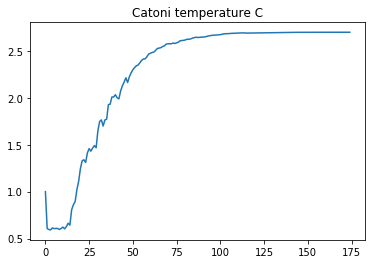

In [14]:
%matplotlib inline
y=optimizer.score_temp
time=torch.arange(0,len(y),1.)
plt.title('Catoni temperature C')
plt.plot(time, y)

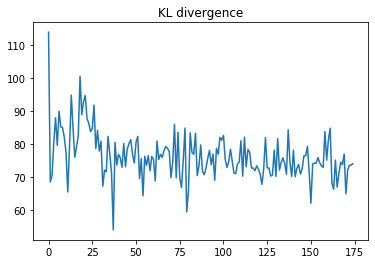

In [15]:
%matplotlib inline
y=optimizer.score_entropy
time=torch.arange(0,len(y),1.)
plt.title('KL divergence')
plt.plot(time, y)

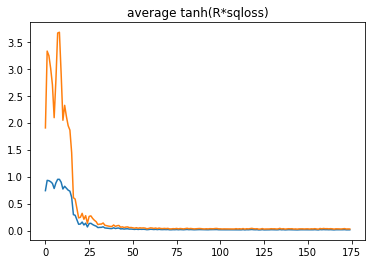

In [21]:
%matplotlib inline
y=torch.as_tensor(optimizer.score_elbo)
time=torch.arange(0,len(y),1.)
plt.title('average tanh(R*sqloss)')
plt.plot(time, y, label='tanhloss')


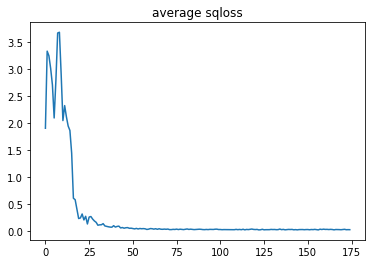

In [22]:
%matplotlib inline
y=torch.as_tensor(optimizer.score_elbo)
time=torch.arange(0,len(y),1.)
plt.title('average sqloss')
yy=(1/R)*0.5*(torch.log1p(y)-torch.log1p(-y))
plt.plot(time,yy, label='squared loss')

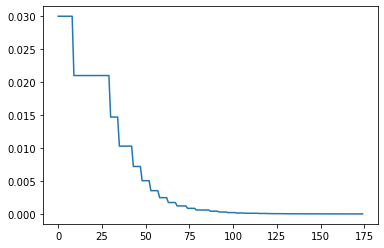

In [23]:
%matplotlib inline
y=optimizer.score_lr
time=torch.arange(0,len(y),1.)
plt.plot(time, y)


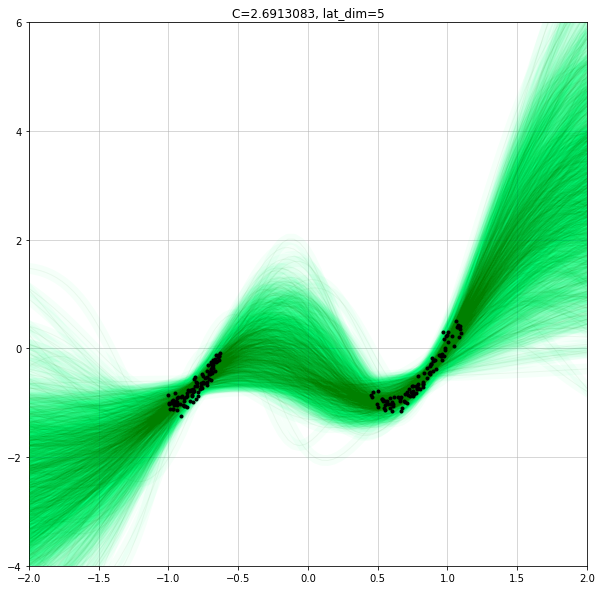

[tensor(0.3254, device='cuda:0'),
 tensor(0.0176, device='cuda:0'),
 tensor(56.4850, device='cuda:0'),
 tensor(2.6913, device='cuda:0')]

In [24]:
%matplotlib inline

def show(GeN,n):
    Z=GeN(n).detach()
    fig=setup.makePlot(Z,device)
    plt.title('C='+str(scores[-1].cpu().float().numpy())+', lat_dim='+str(lat_dim))
    plt.show()
    return
    

show(GeN,1000)
scores

In [25]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),'cpu')

In [26]:
print('nLPP_valid: '+str(nLPP_validation))
print('SE_valid: '+str(RSE_validation))
print('nLPP_test: '+str(nLPP_test))
print('SE_test: '+str(RSE_test))

nLPP_valid: (tensor(-0.6451), tensor(0.4865))
SE_valid: (tensor(0.0146), tensor(0.0207))
nLPP_test: (tensor(2.0849), tensor(2.8231))
SE_test: (tensor(2.3422), tensor(3.6776))


Pour un choix de points $x_0,...,x_{n-1}$, on définit:
$$
d(\theta,\theta')=\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert
$$
ou
$$
d_2(\theta,\theta')=\biggl(\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert^2\biggr)^{\frac{1}{2}}
$$


$P(f\in A)=P(\{\theta \mid f_\theta\in A\})$

$\theta \mapsto f_\theta$ (is it continuous?)

relation entre $d(\theta,\theta')$ et $d(f_\theta,f_\theta')$